In [6]:
import os
import subprocess
from IPython.display import display, HTML, Image
import io
from operator import itemgetter



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from TAS_Python_Utilities import data_viz
from TAS_Python_Utilities import data_viz_target
from TAS_Python_Utilities import visualize_tree
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors

from xgboost import XGBClassifier


%matplotlib inline
%qtconsole


In [9]:
dataset = pd.read_csv("fashion-mnist_train.csv")
dataset.head()
dataset["label"].value_counts()


9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [6]:
display(dataset.select_dtypes(include=[np.number]).describe())

label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]

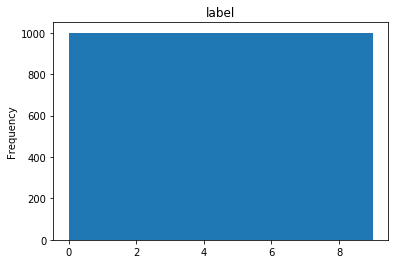

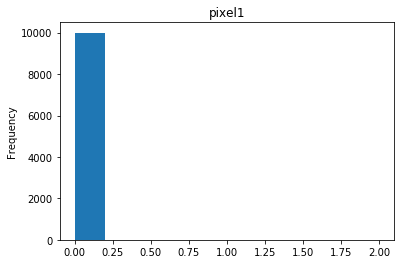

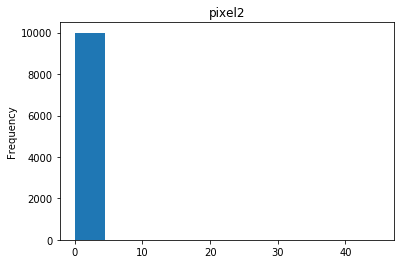

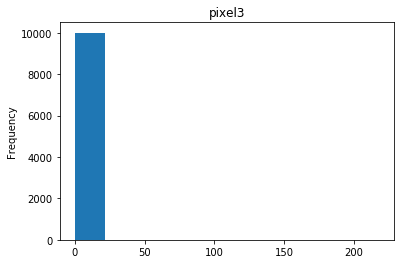

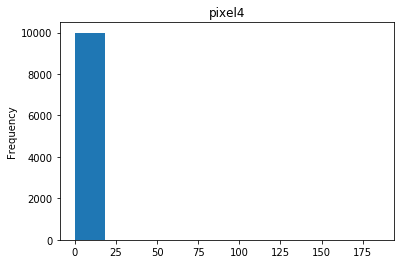

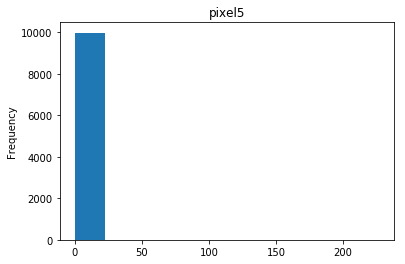

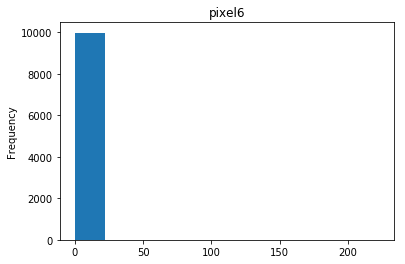

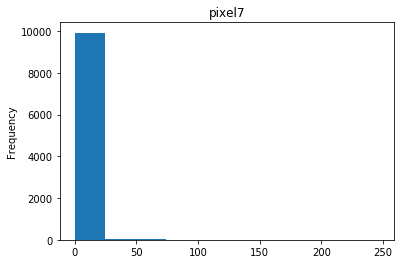

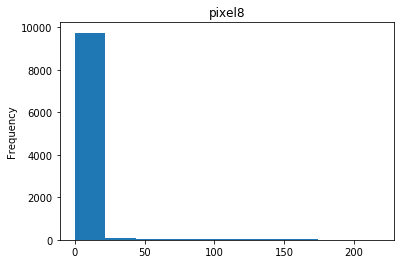

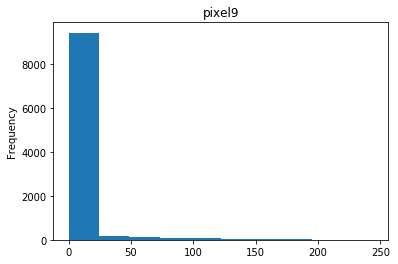

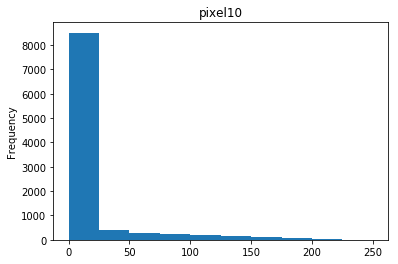

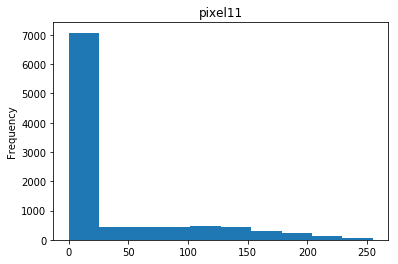

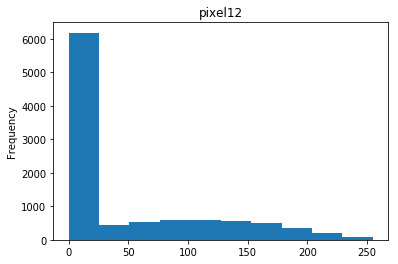

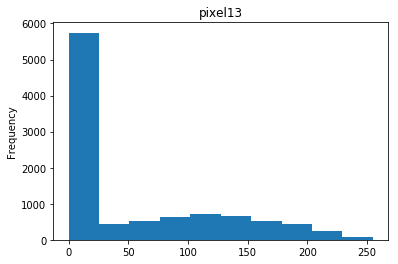

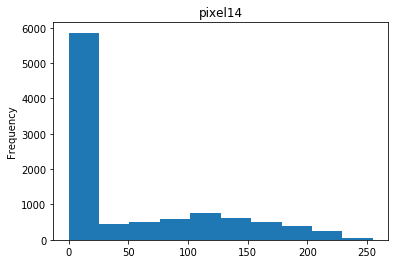

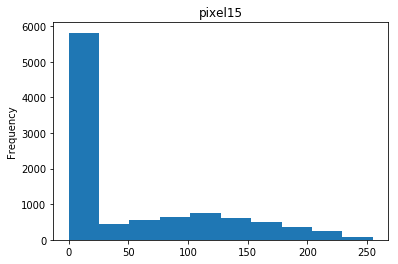

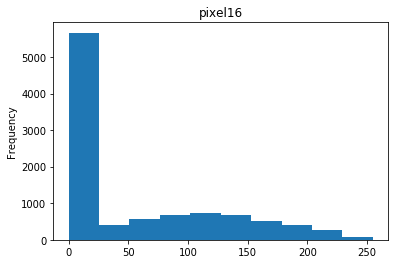

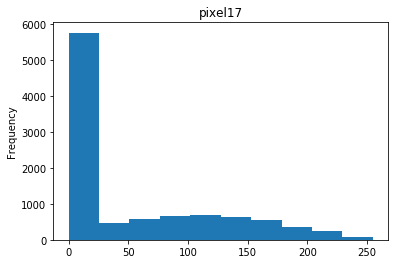

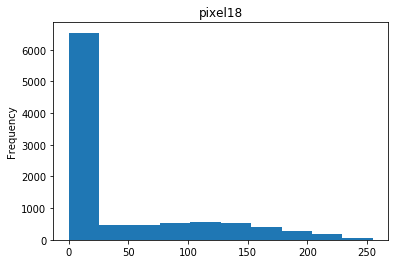

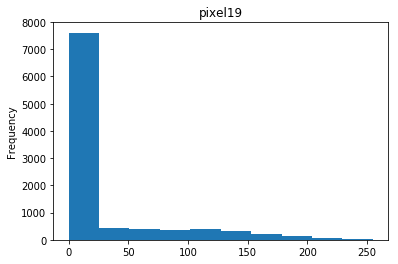

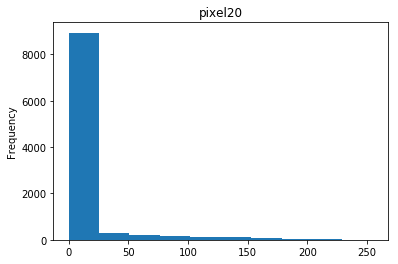

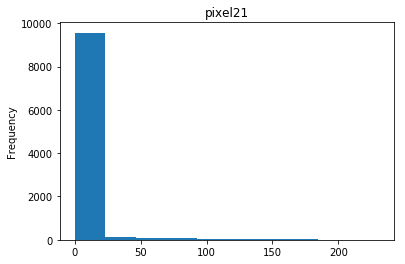

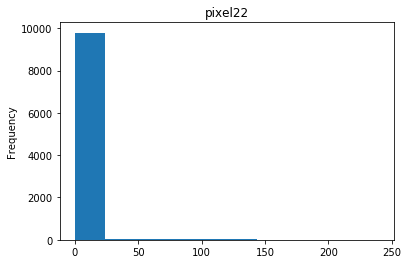

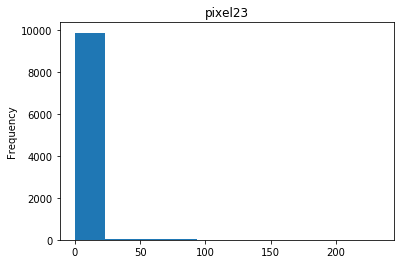

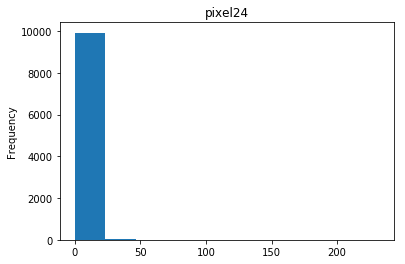

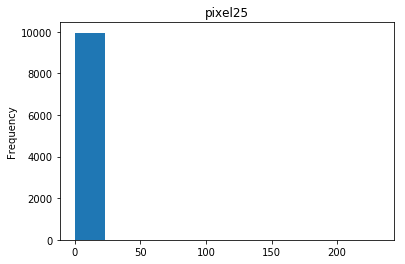

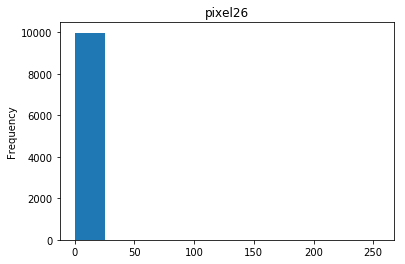

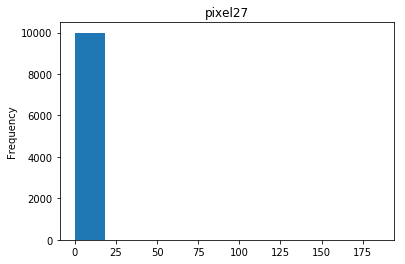

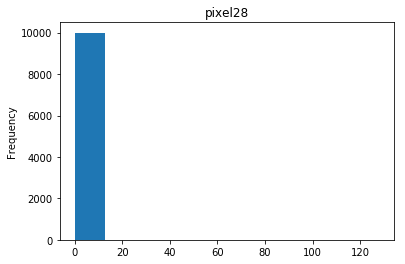

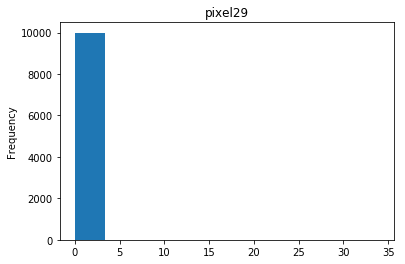

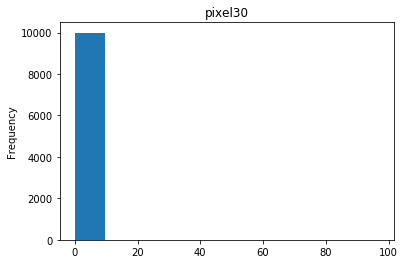

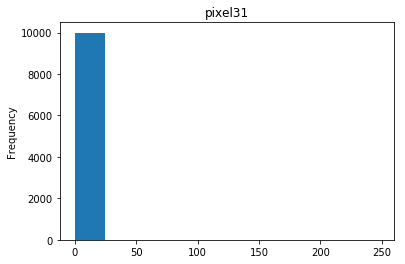

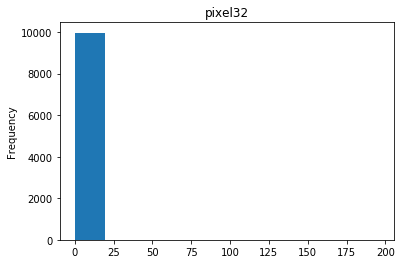

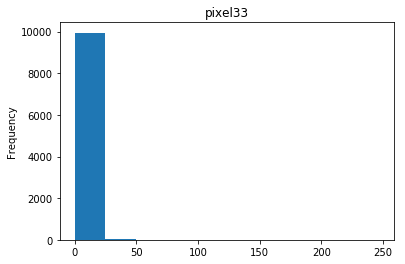

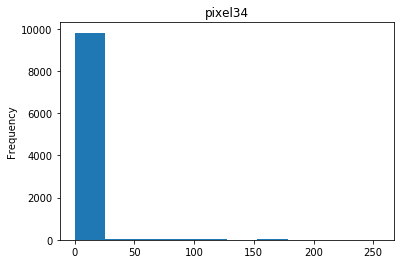

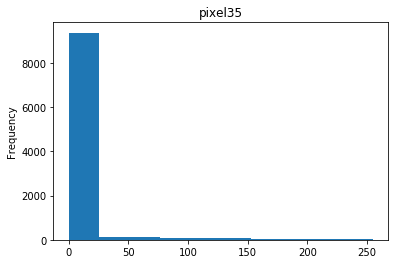

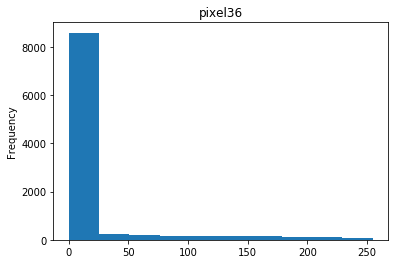

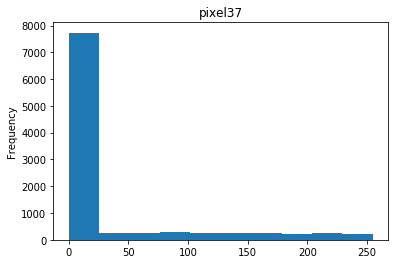

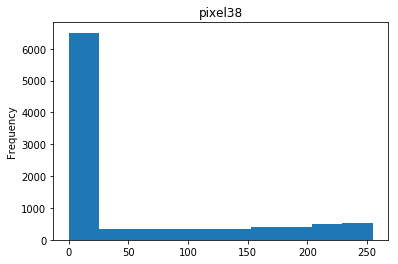

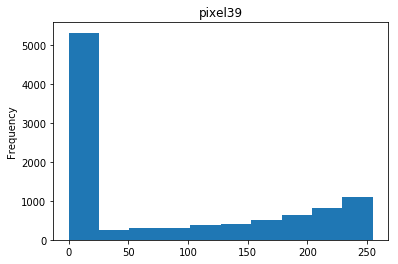

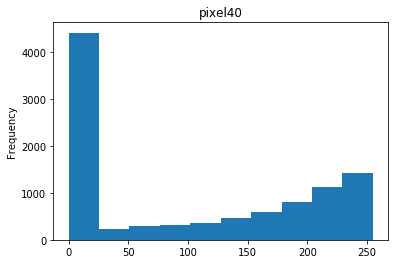

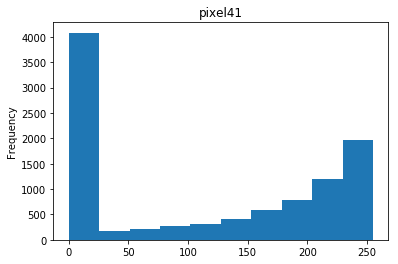

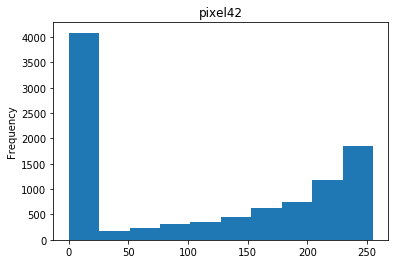

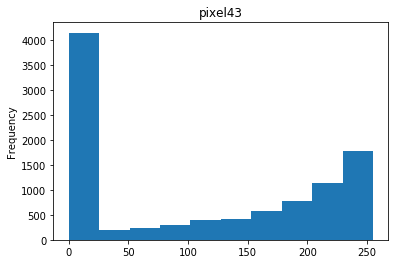

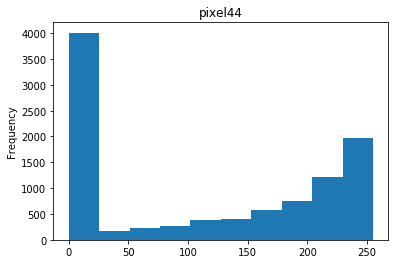

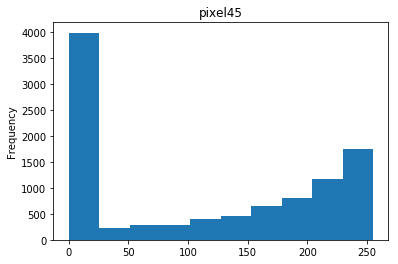

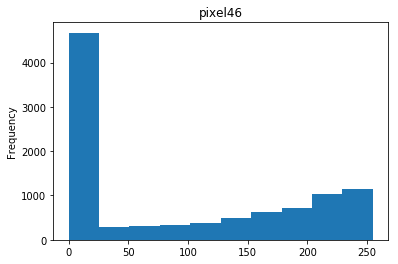

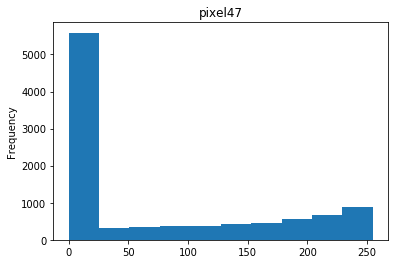

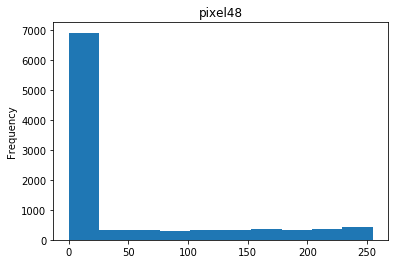

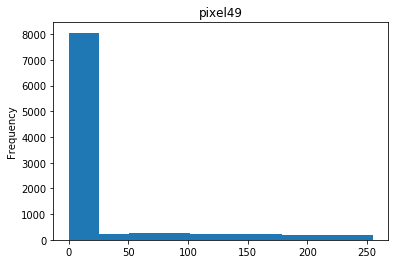

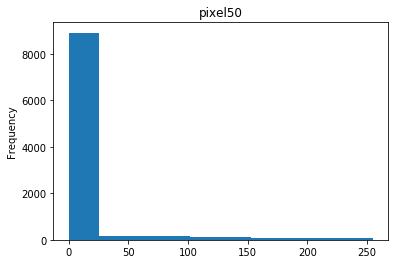

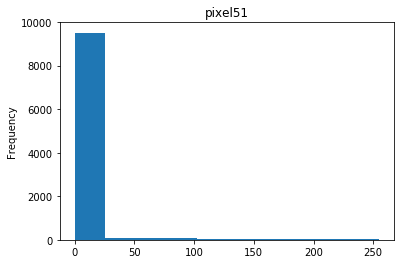

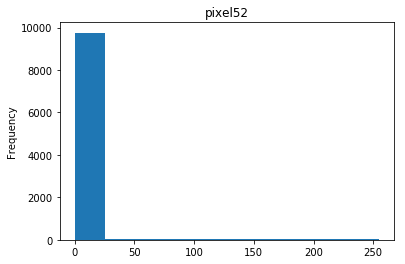

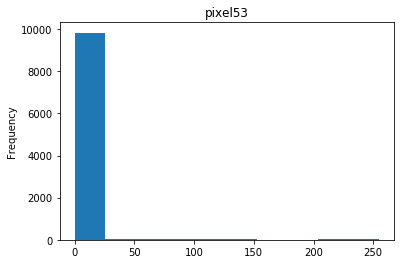

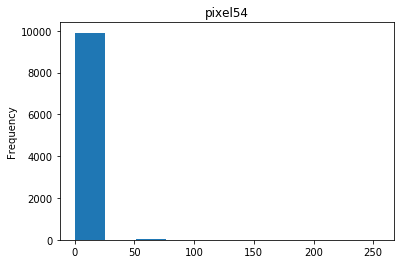

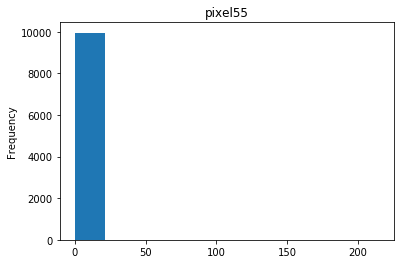

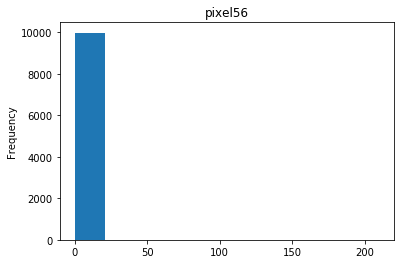

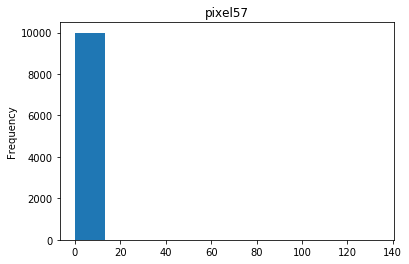

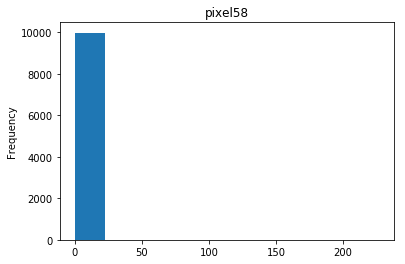

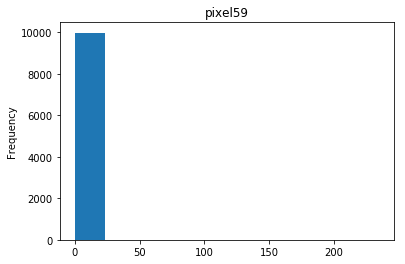

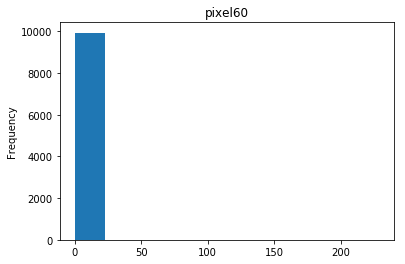

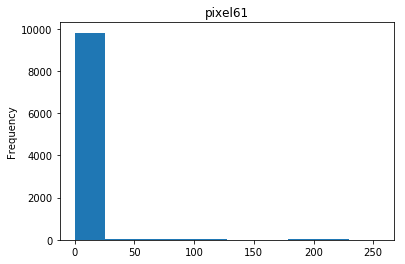

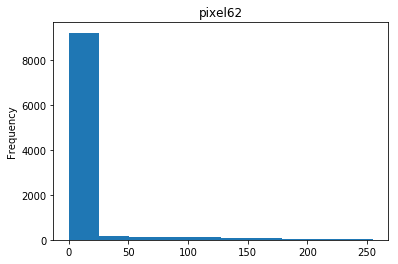

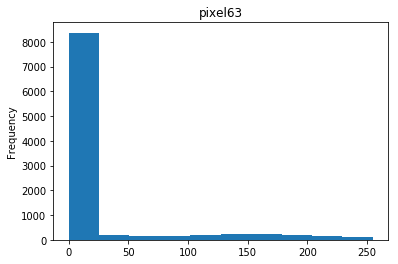

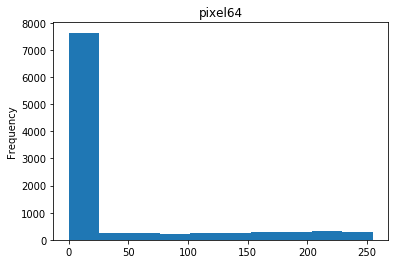

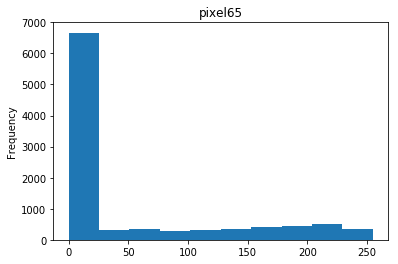

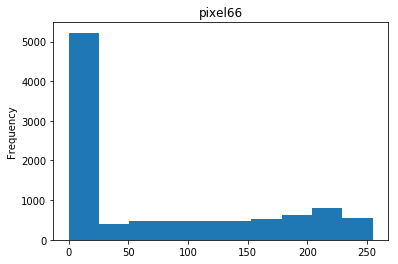

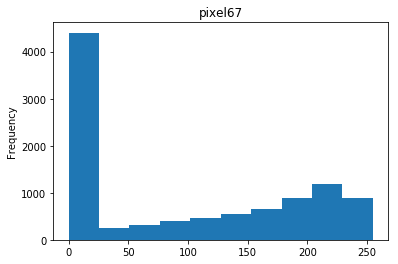

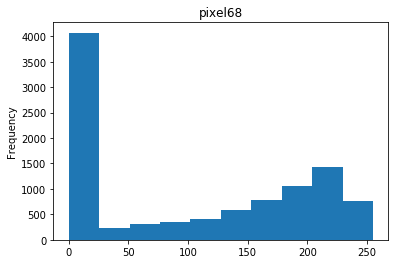

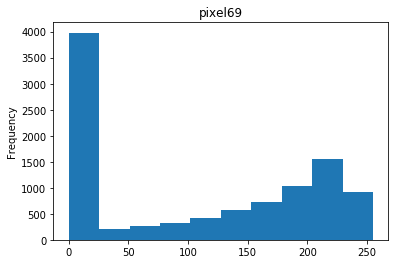

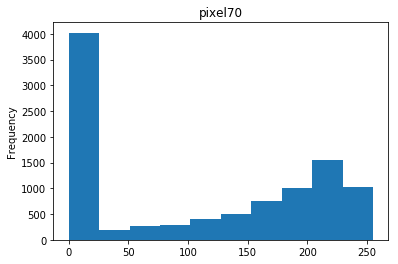

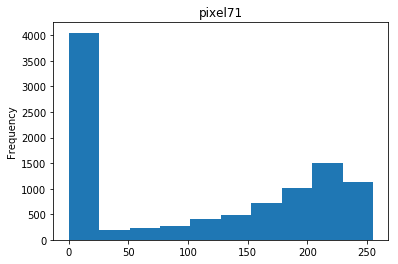

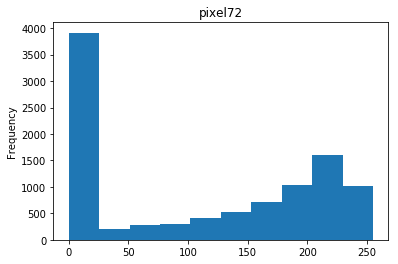

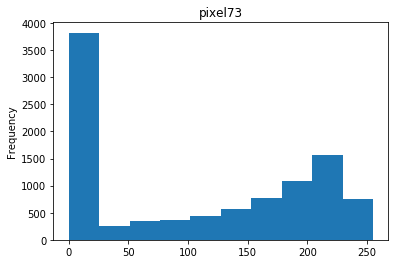

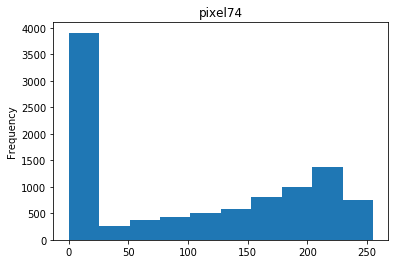

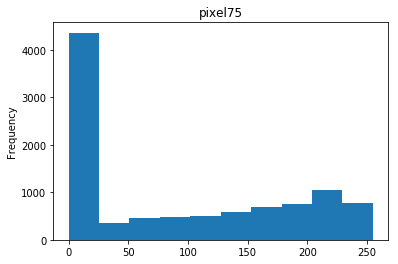

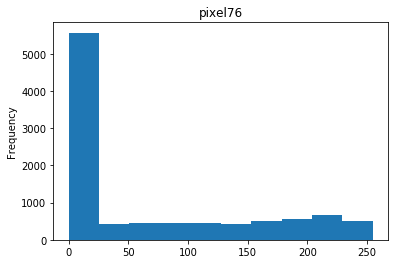

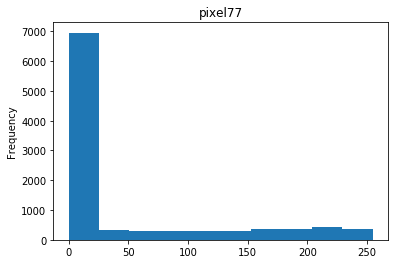

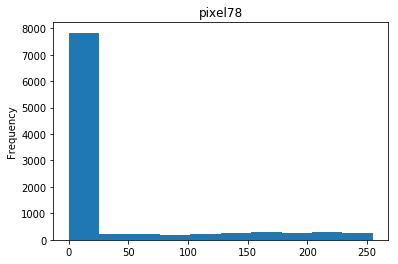

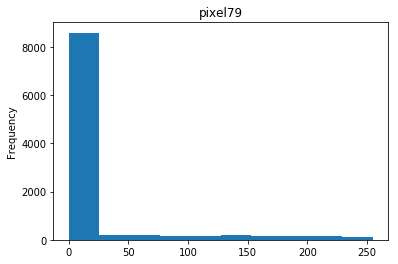

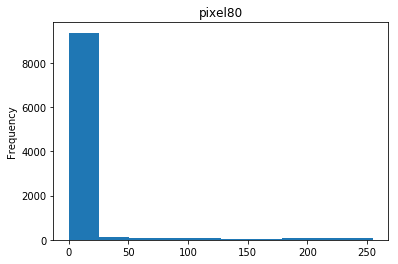

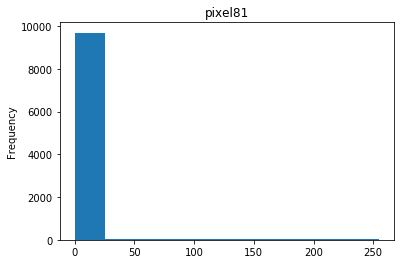

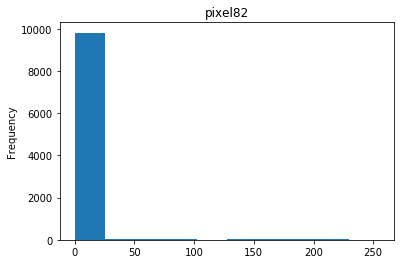

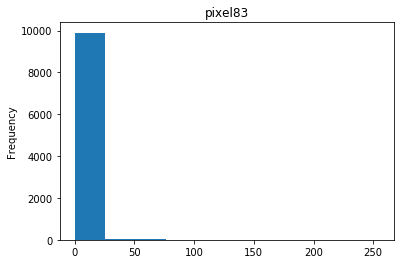

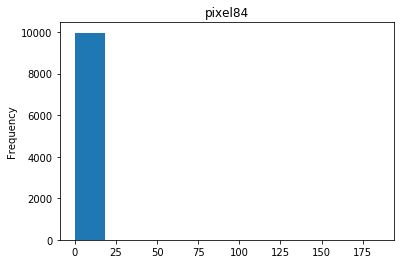

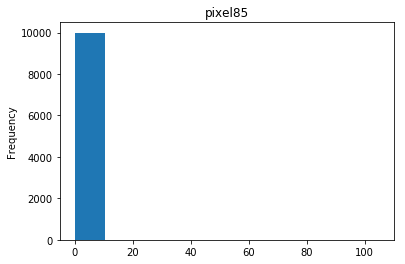

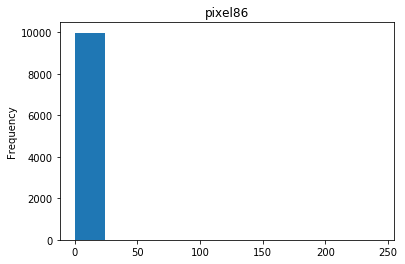

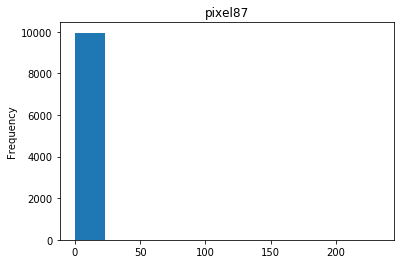

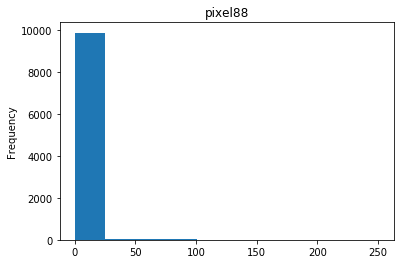

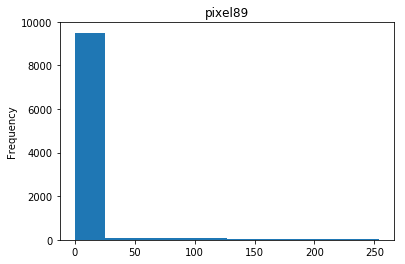

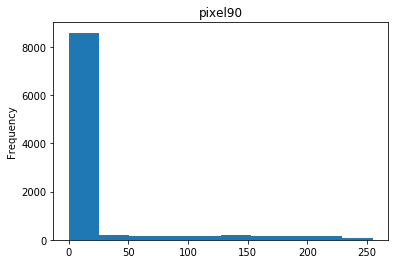

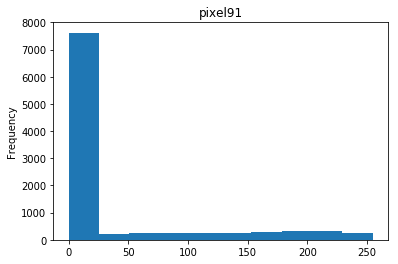

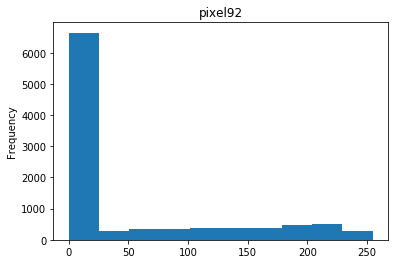

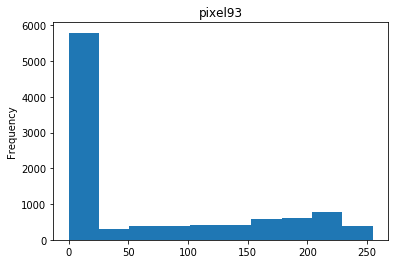

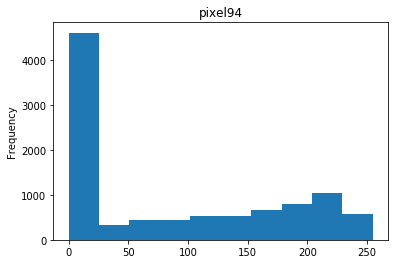

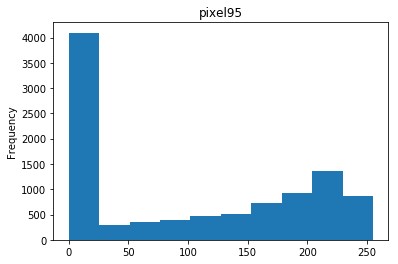

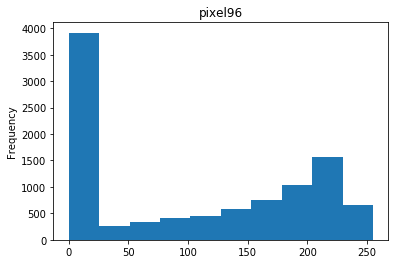

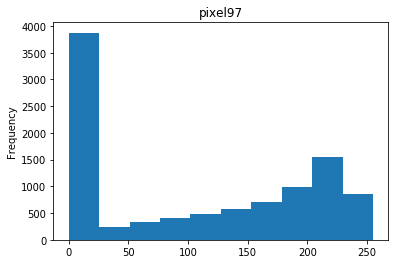

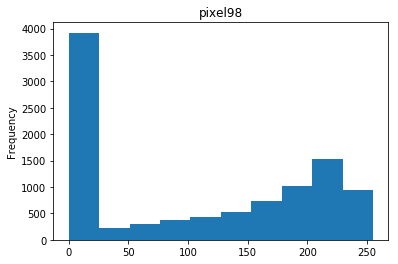

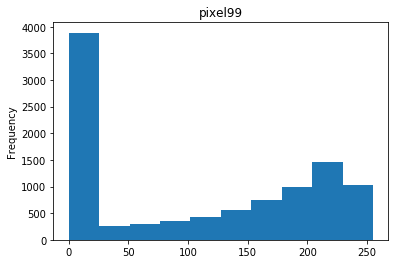

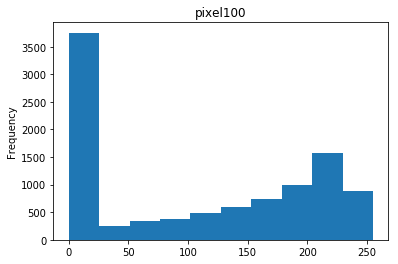

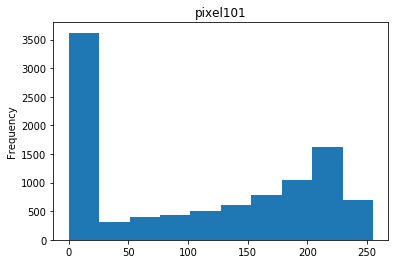

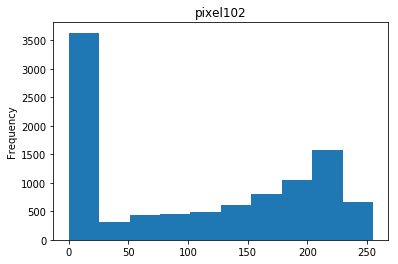

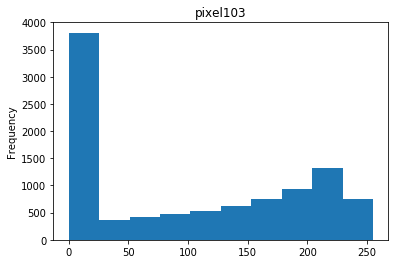

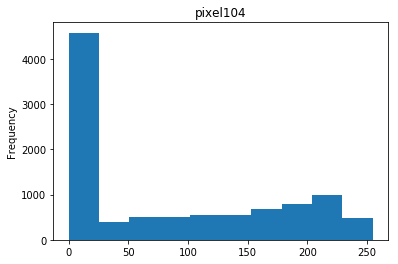

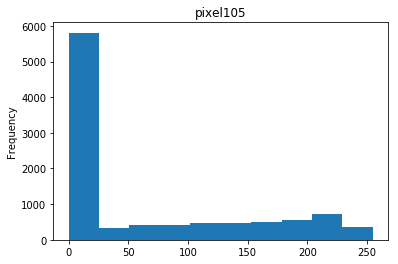

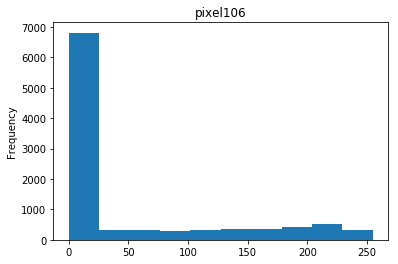

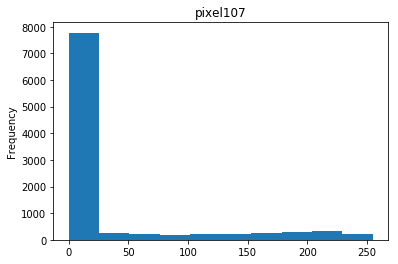

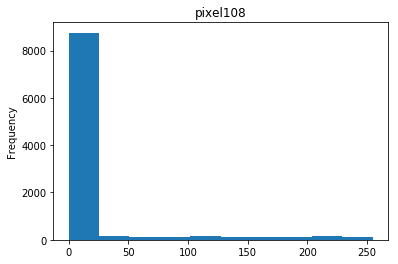

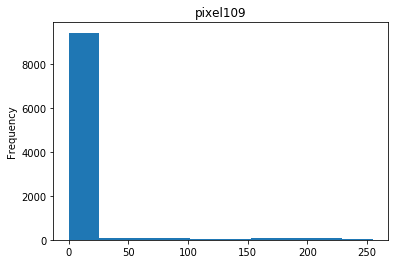

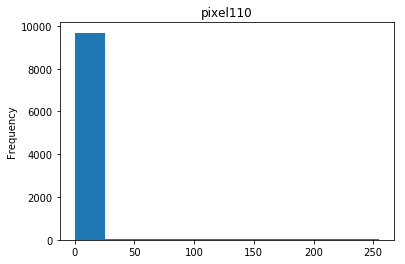

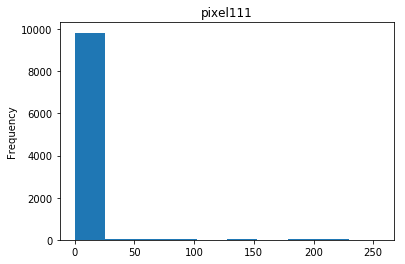

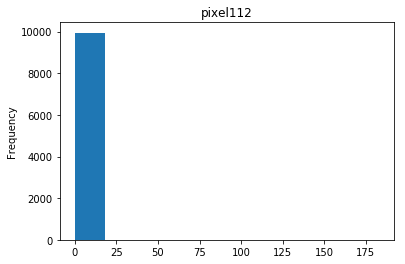

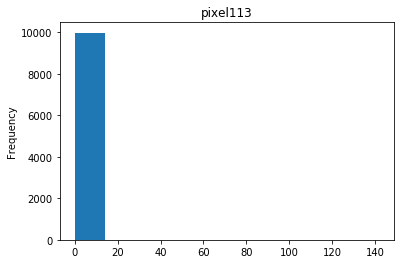

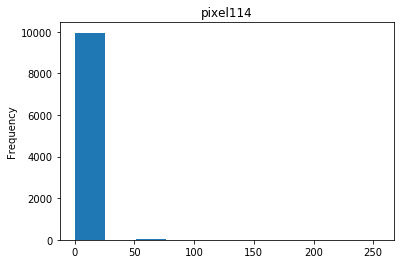

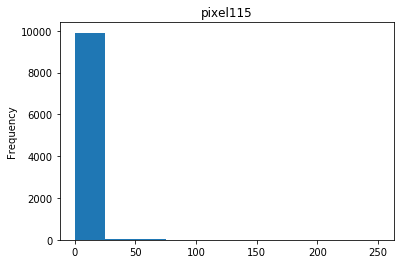

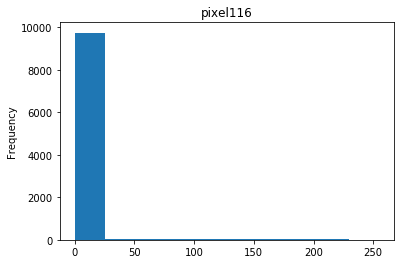

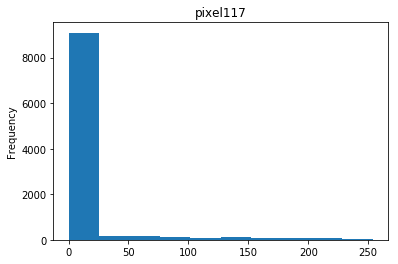

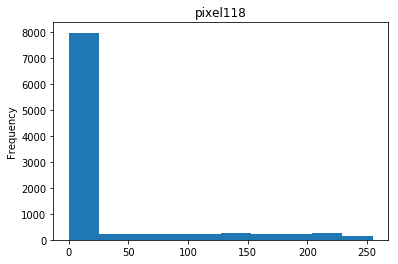

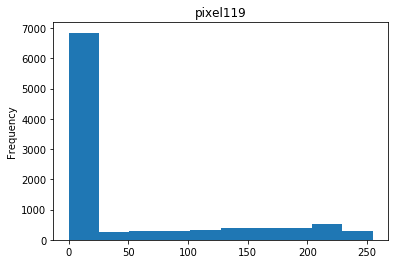

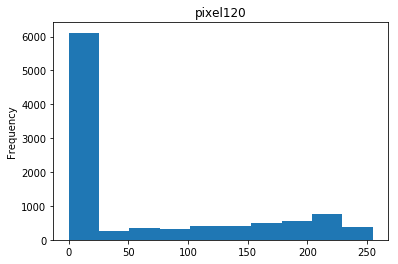

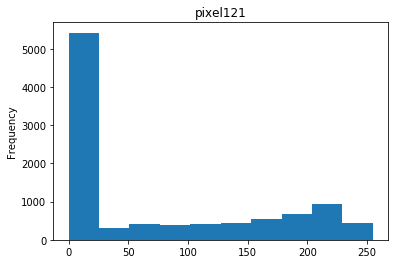

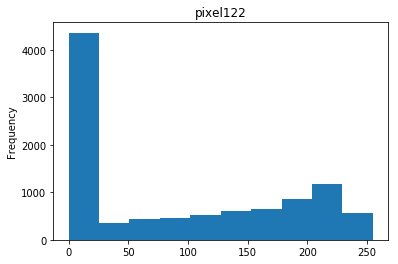

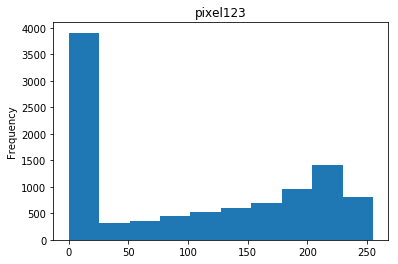

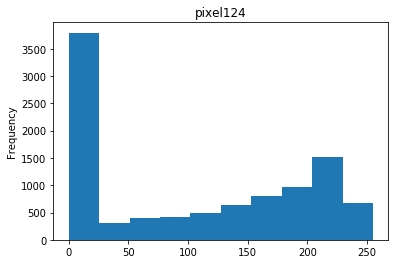

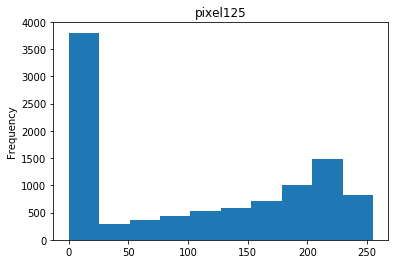

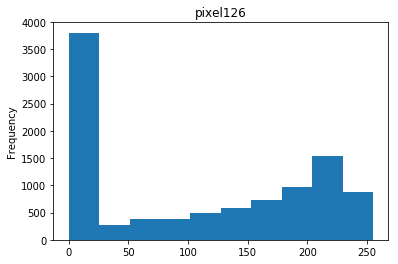

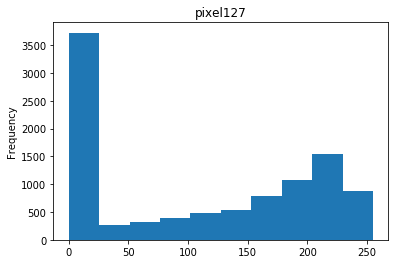

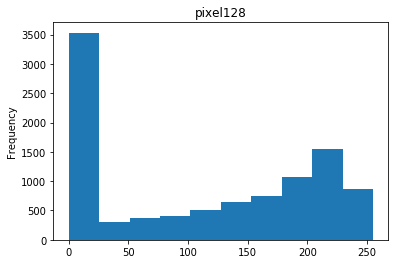

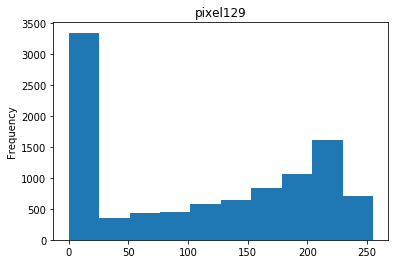

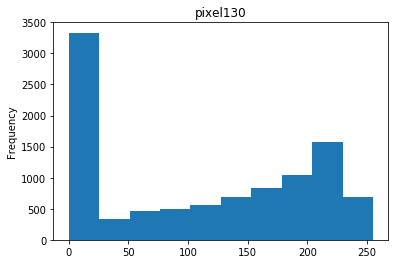

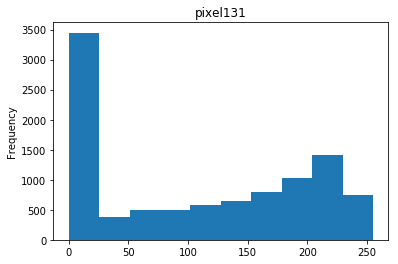

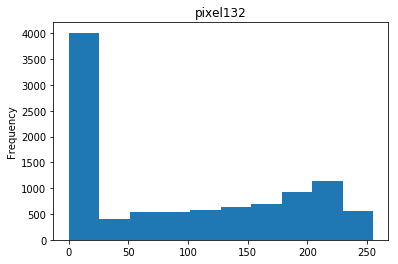

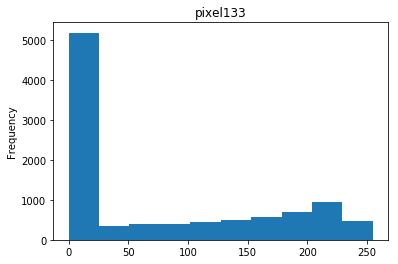

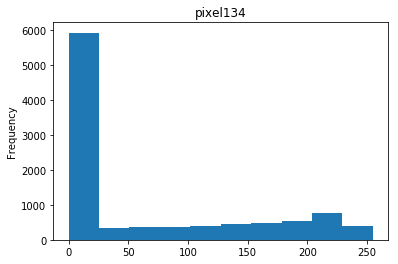

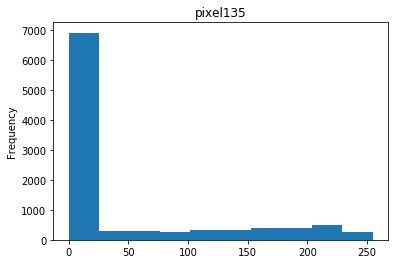

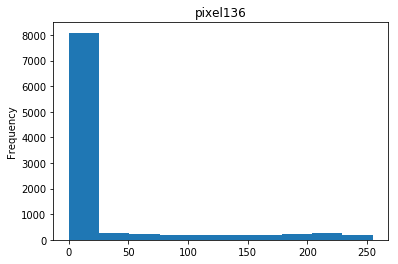

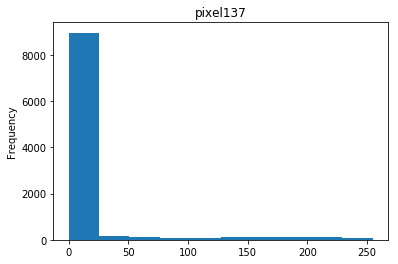

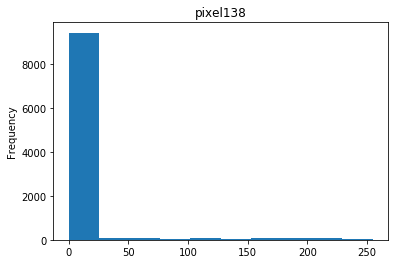

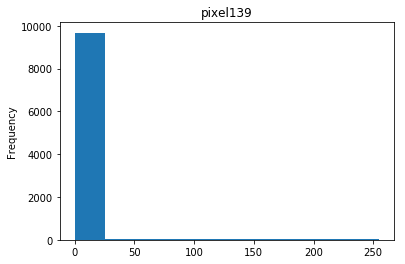

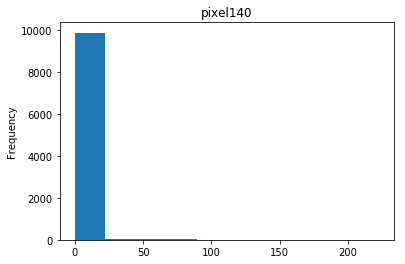

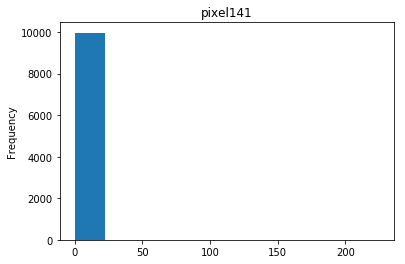

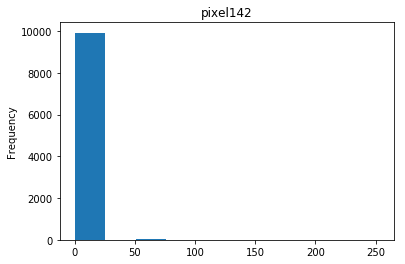

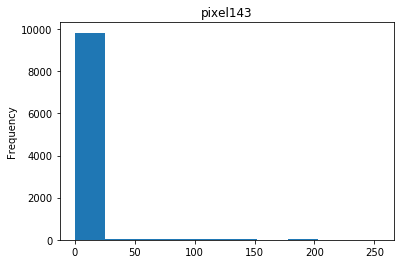

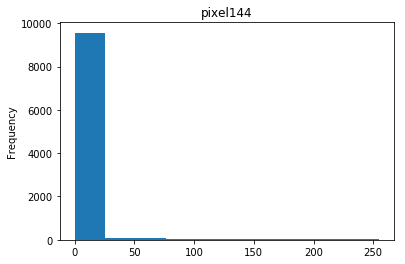

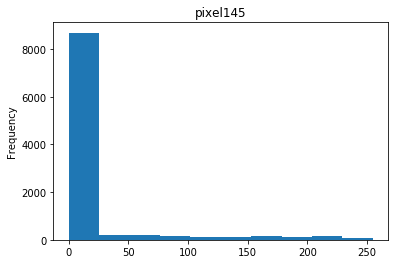

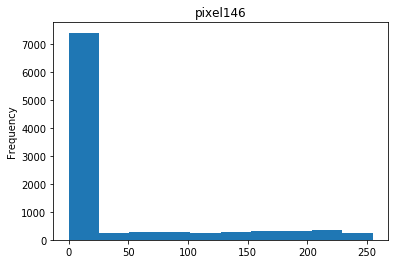

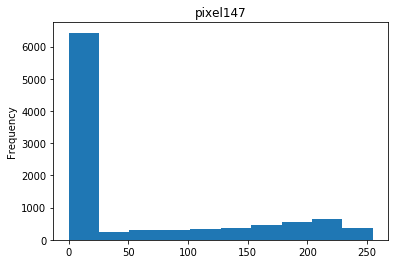

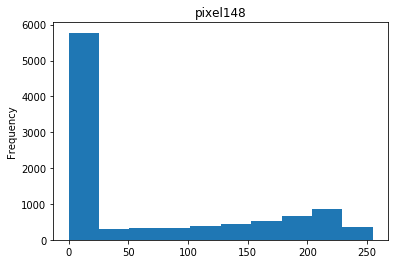

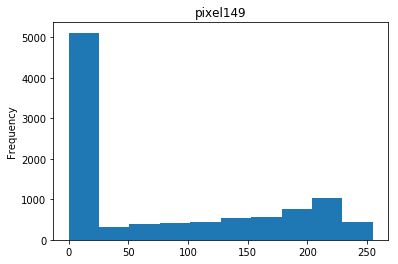

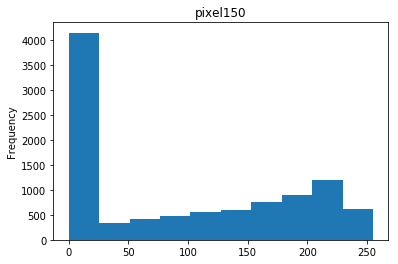

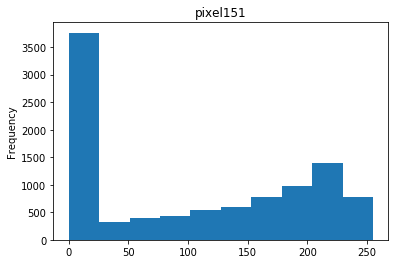

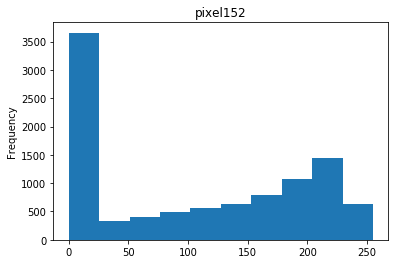

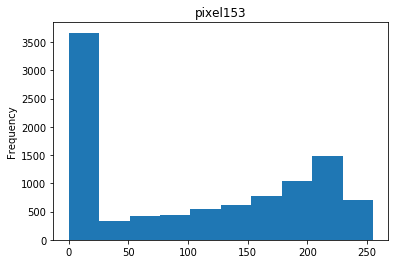

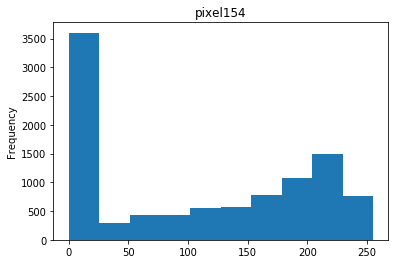

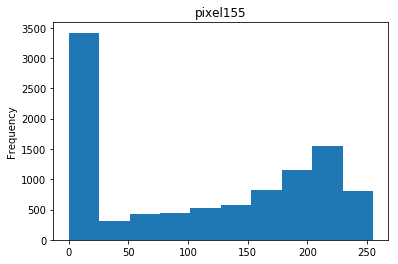

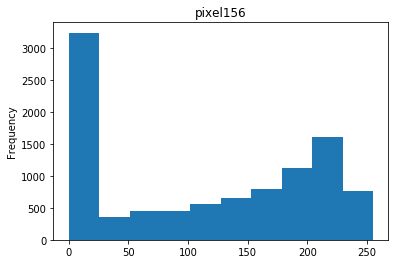

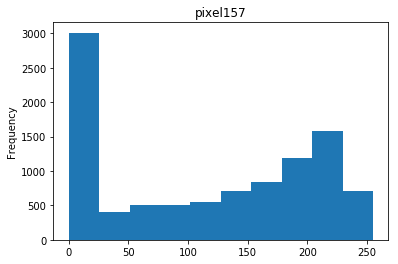

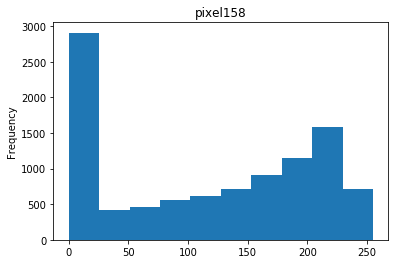

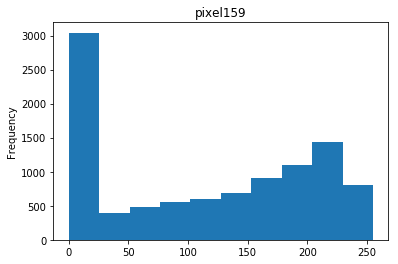

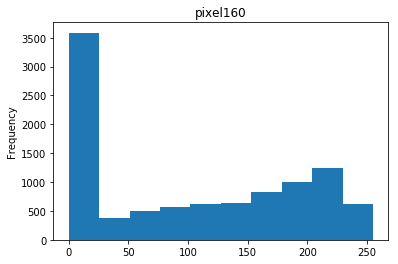

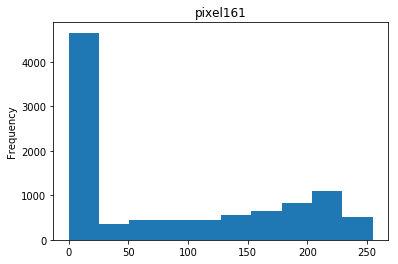

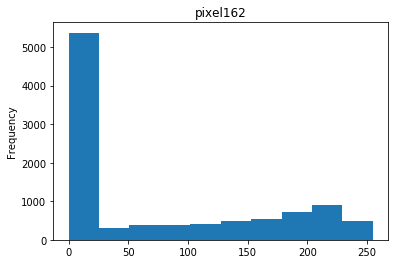

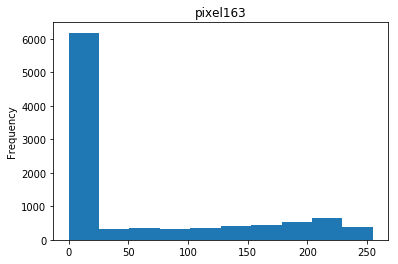

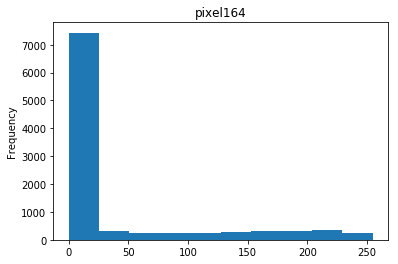

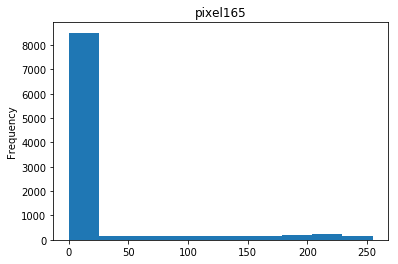

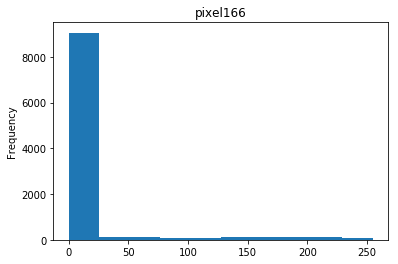

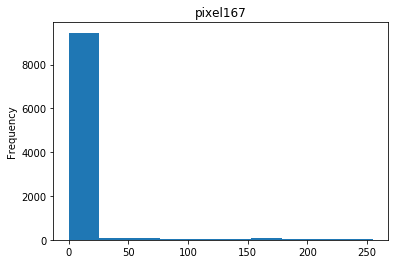

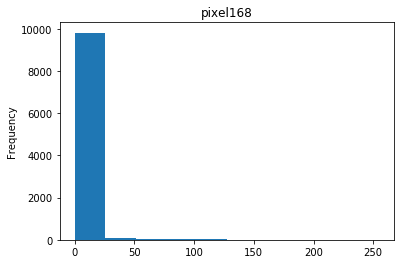

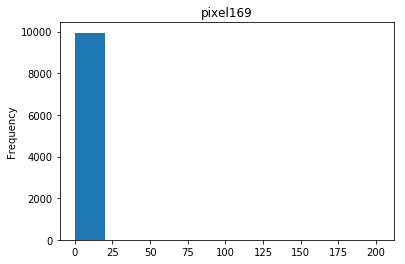

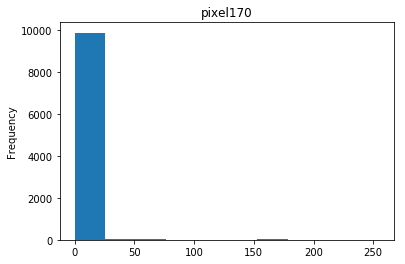

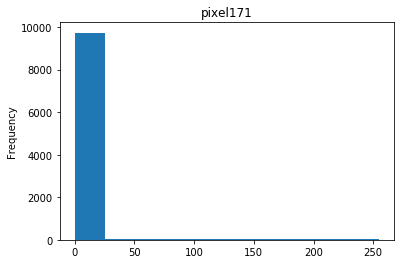

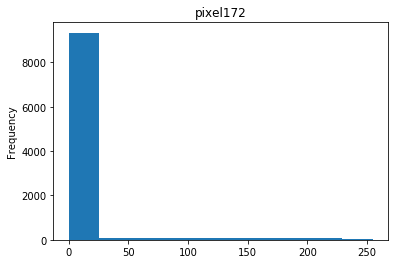

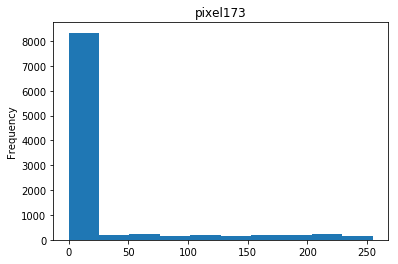

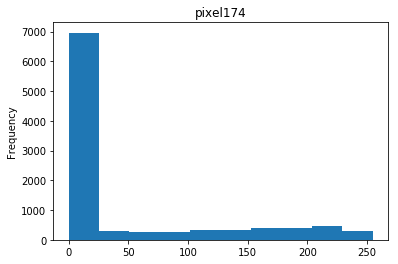

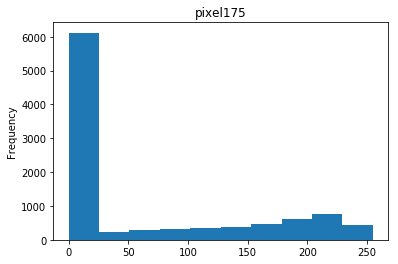

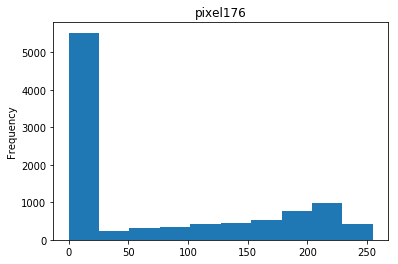

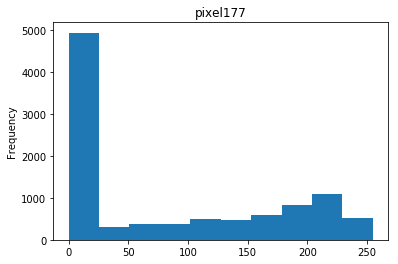

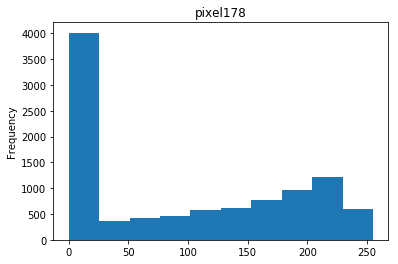

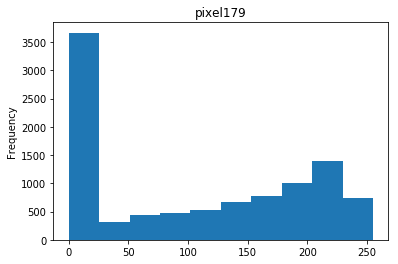

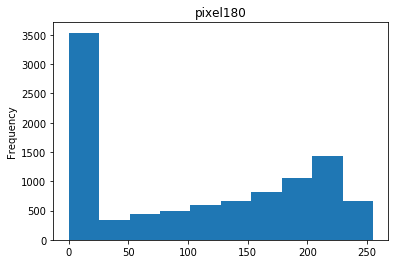

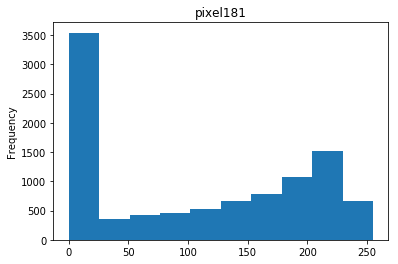

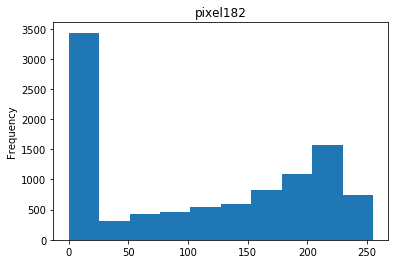

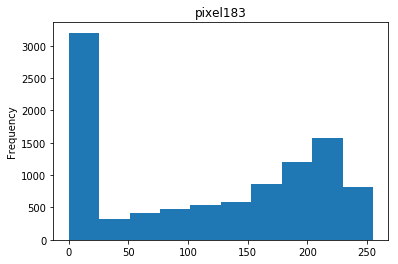

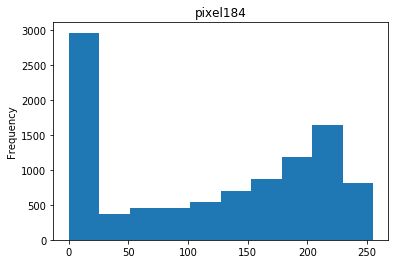

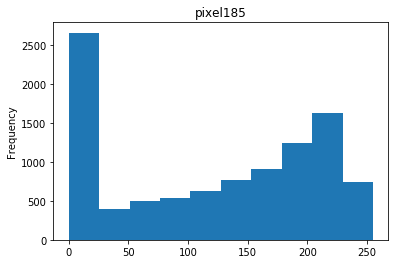

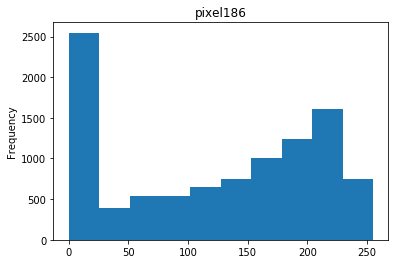

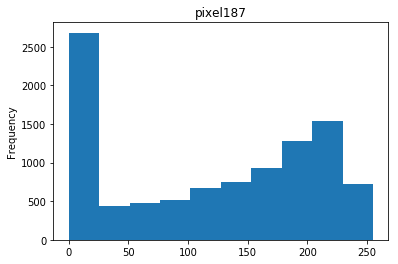

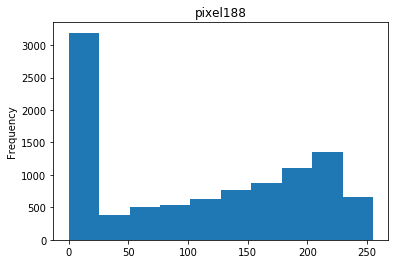

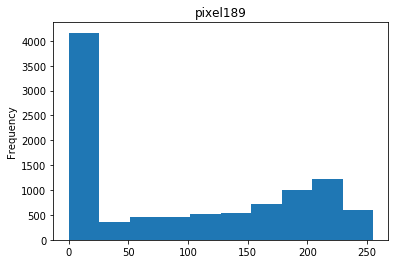

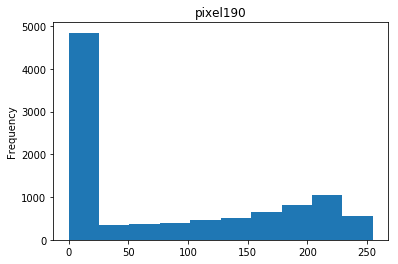

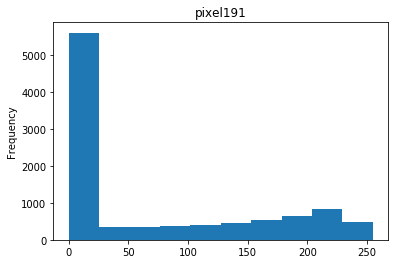

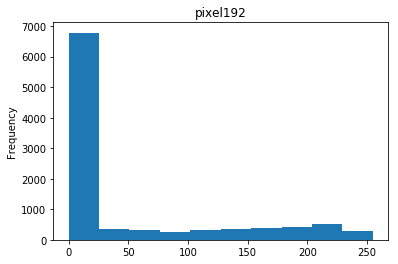

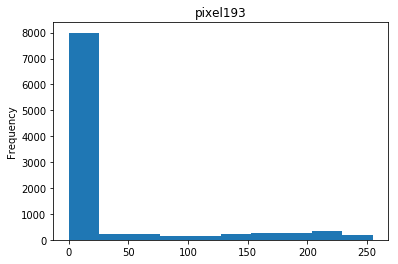

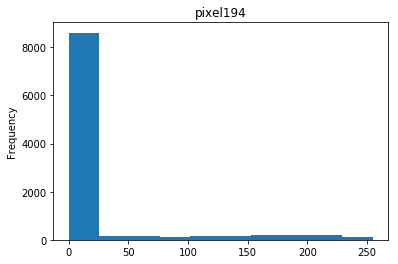

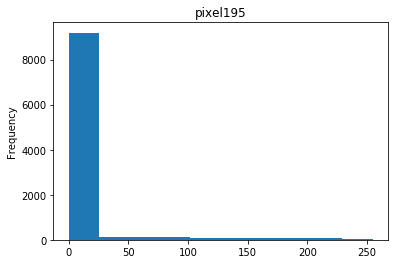

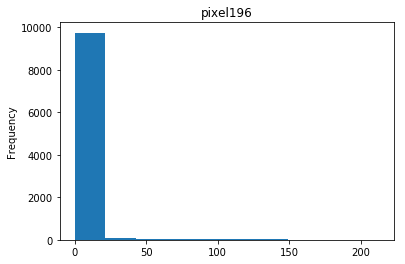

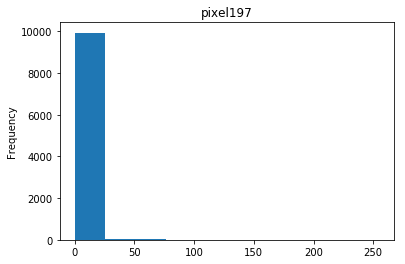

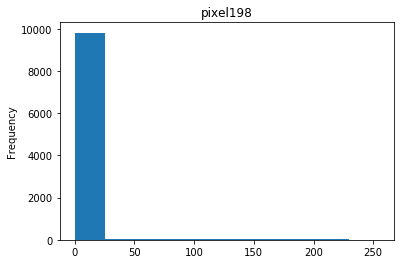

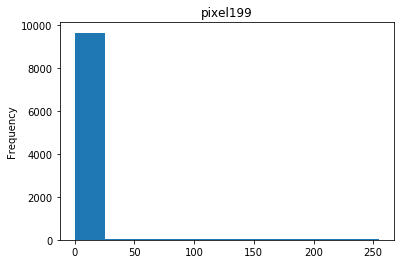

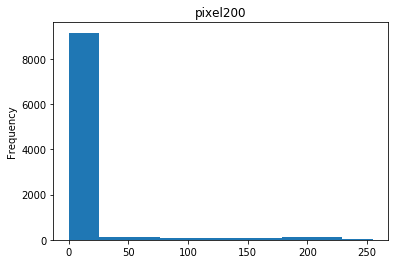

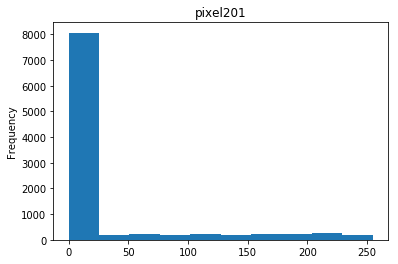

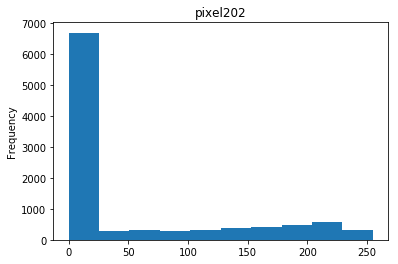

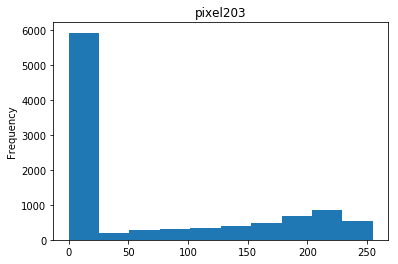

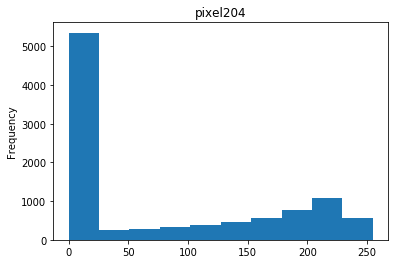

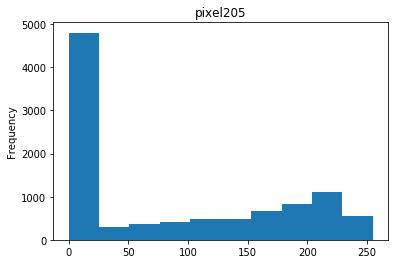

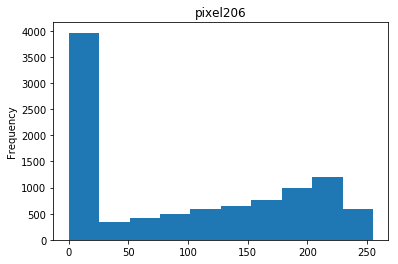

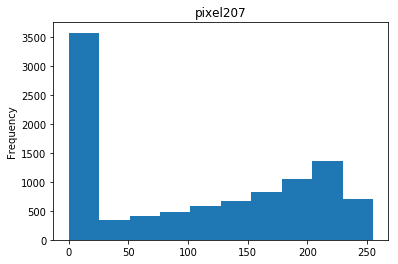

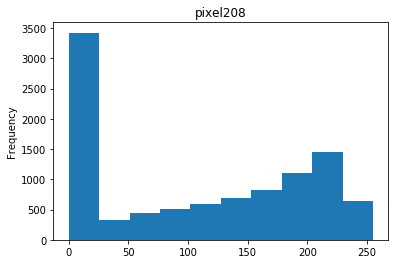

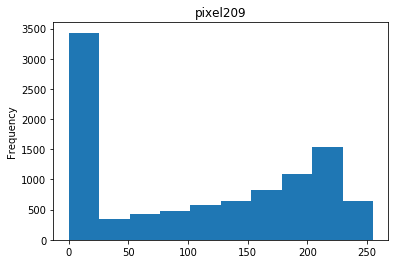

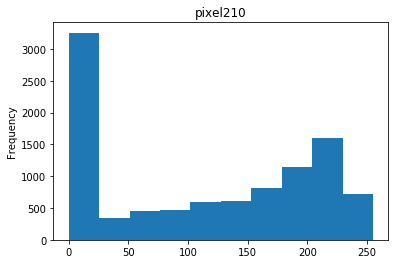

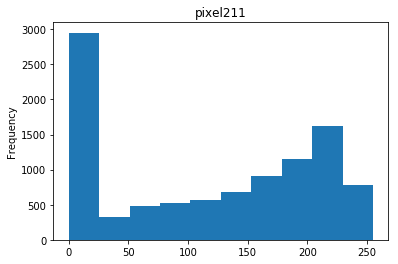

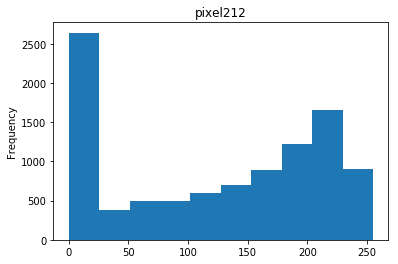

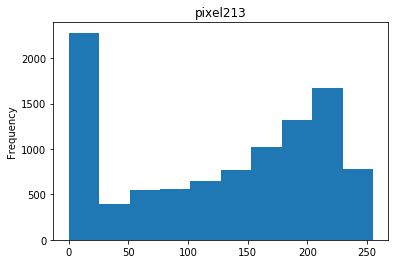

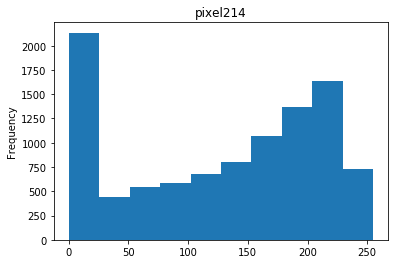

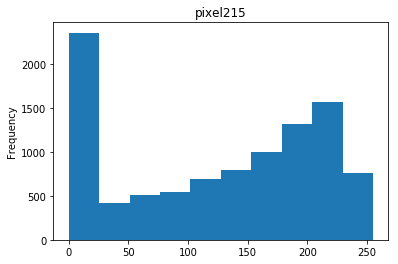

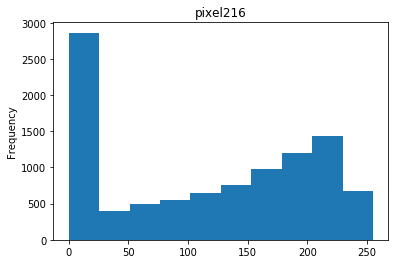

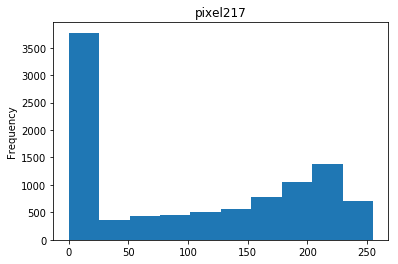

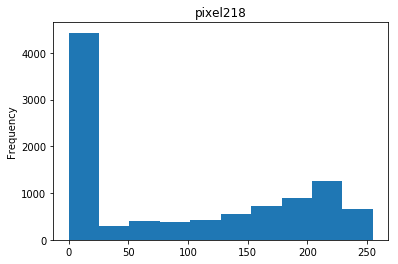

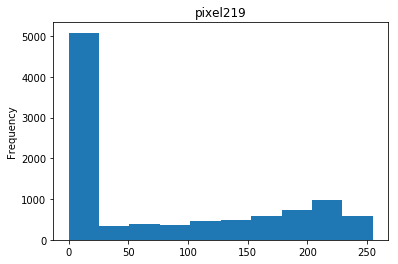

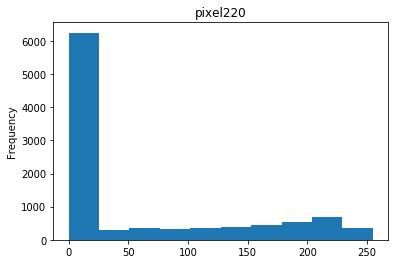

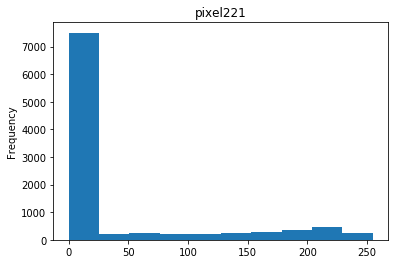

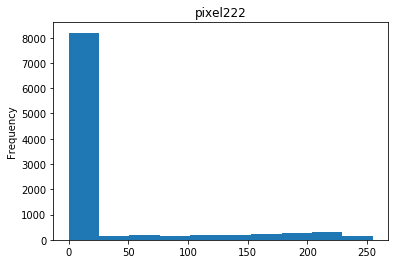

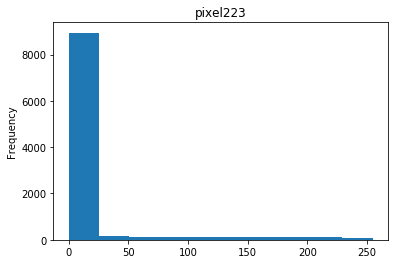

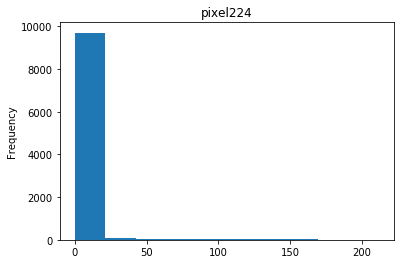

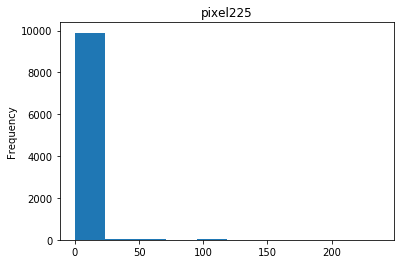

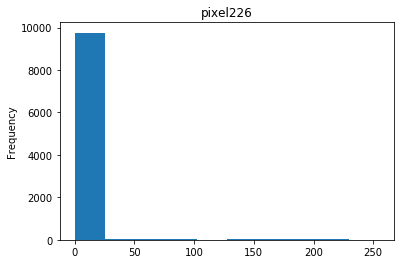

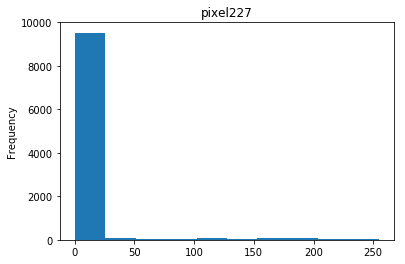

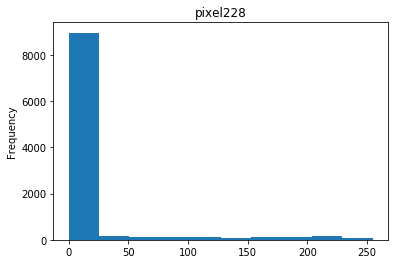

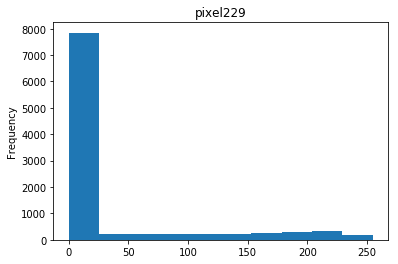

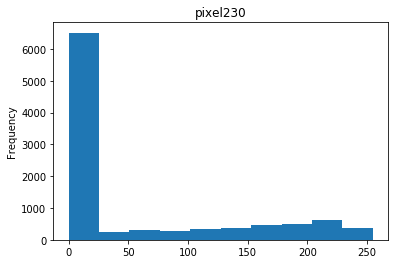

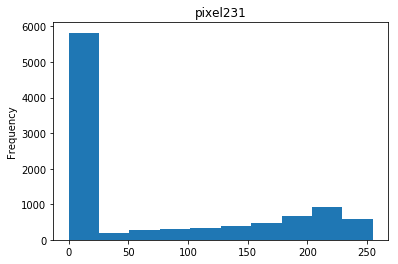

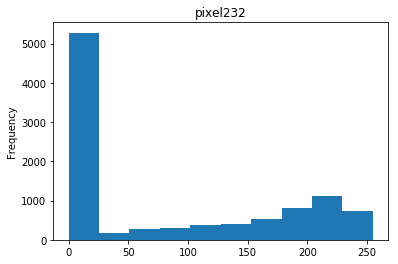

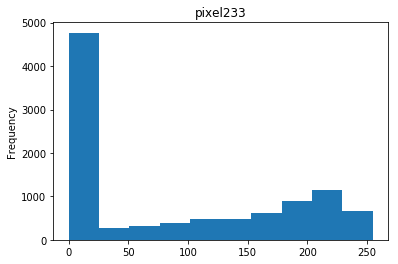

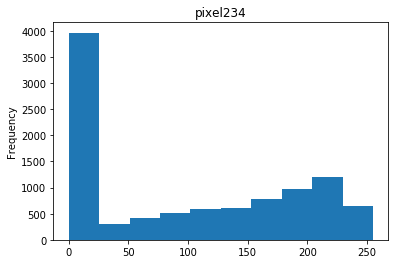

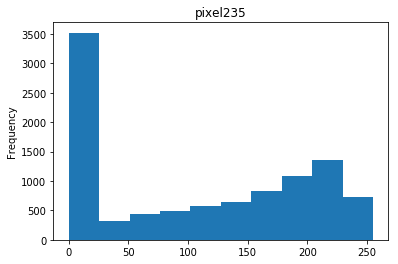

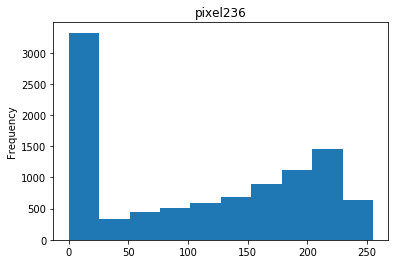

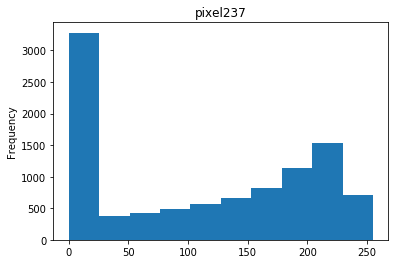

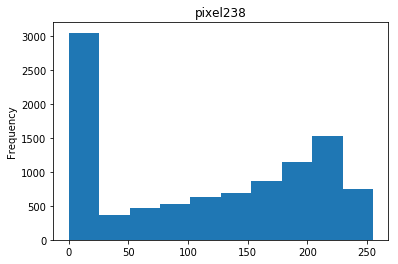

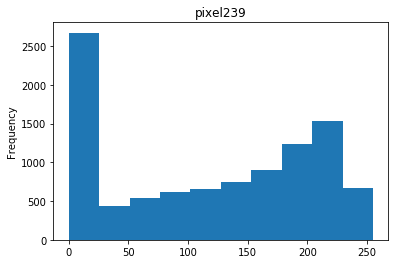

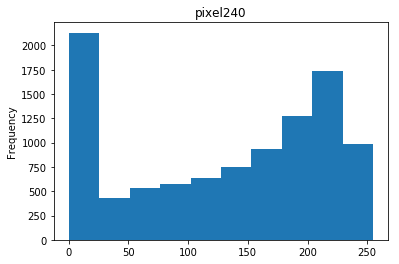

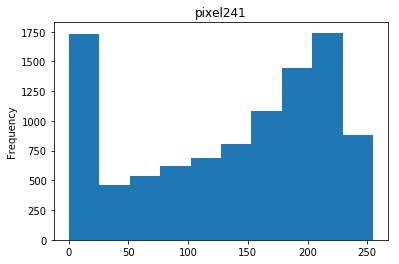

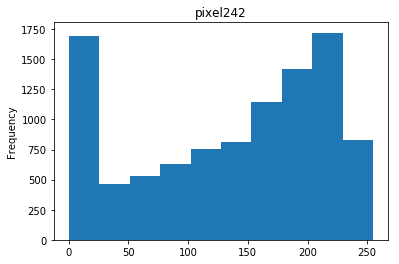

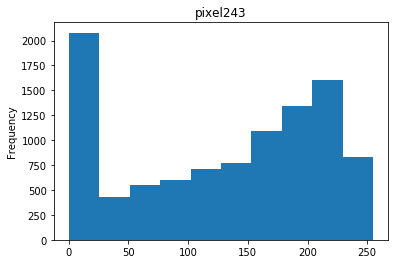

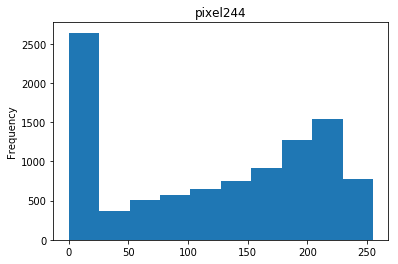

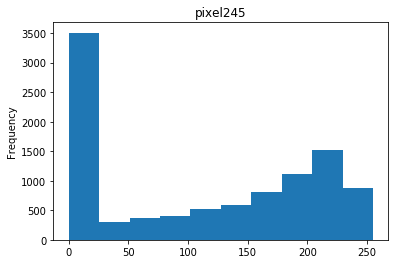

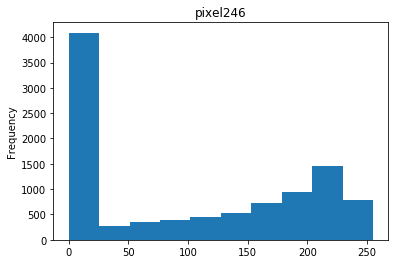

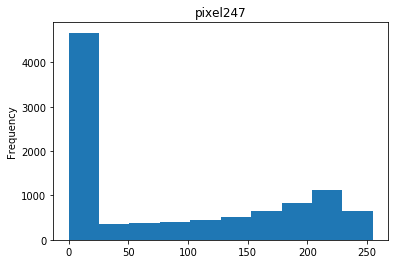

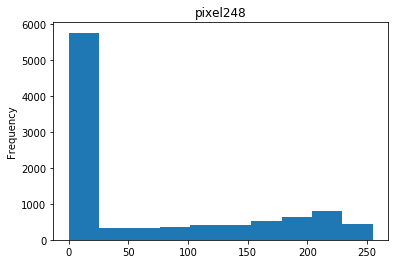

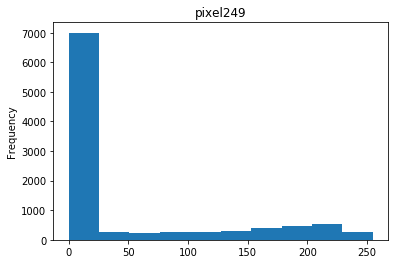

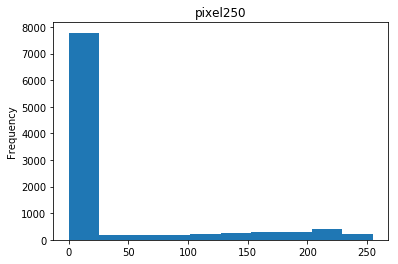

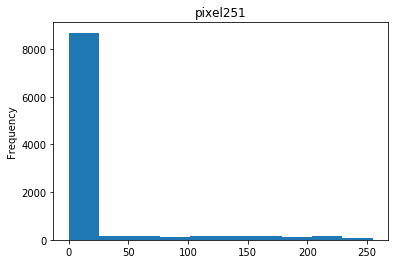

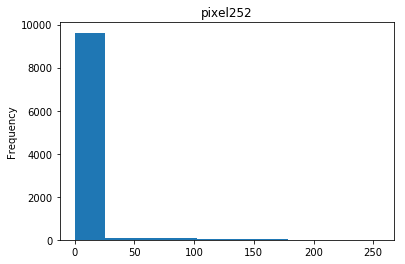

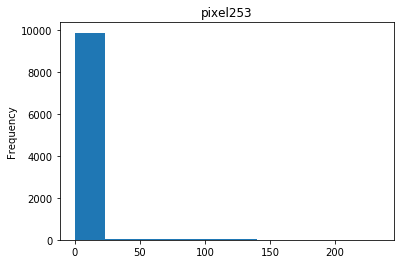

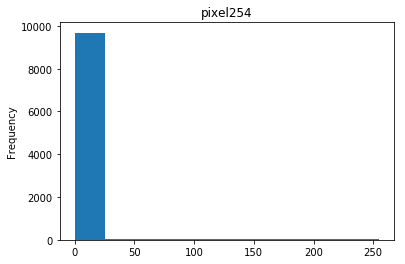

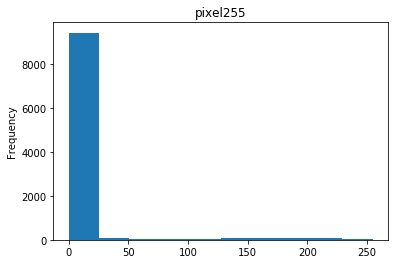

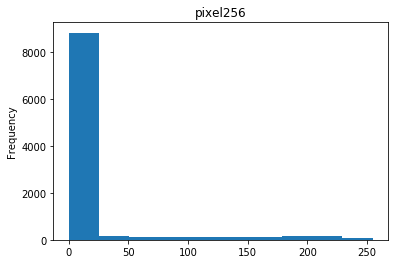

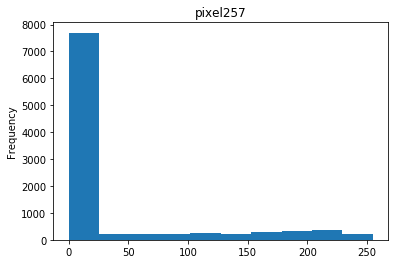

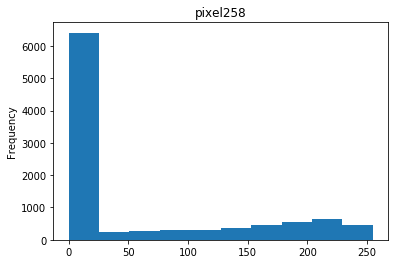

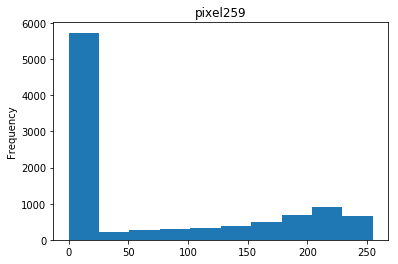

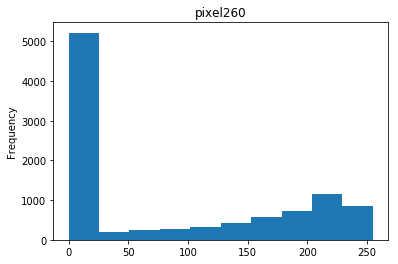

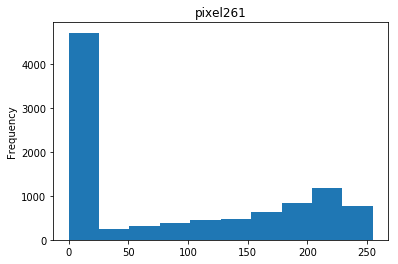

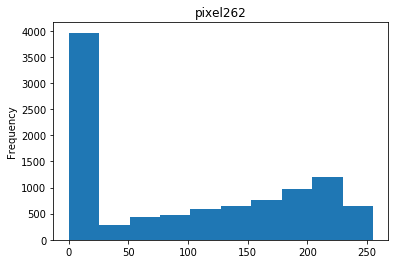

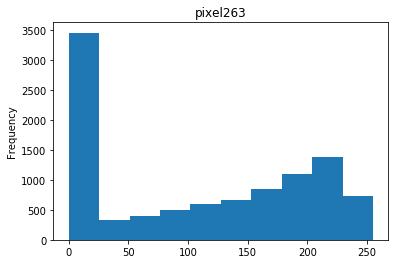

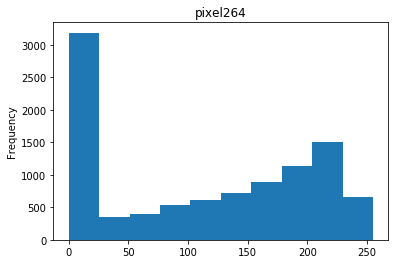

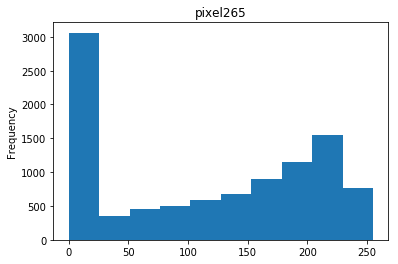

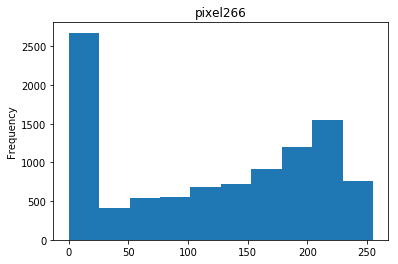

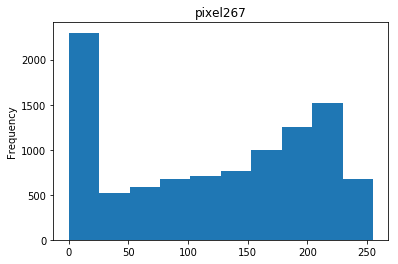

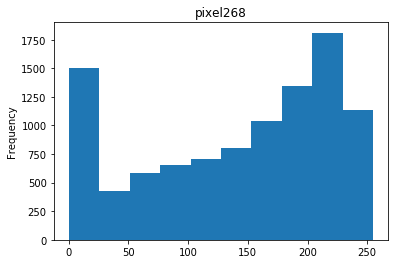

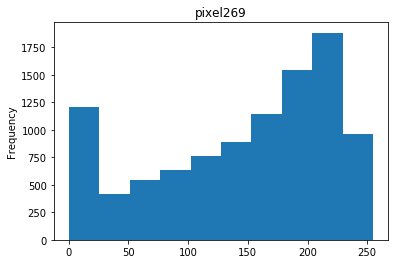

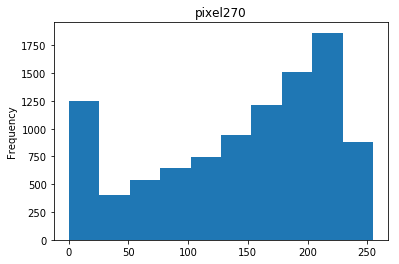

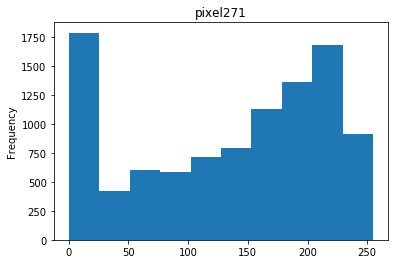

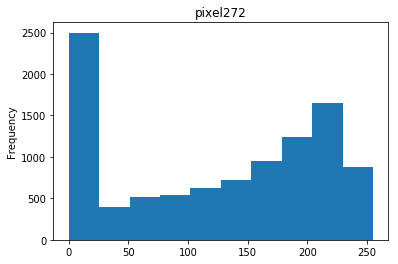

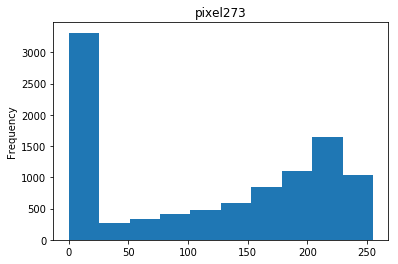

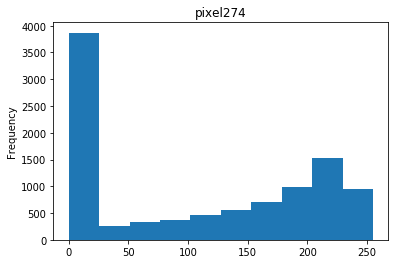

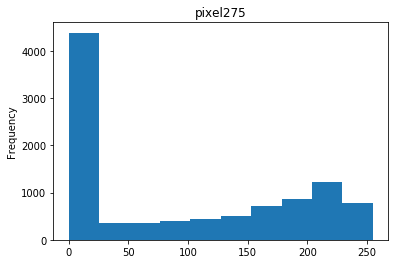

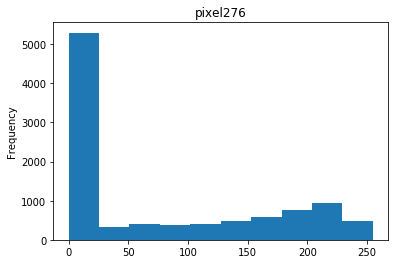

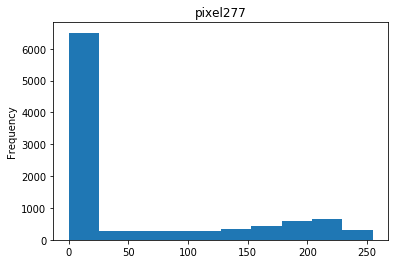

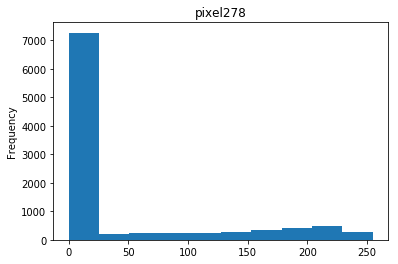

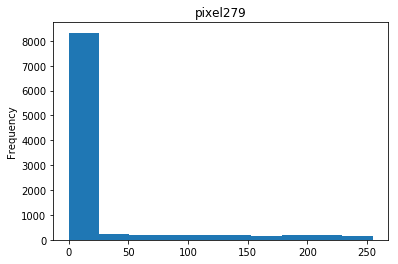

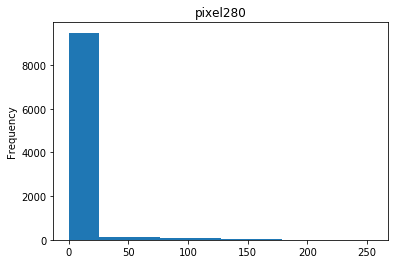

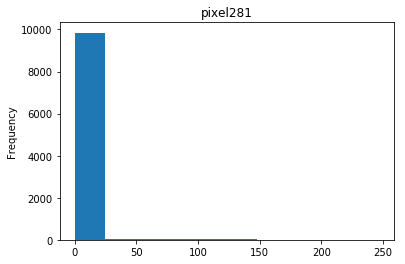

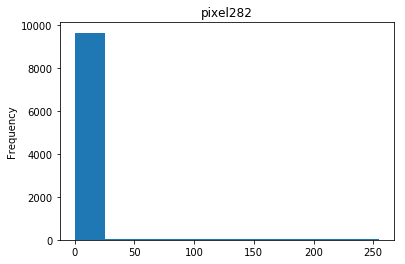

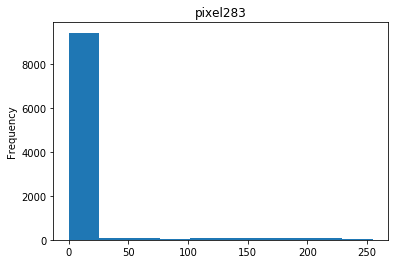

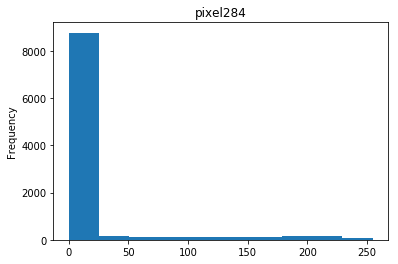

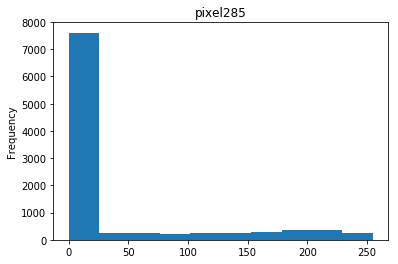

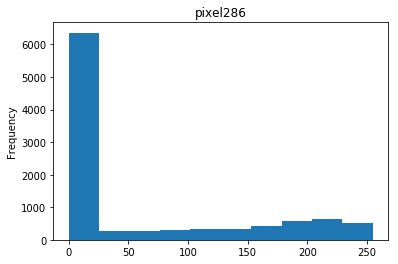

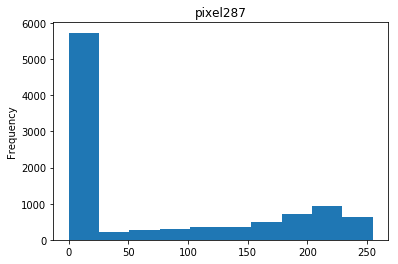

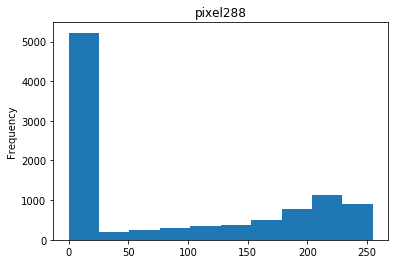

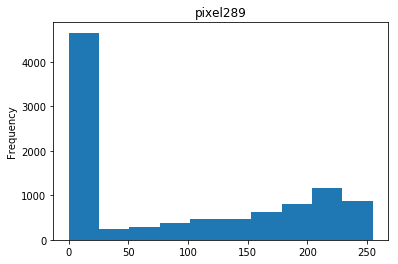

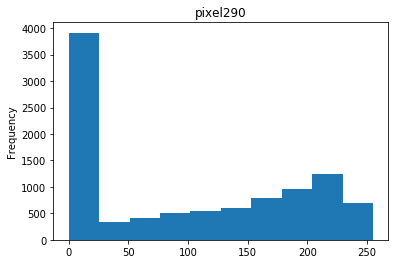

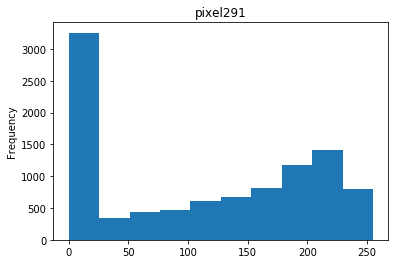

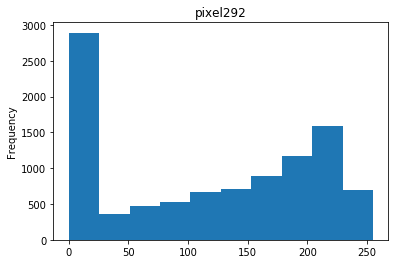

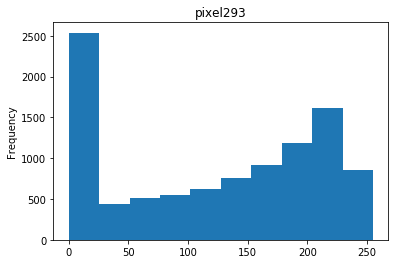

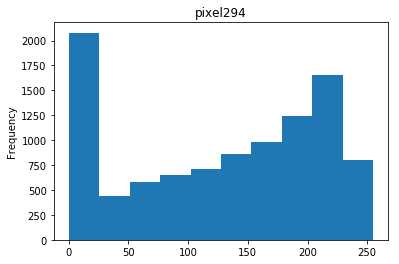

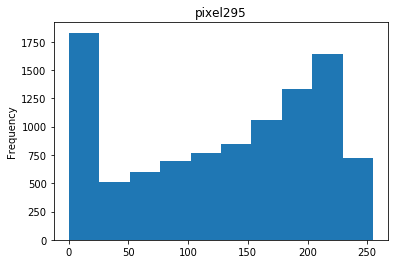

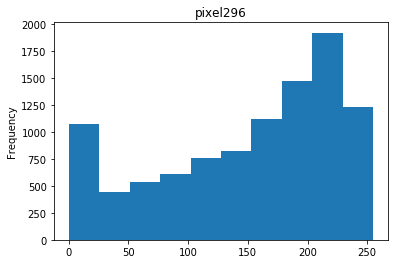

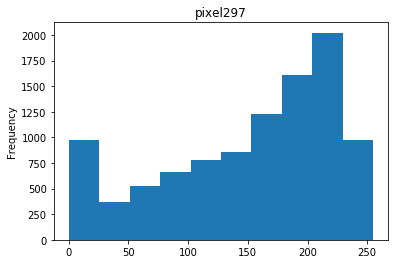

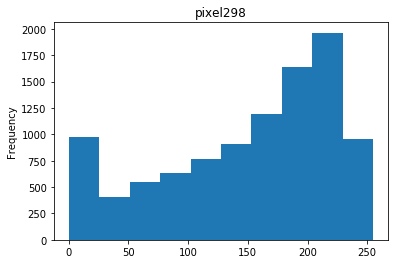

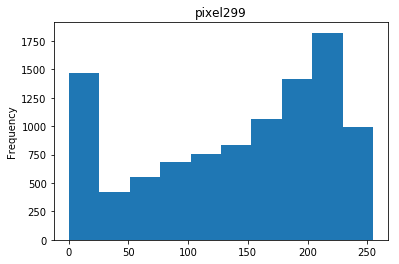

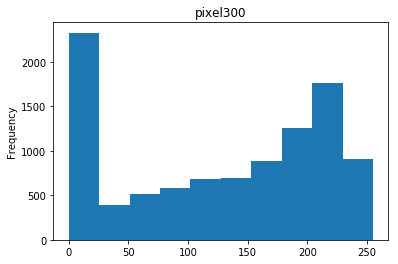

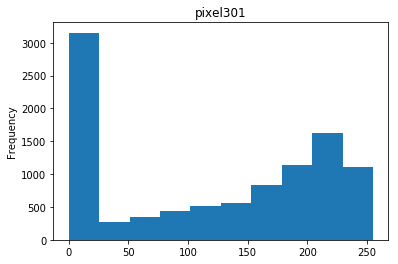

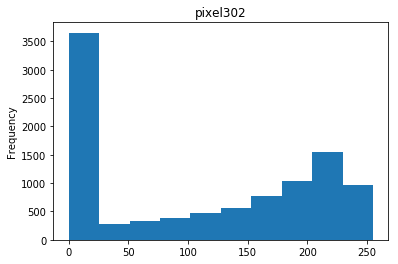

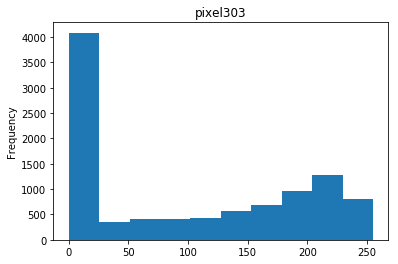

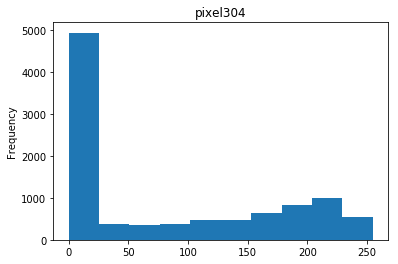

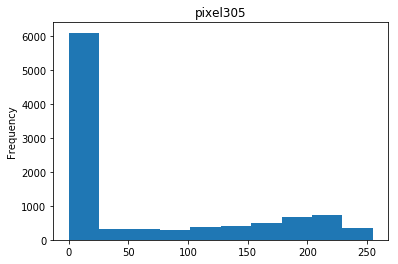

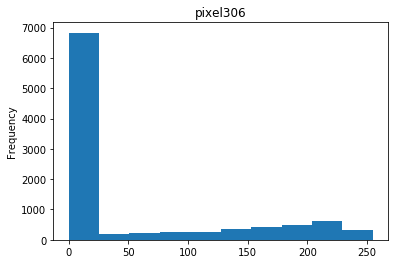

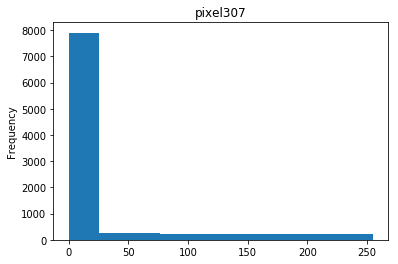

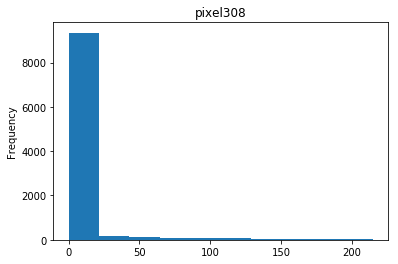

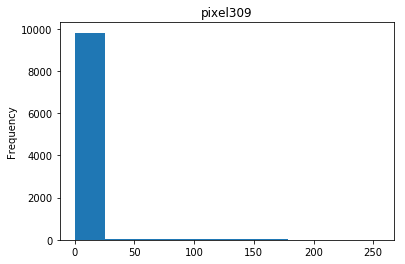

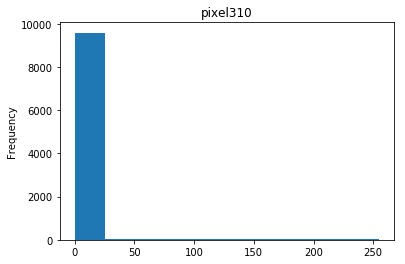

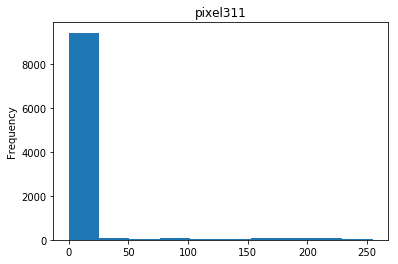

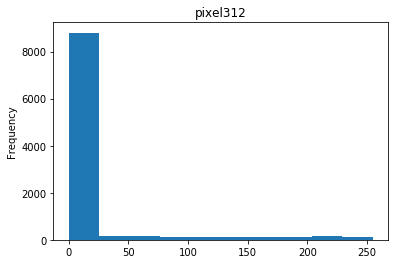

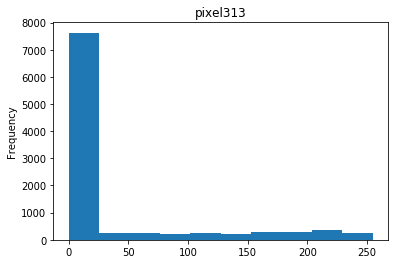

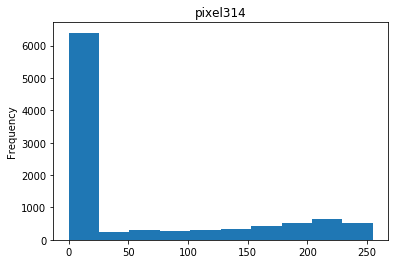

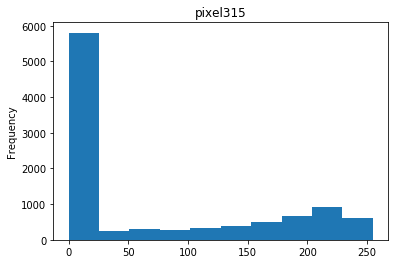

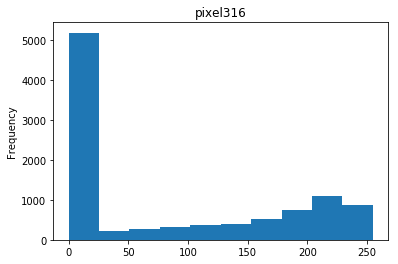

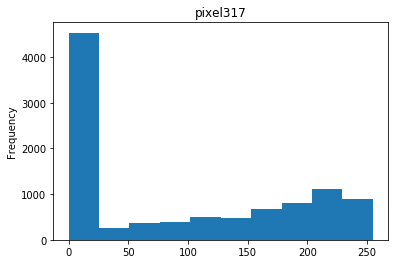

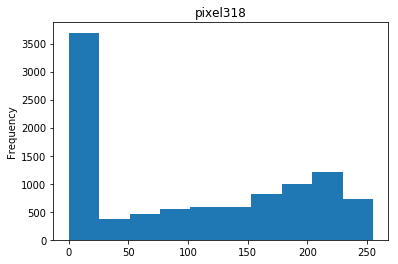

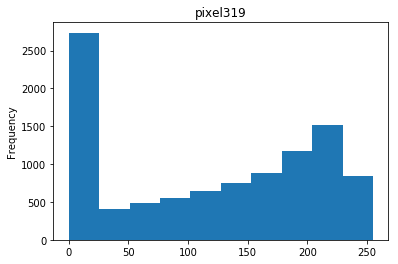

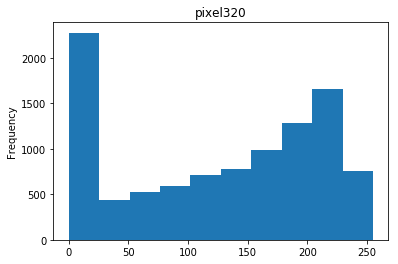

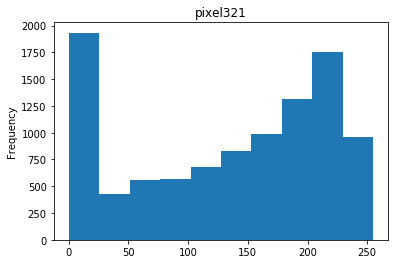

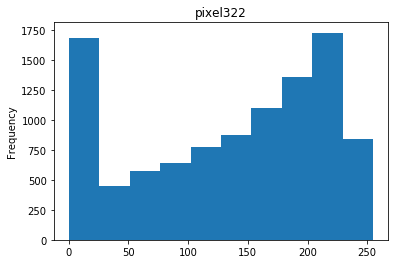

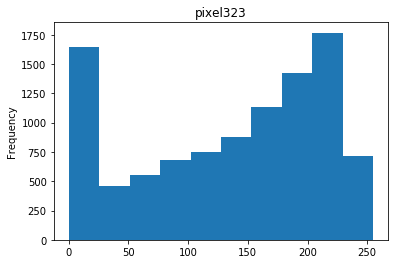

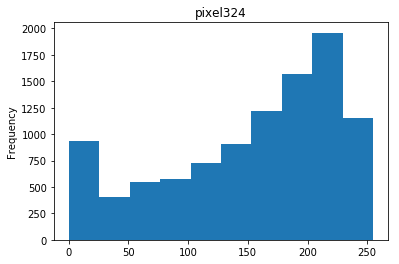

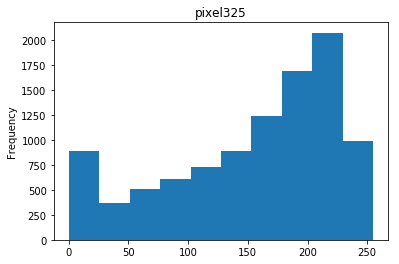

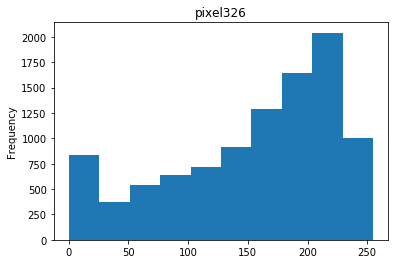

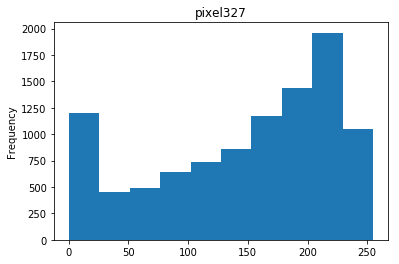

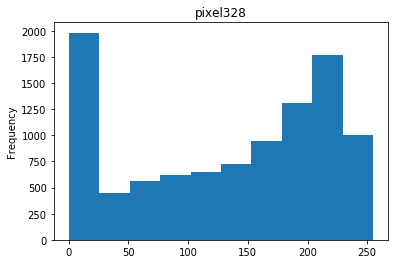

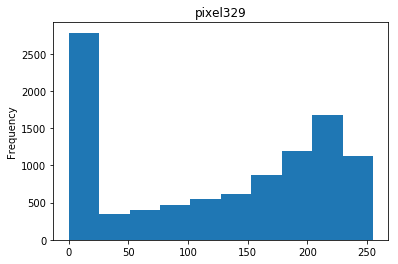

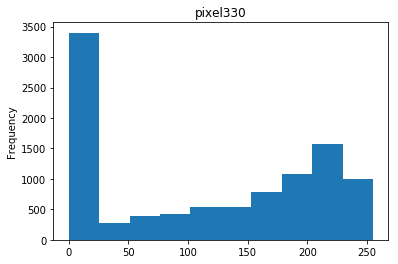

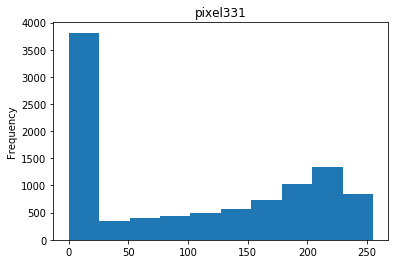

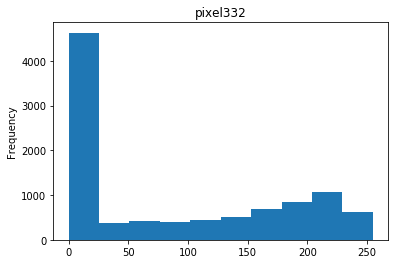

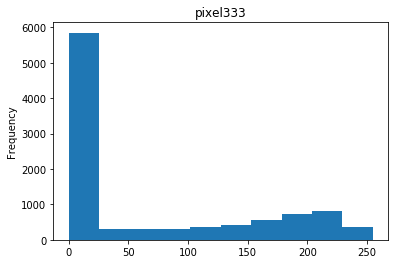

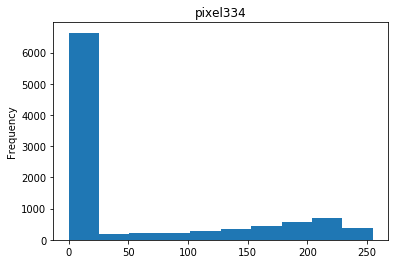

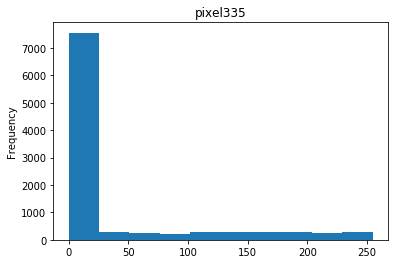

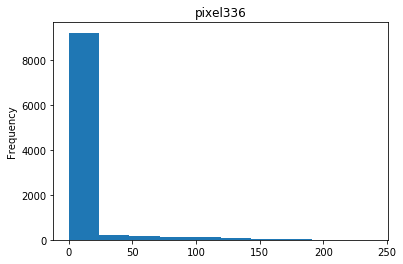

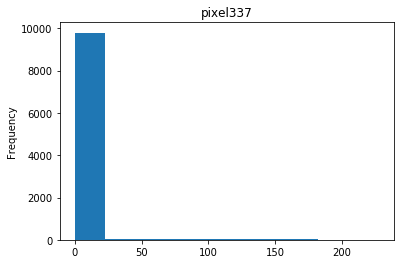

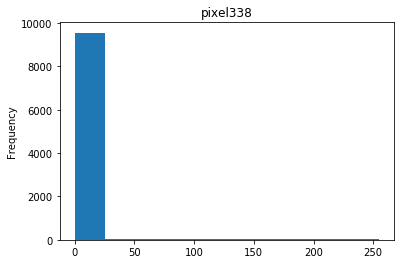

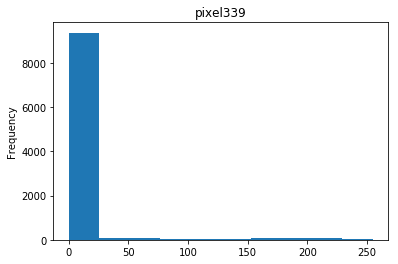

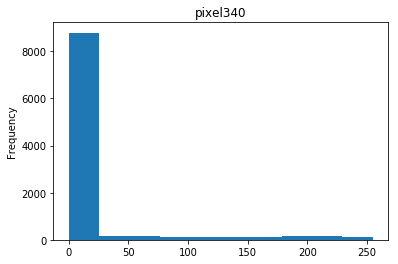

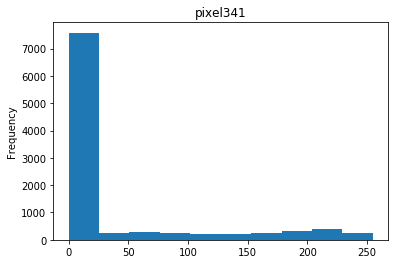

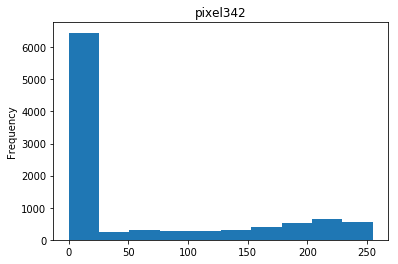

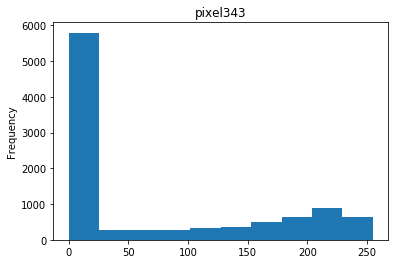

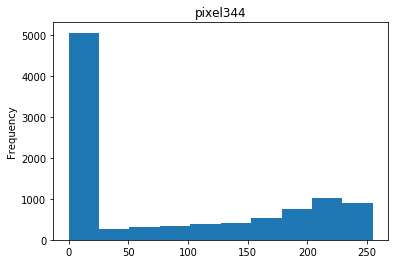

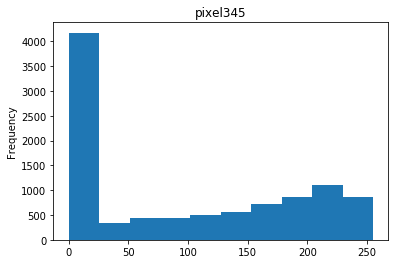

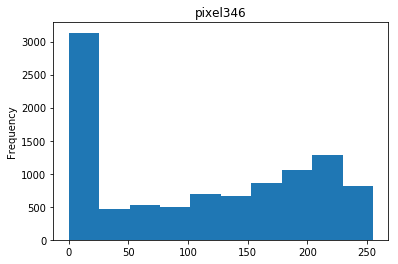

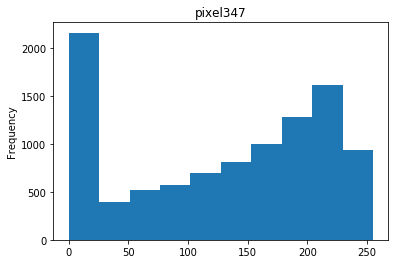

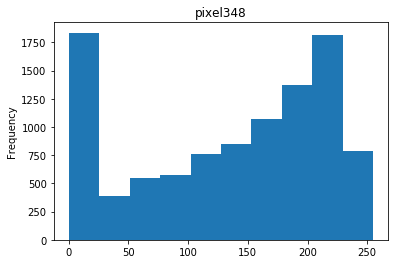

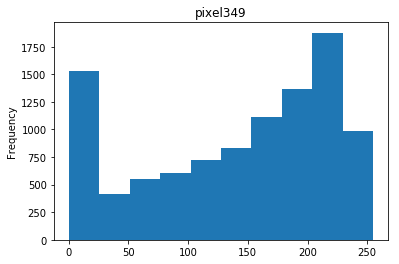

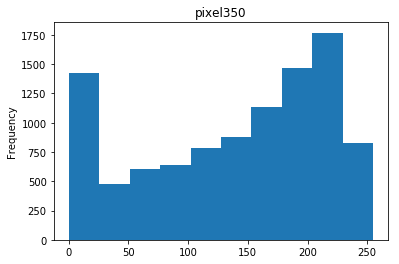

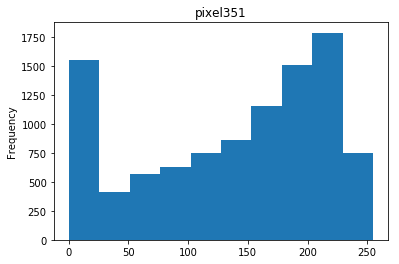

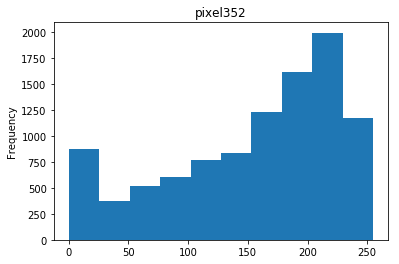

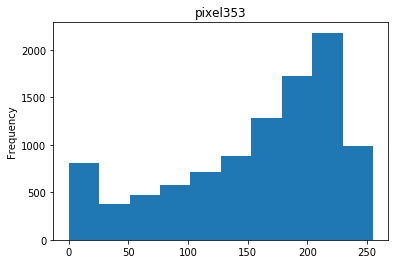

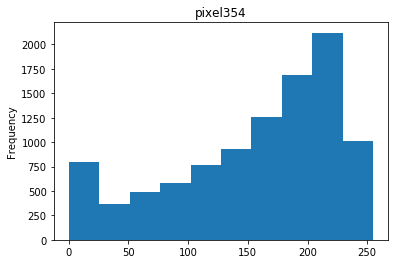

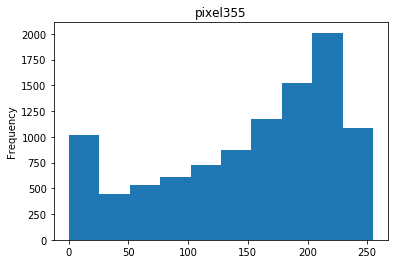

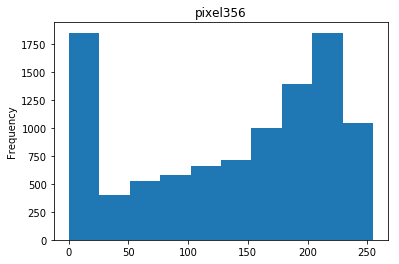

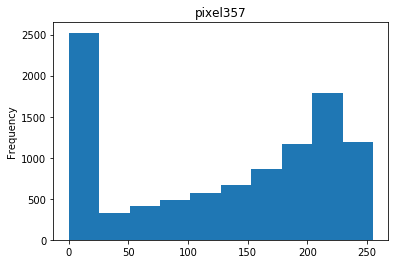

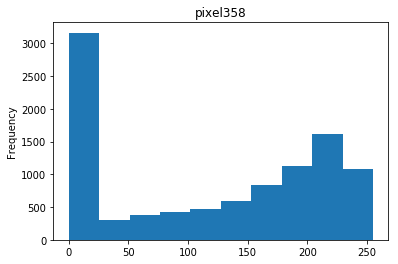

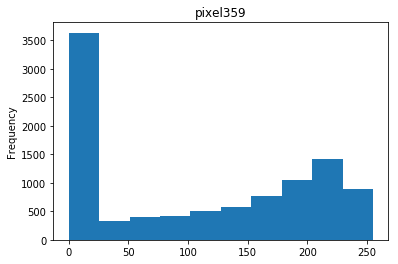

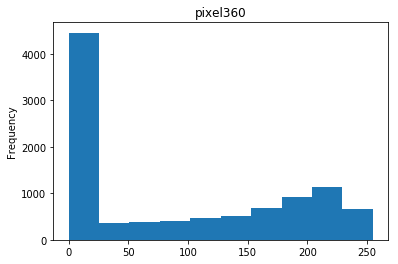

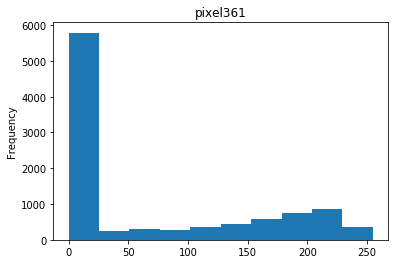

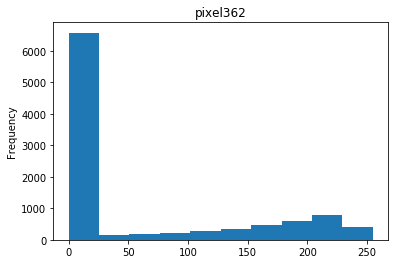

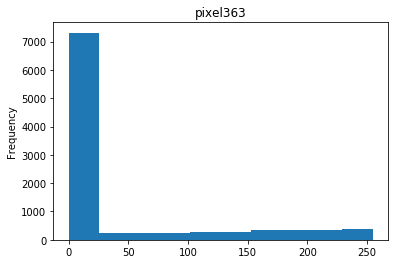

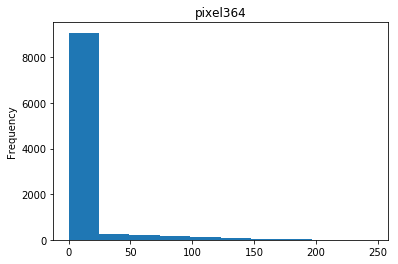

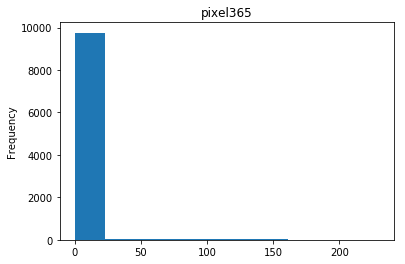

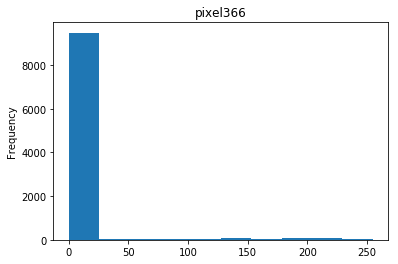

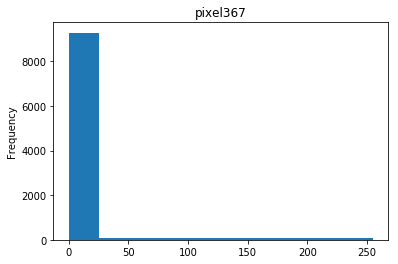

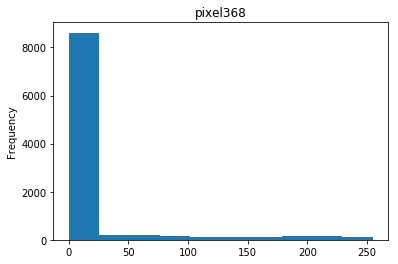

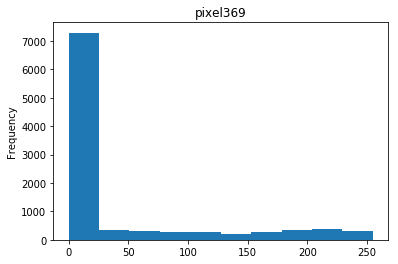

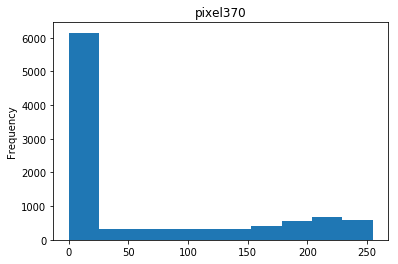

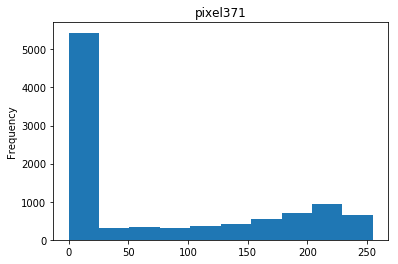

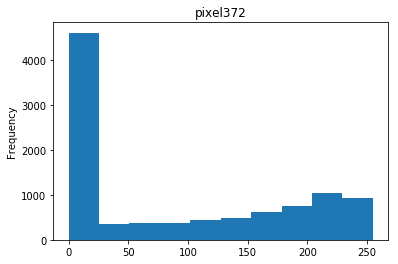

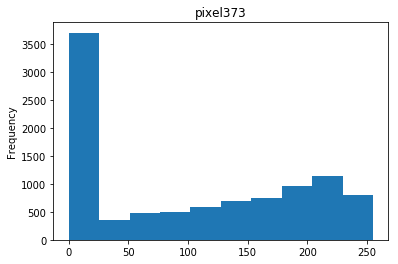

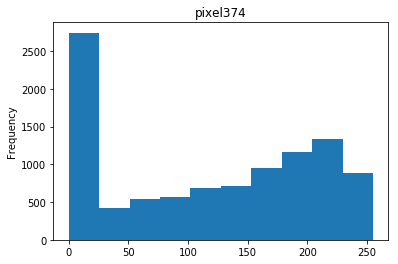

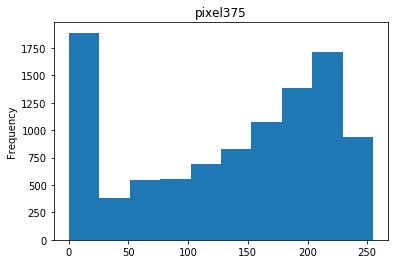

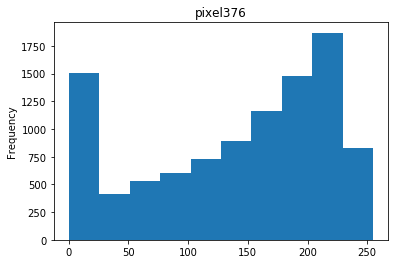

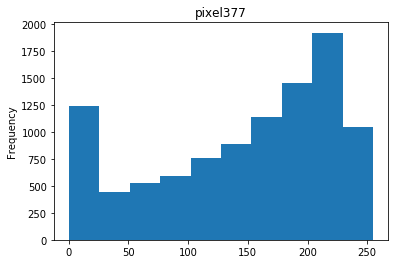

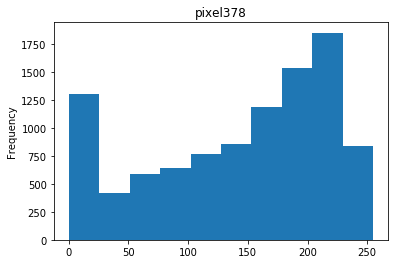

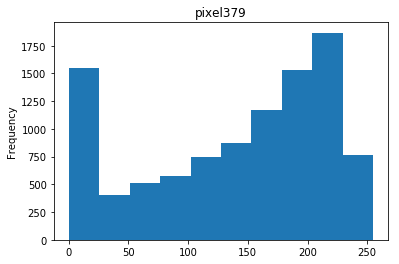

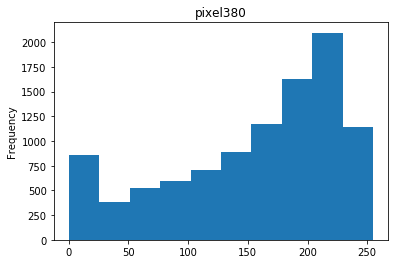

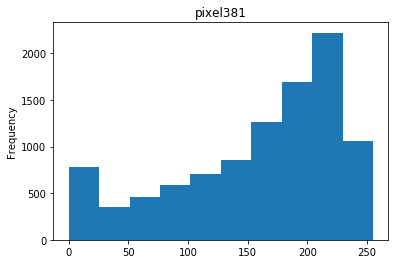

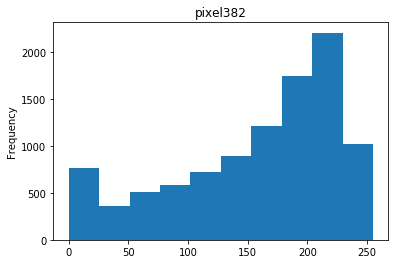

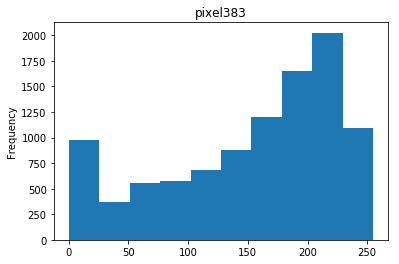

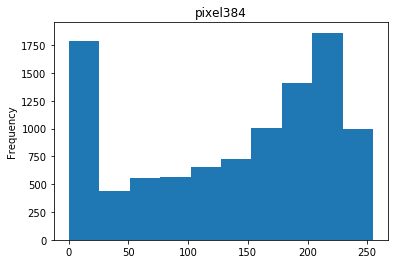

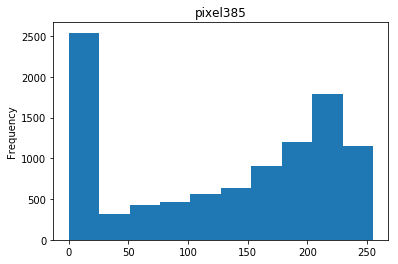

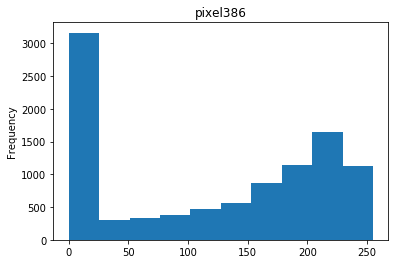

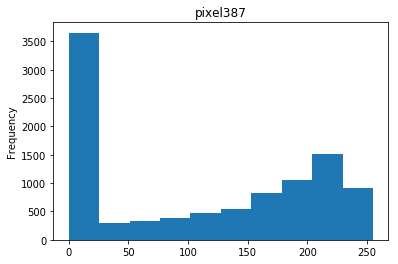

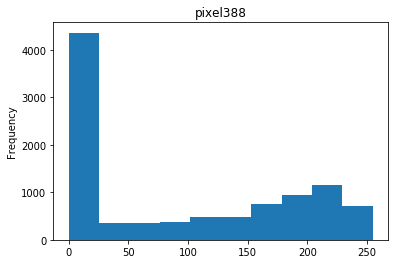

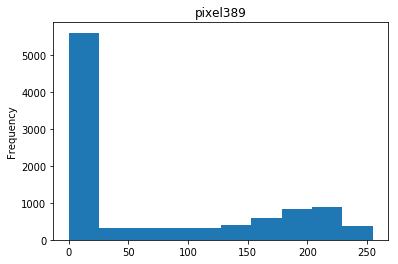

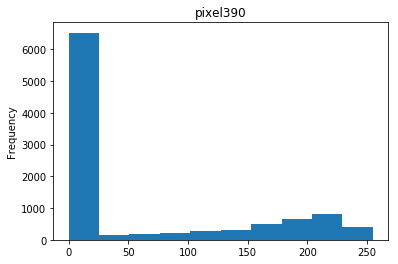

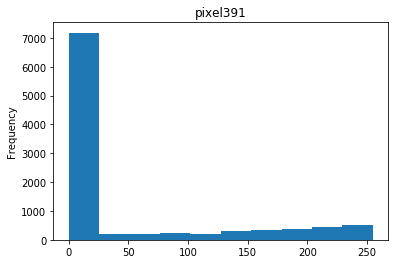

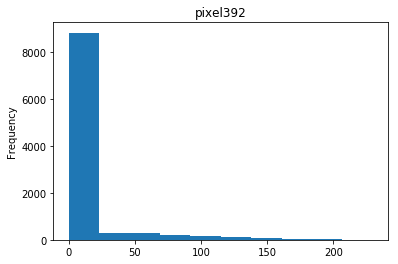

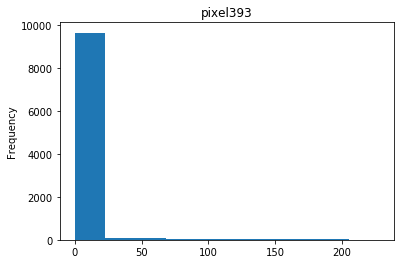

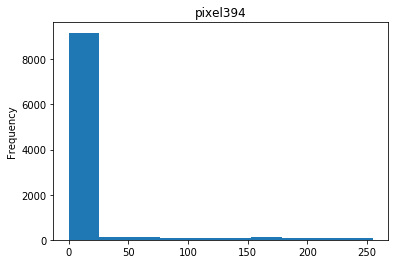

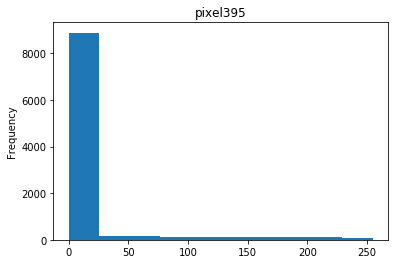

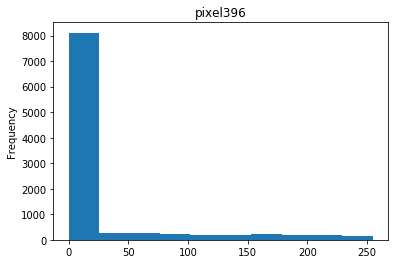

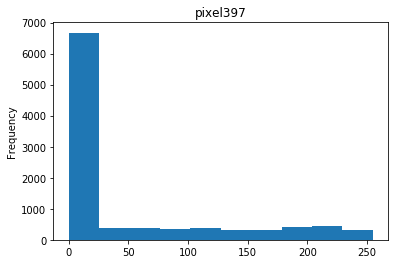

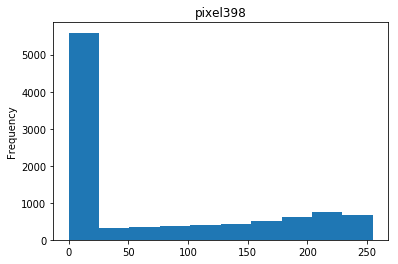

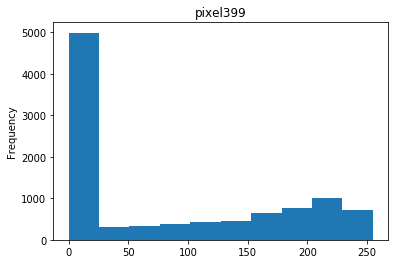

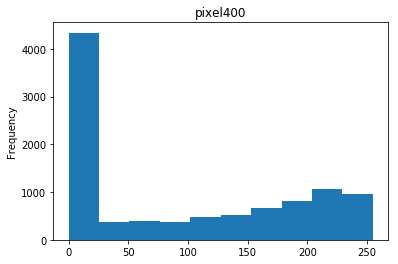

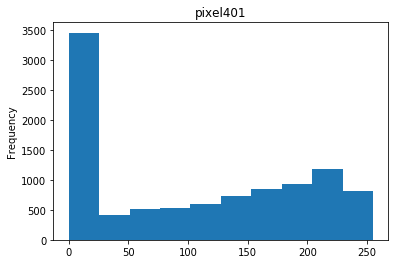

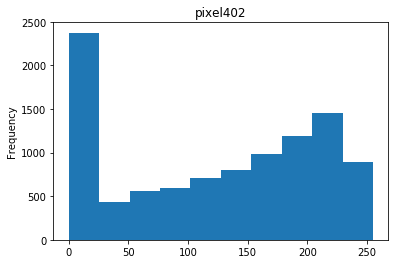

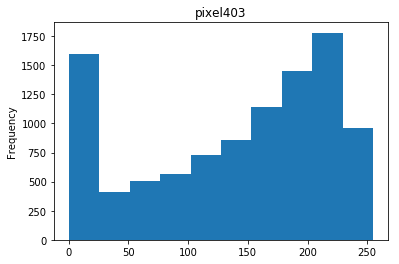

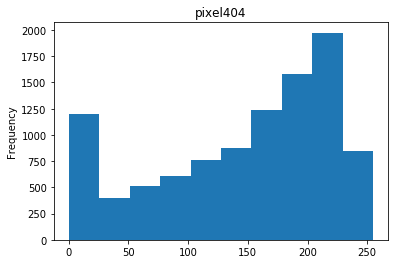

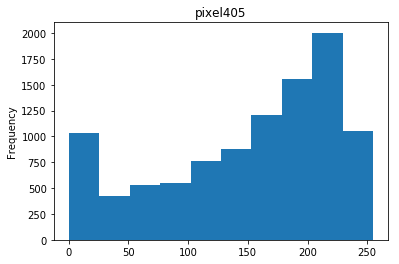

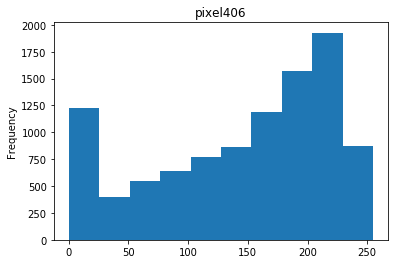

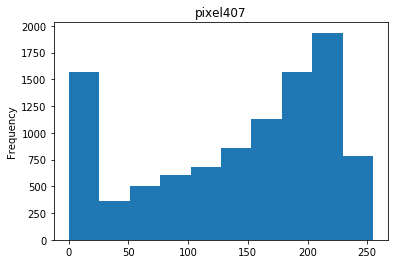

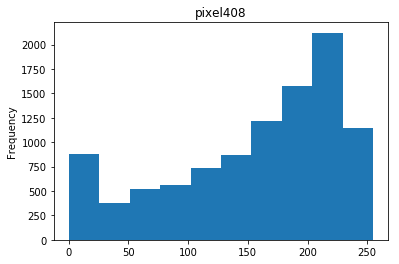

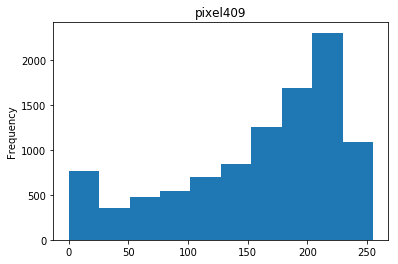

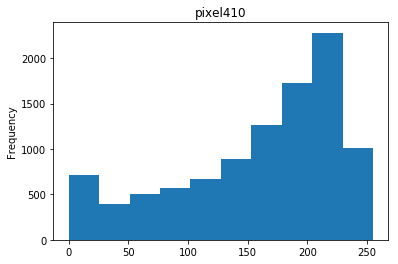

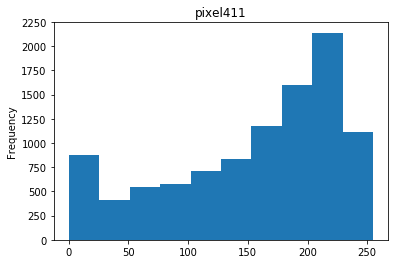

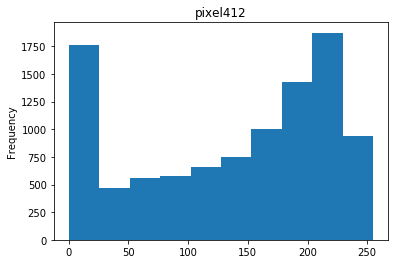

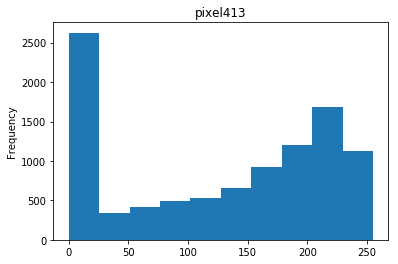

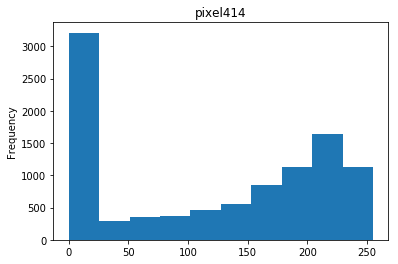

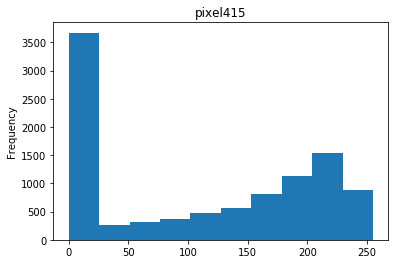

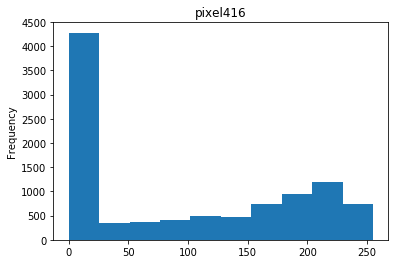

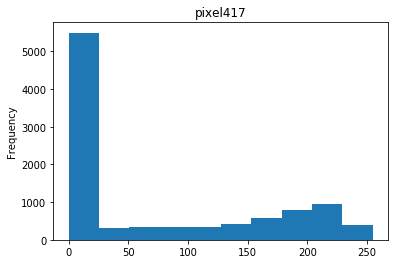

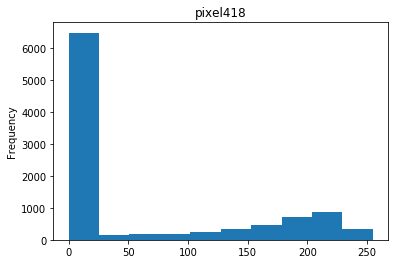

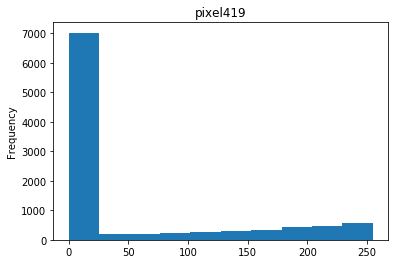

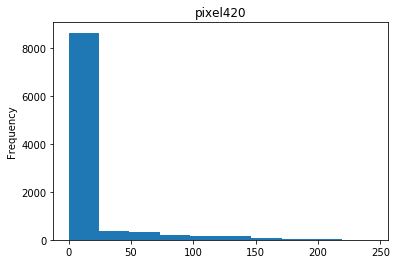

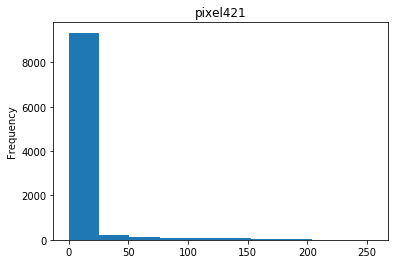

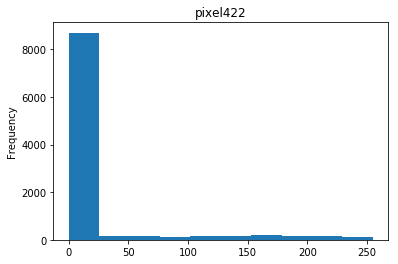

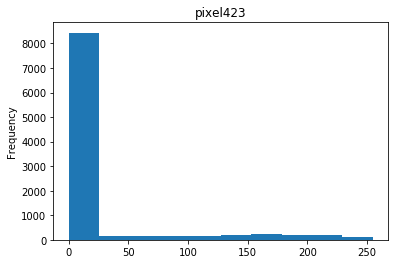

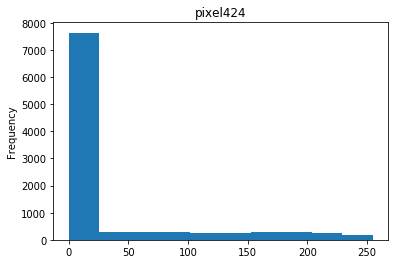

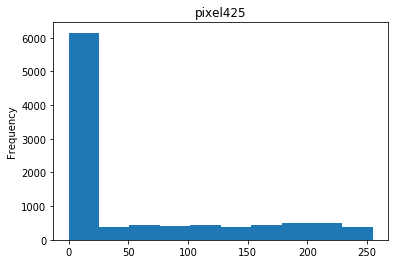

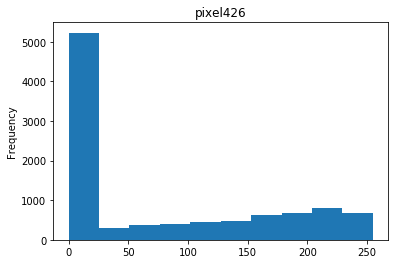

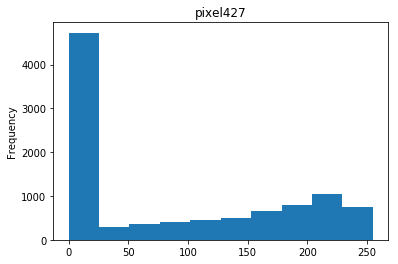

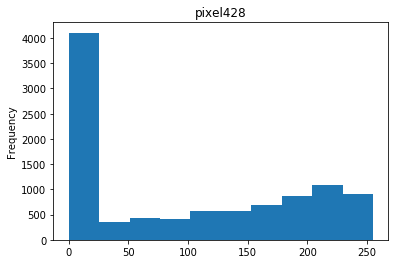

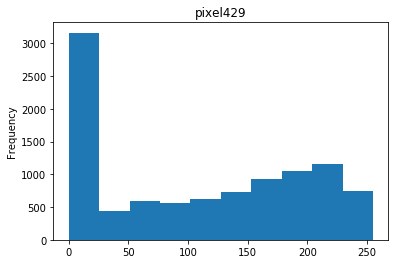

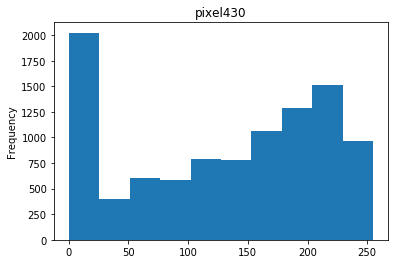

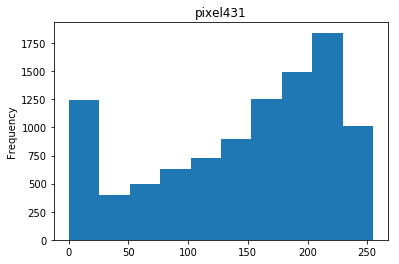

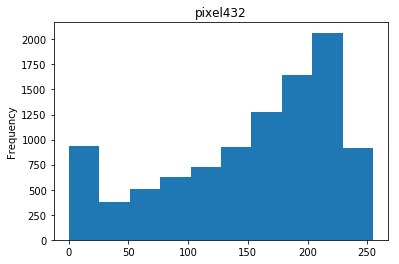

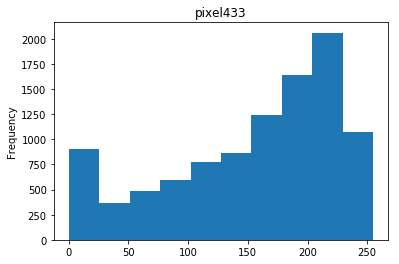

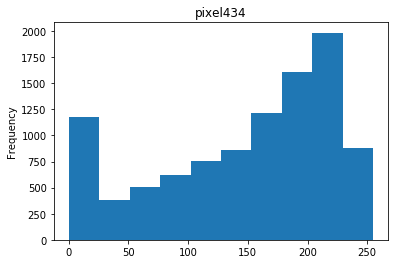

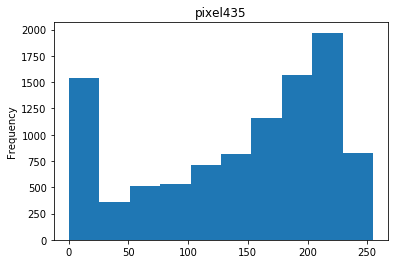

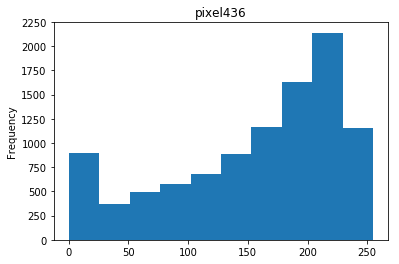

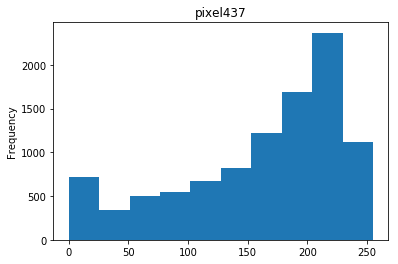

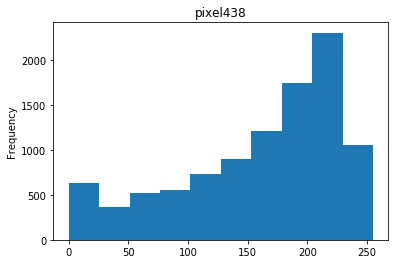

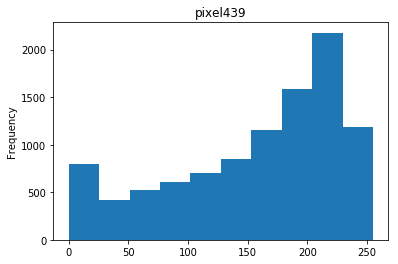

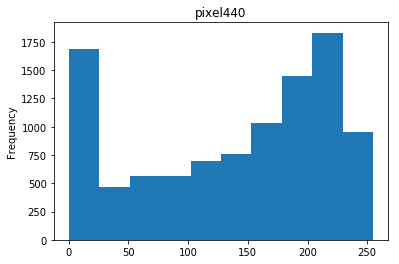

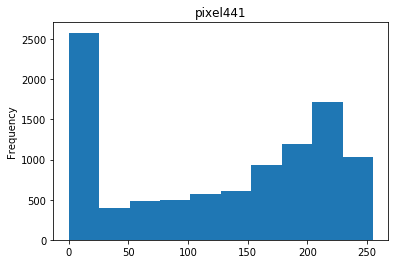

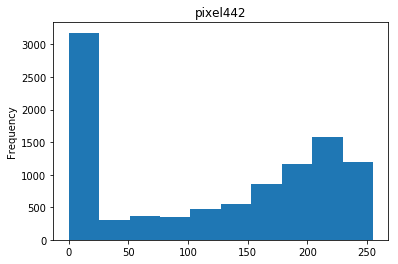

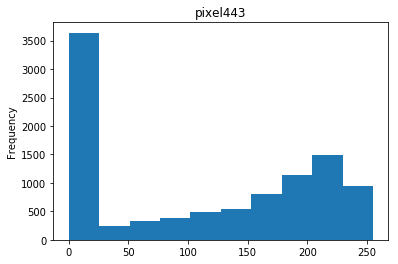

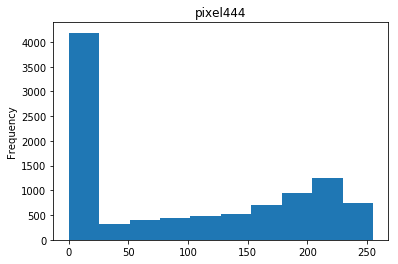

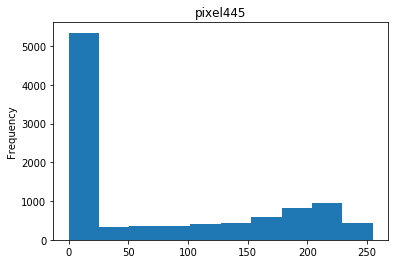

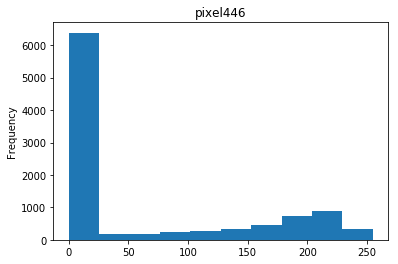

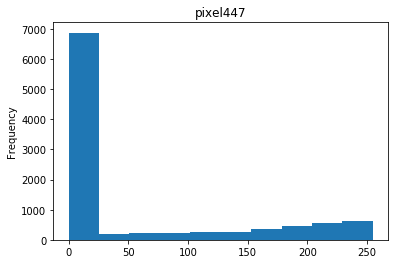

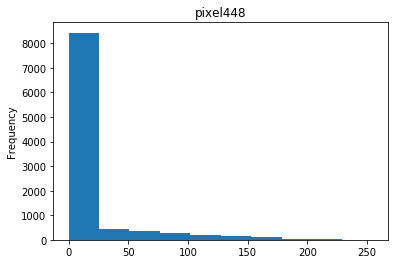

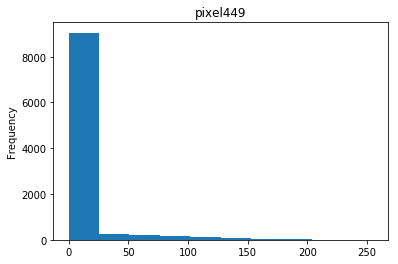

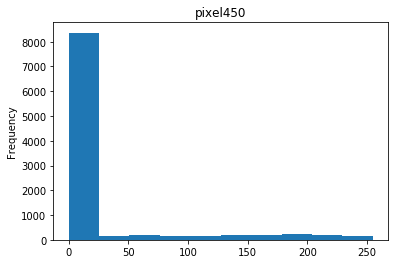

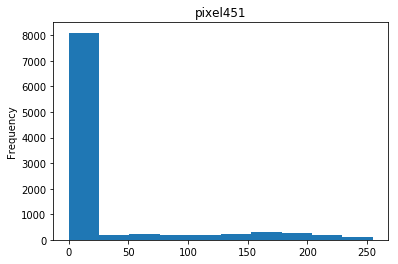

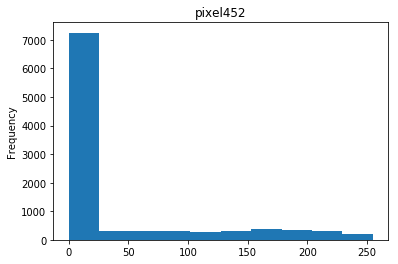

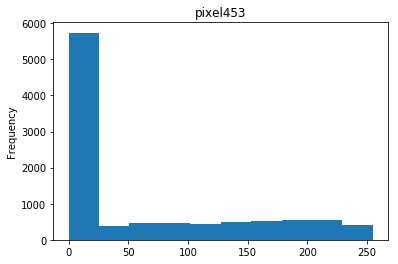

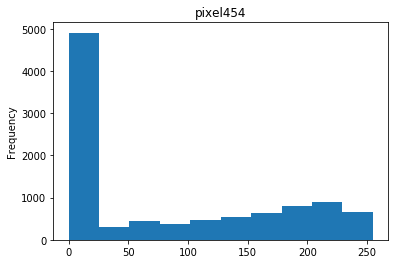

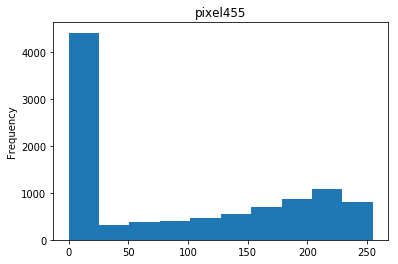

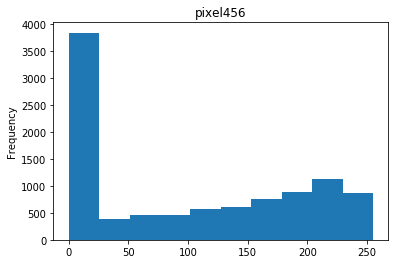

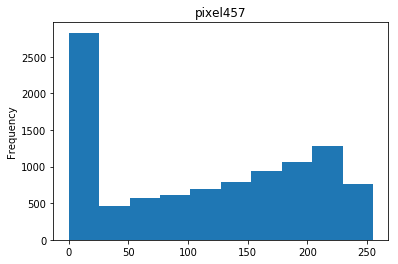

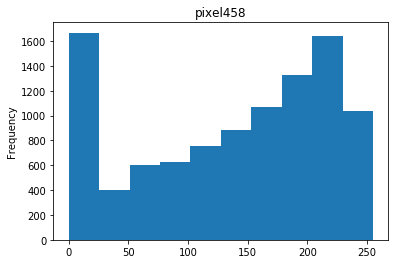

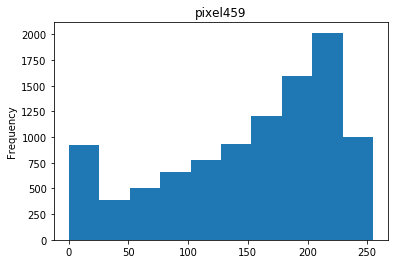

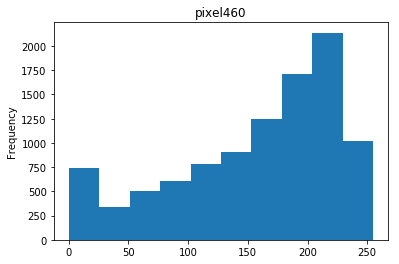

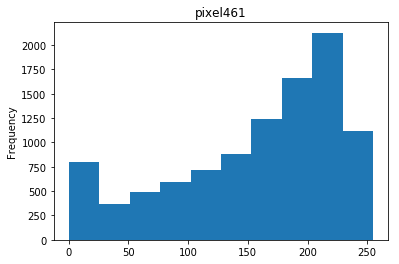

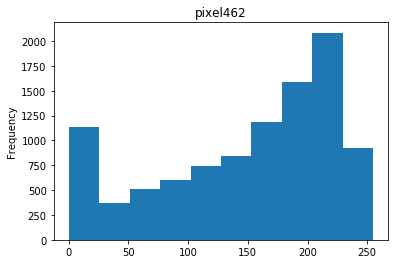

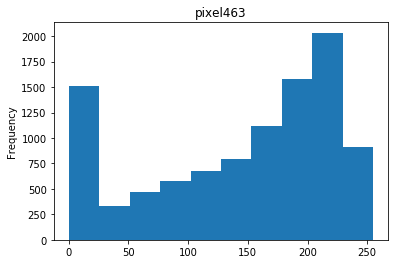

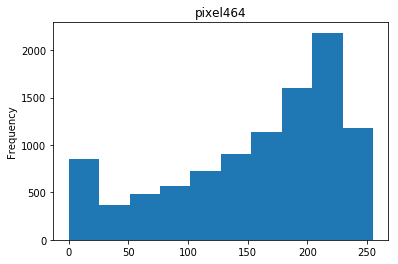

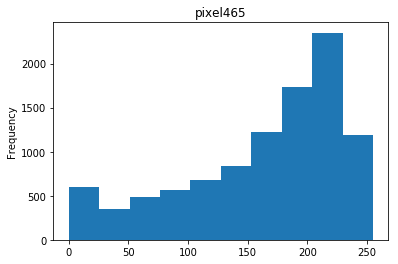

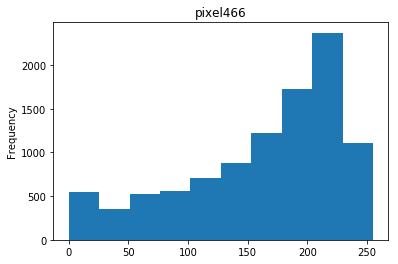

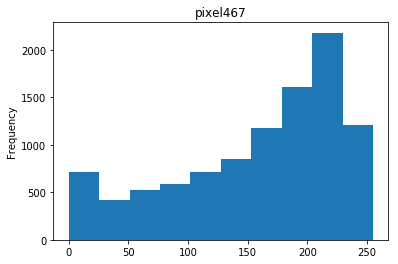

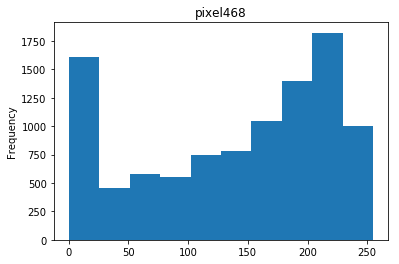

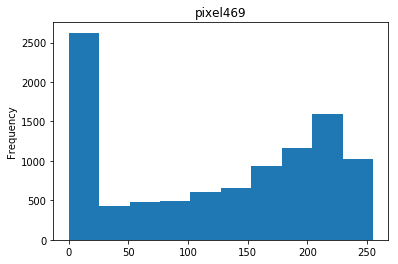

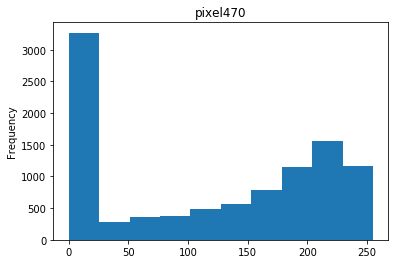

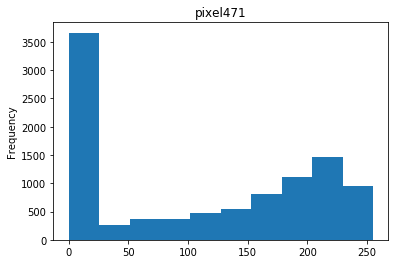

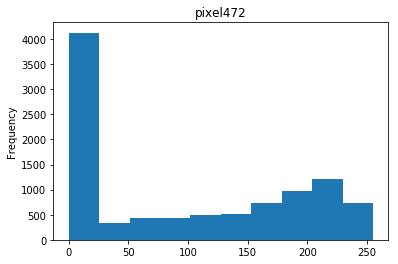

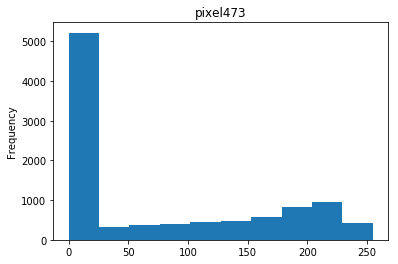

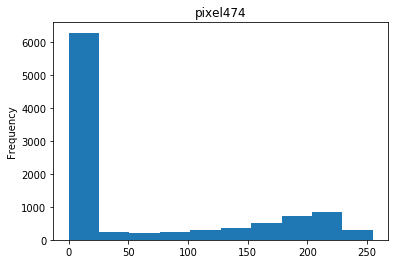

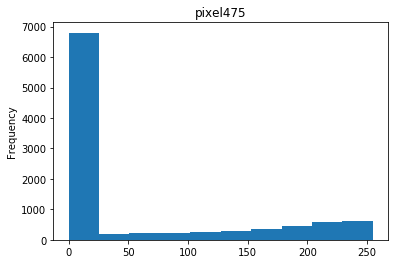

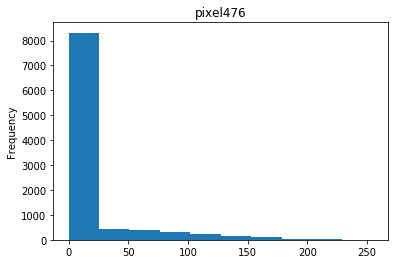

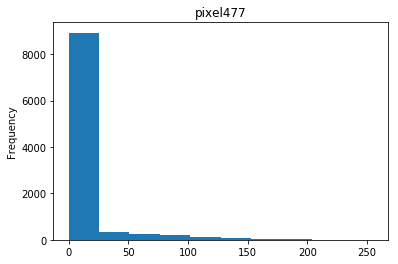

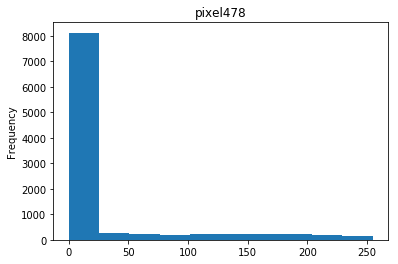

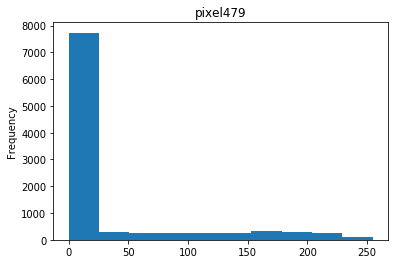

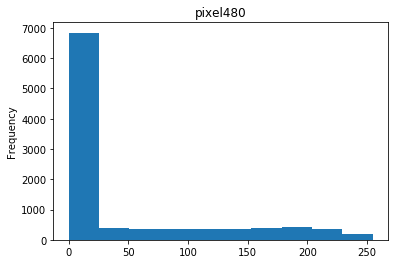

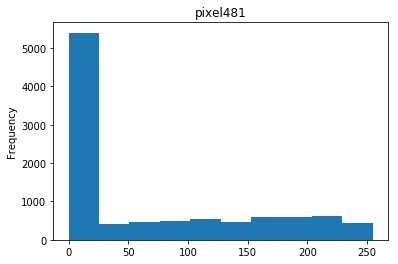

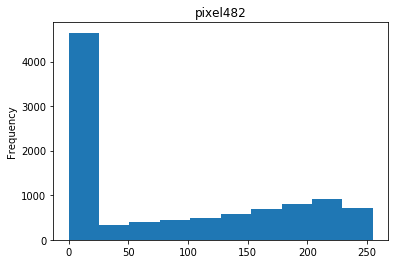

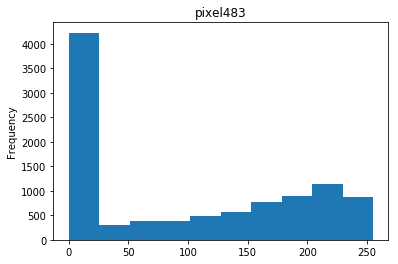

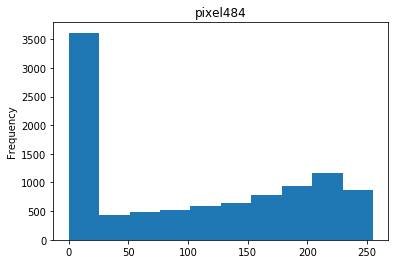

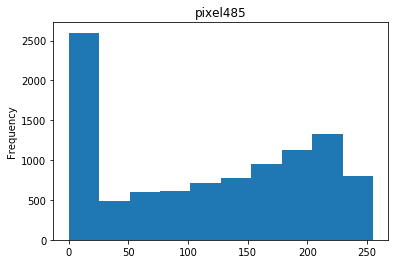

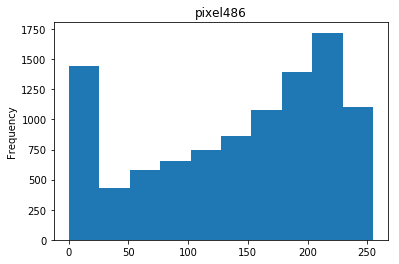

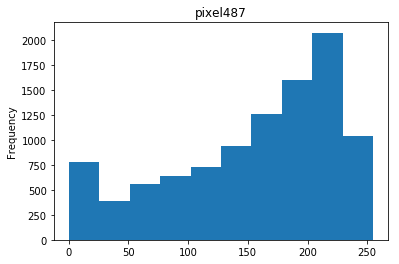

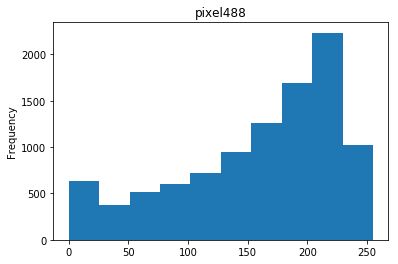

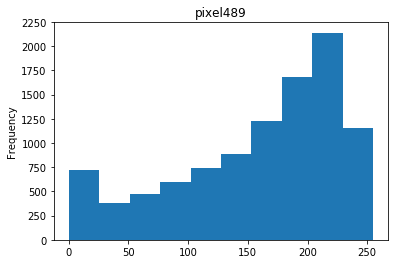

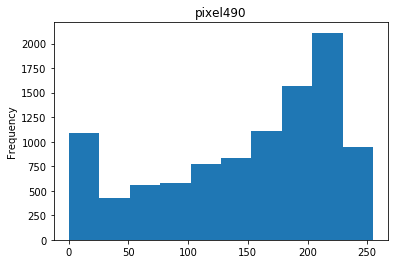

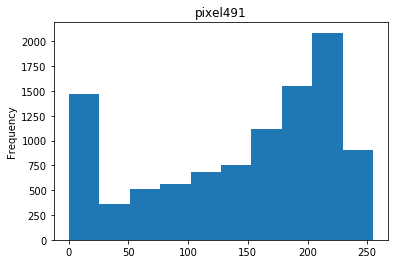

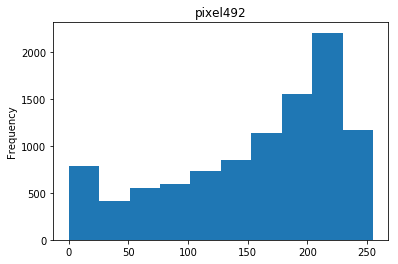

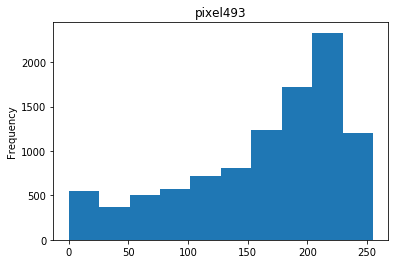

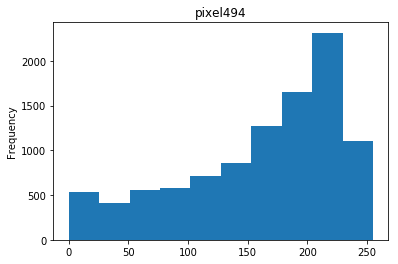

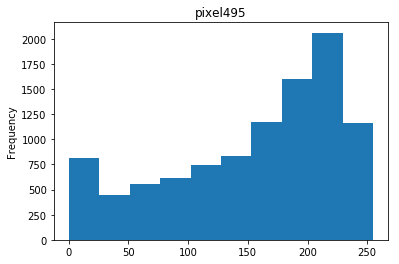

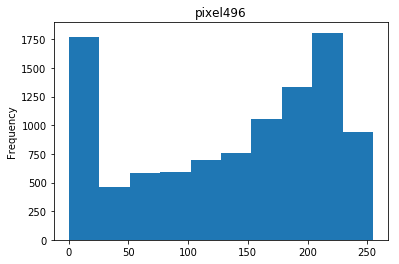

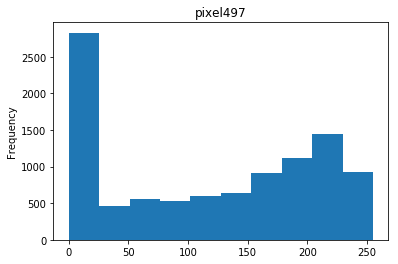

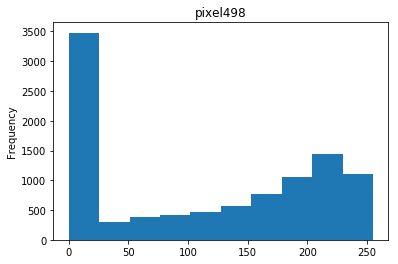

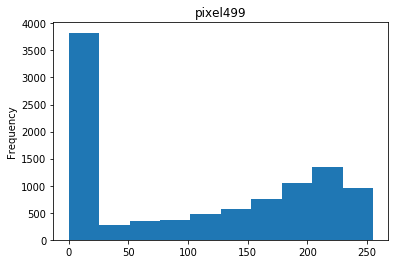

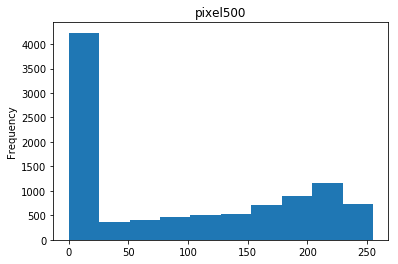

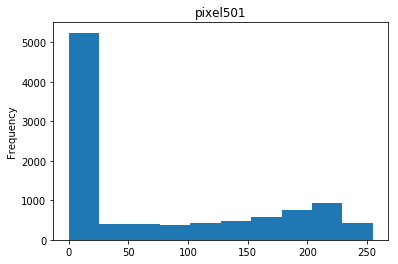

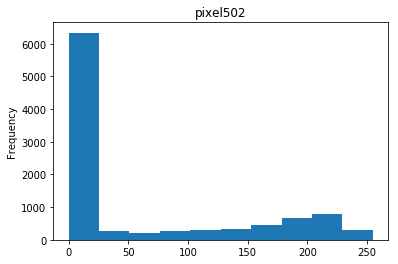

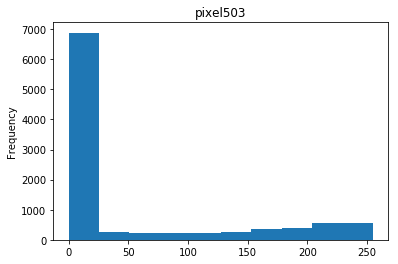

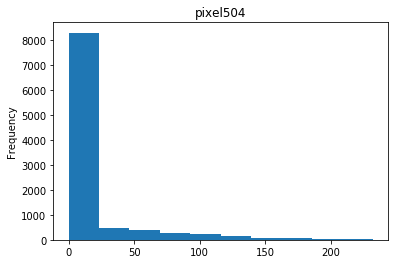

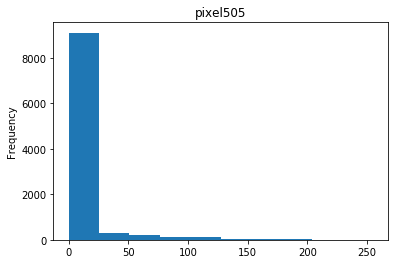

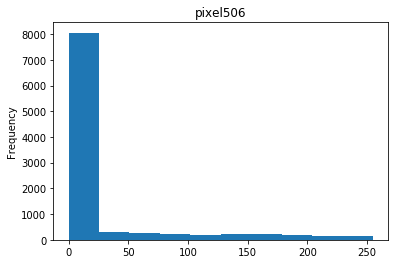

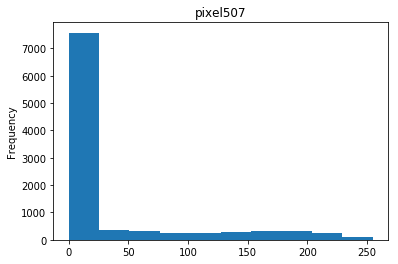

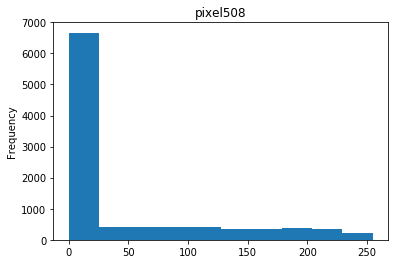

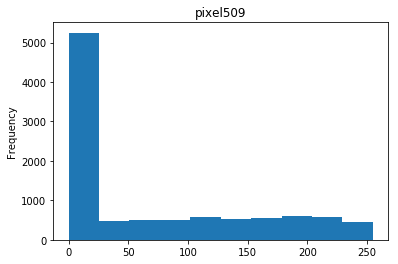

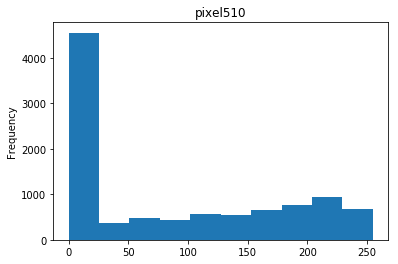

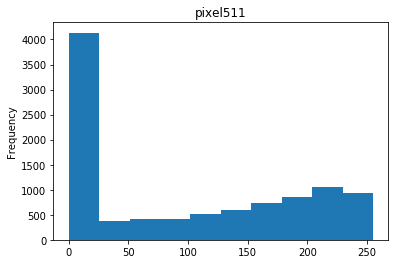

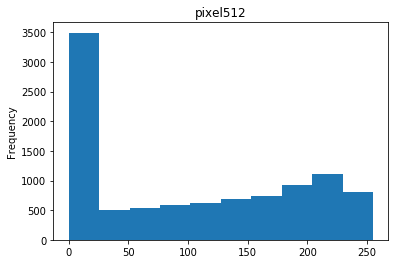

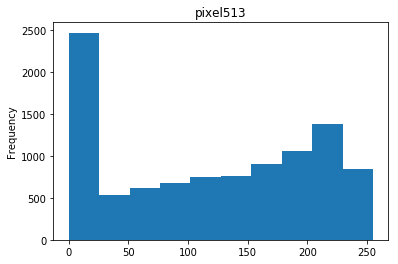

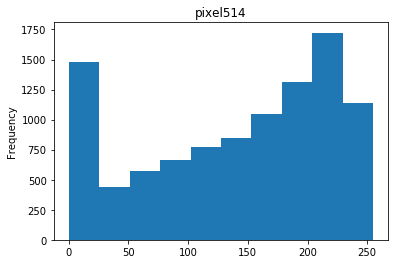

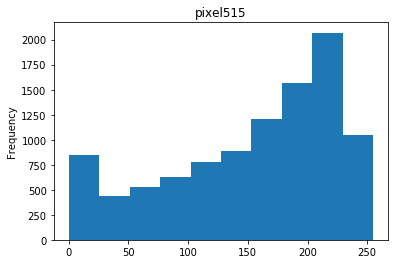

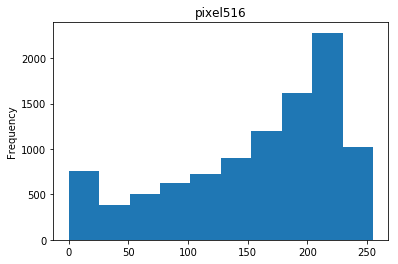

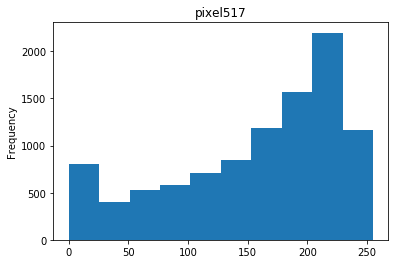

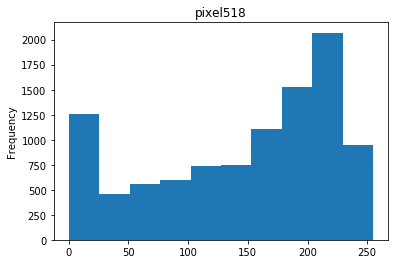

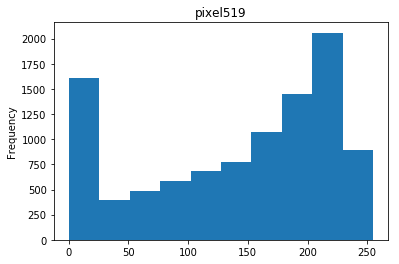

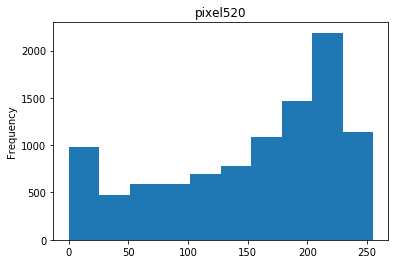

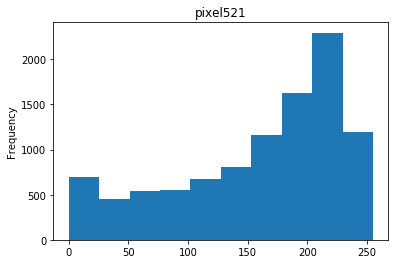

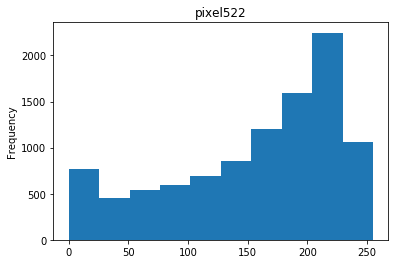

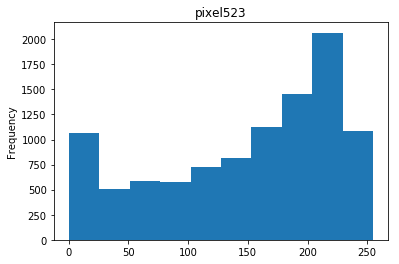

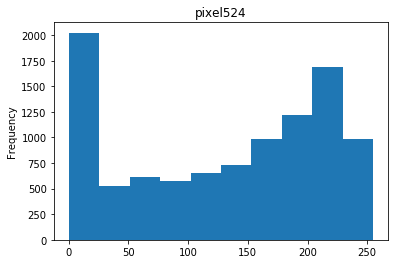

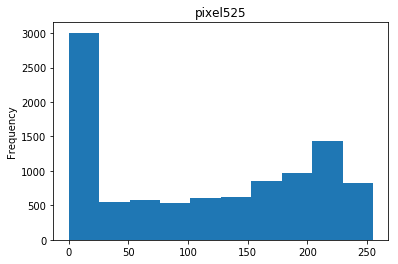

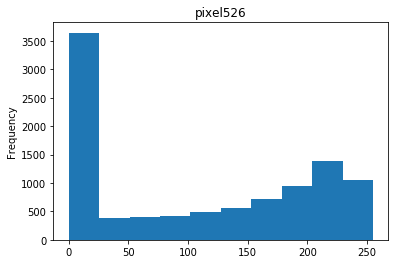

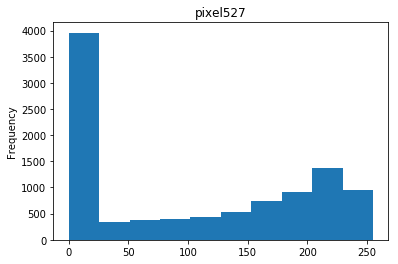

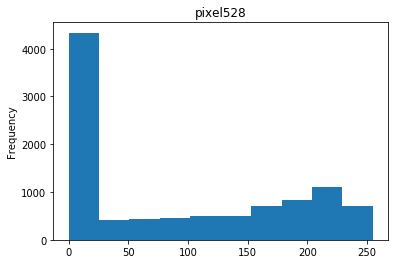

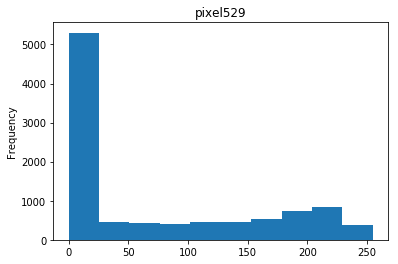

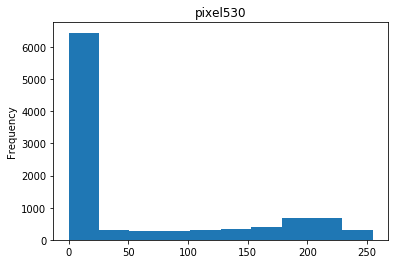

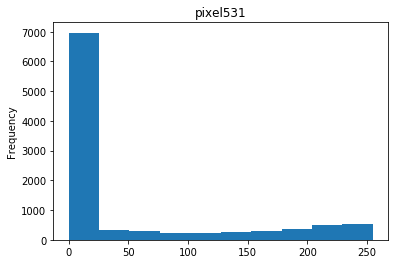

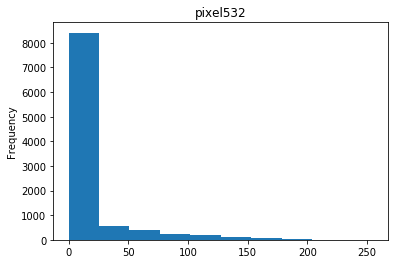

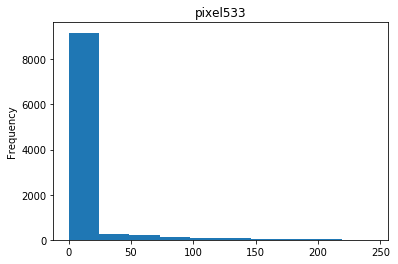

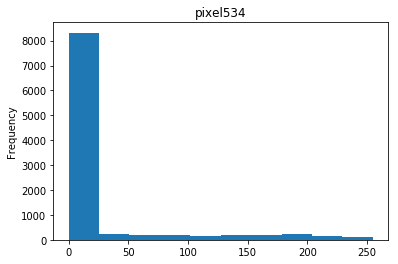

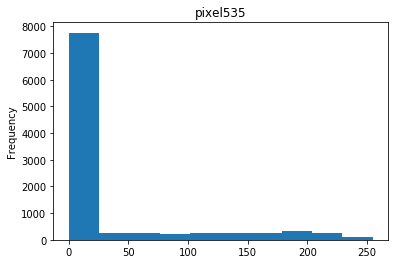

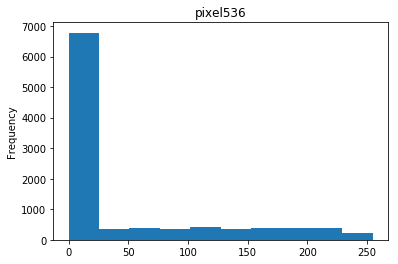

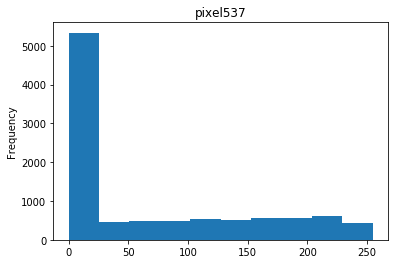

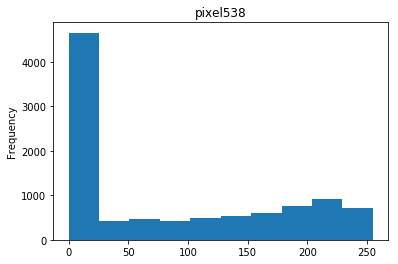

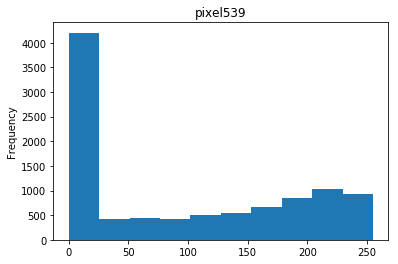

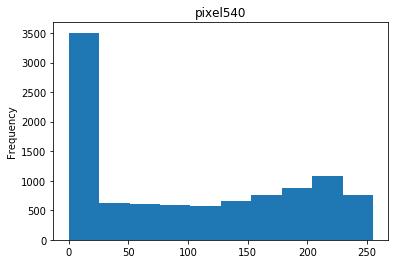

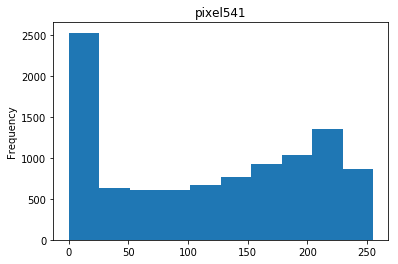

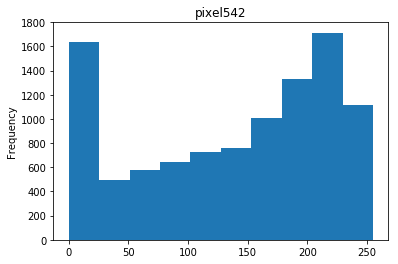

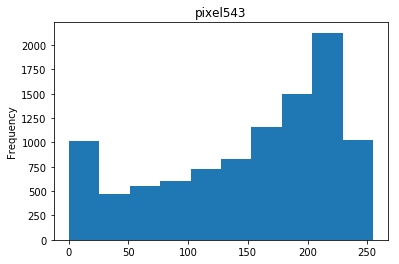

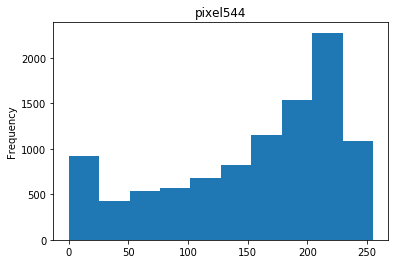

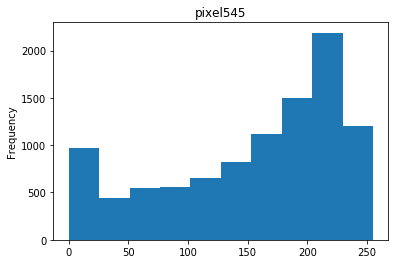

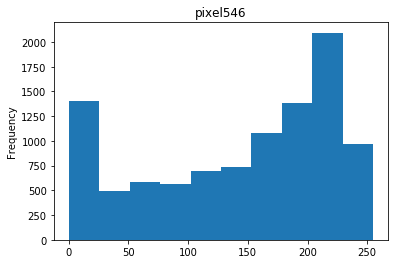

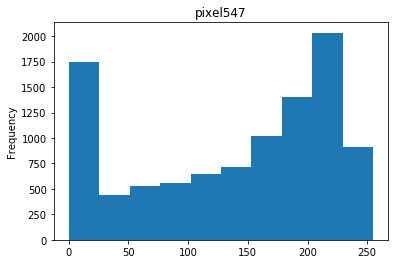

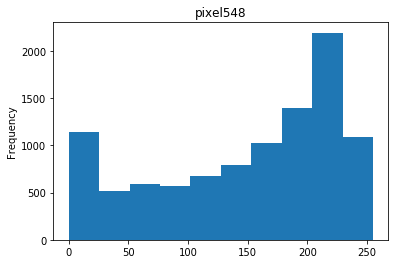

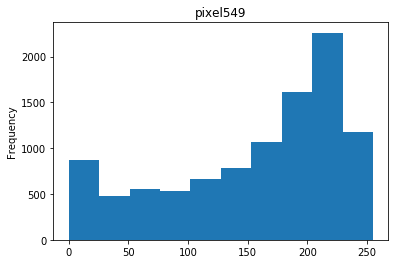

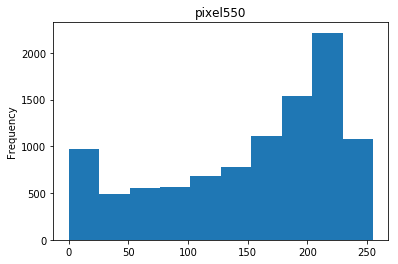

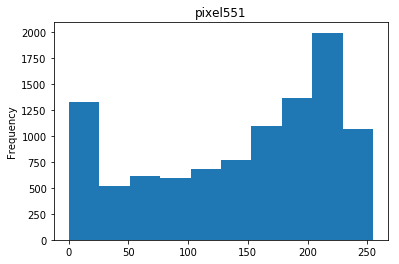

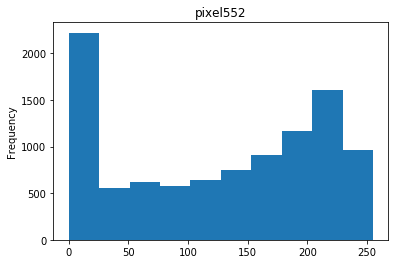

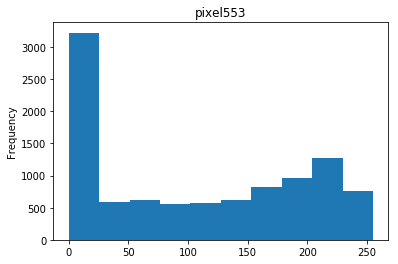

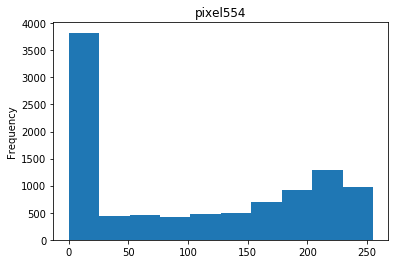

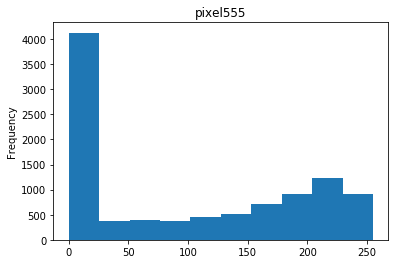

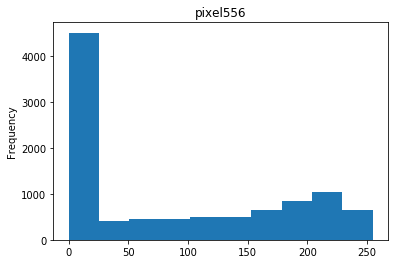

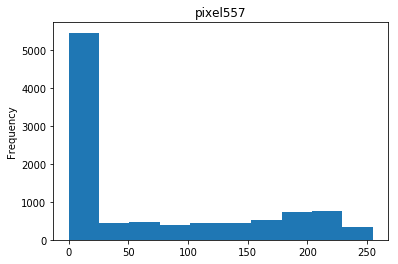

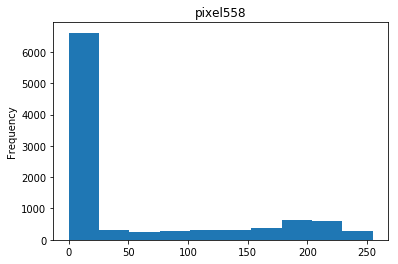

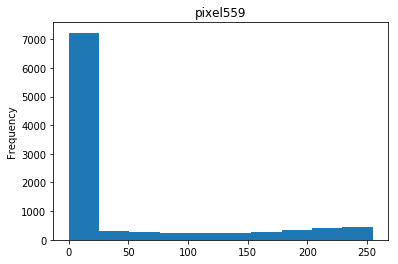

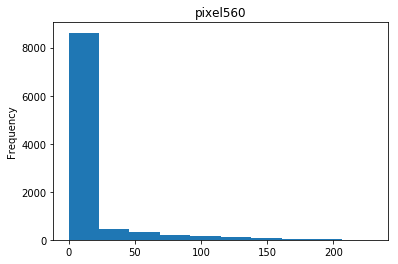

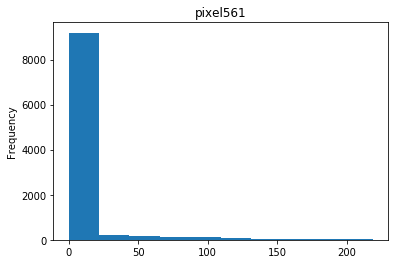

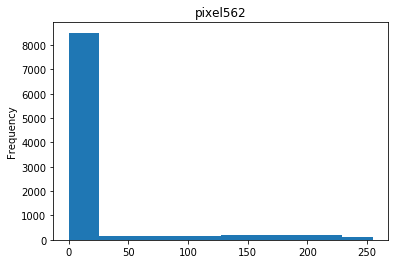

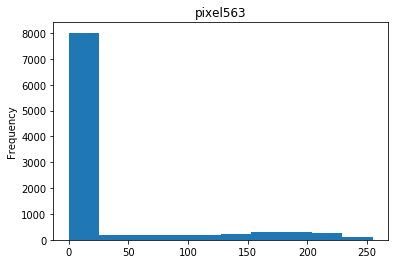

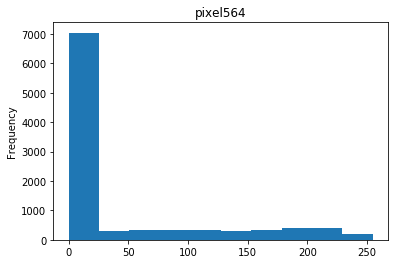

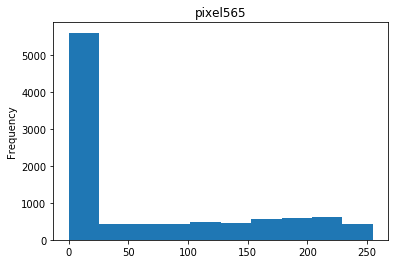

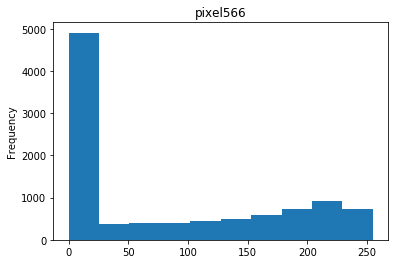

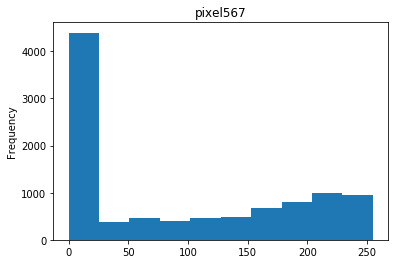

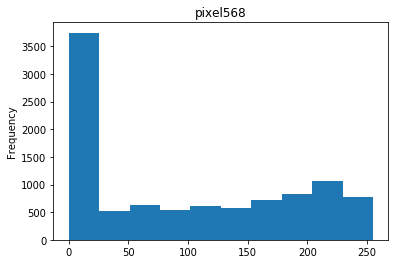

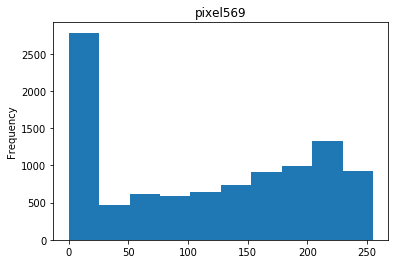

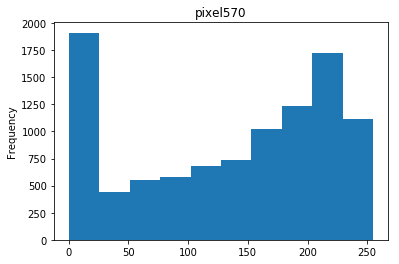

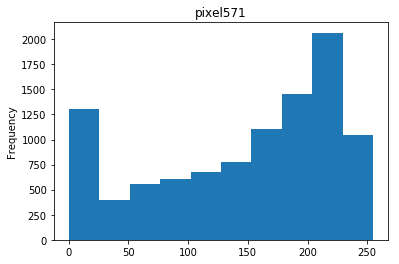

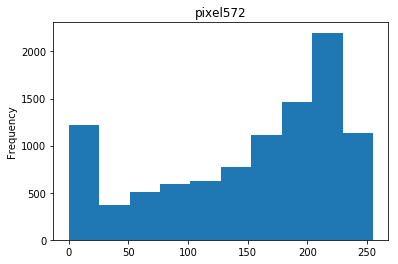

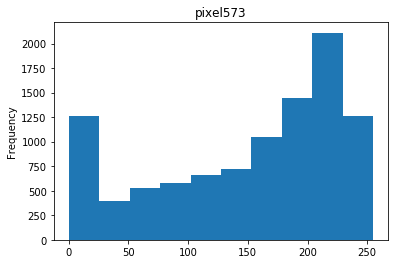

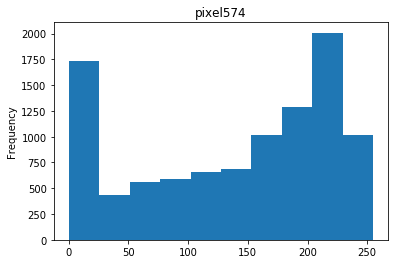

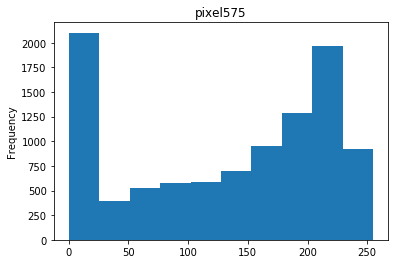

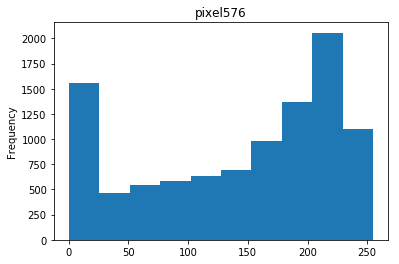

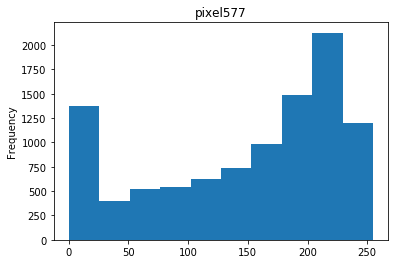

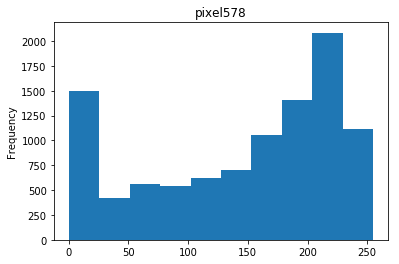

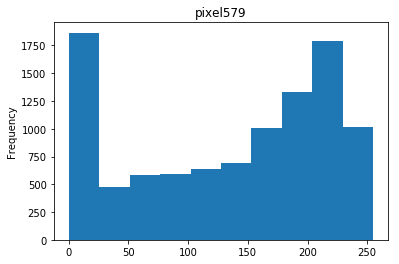

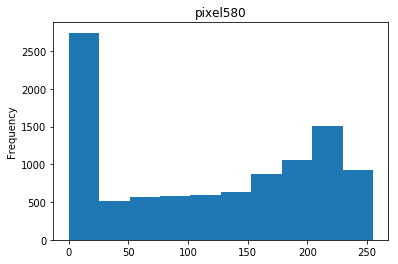

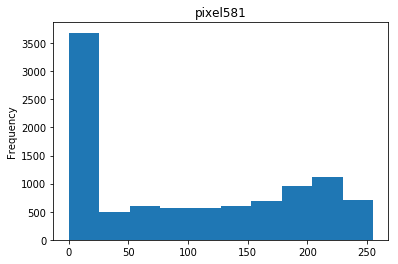

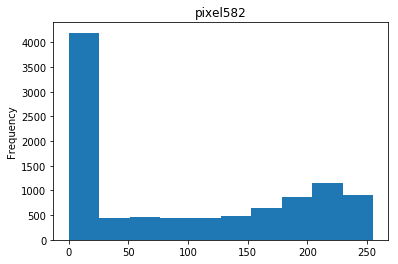

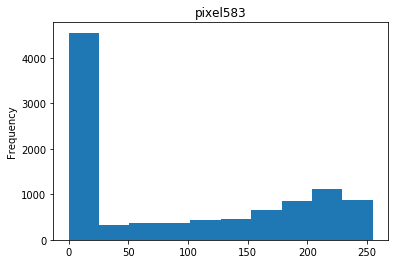

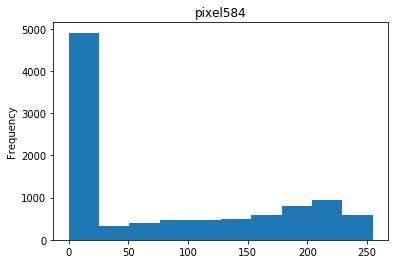

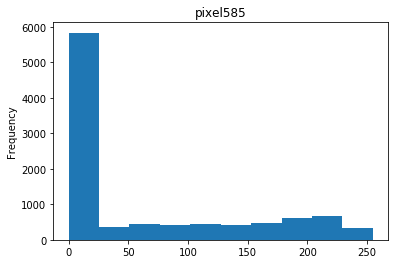

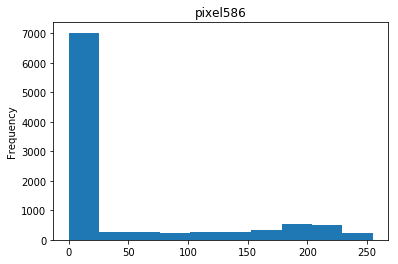

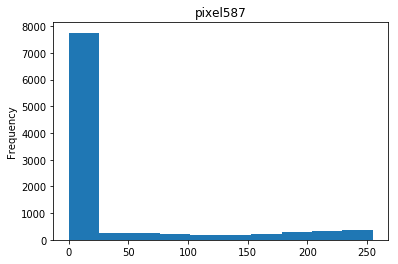

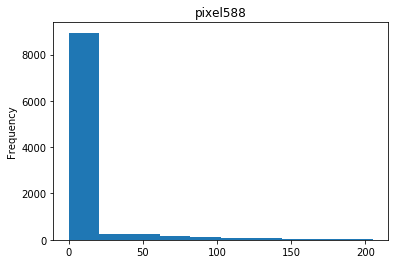

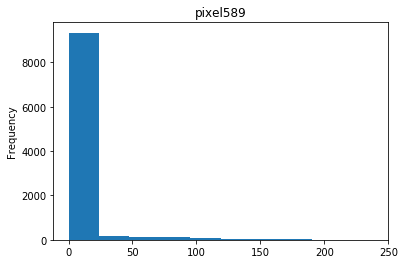

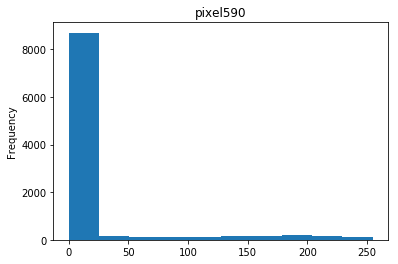

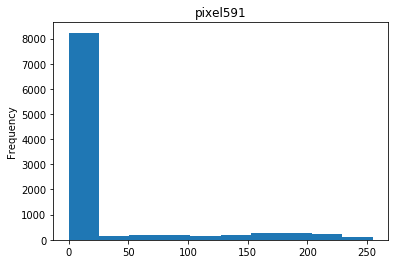

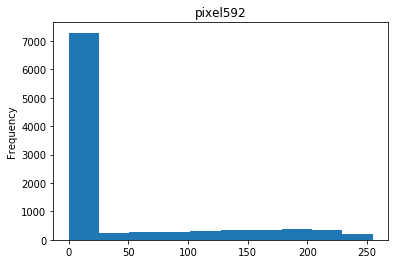

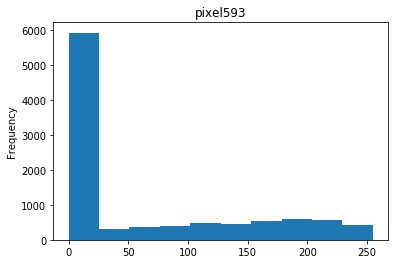

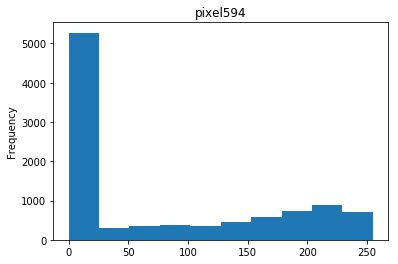

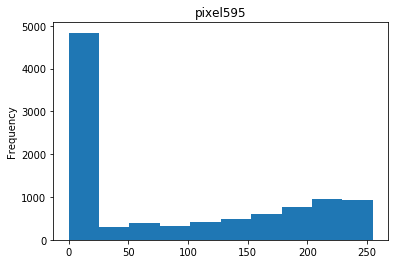

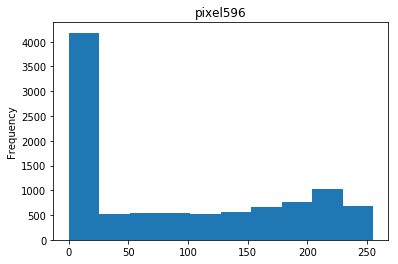

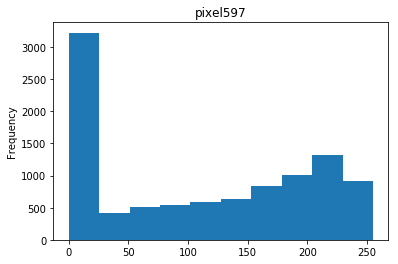

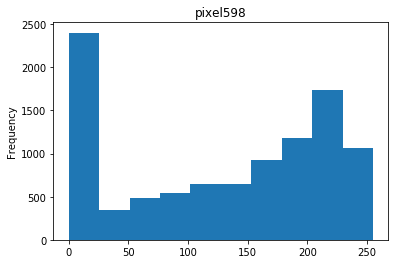

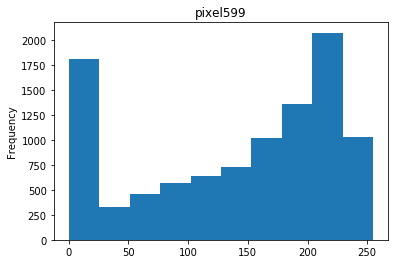

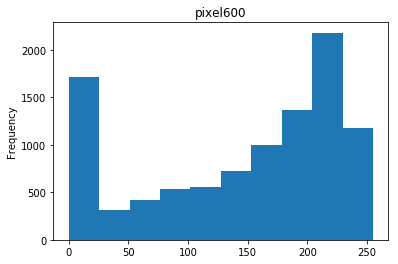

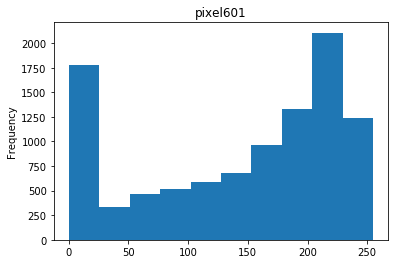

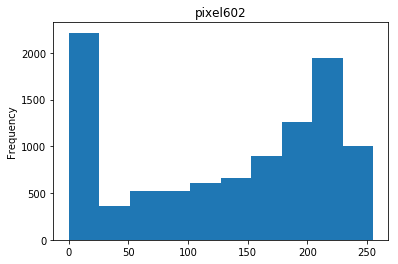

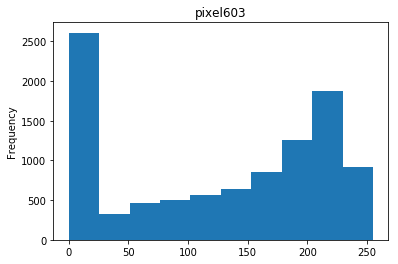

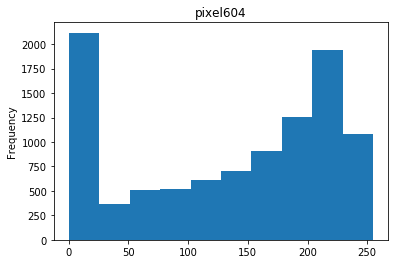

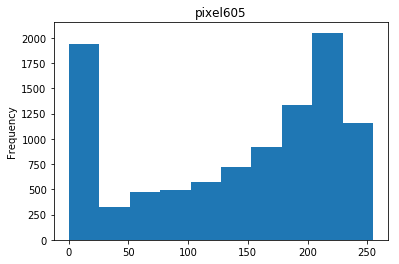

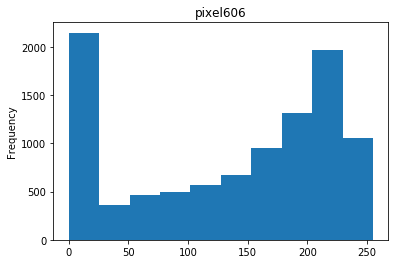

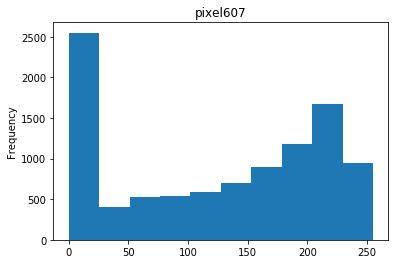

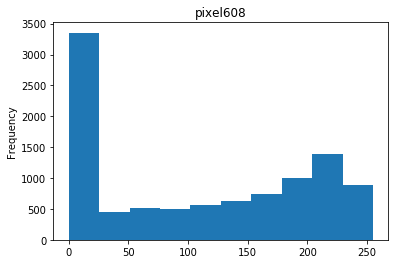

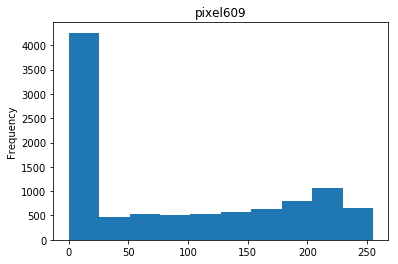

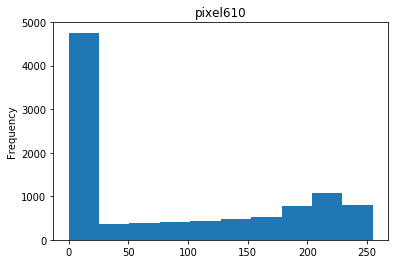

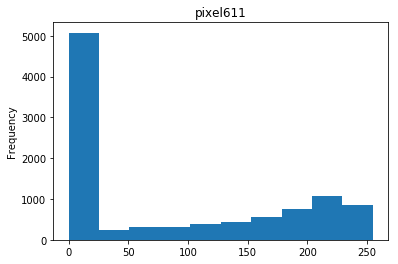

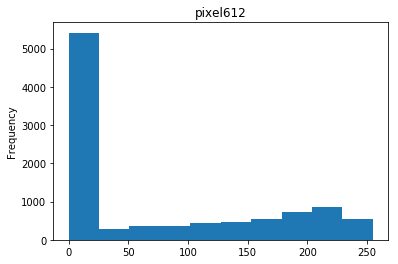

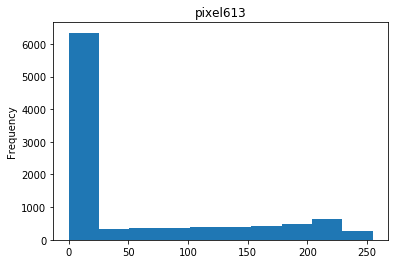

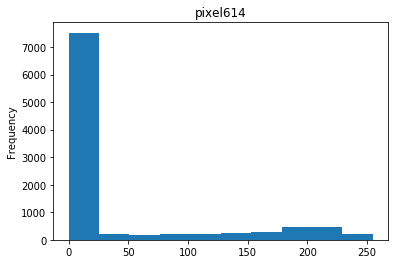

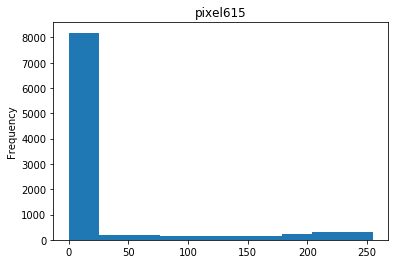

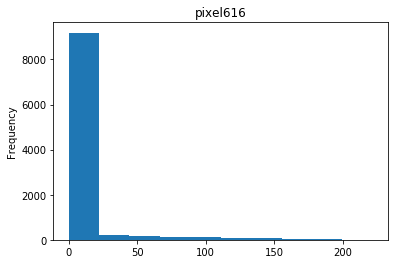

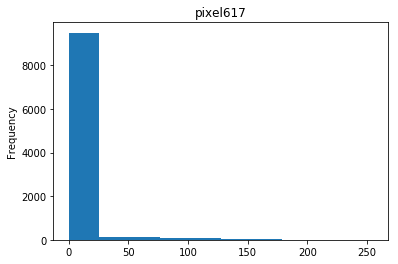

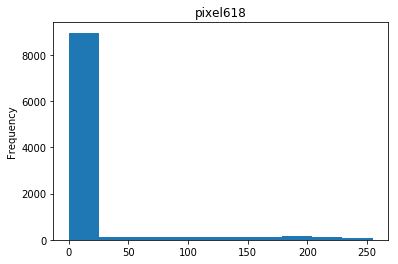

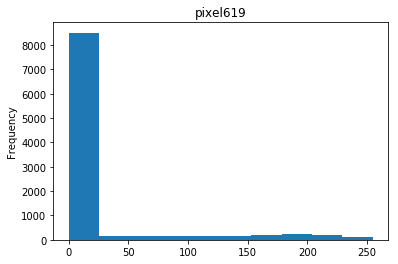

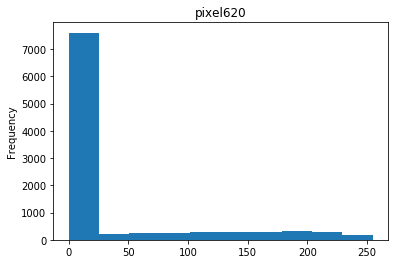

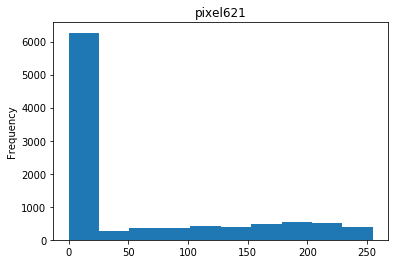

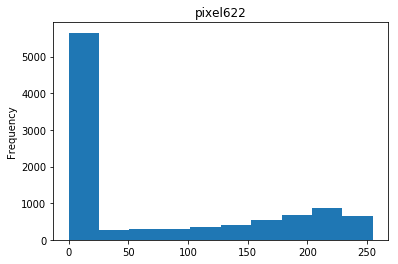

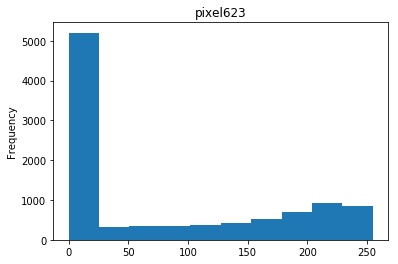

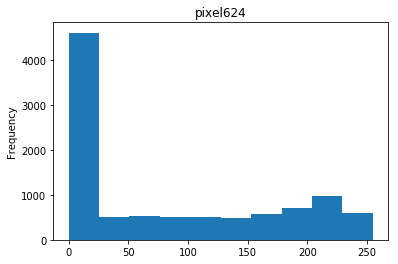

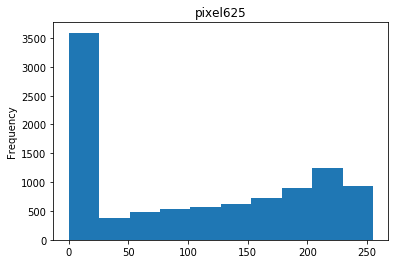

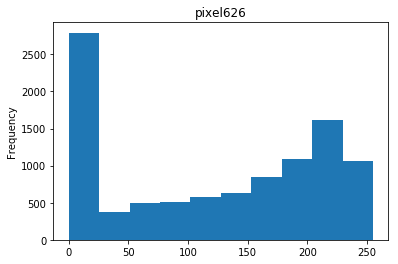

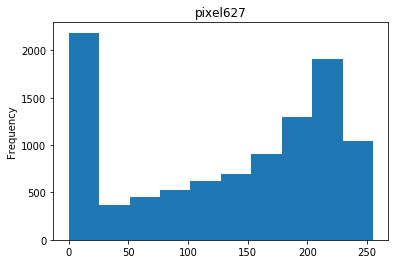

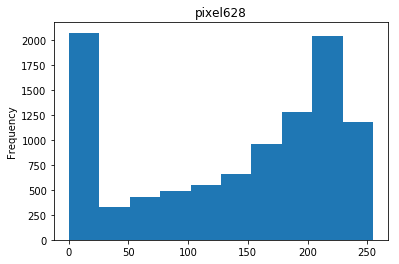

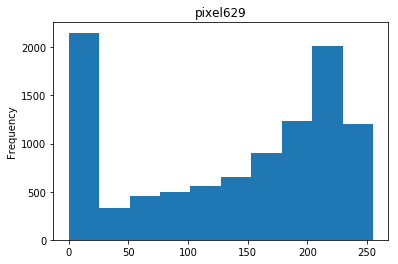

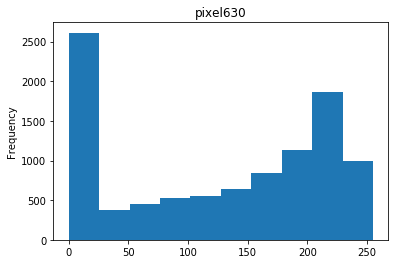

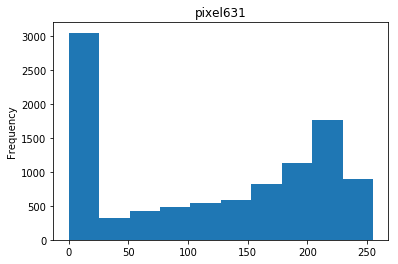

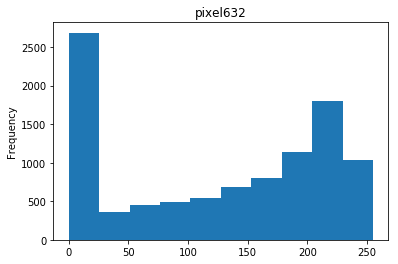

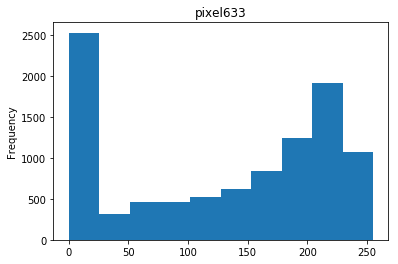

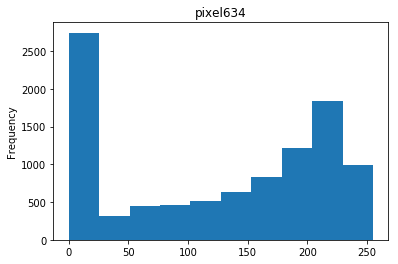

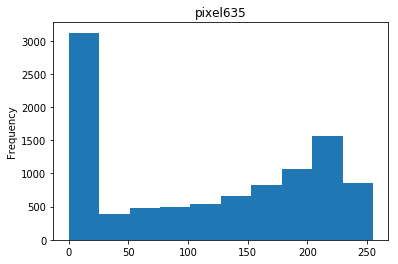

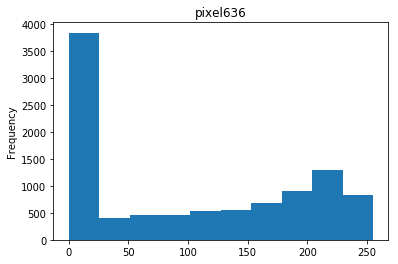

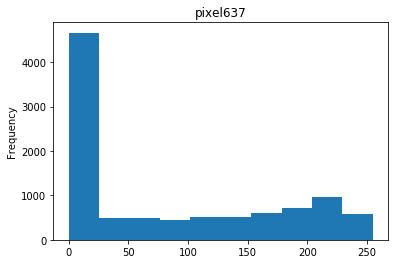

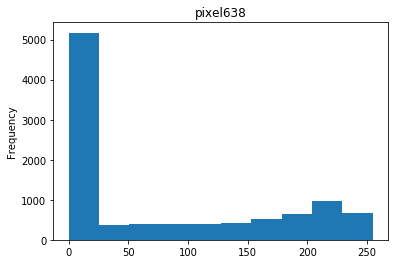

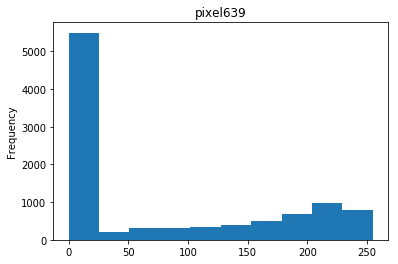

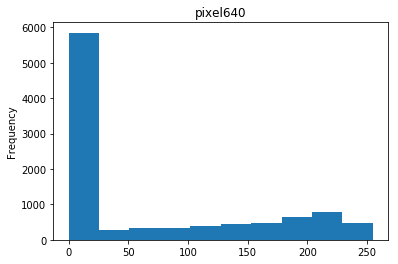

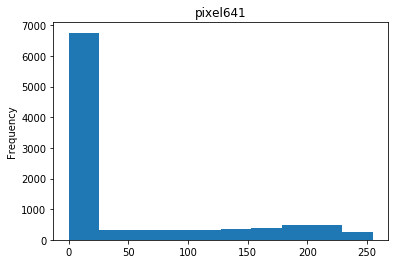

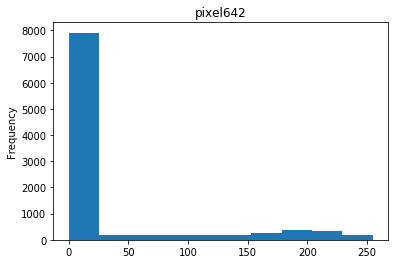

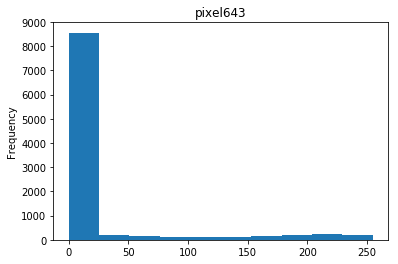

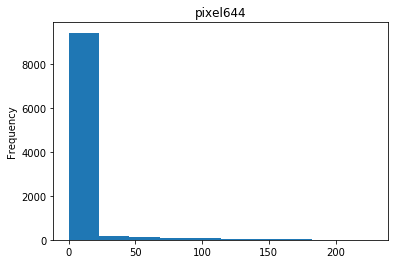

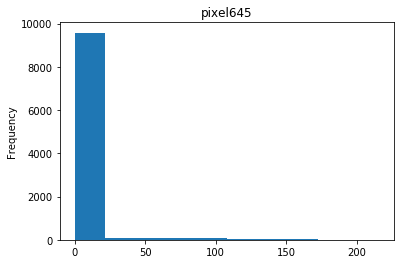

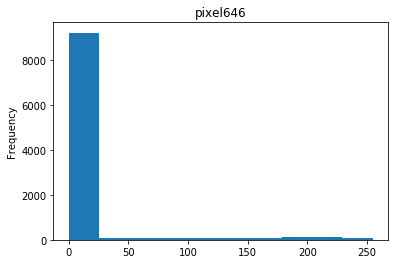

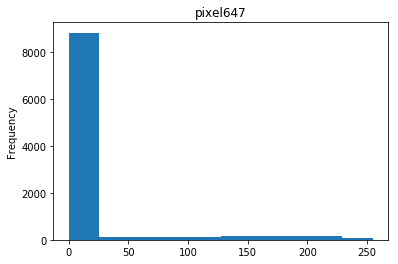

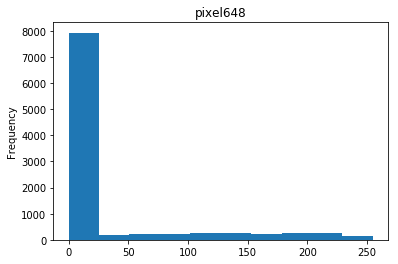

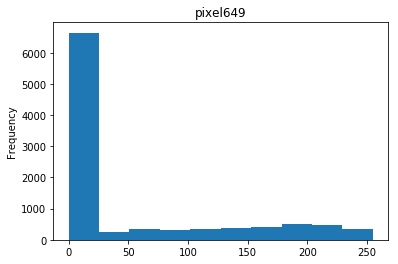

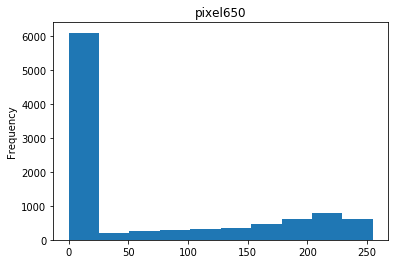

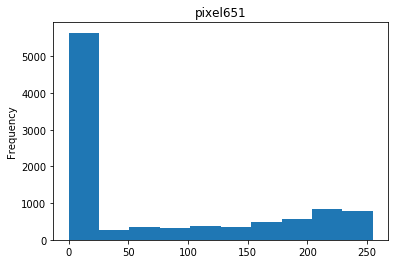

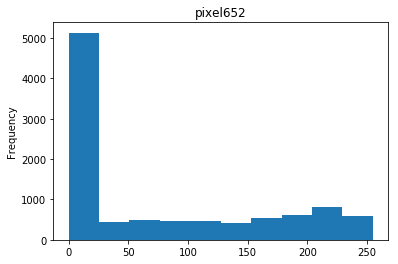

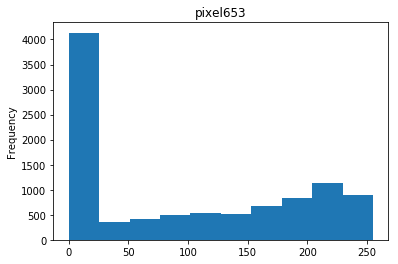

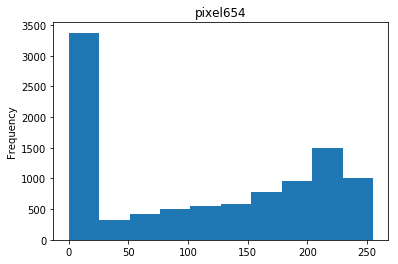

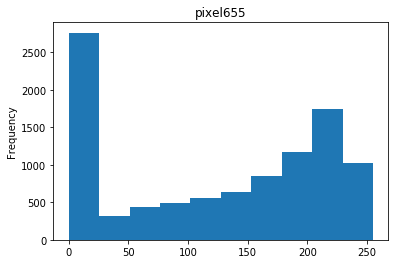

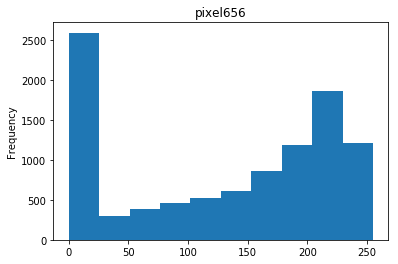

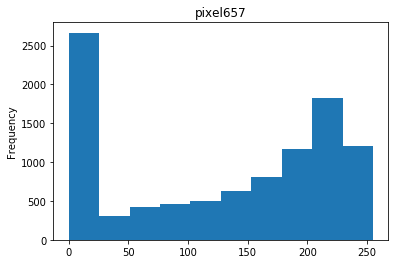

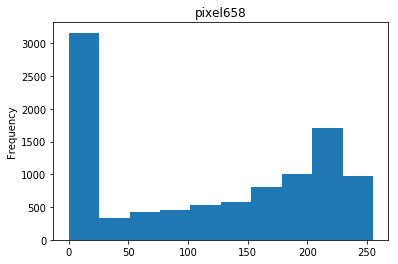

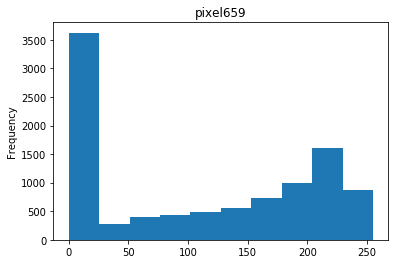

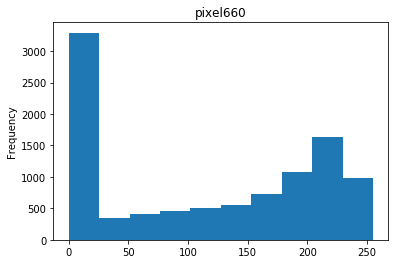

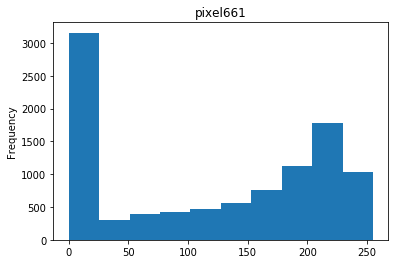

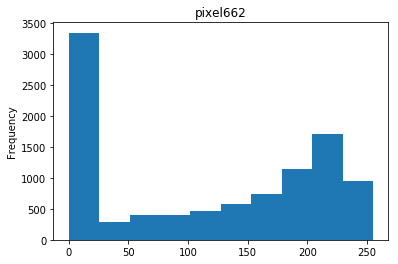

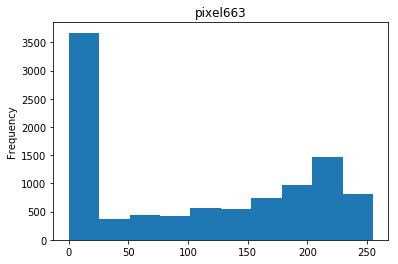

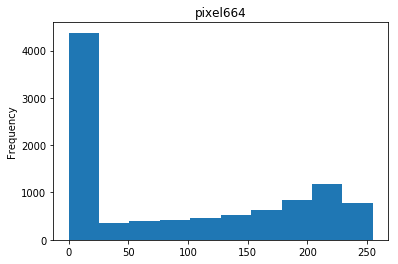

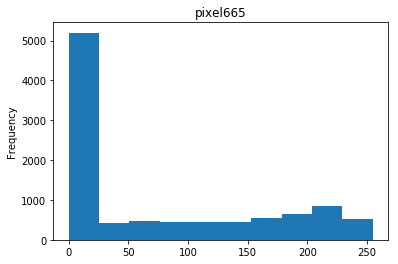

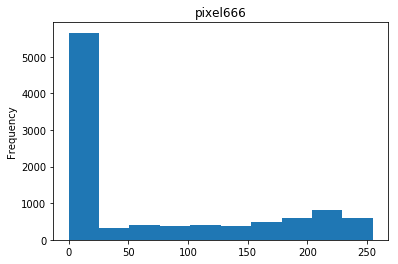

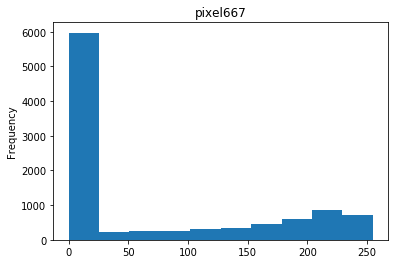

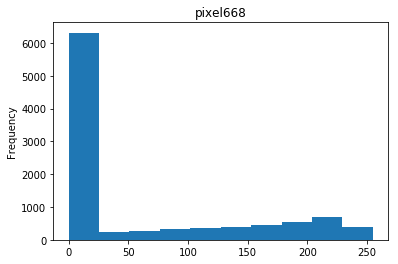

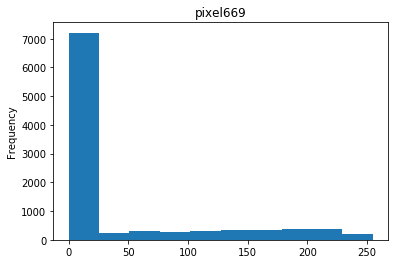

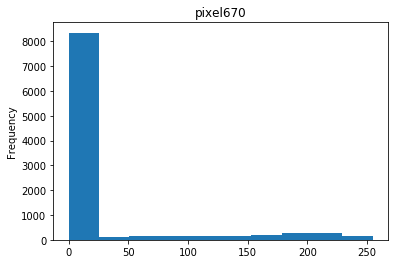

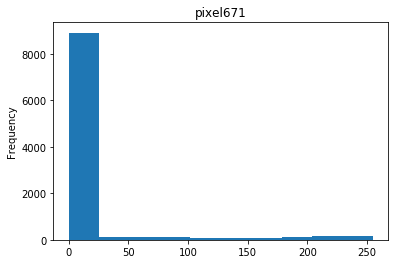

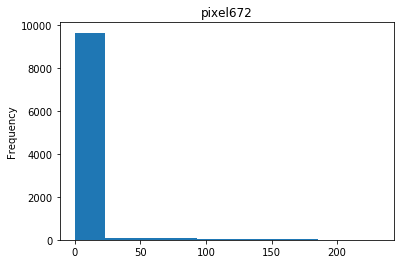

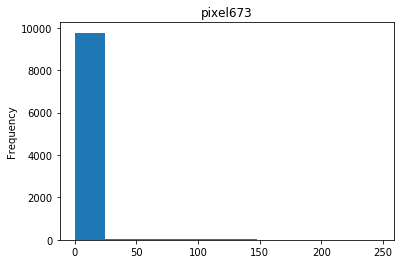

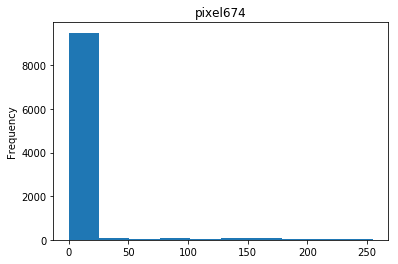

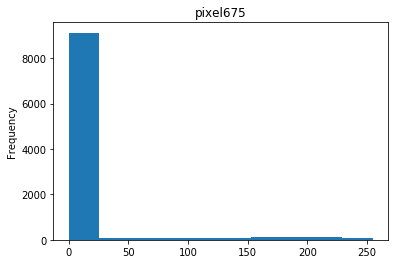

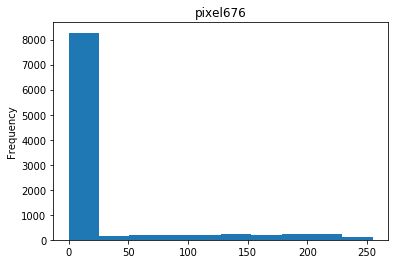

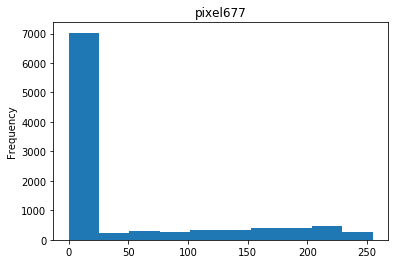

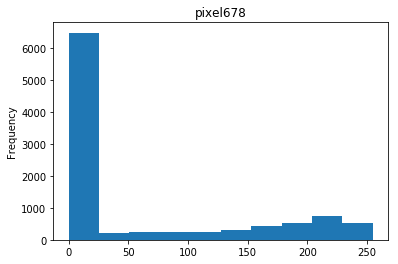

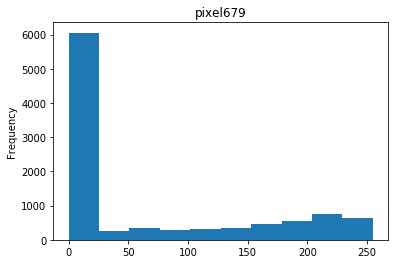

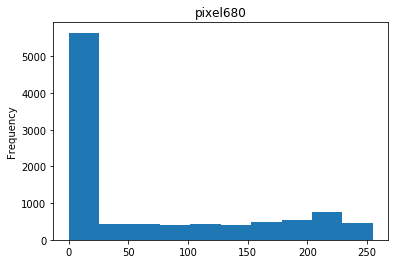

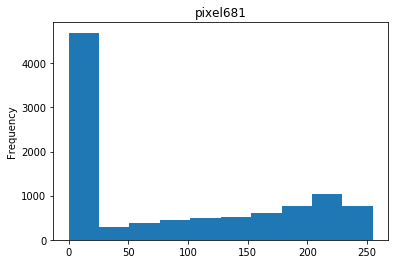

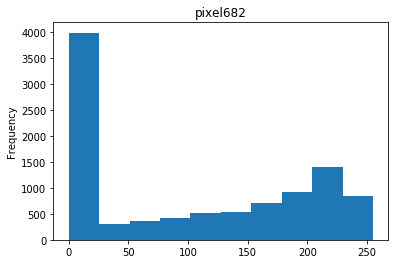

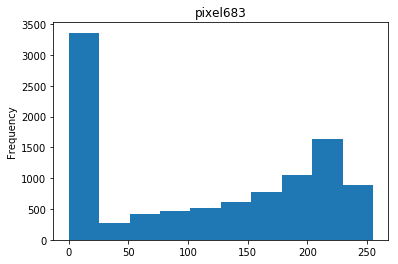

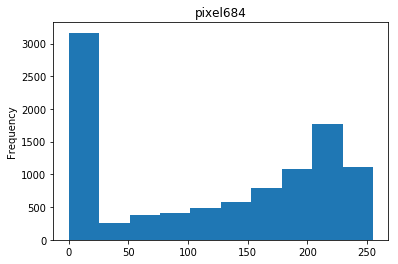

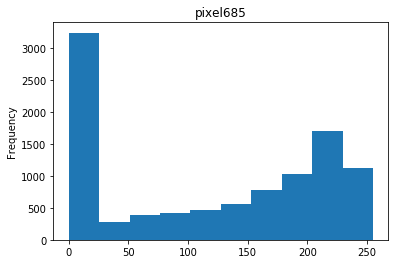

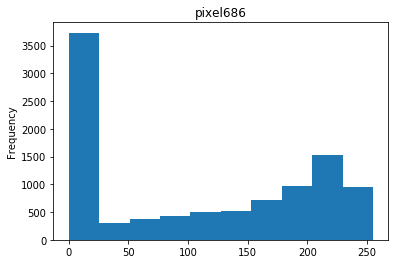

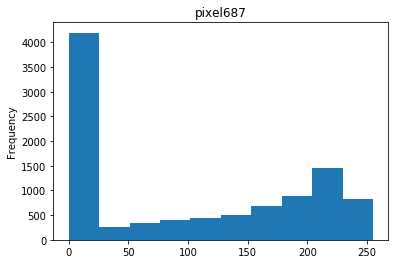

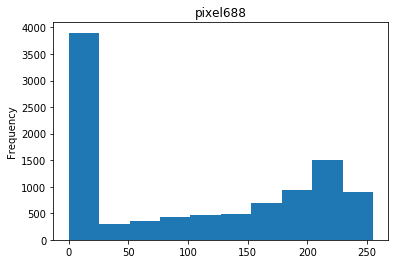

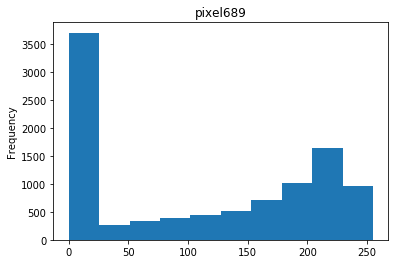

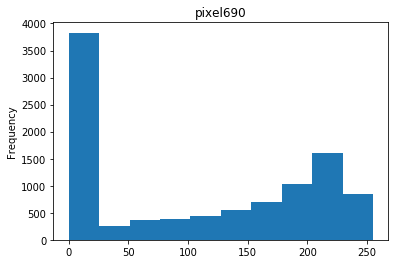

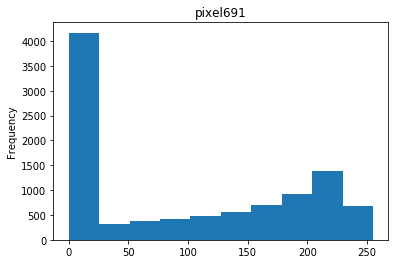

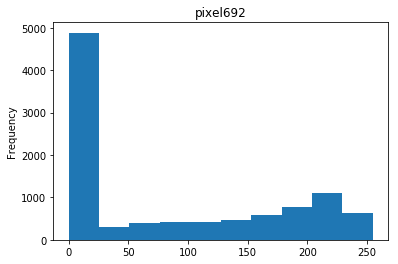

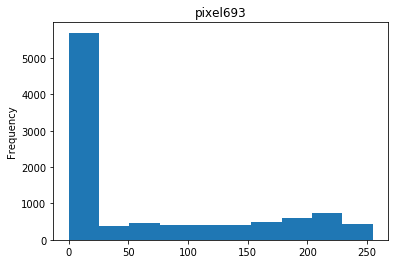

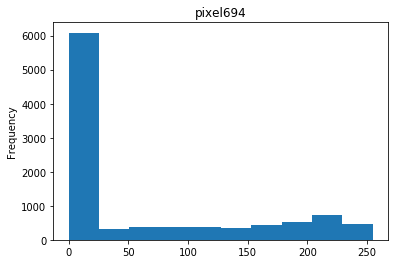

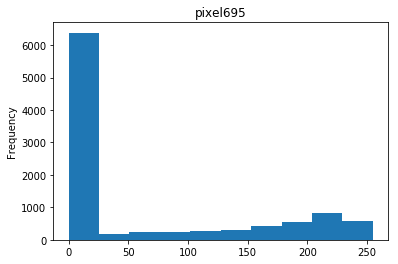

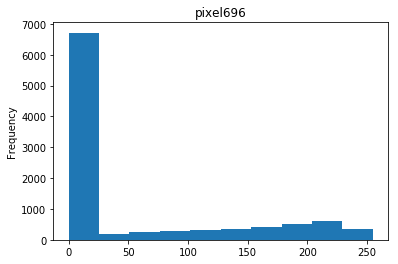

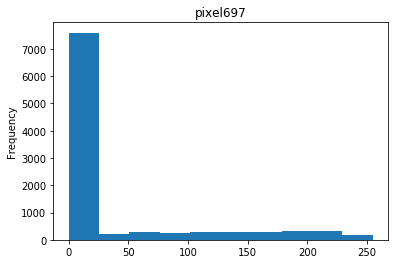

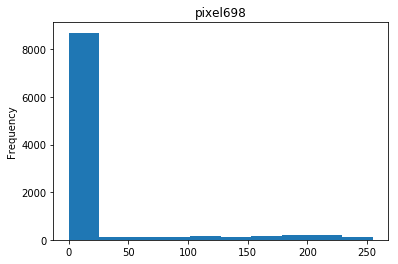

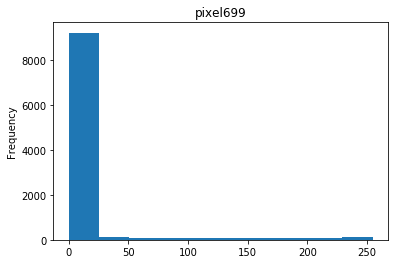

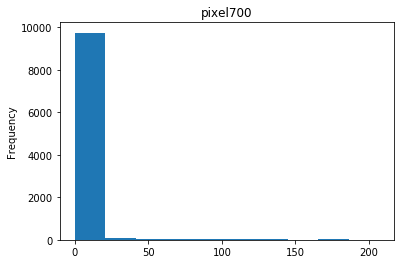

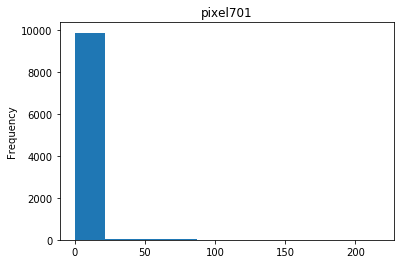

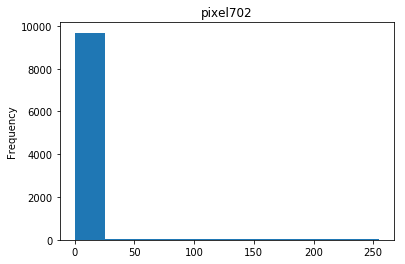

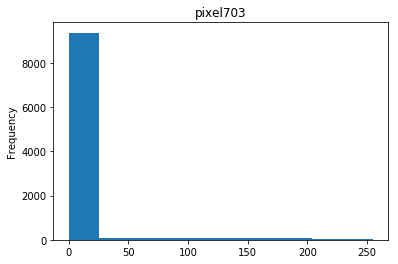

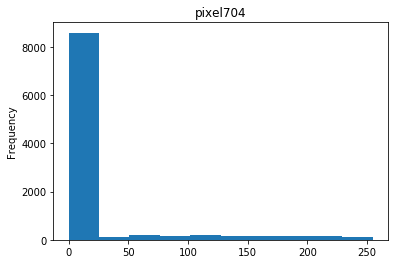

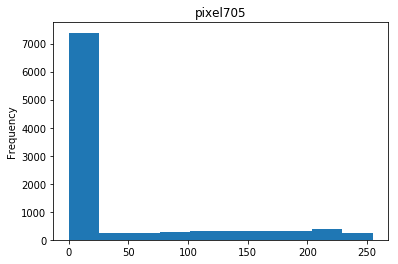

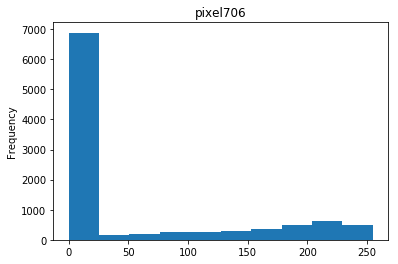

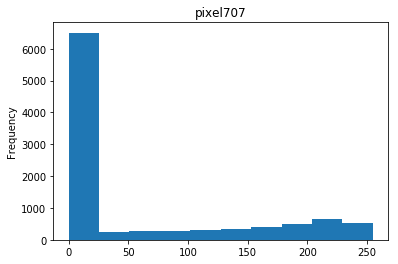

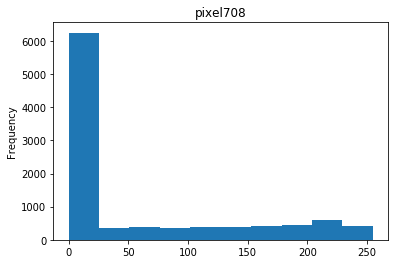

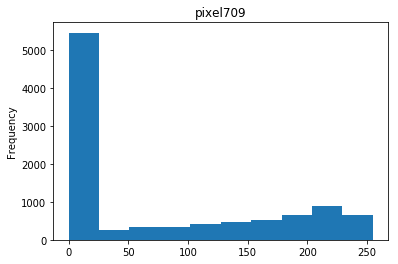

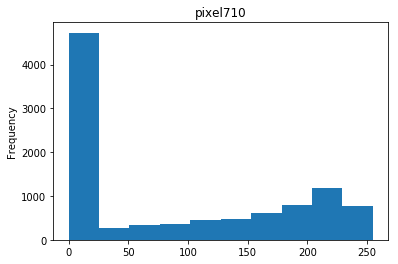

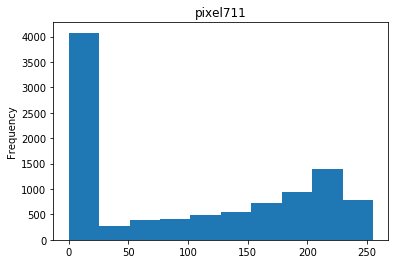

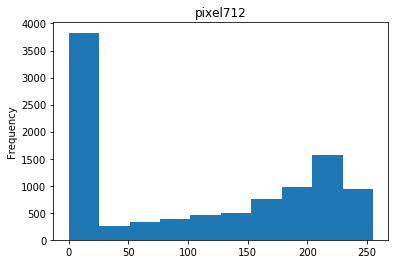

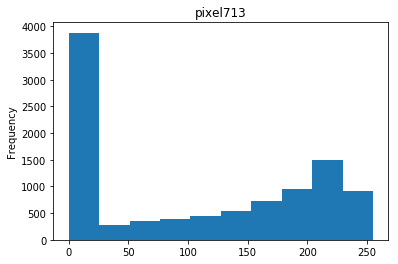

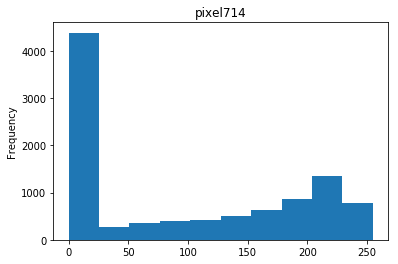

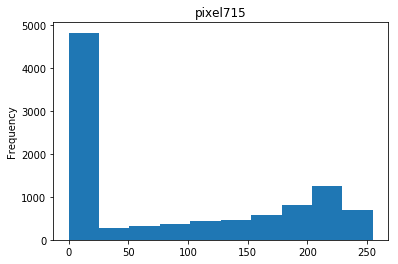

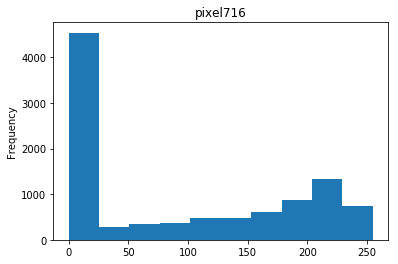

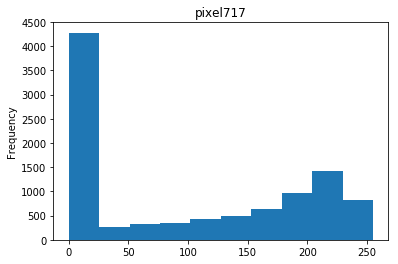

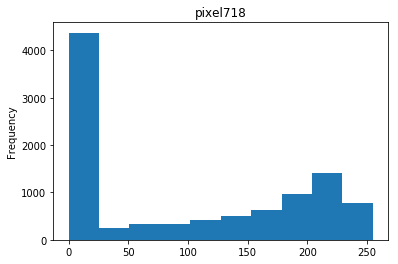

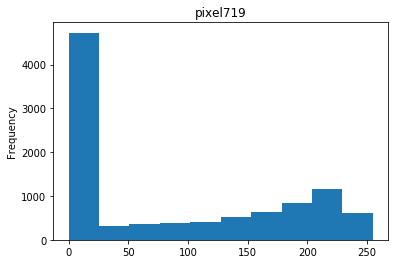

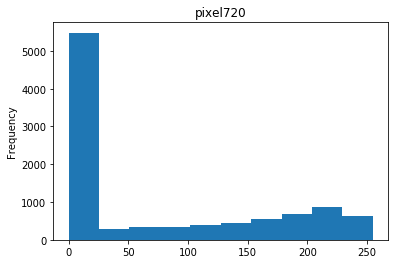

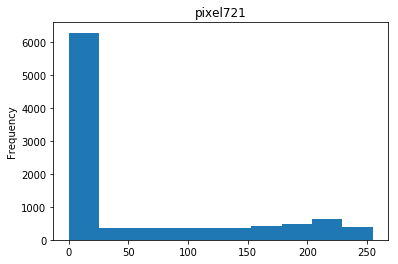

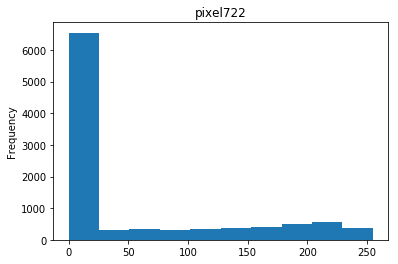

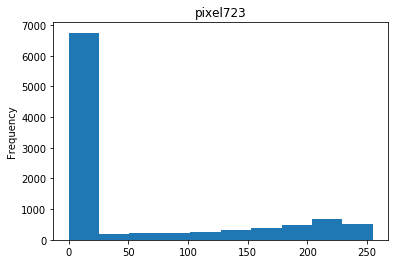

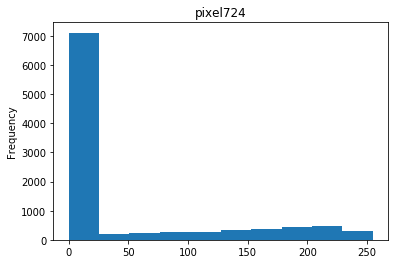

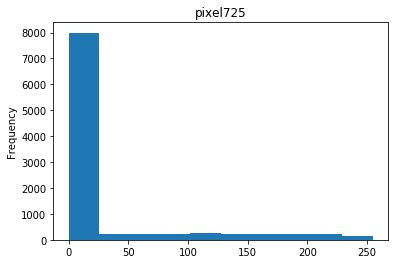

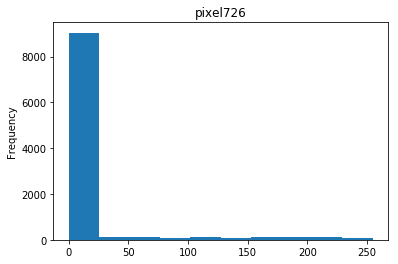

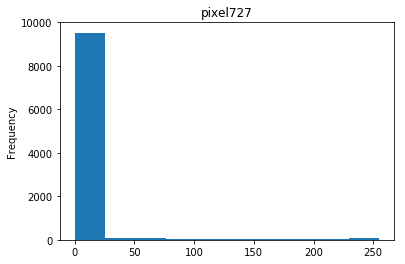

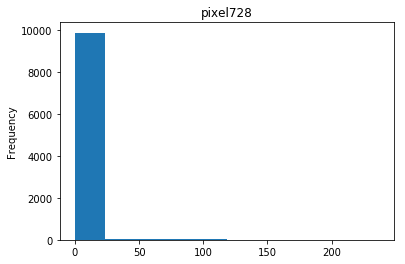

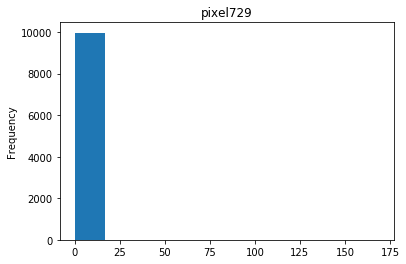

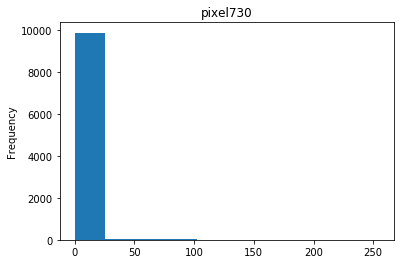

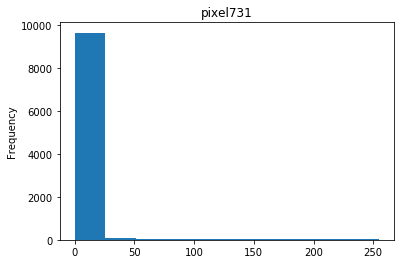

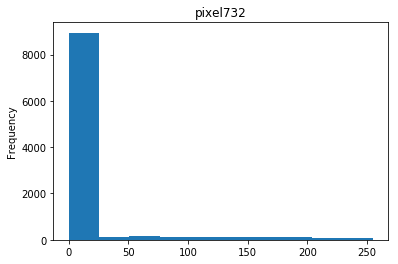

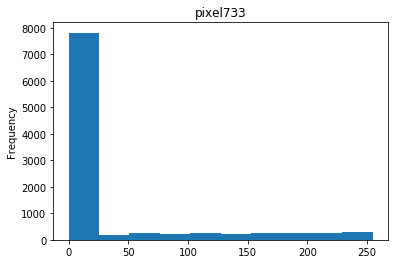

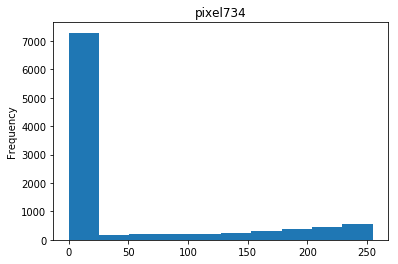

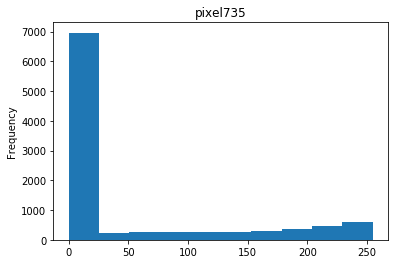

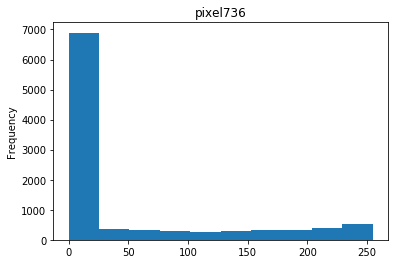

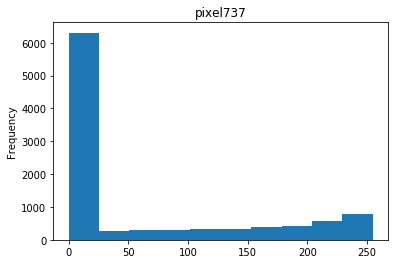

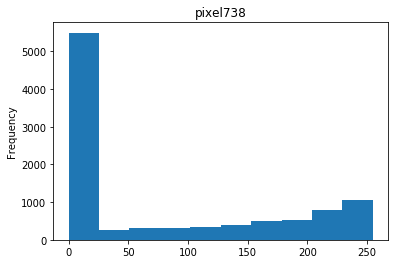

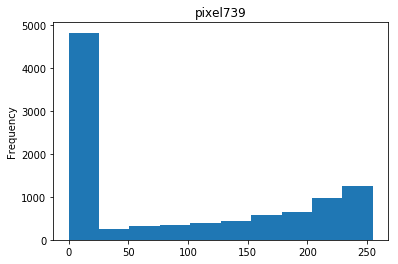

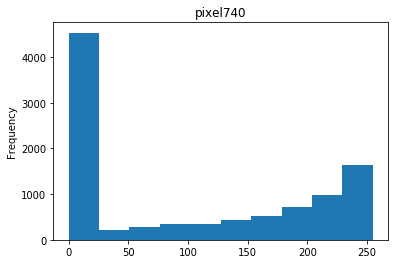

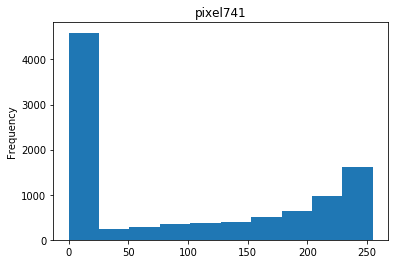

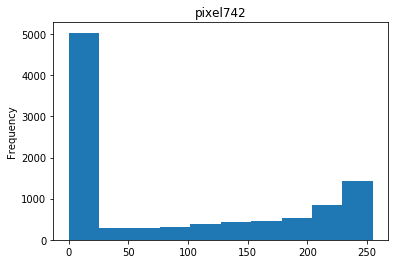

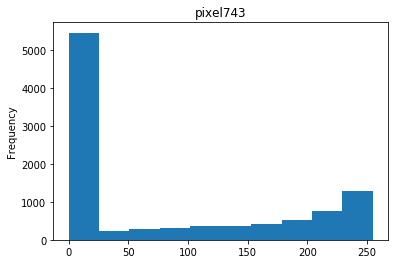

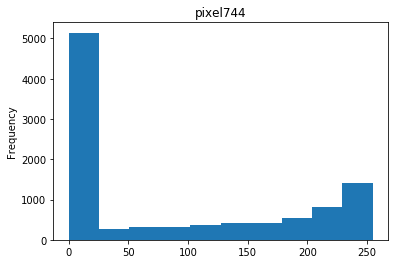

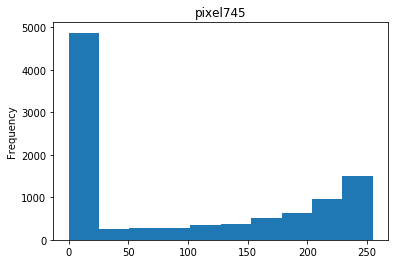

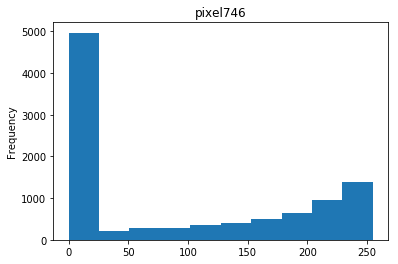

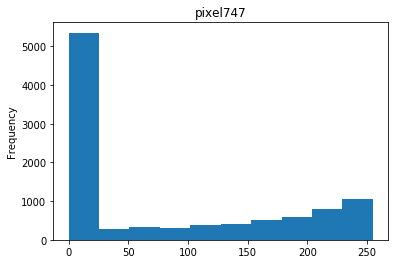

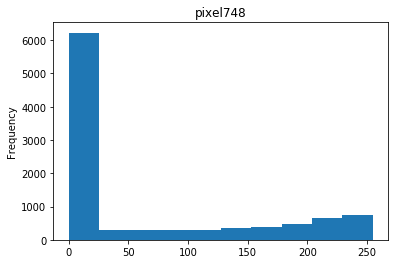

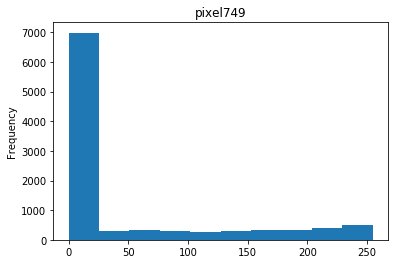

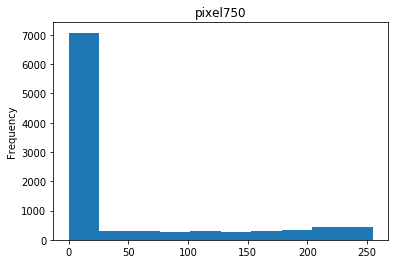

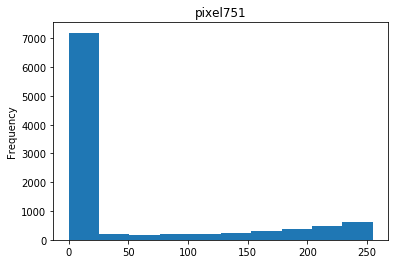

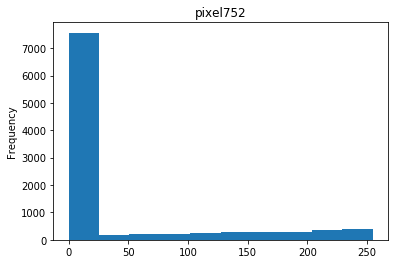

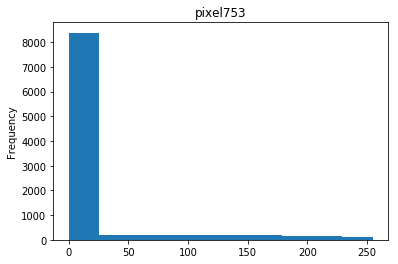

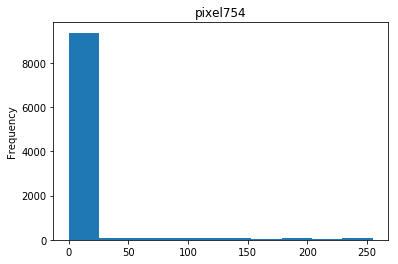

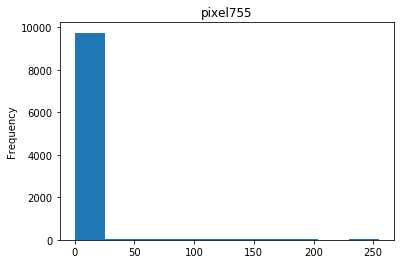

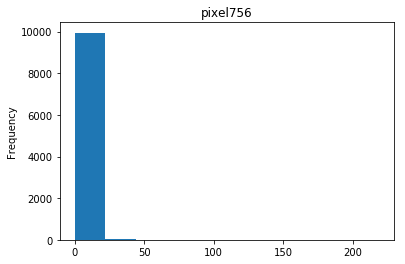

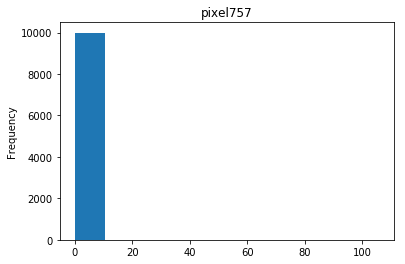

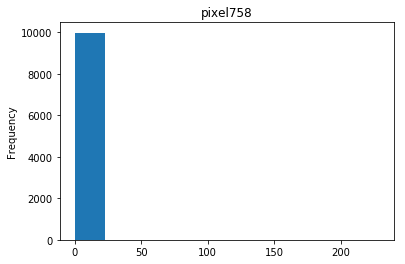

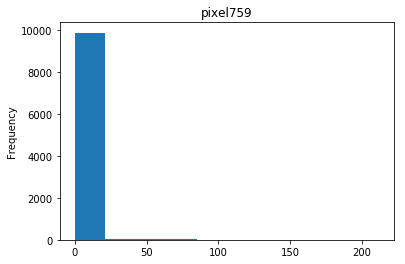

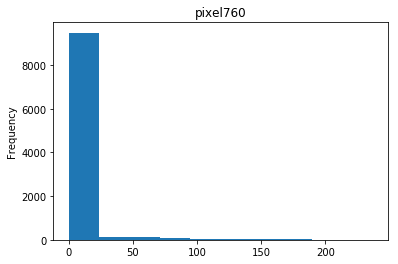

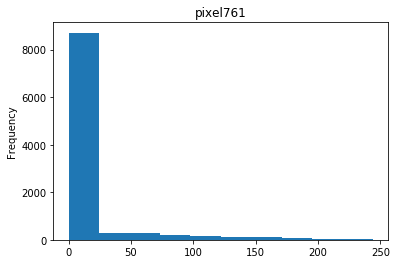

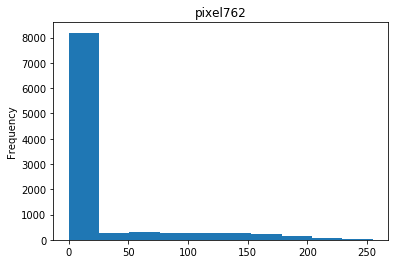

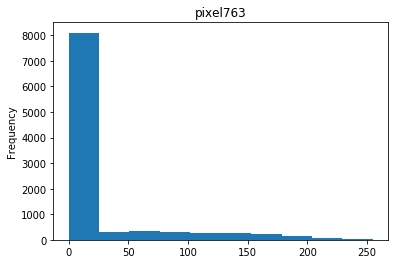

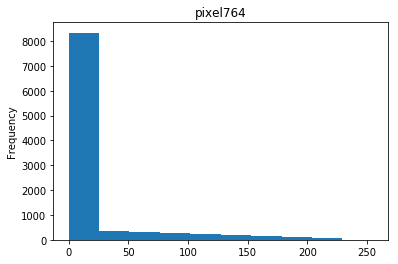

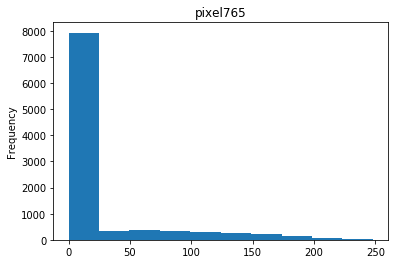

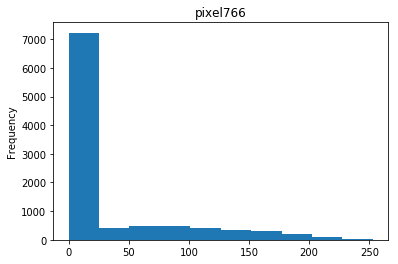

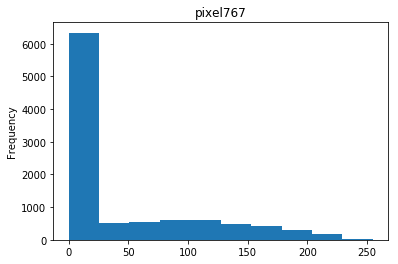

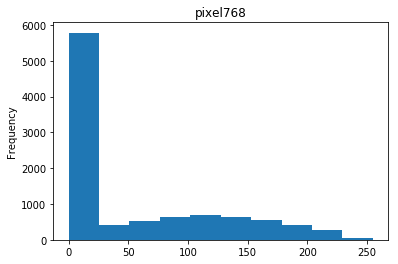

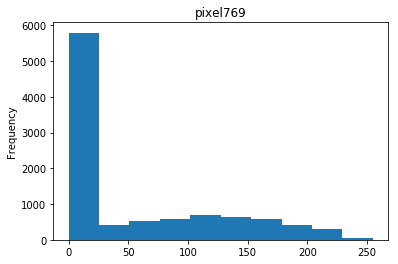

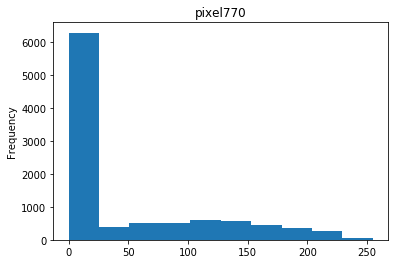

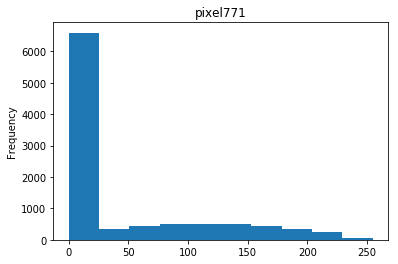

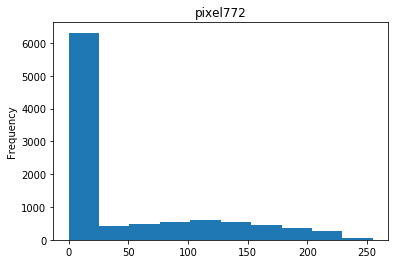

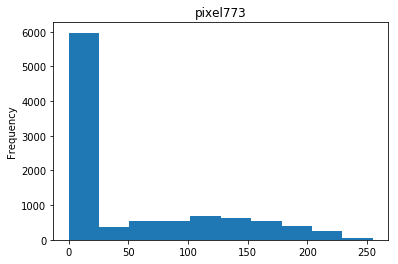

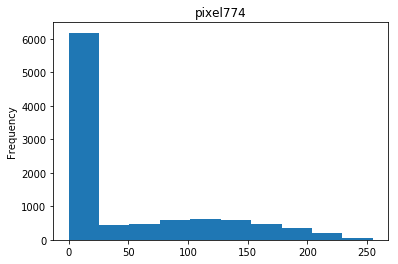

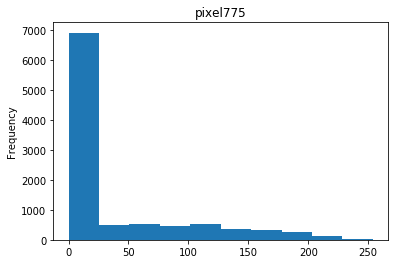

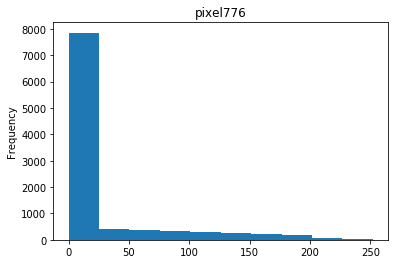

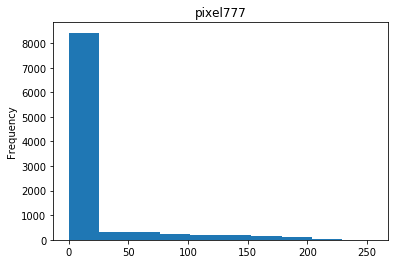

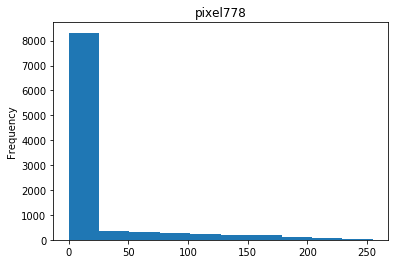

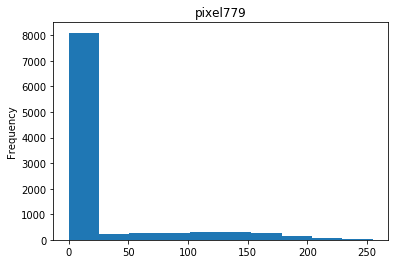

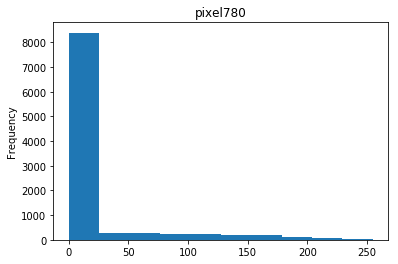

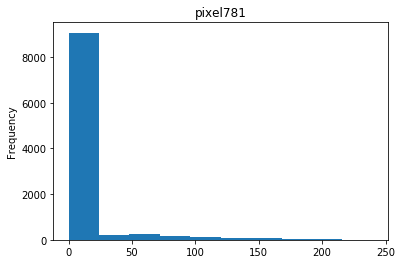

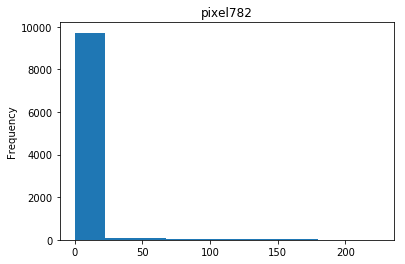

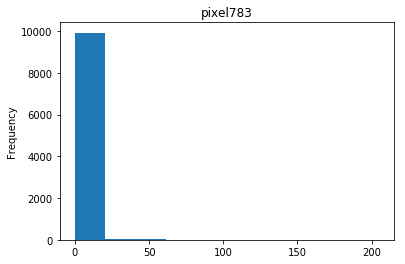

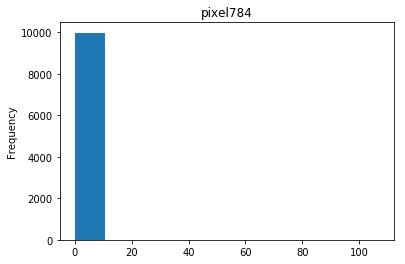

In [7]:
data_viz(dataset)

label


/Applications/anaconda3/envs/DataSci/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


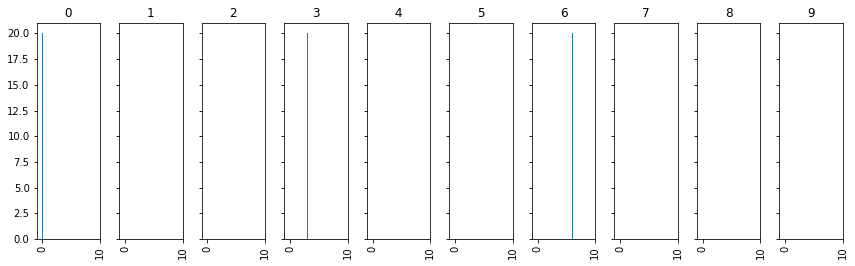

pixel1


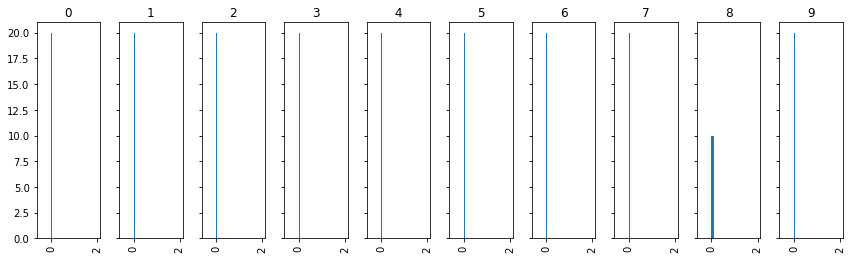

pixel2


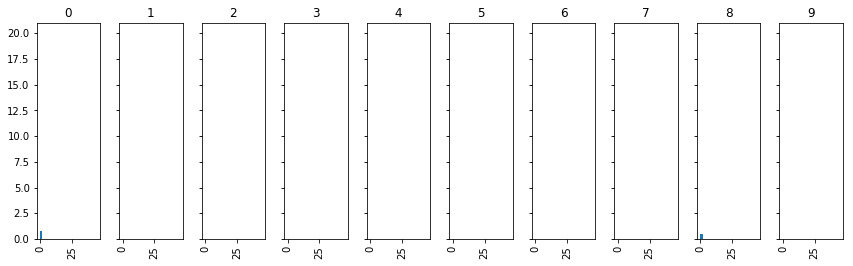

pixel3


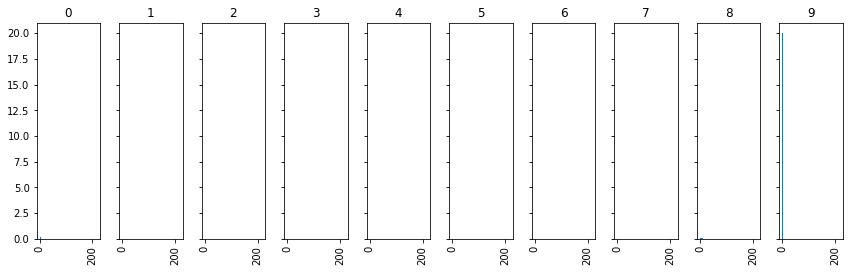

pixel4


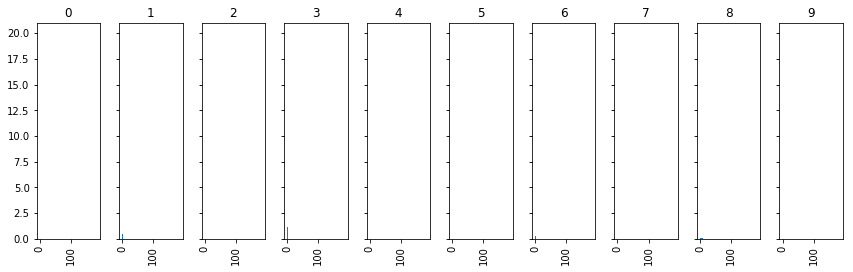

pixel5


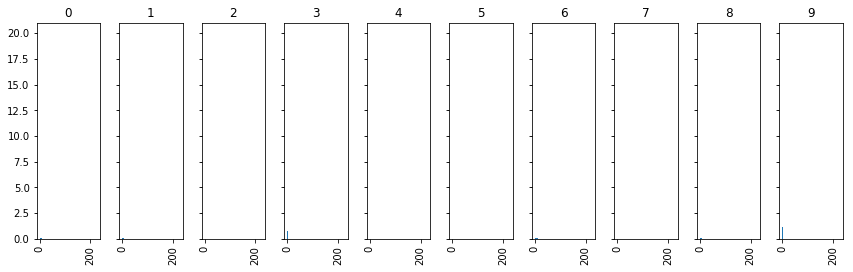

pixel6


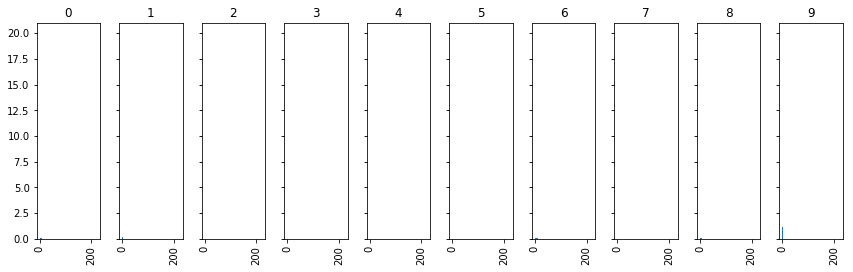

pixel7


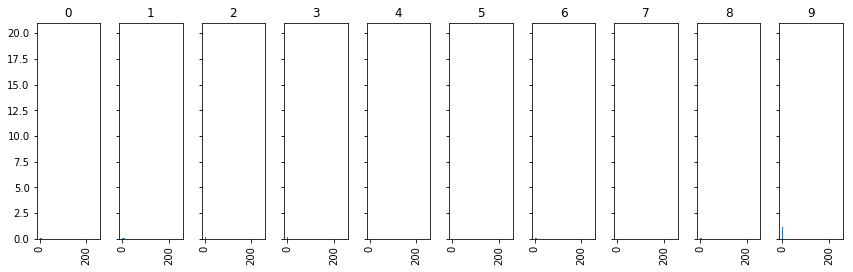

pixel8


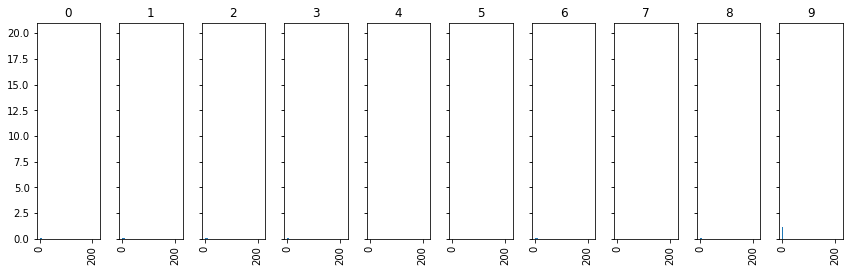

pixel9


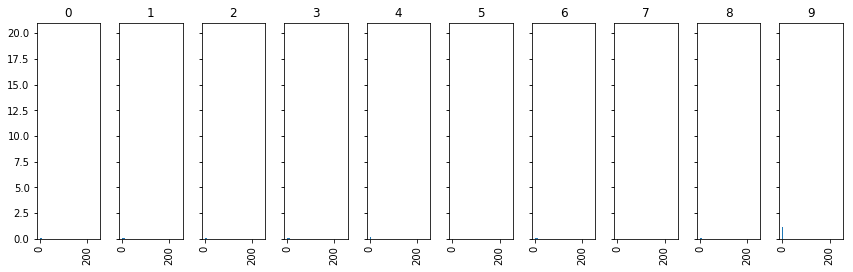

pixel10


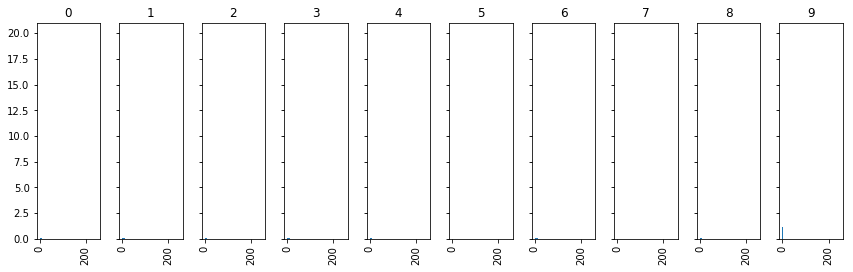

pixel11


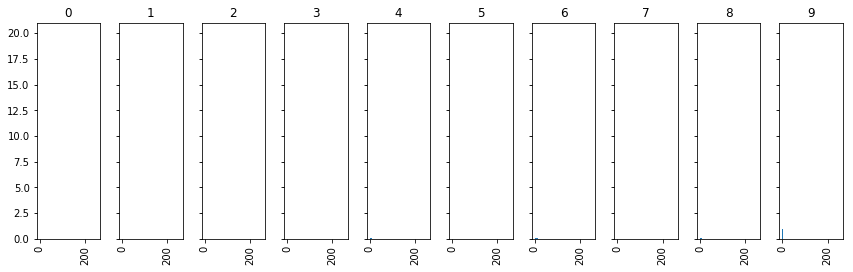

pixel12


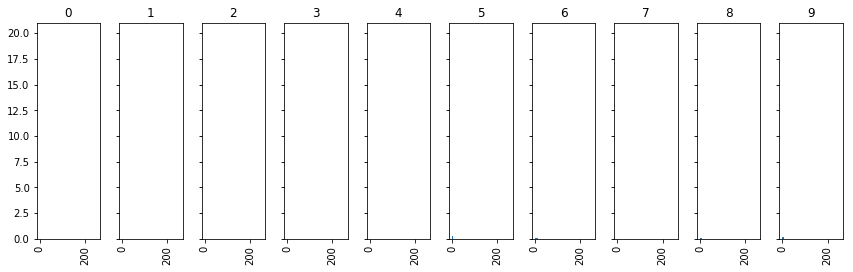

pixel13


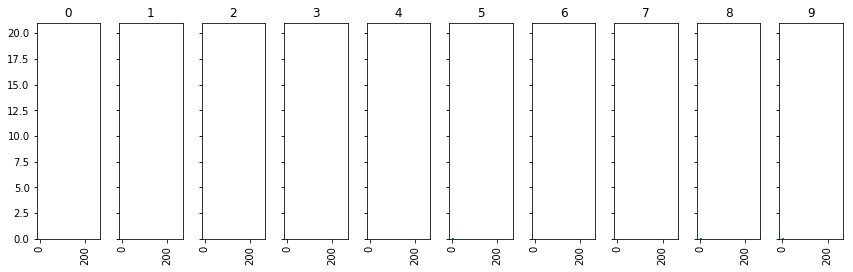

pixel14


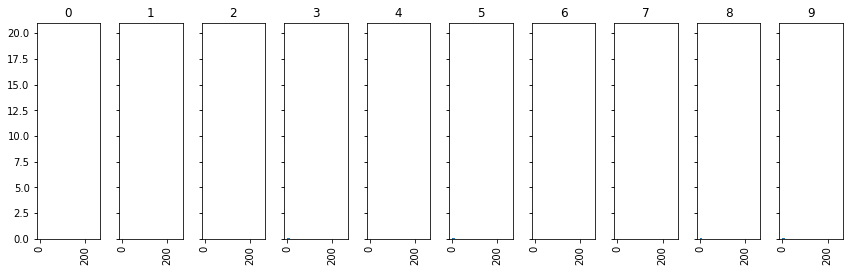

pixel15


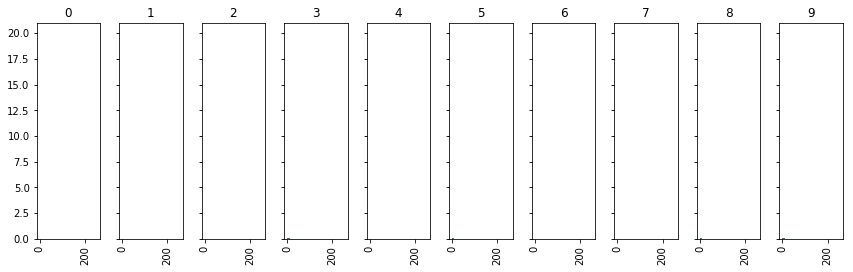

pixel16


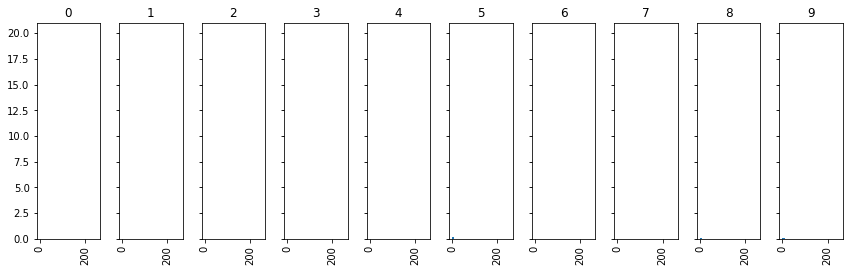

pixel17


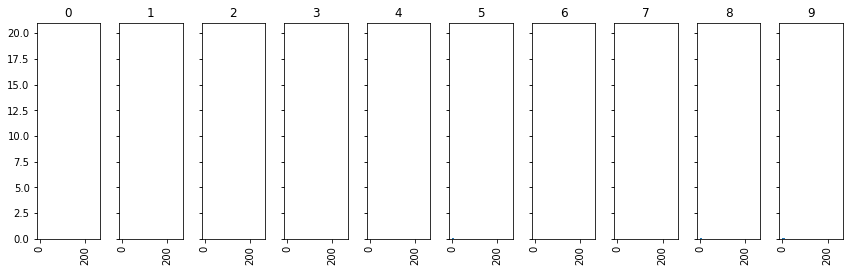

pixel18


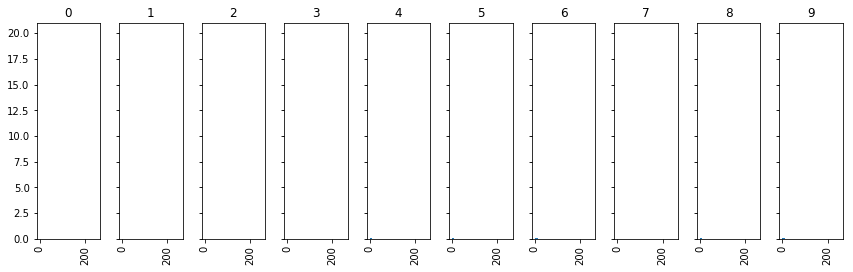

pixel19


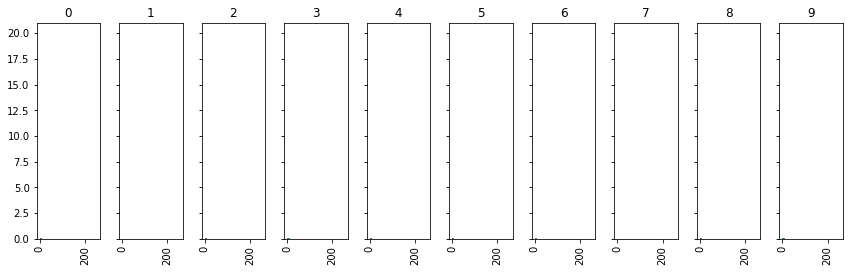

pixel20


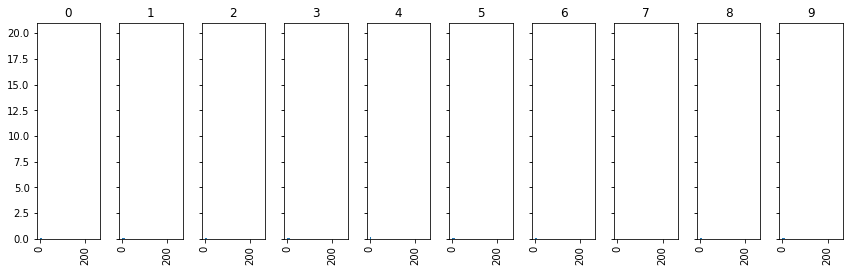

pixel21


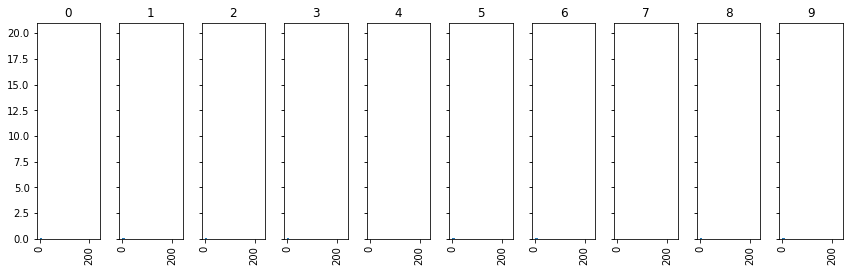

pixel22


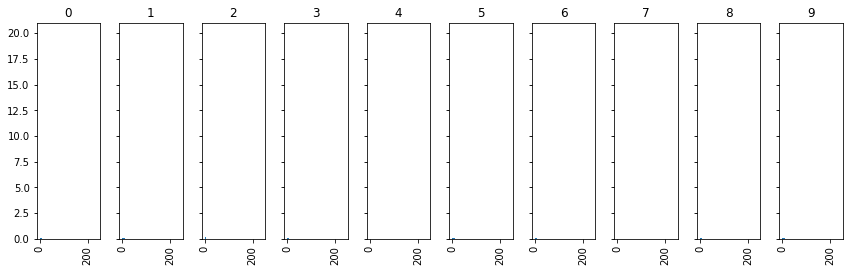

pixel23


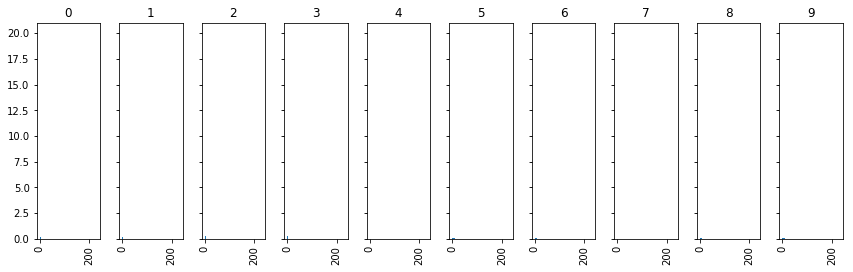

pixel24


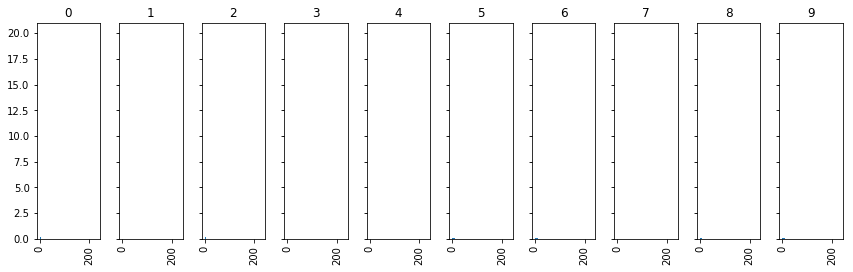

pixel25


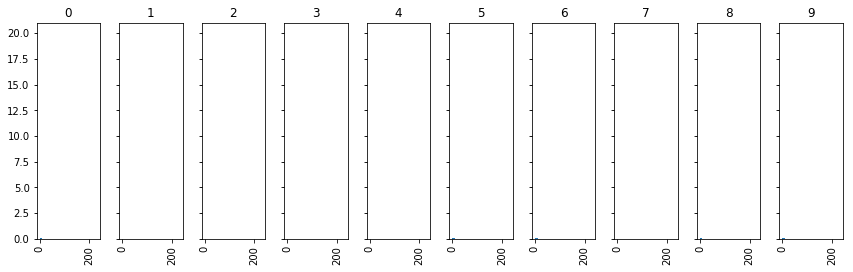

pixel26


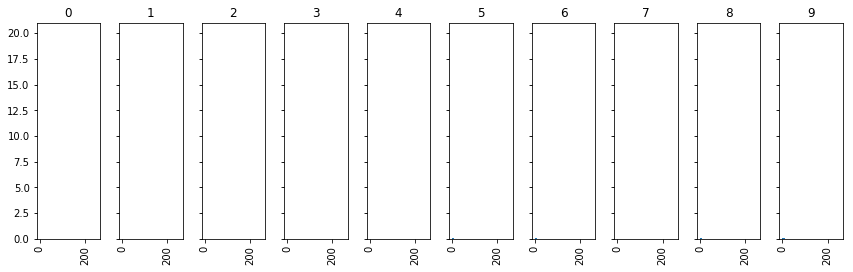

pixel27


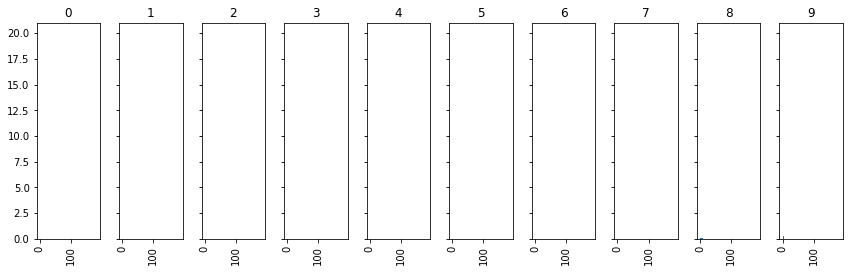

pixel28


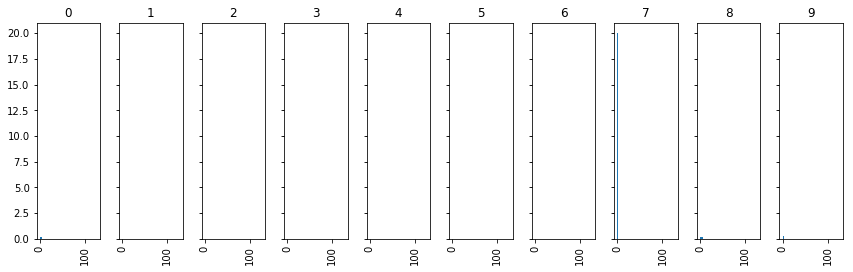

pixel29


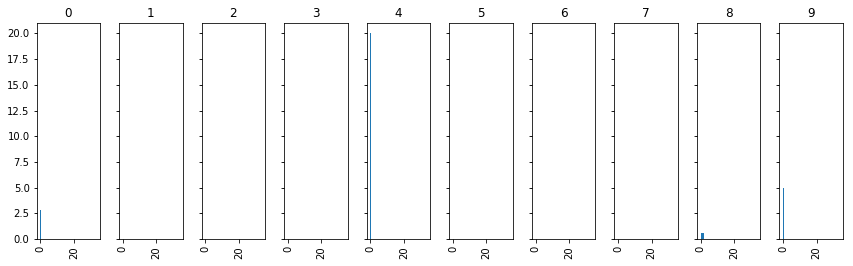

pixel30


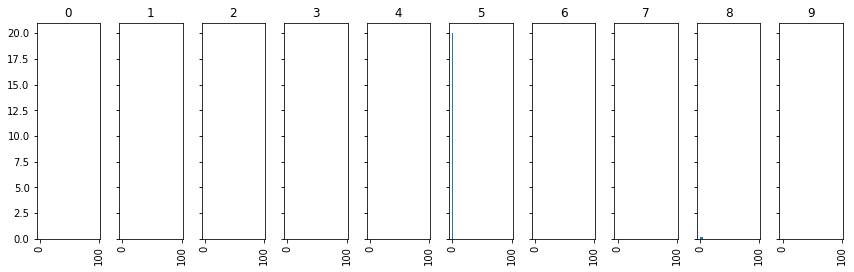

pixel31


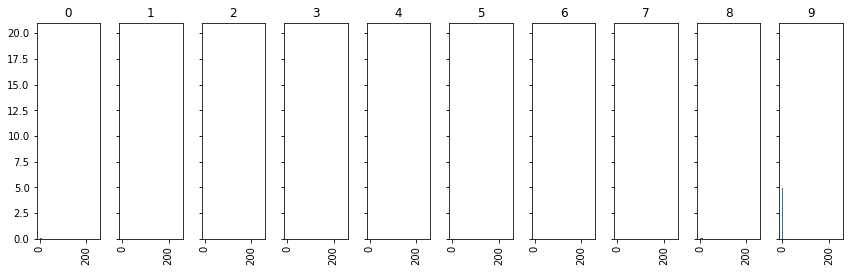

pixel32


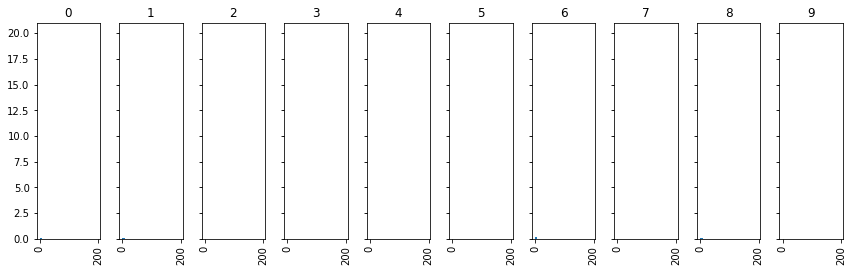

pixel33


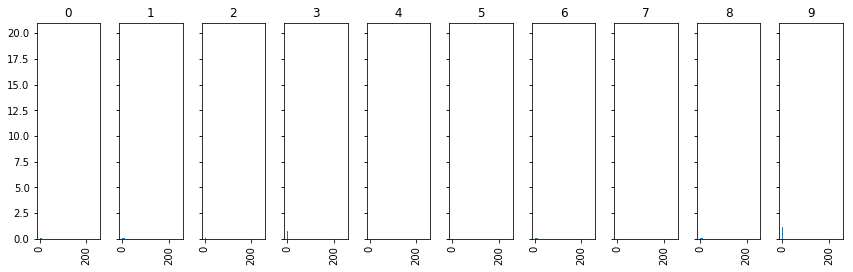

pixel34


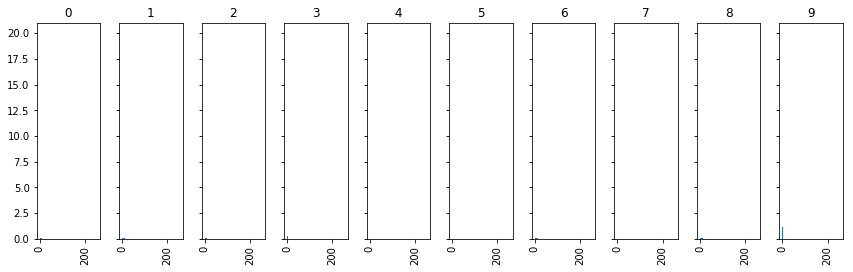

pixel35


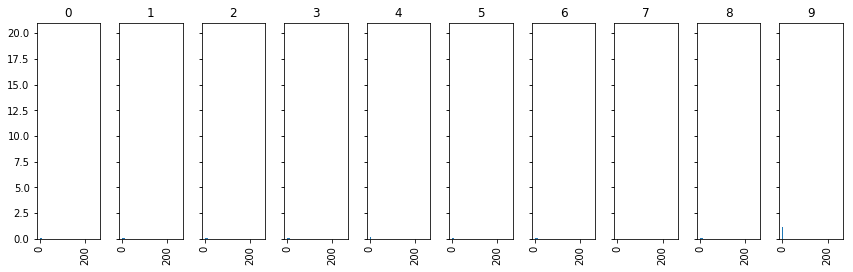

pixel36


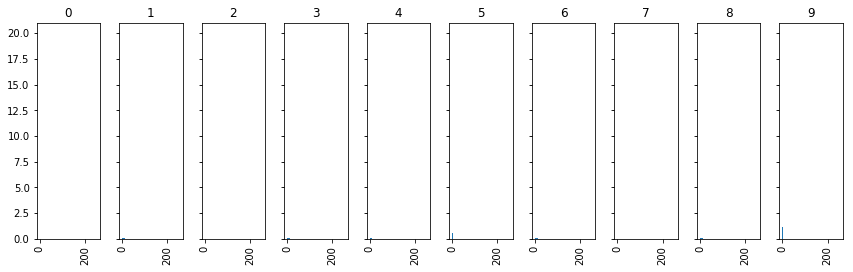

pixel37


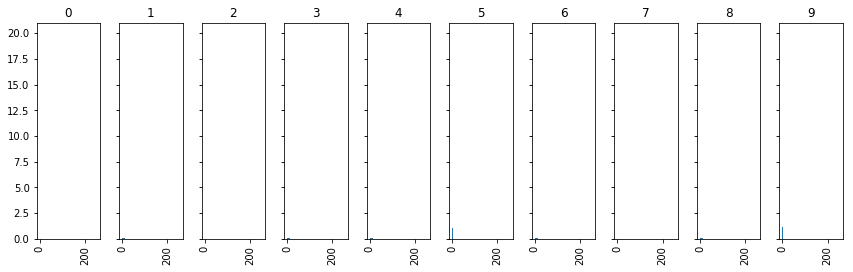

pixel38


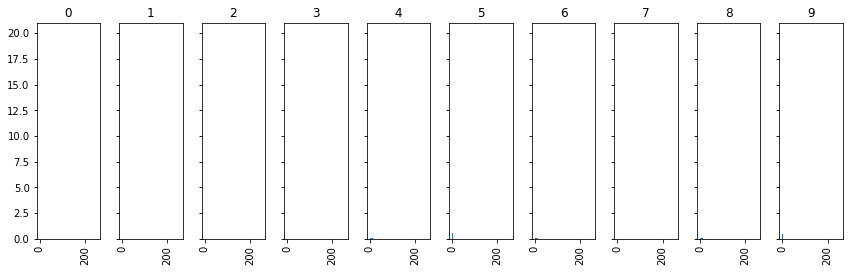

pixel39


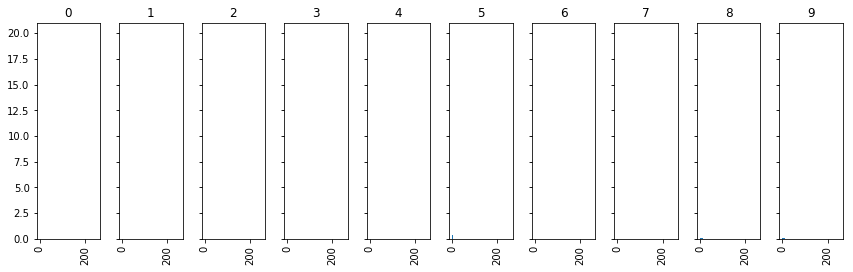

pixel40


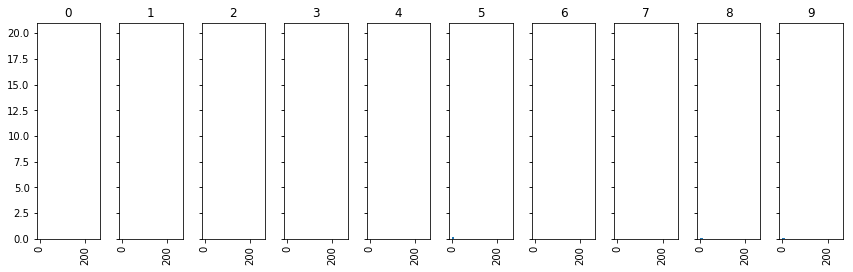

pixel41


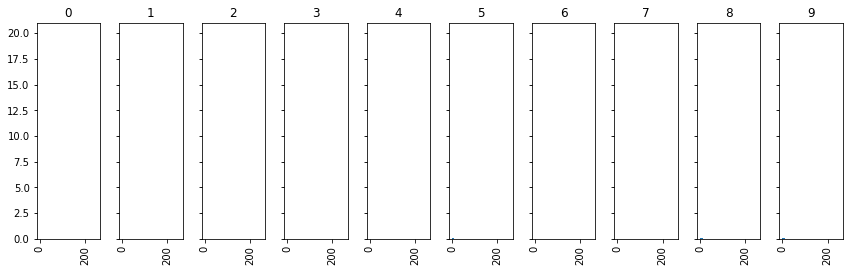

pixel42


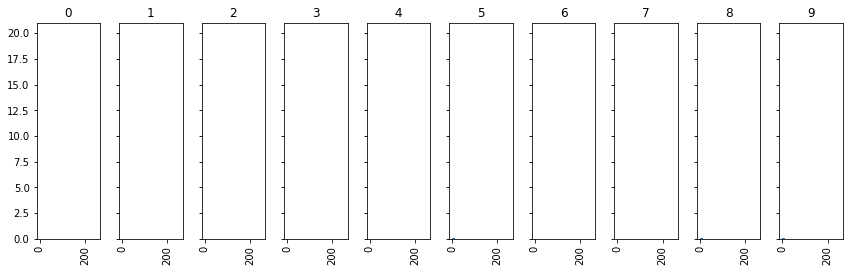

pixel43


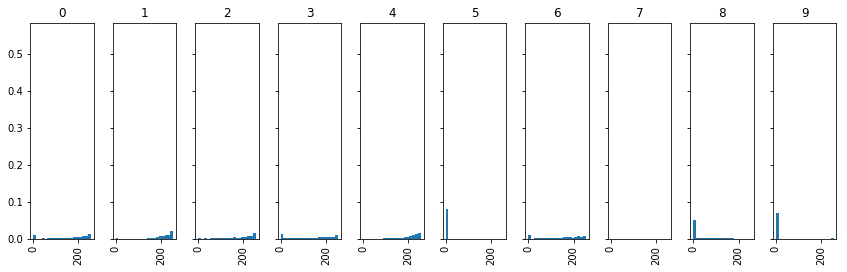

pixel44


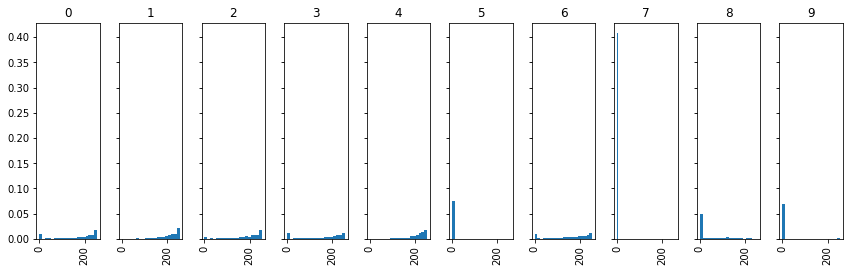

pixel45


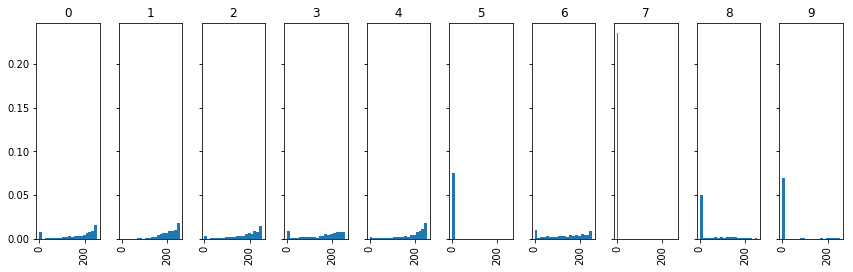

pixel46


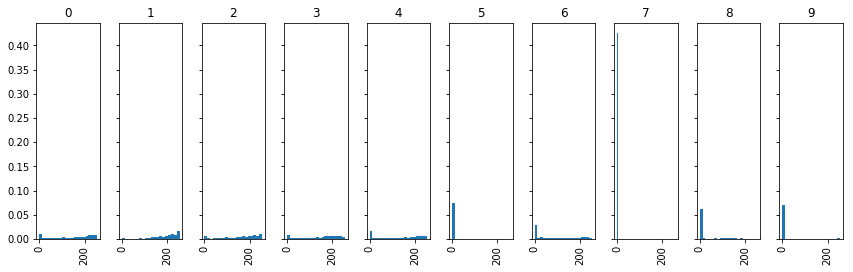

pixel47


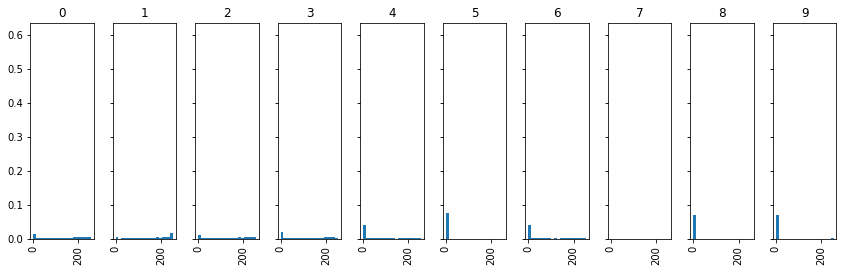

pixel48


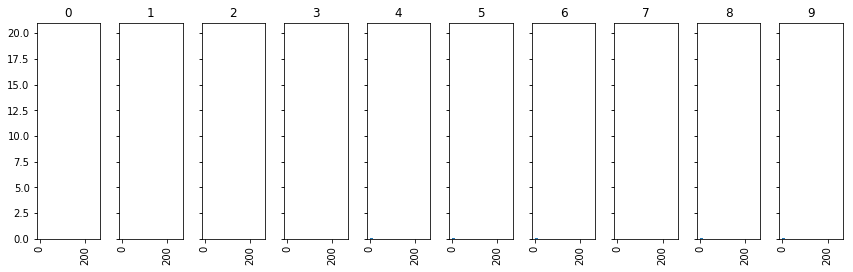

pixel49


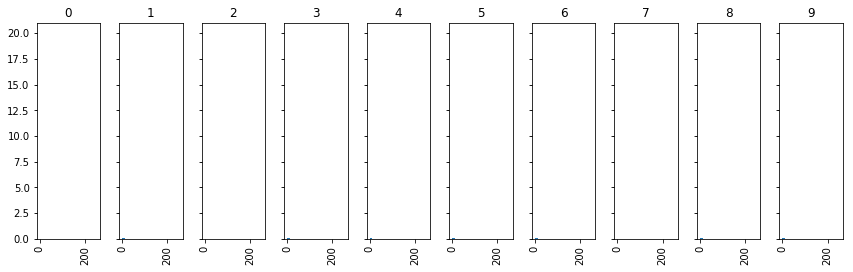

pixel50


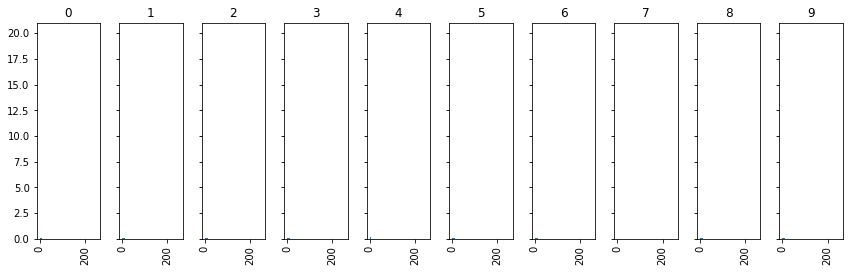

pixel51


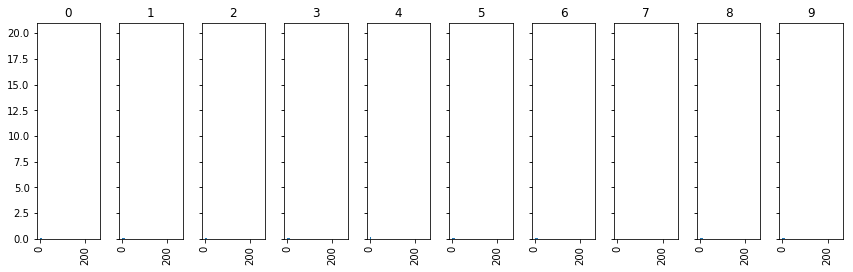

pixel52


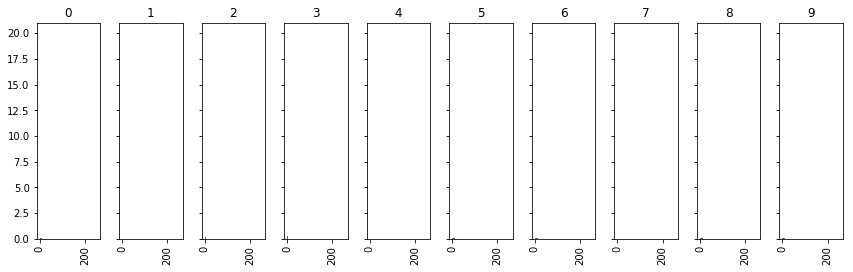

pixel53


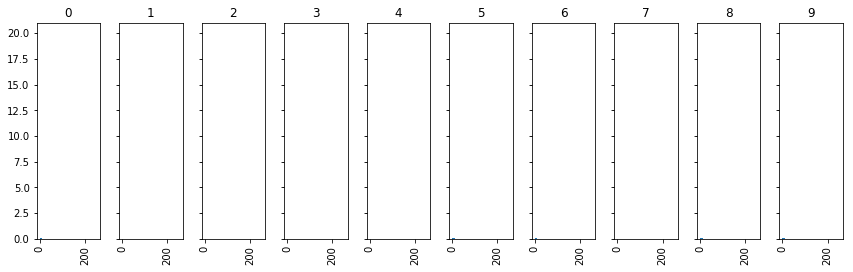

pixel54


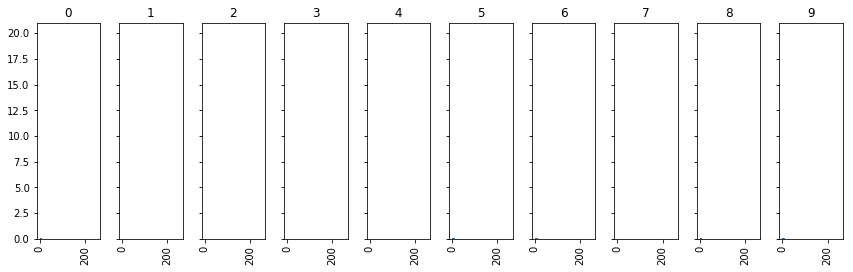

pixel55


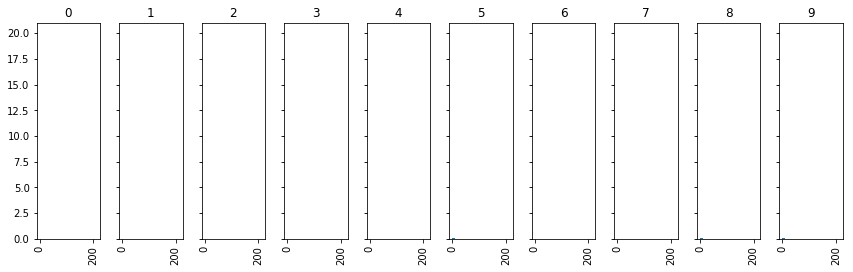

pixel56


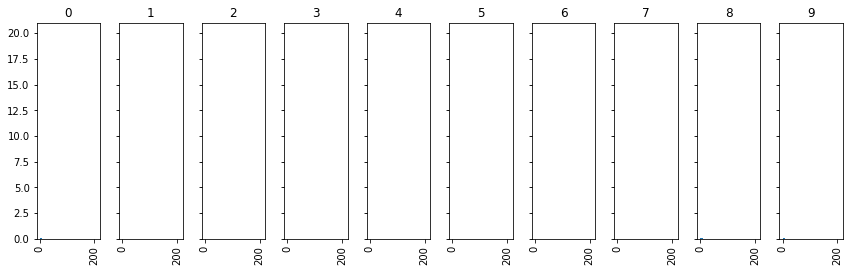

pixel57


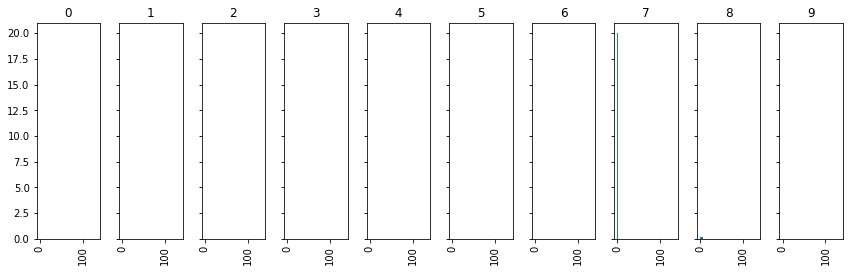

pixel58


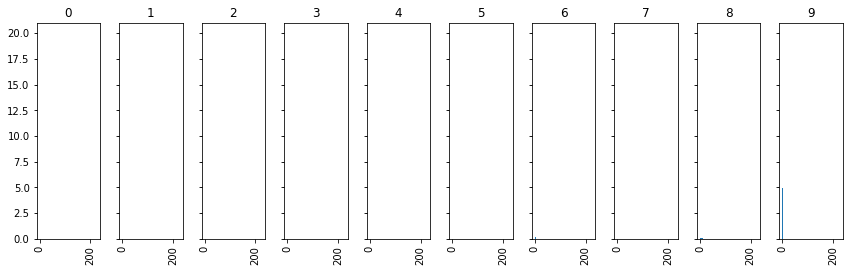

pixel59


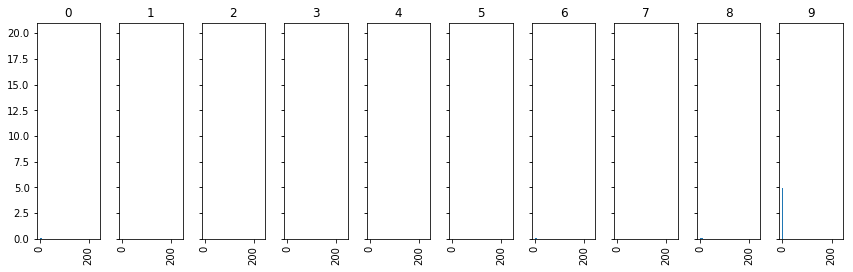

pixel60


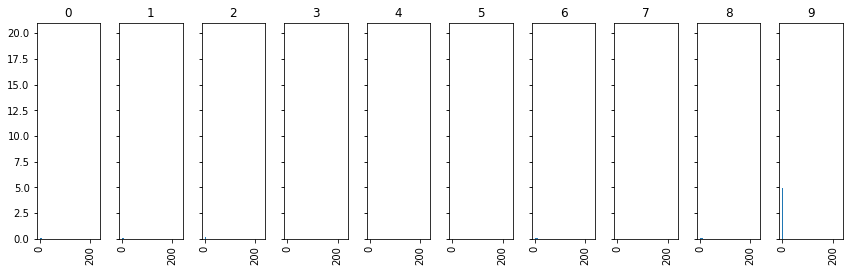

pixel61


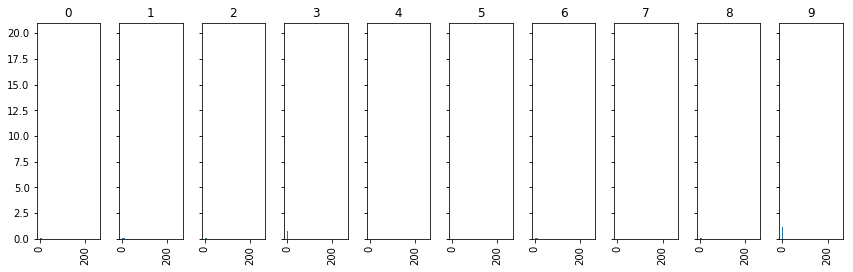

pixel62


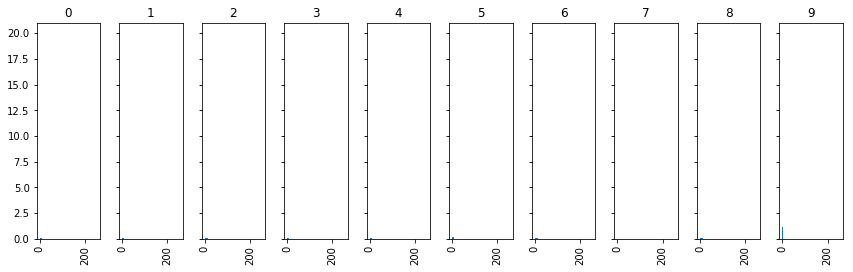

pixel63


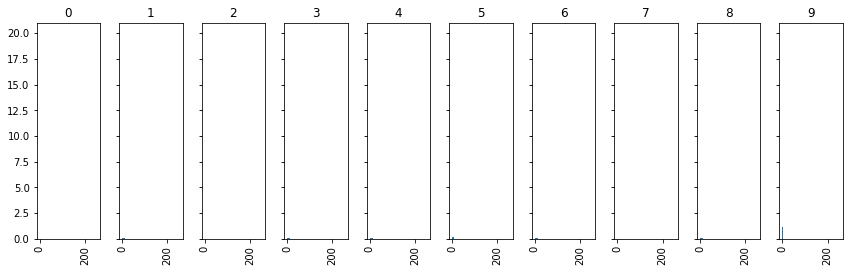

pixel64


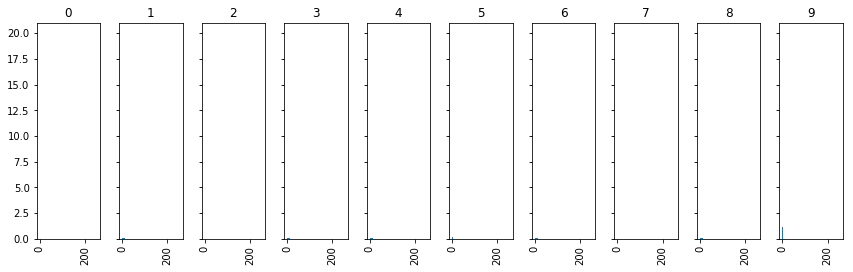

pixel65


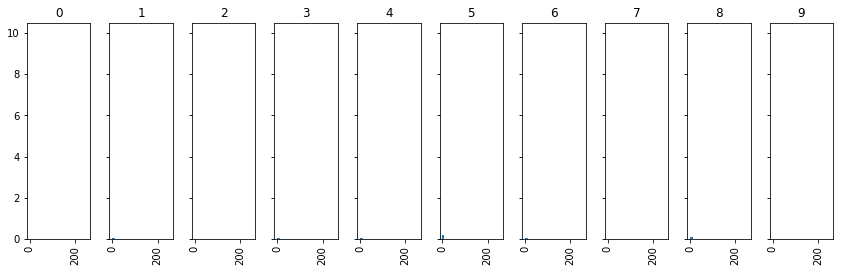

pixel66


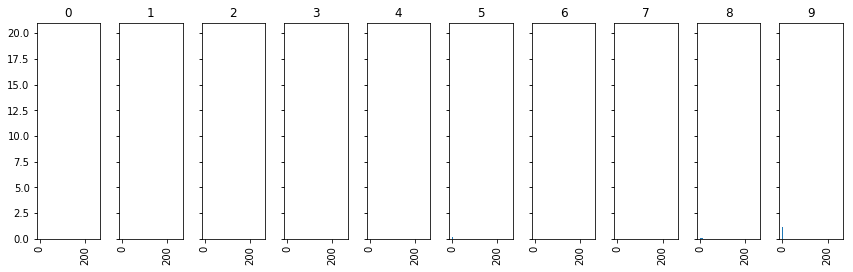

pixel67


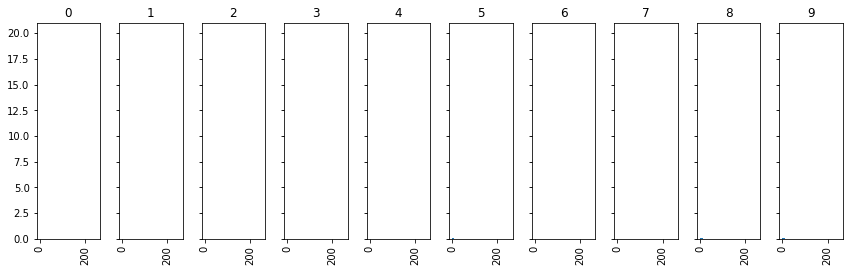

pixel68


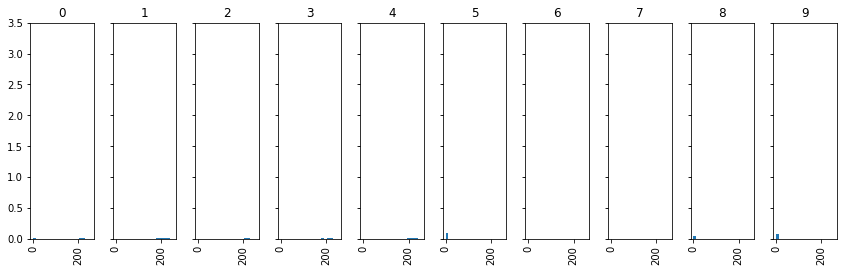

pixel69


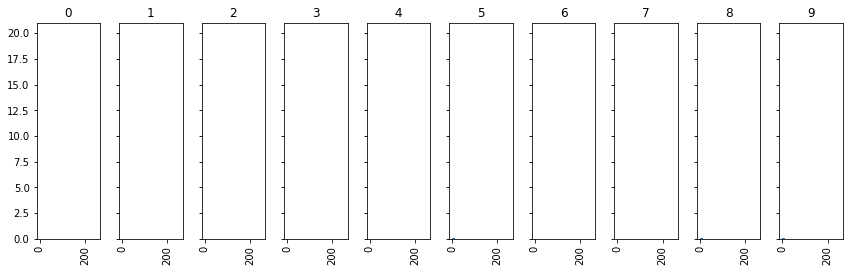

pixel70


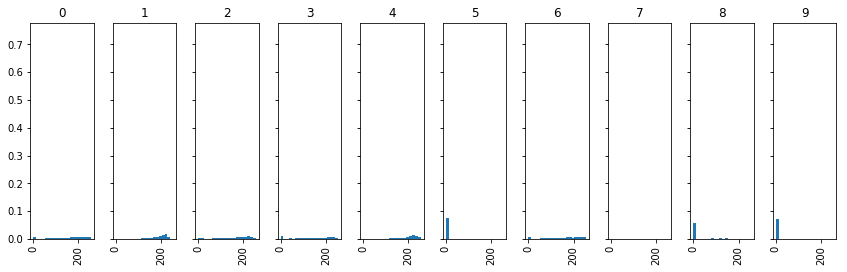

pixel71


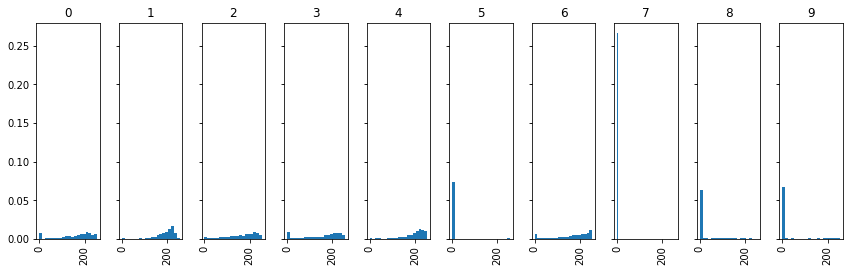

pixel72


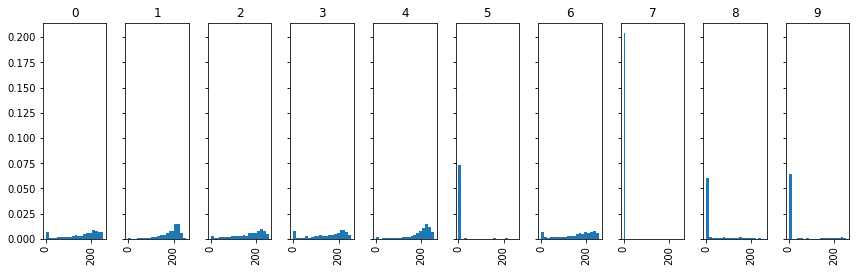

pixel73


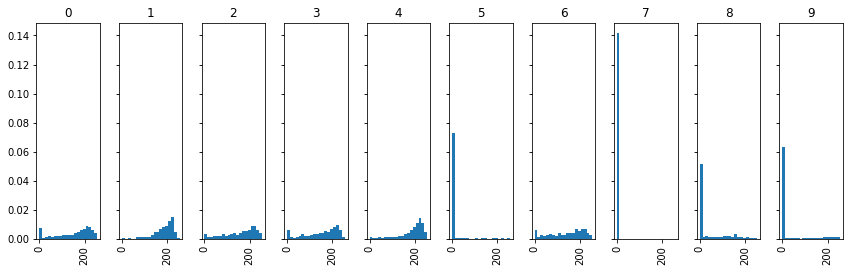

pixel74


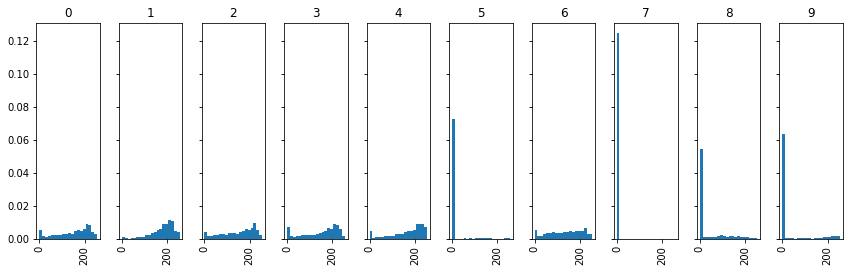

pixel75


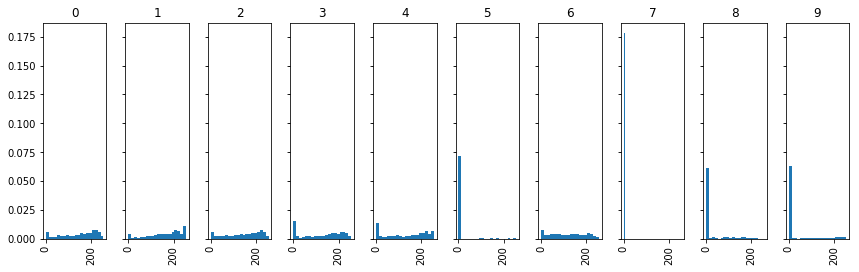

pixel76


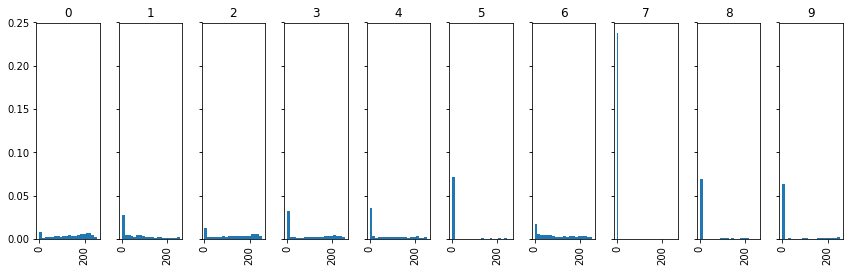

pixel77


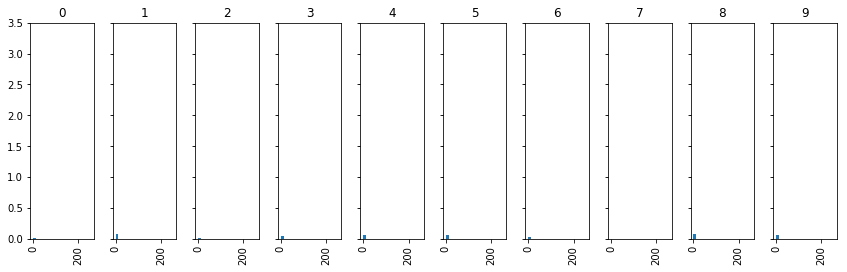

pixel78


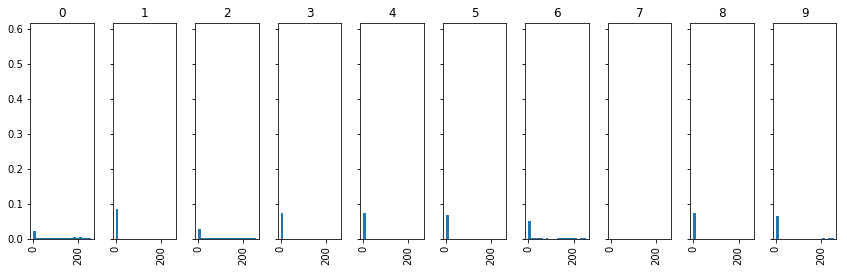

pixel79


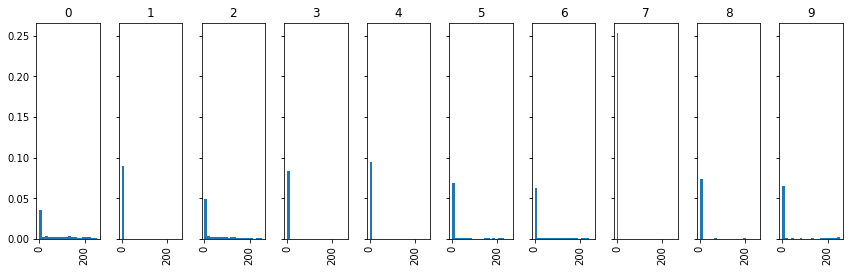

pixel80


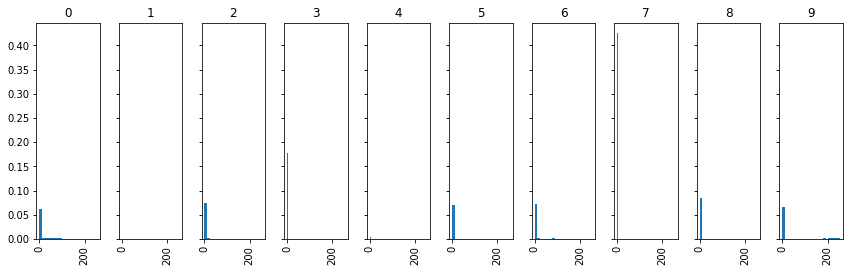

pixel81


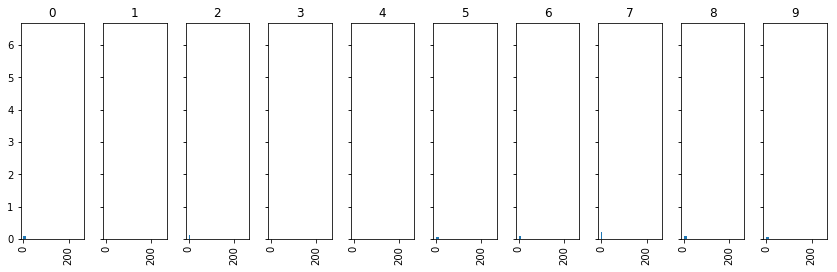

pixel82


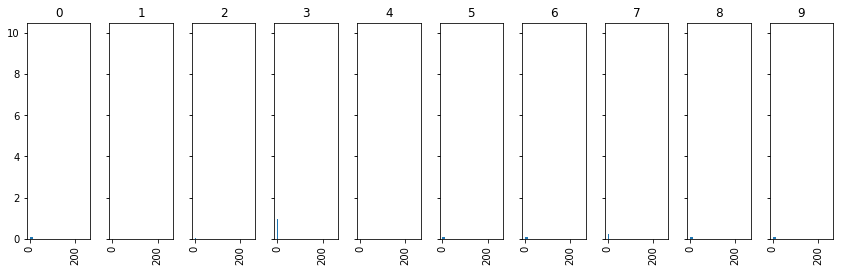

pixel83


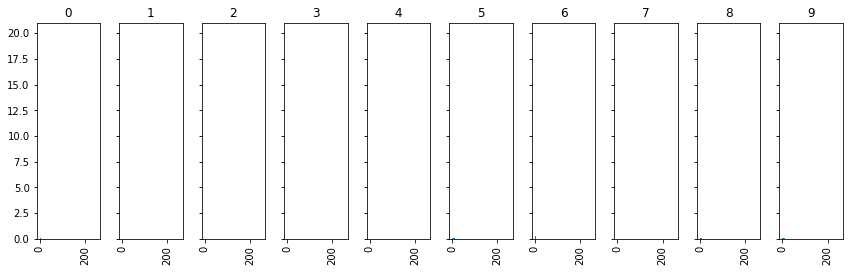

pixel84


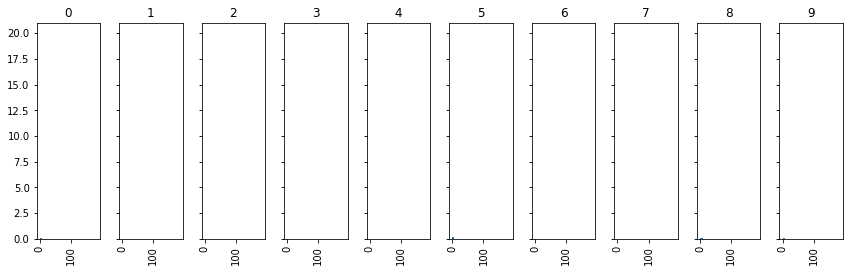

pixel85


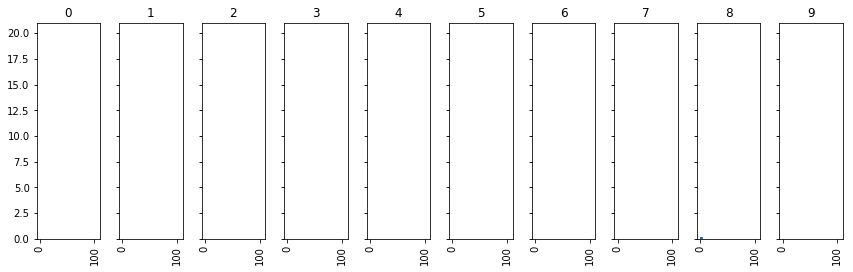

pixel86


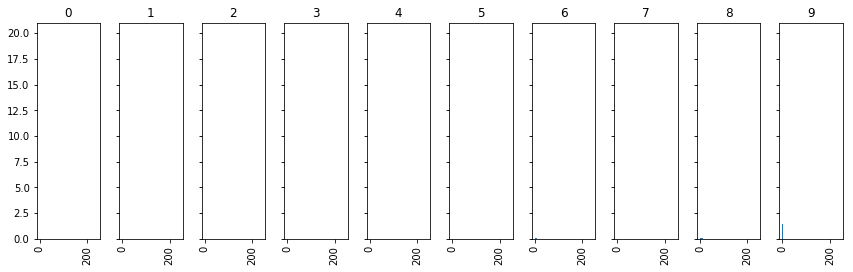

pixel87


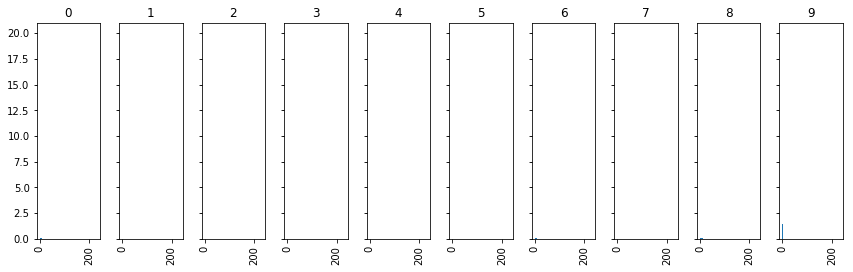

pixel88


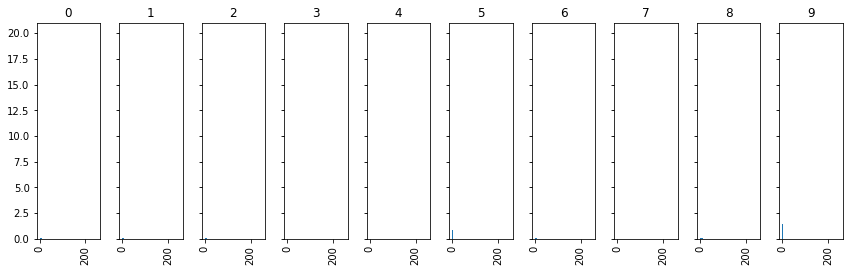

pixel89


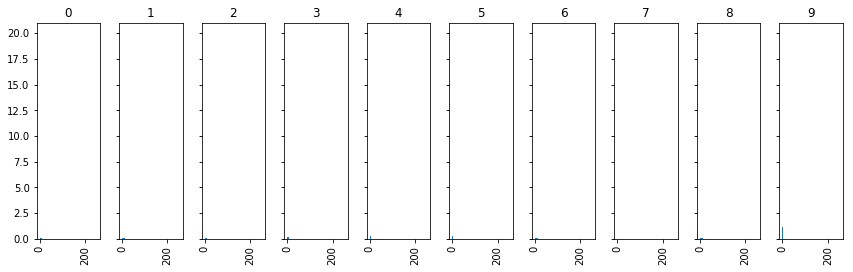

pixel90


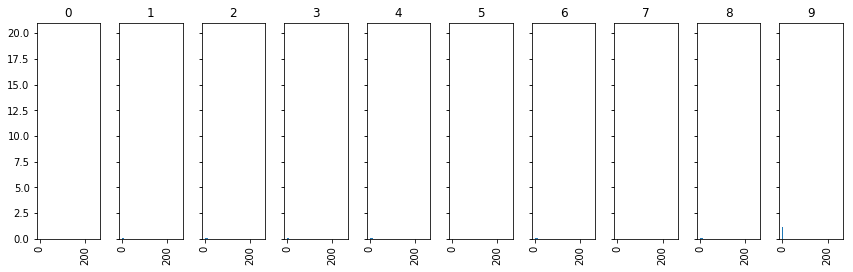

pixel91


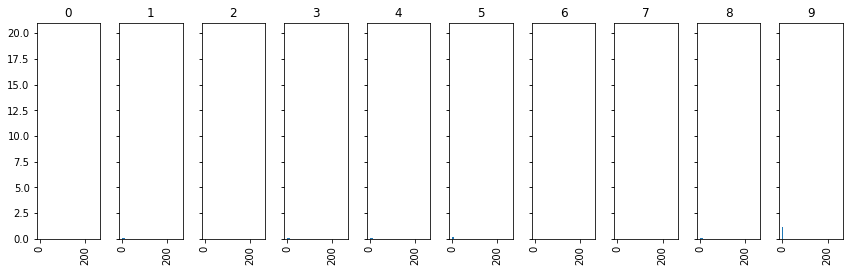

pixel92


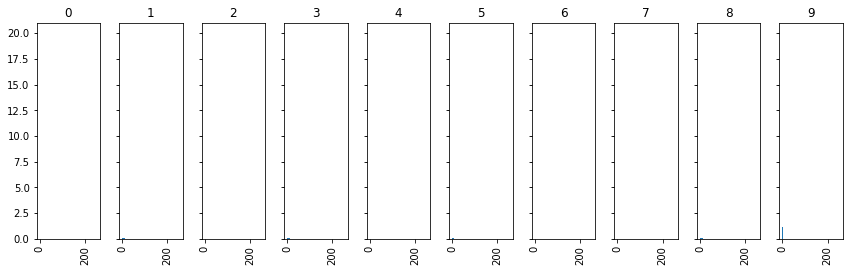

pixel93


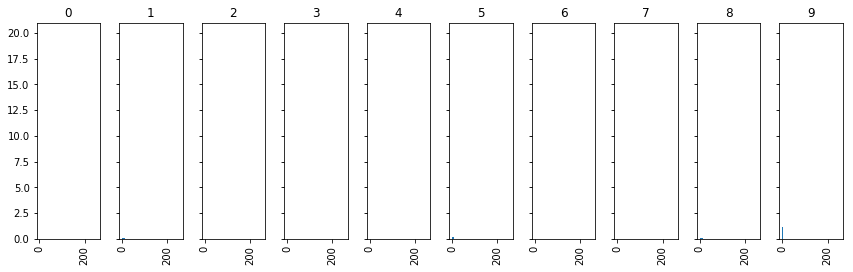

pixel94


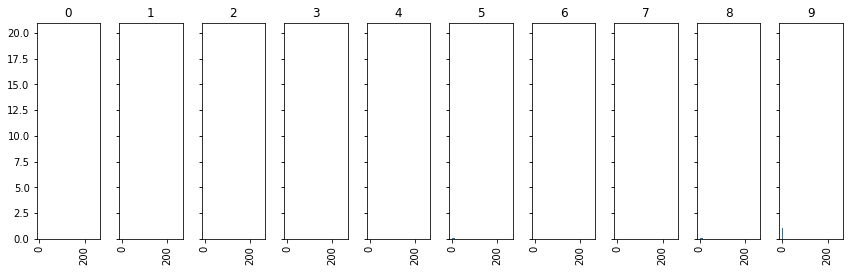

pixel95


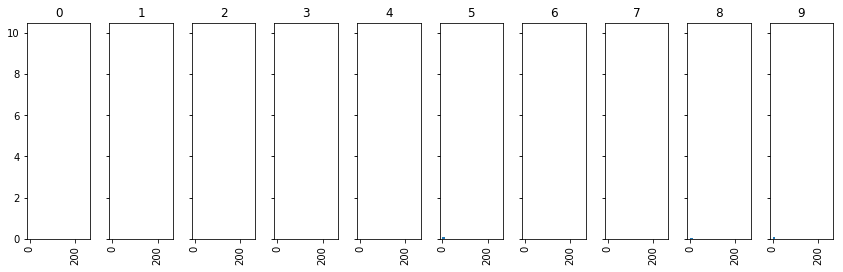

pixel96


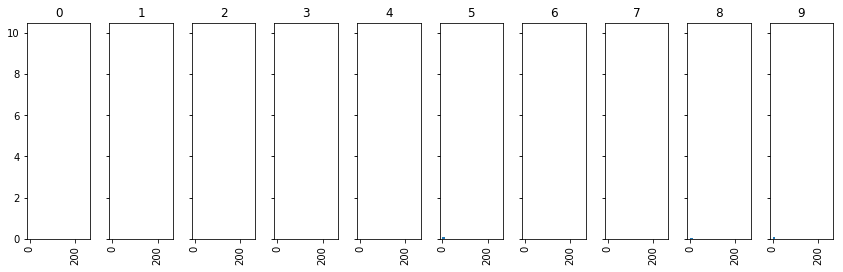

pixel97


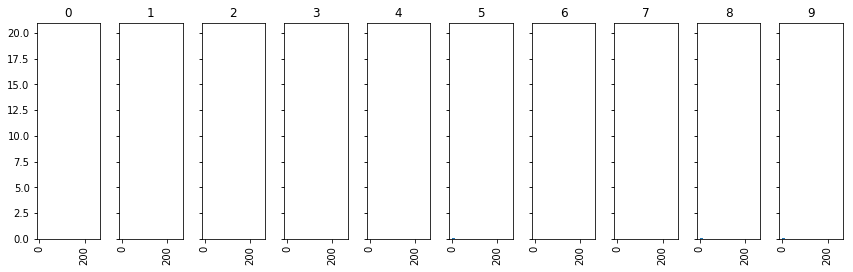

pixel98


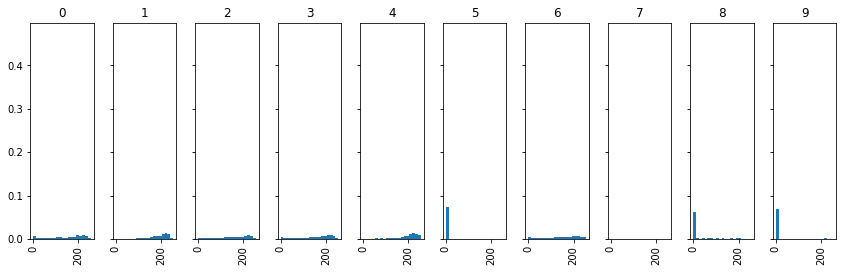

pixel99


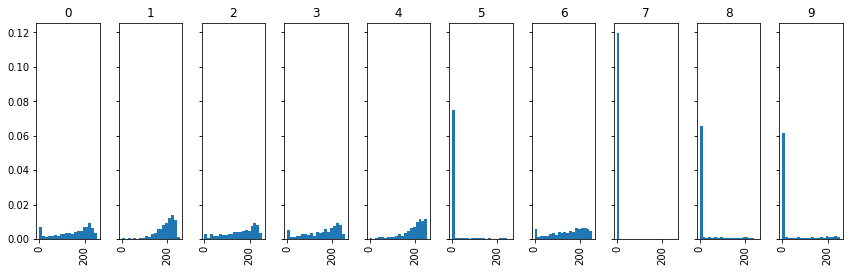

pixel100


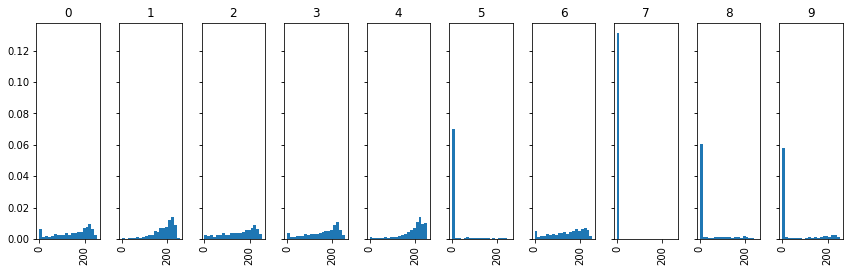

pixel101


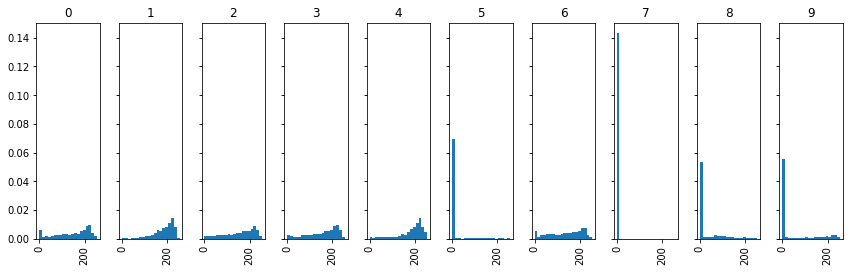

pixel102


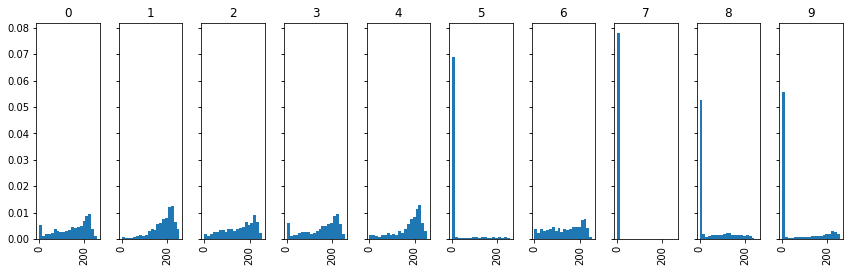

pixel103


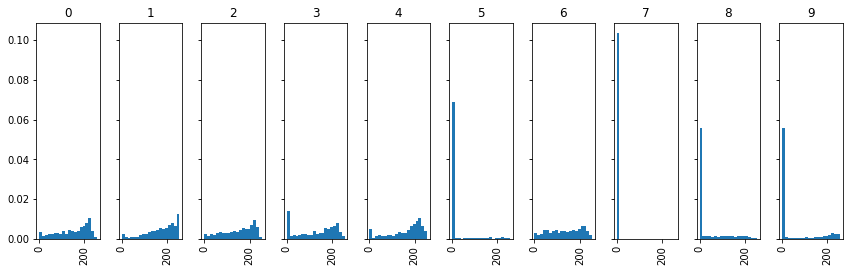

pixel104


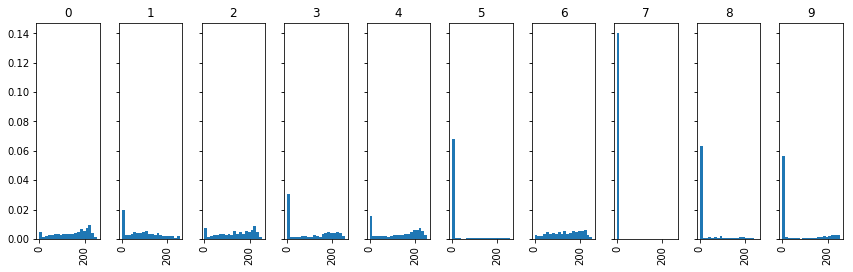

pixel105


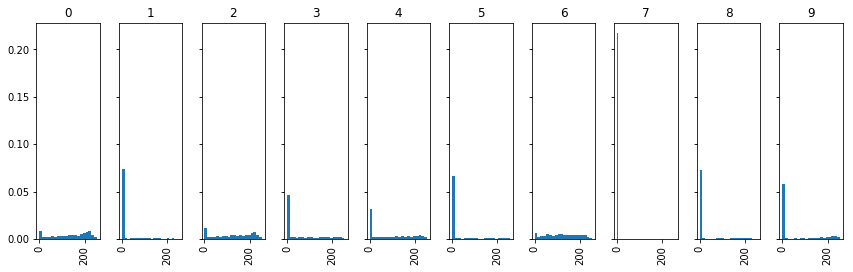

pixel106


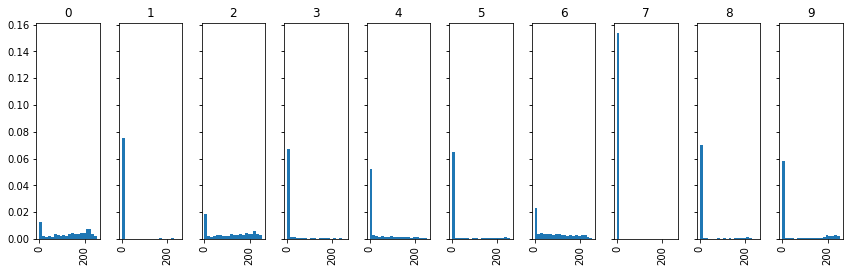

pixel107


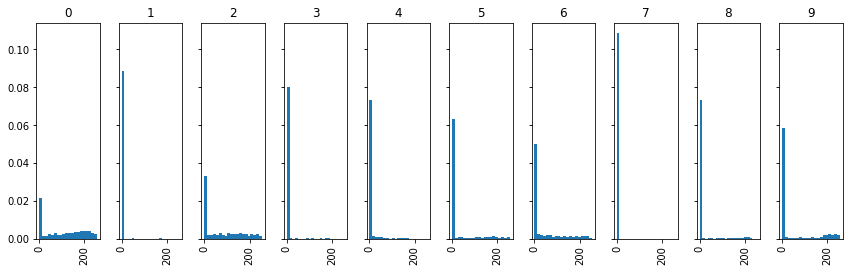

pixel108


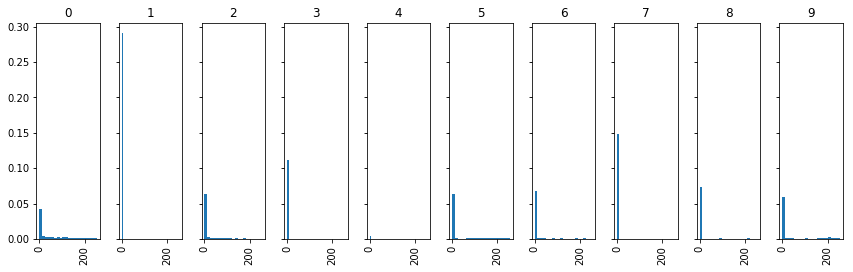

pixel109


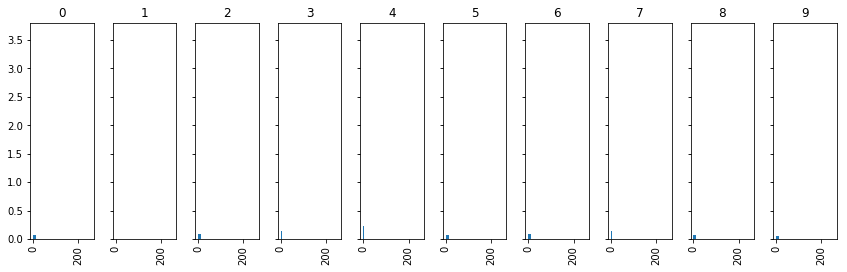

pixel110


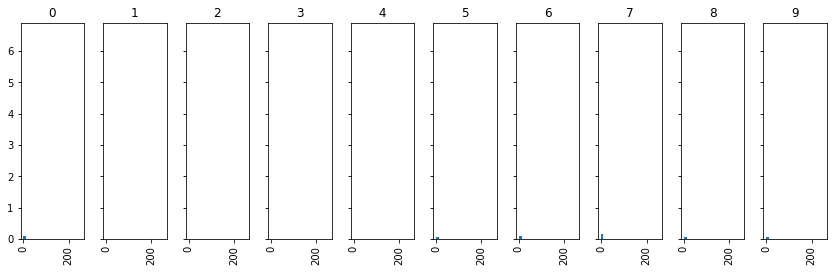

pixel111


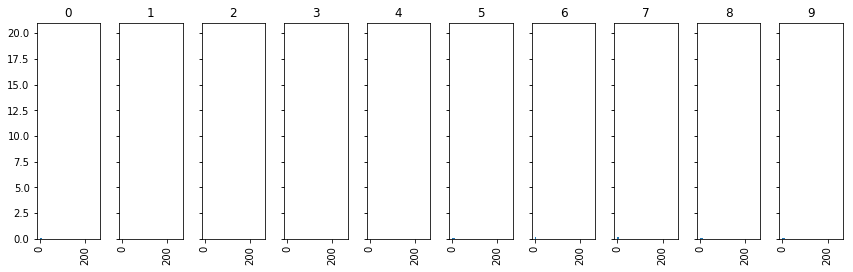

pixel112


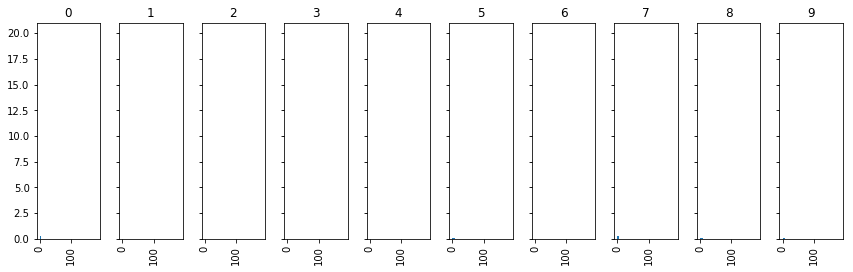

pixel113


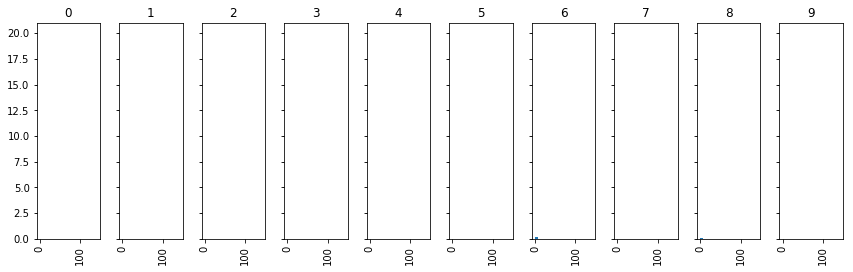

pixel114


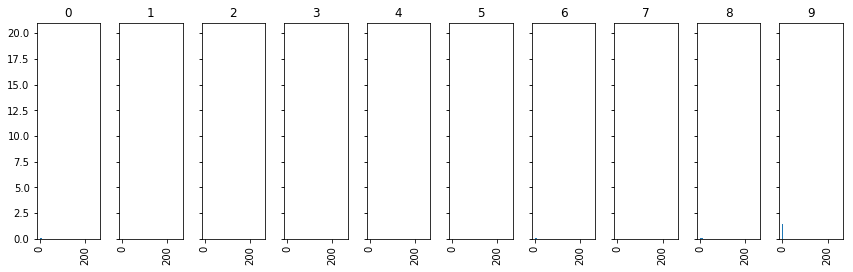

pixel115


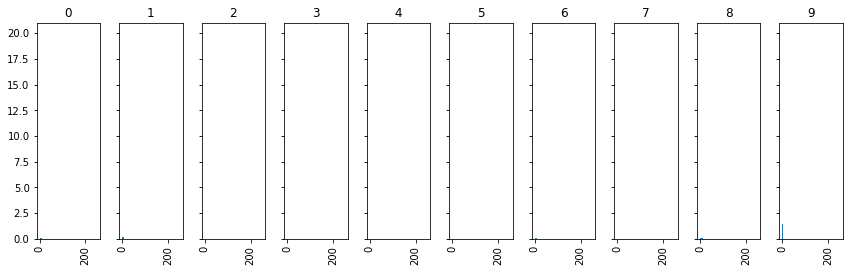

pixel116


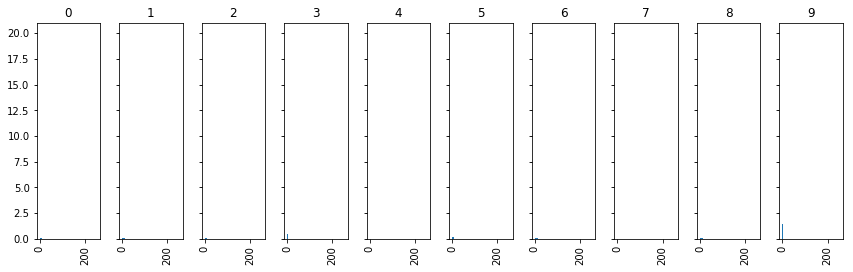

pixel117


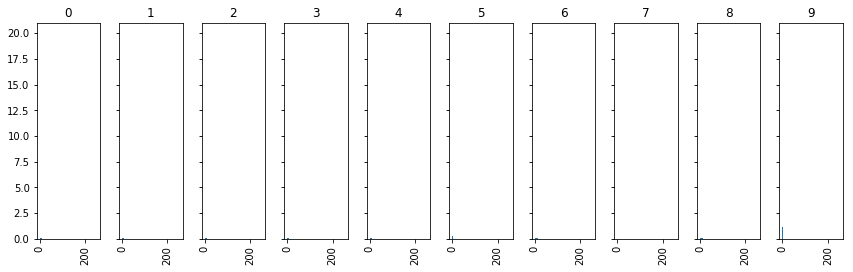

pixel118


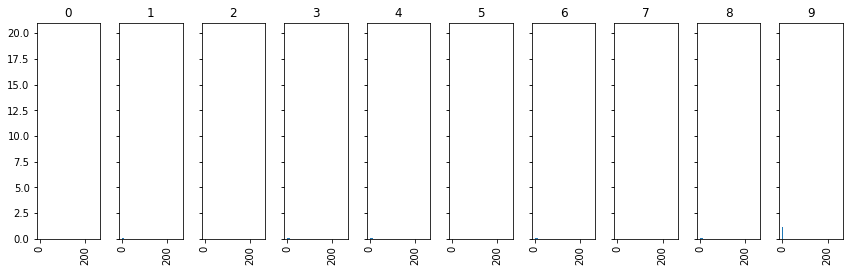

pixel119


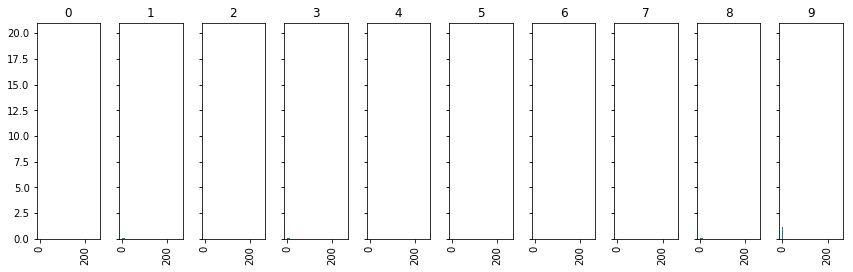

pixel120


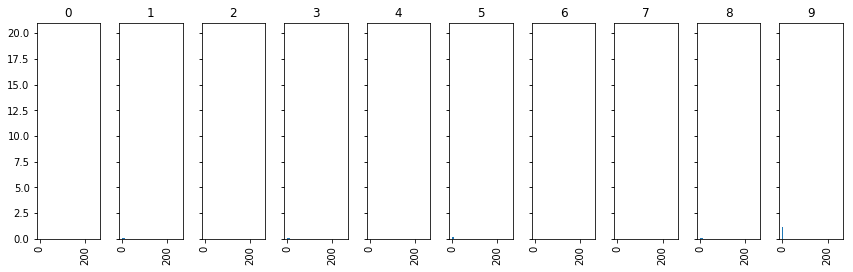

pixel121


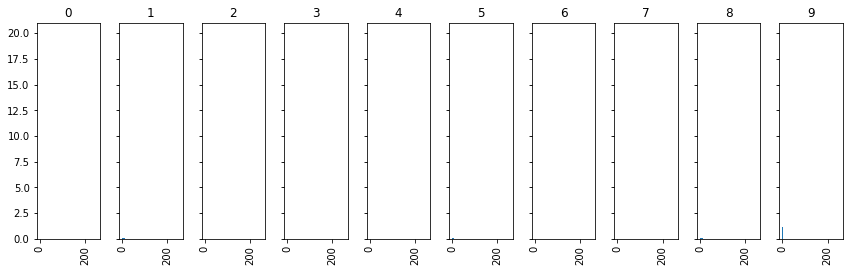

pixel122


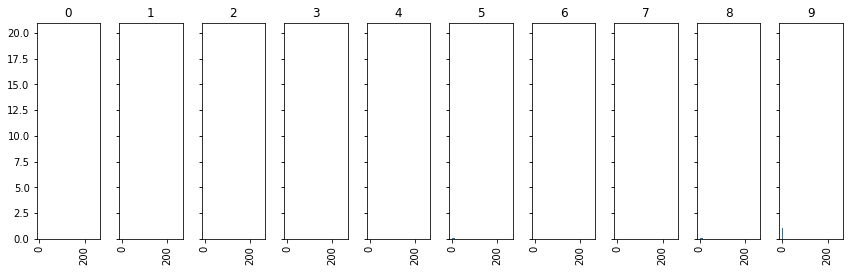

pixel123


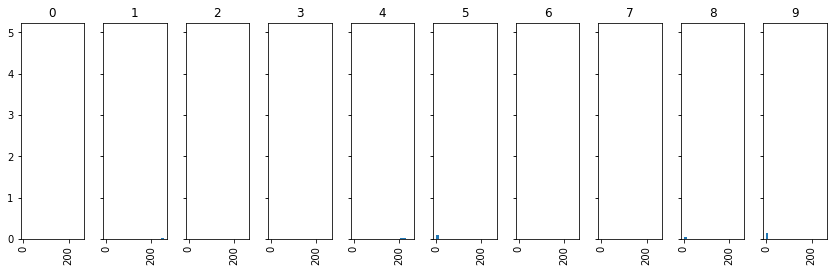

pixel124


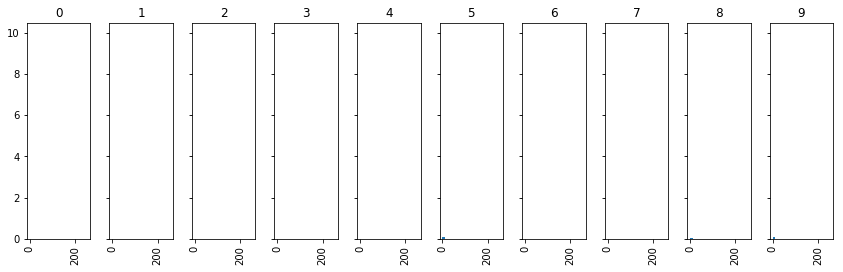

pixel125


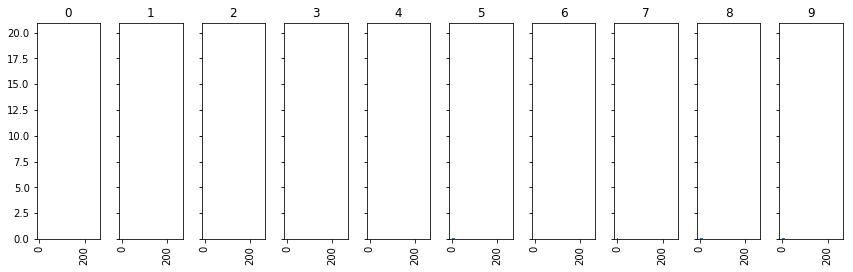

pixel126


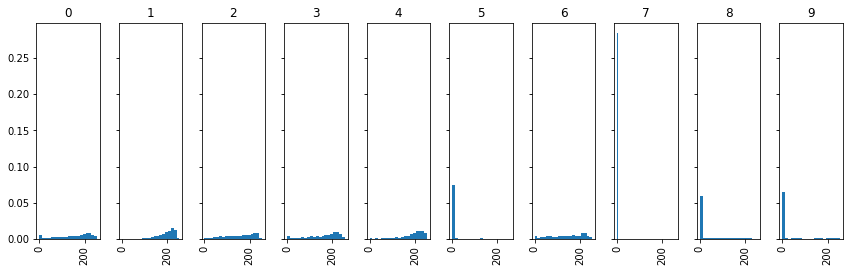

pixel127


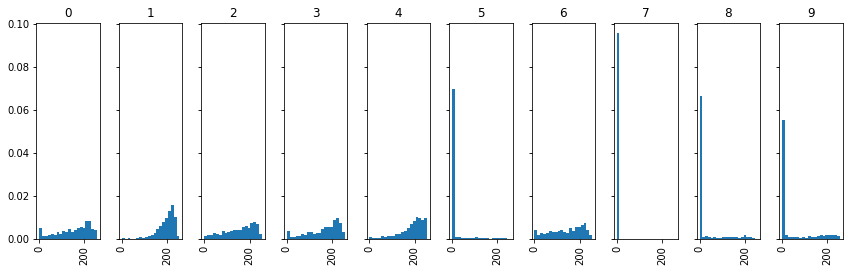

pixel128


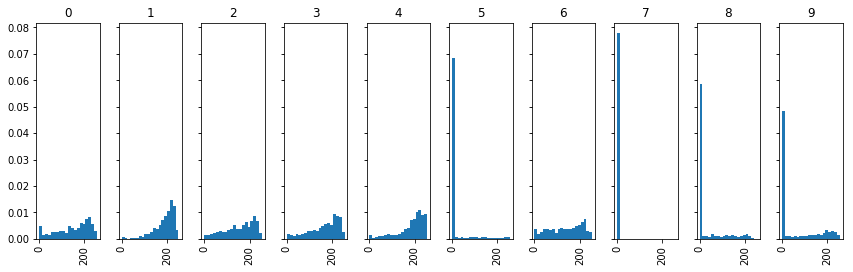

pixel129


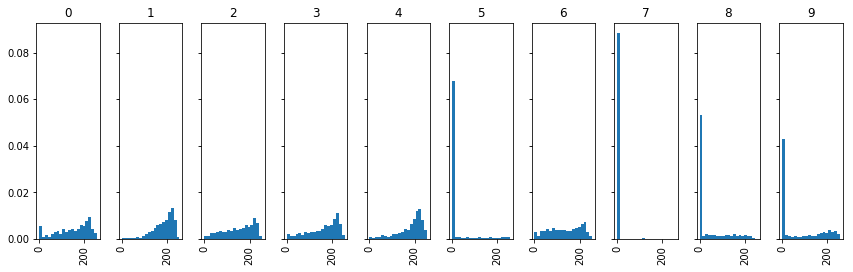

pixel130


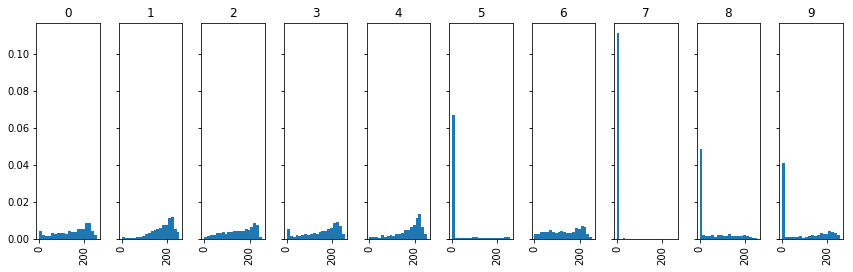

pixel131


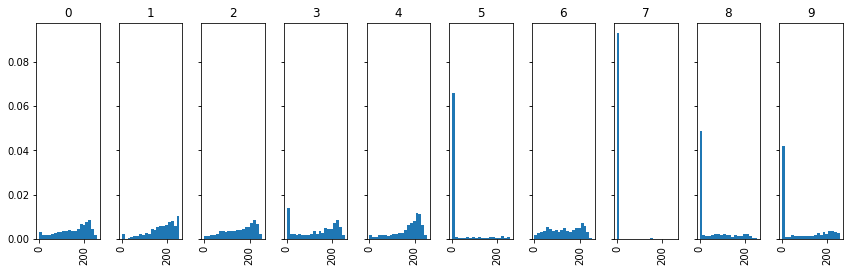

pixel132


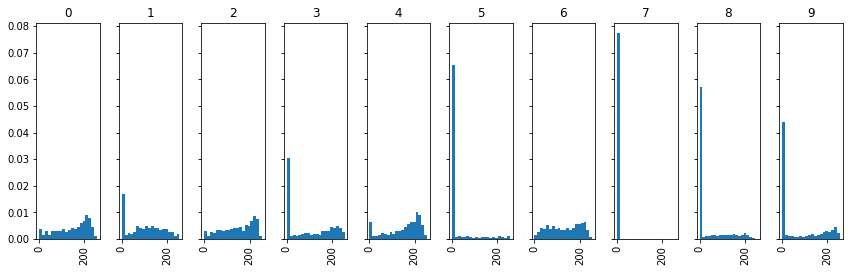

pixel133


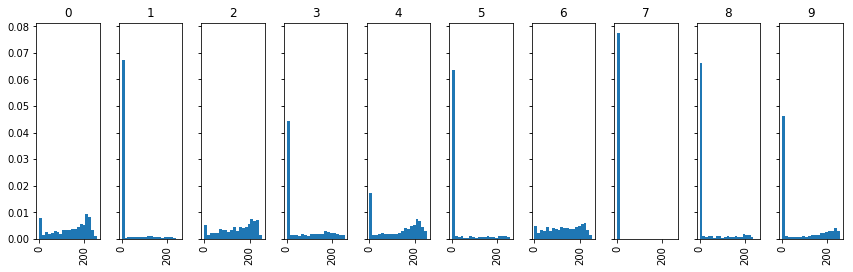

pixel134


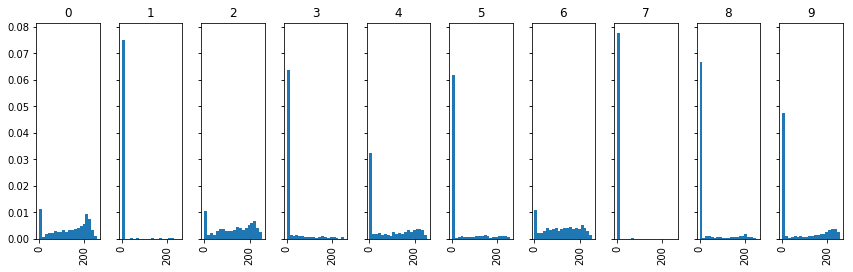

pixel135


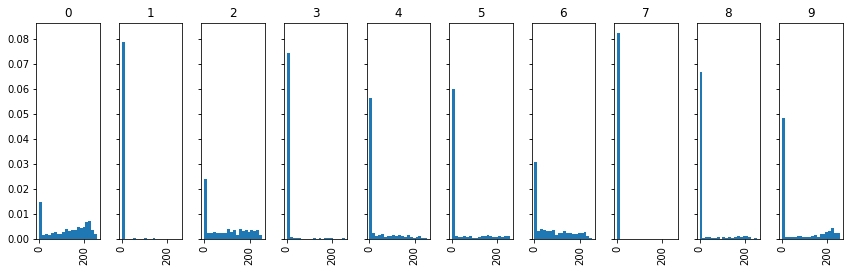

pixel136


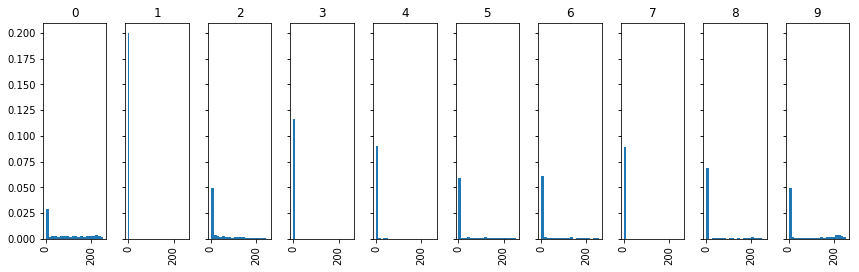

pixel137


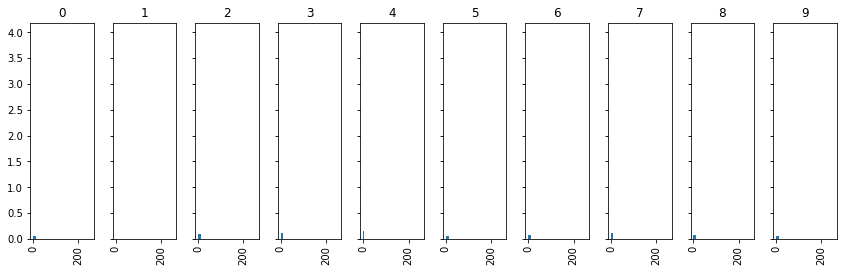

pixel138


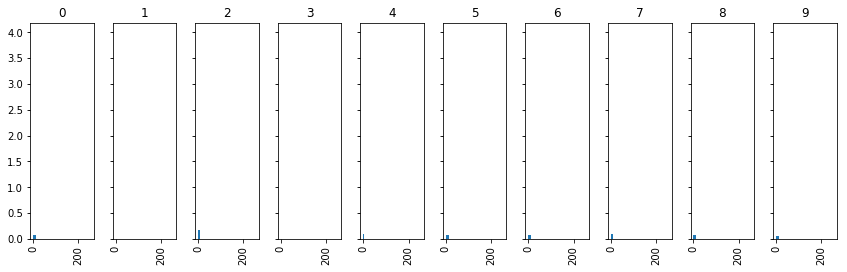

pixel139


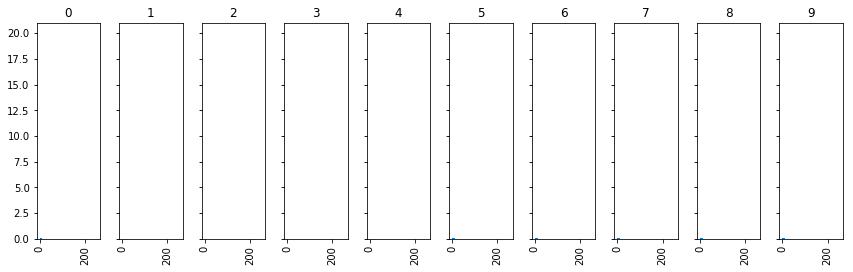

pixel140


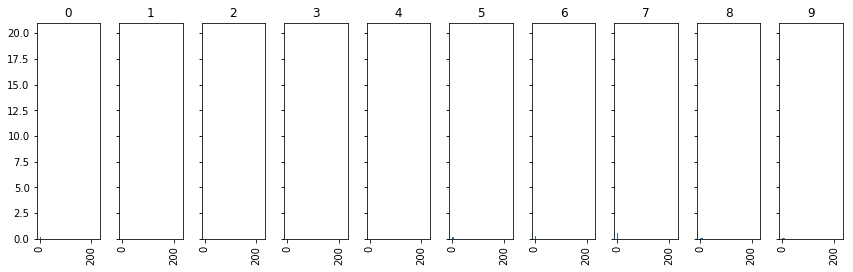

pixel141


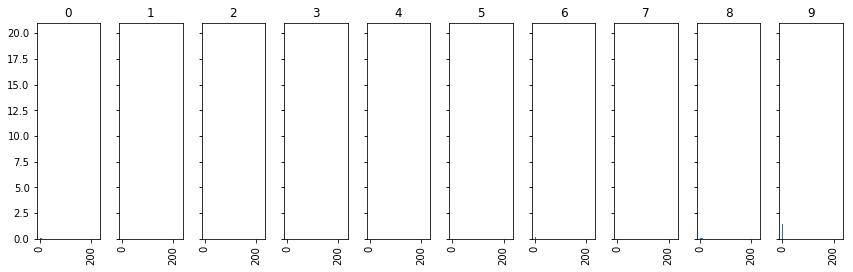

pixel142


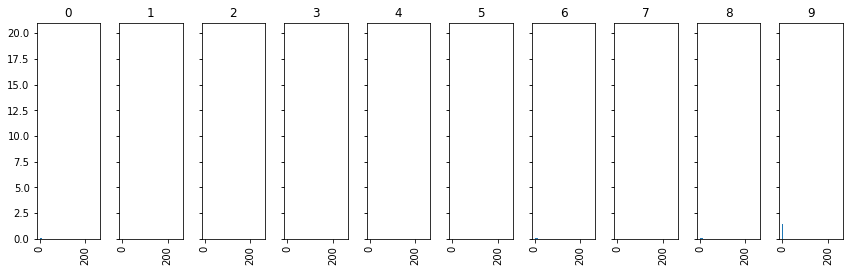

pixel143


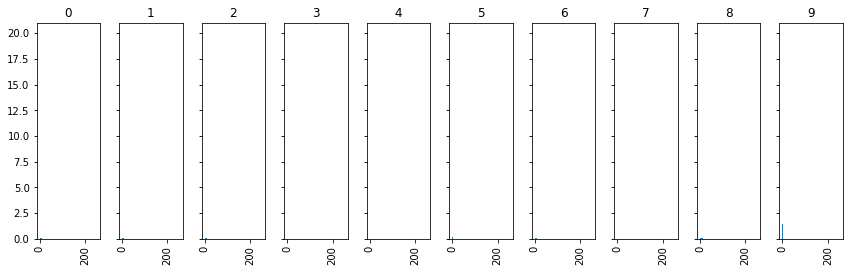

pixel144


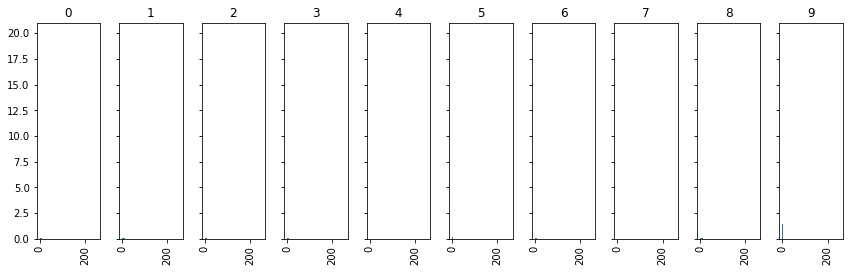

pixel145


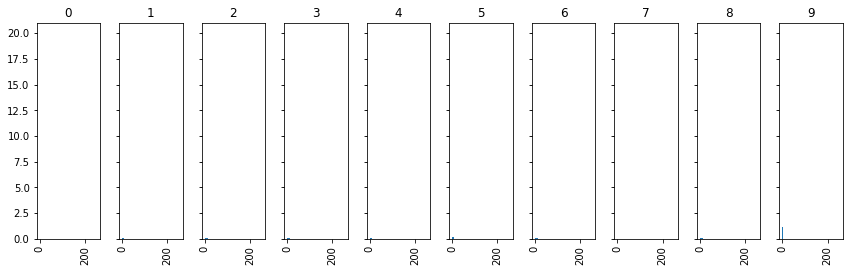

pixel146


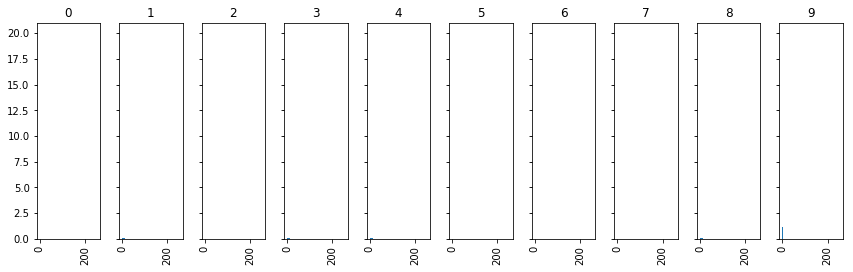

pixel147


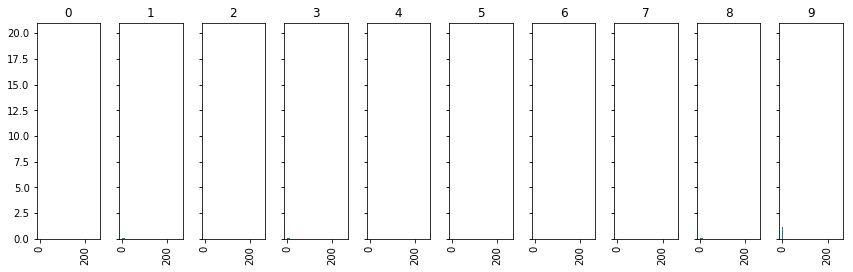

pixel148


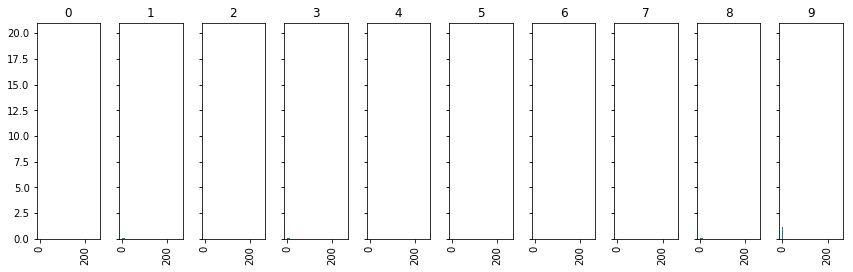

pixel149


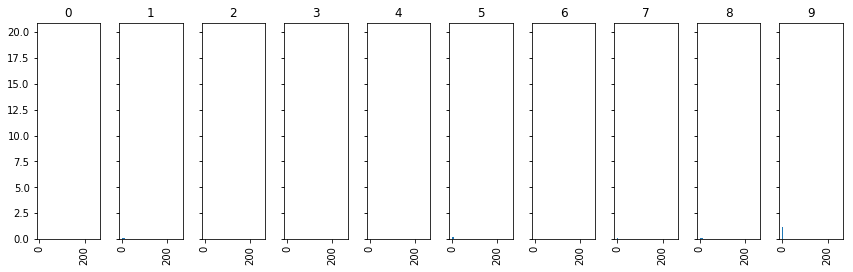

pixel150


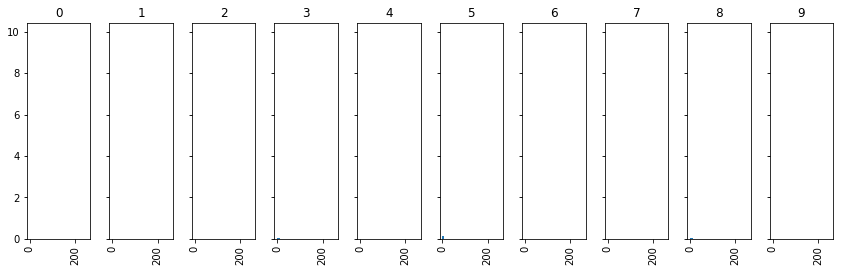

pixel151


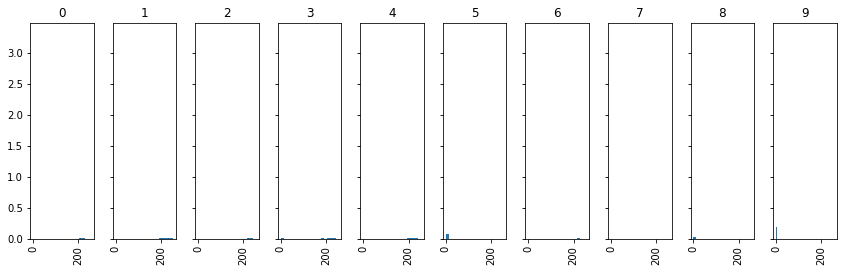

pixel152


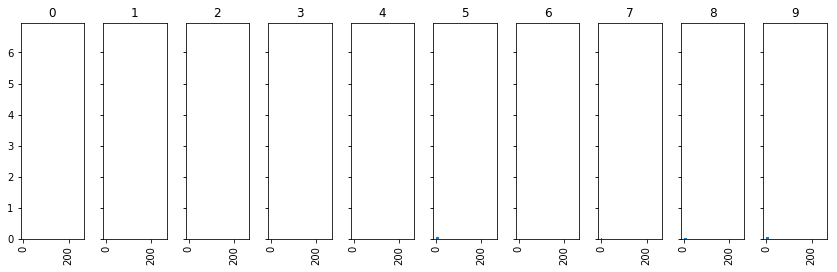

pixel153


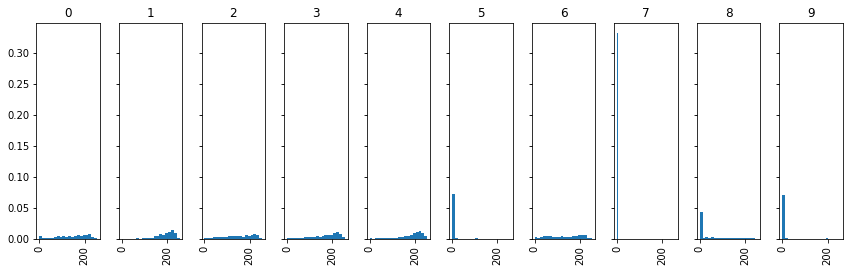

pixel154


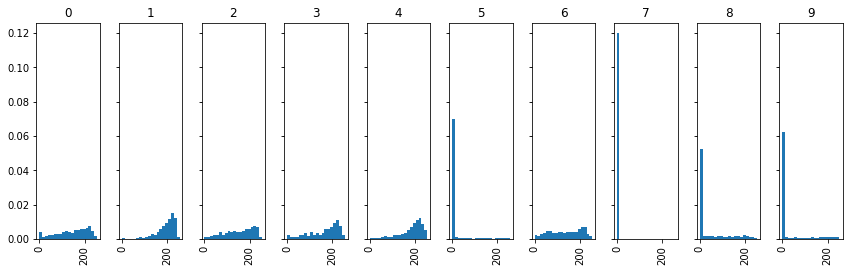

pixel155


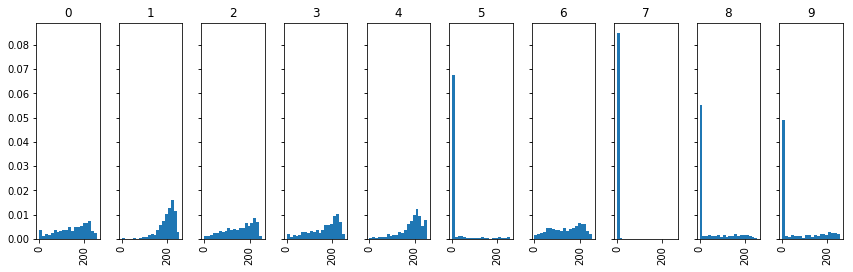

pixel156


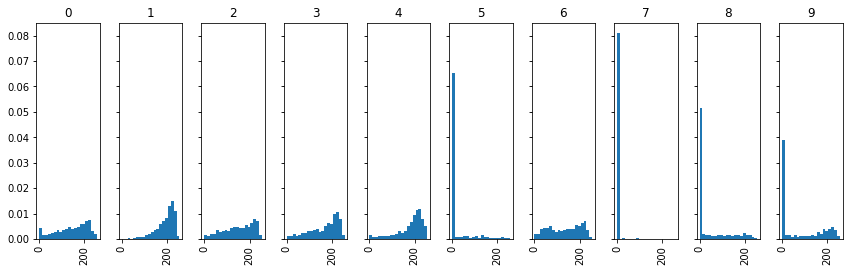

pixel157


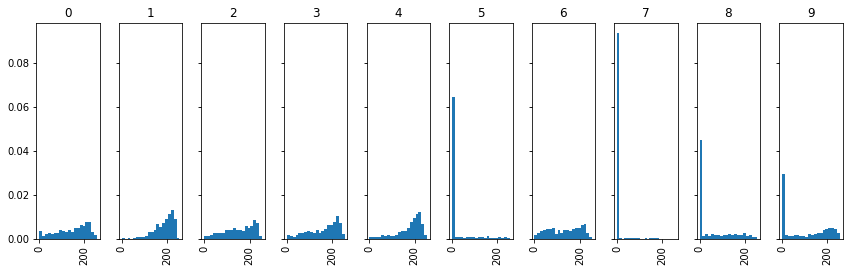

pixel158


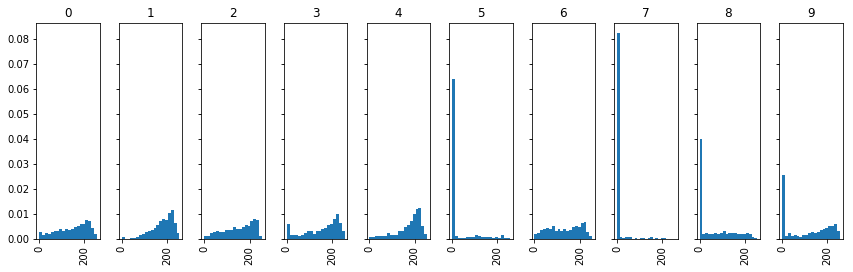

pixel159


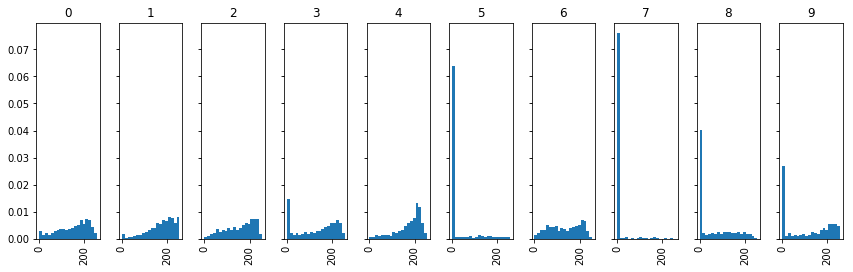

pixel160


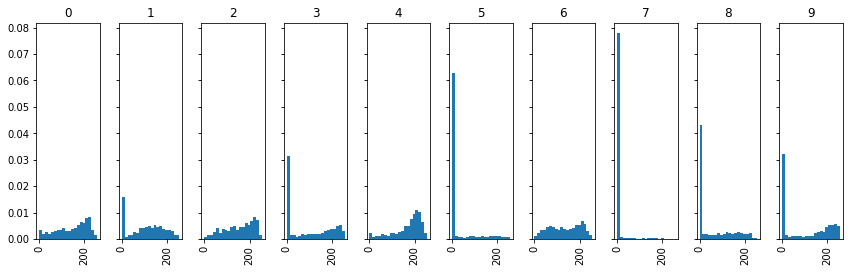

pixel161


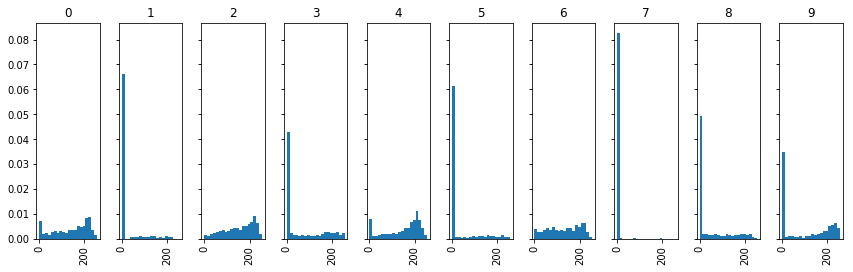

pixel162


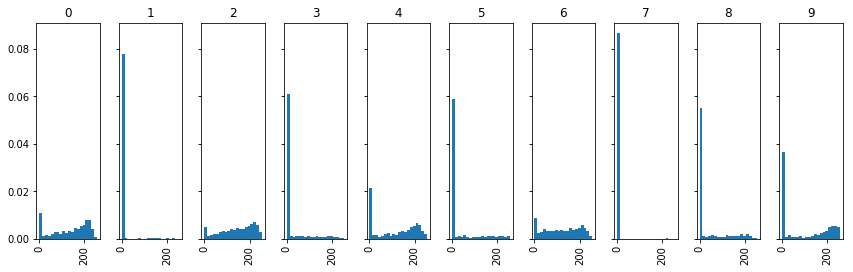

pixel163


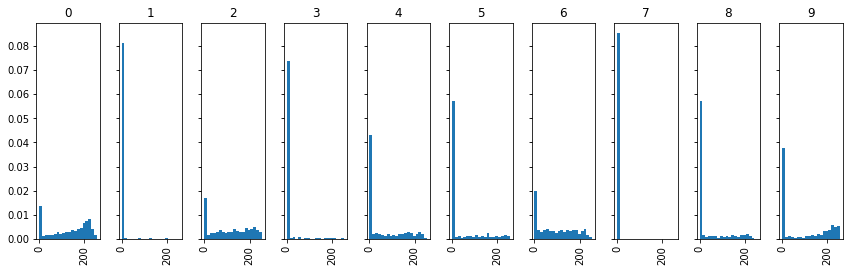

pixel164


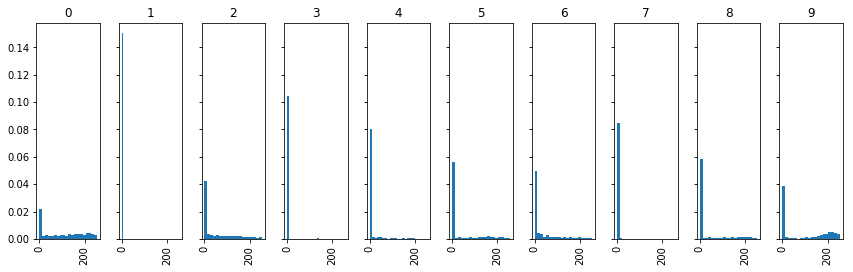

pixel165


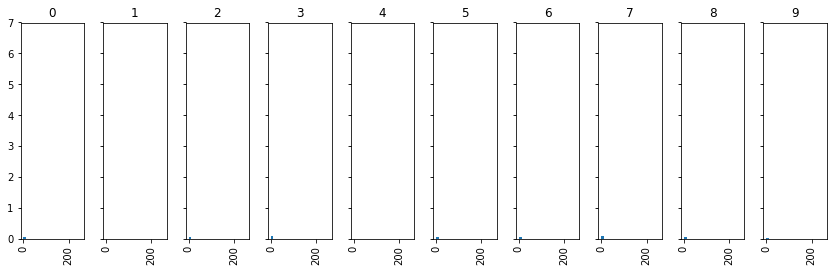

pixel166


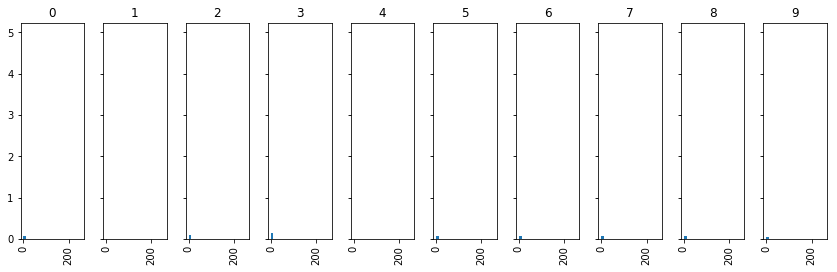

pixel167


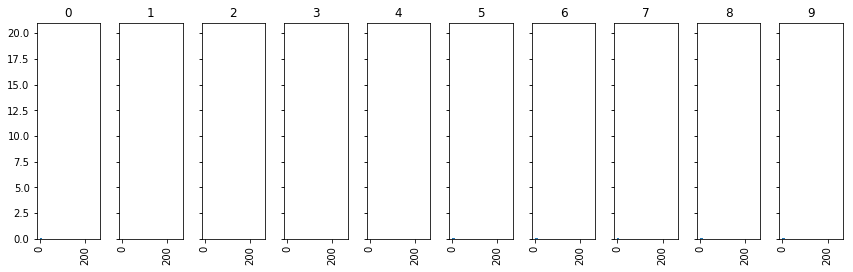

pixel168


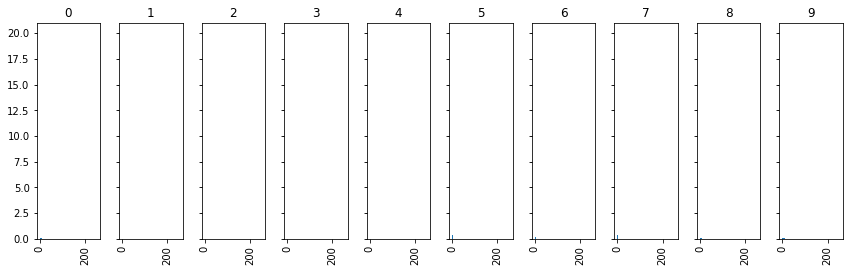

pixel169


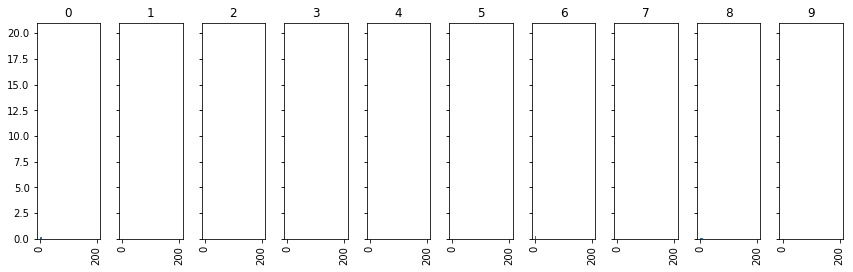

pixel170


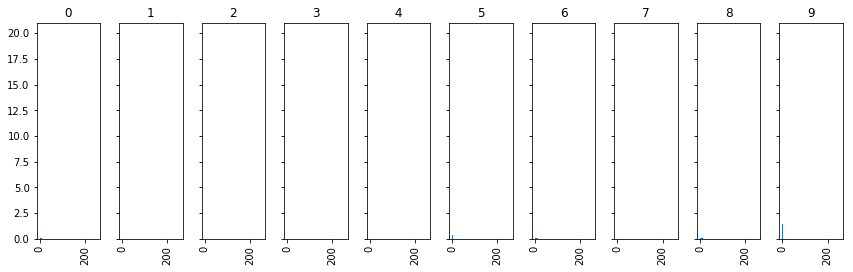

pixel171


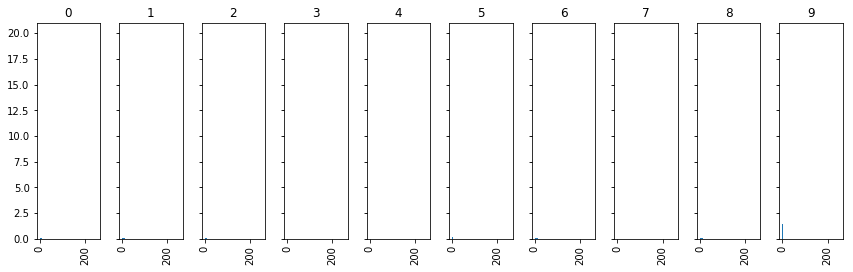

pixel172


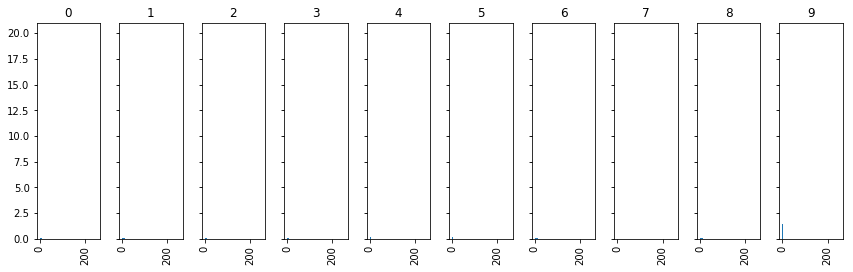

pixel173


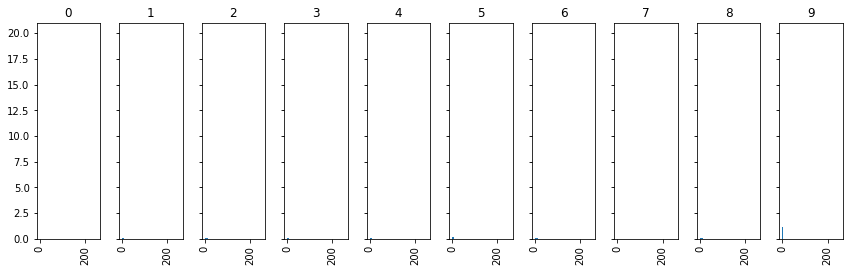

pixel174


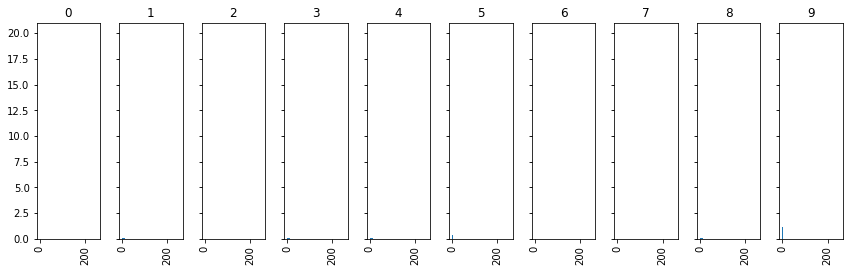

pixel175


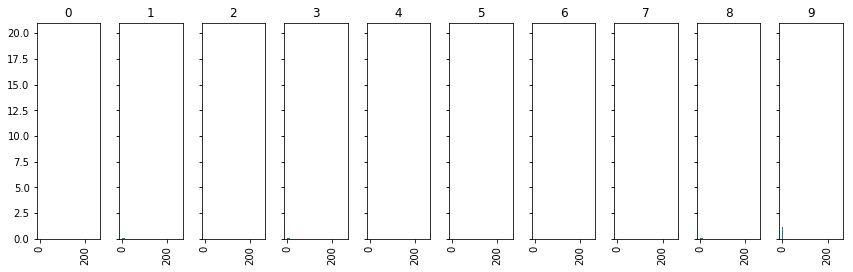

pixel176


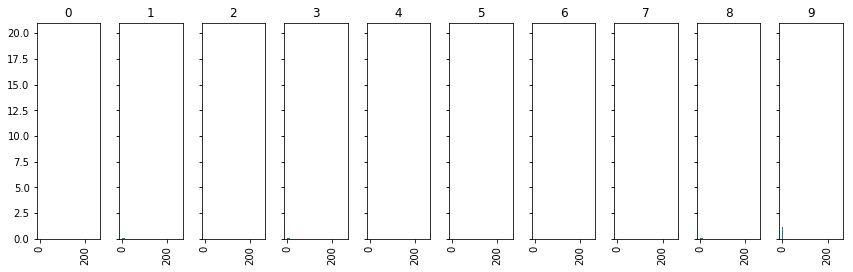

pixel177


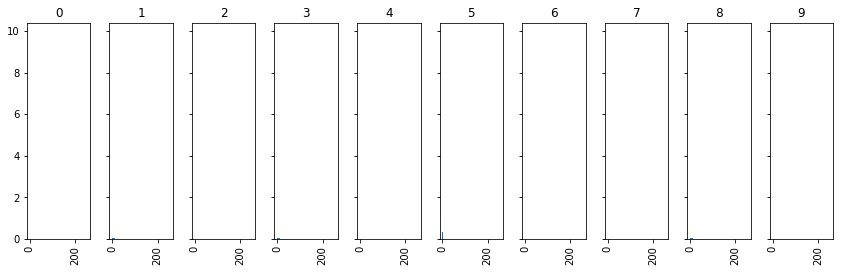

pixel178


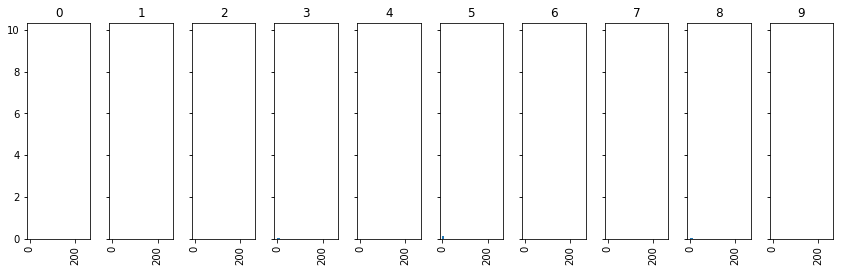

pixel179


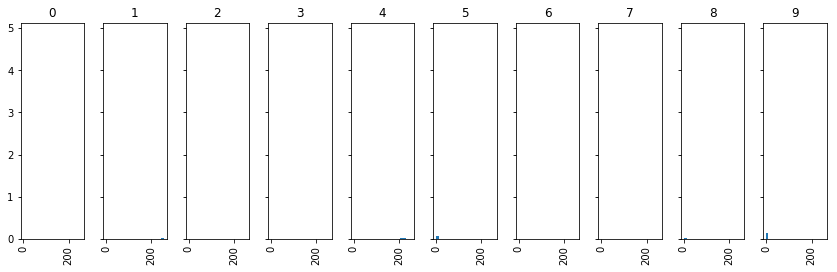

pixel180


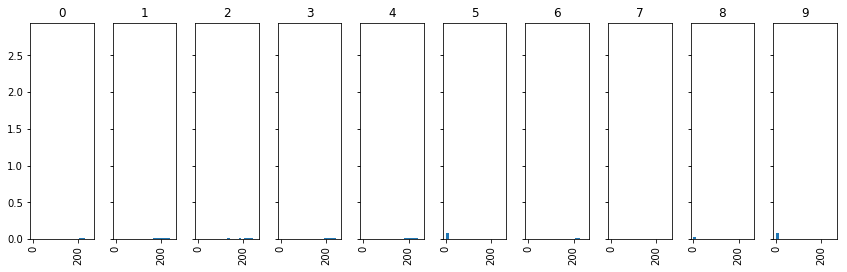

pixel181


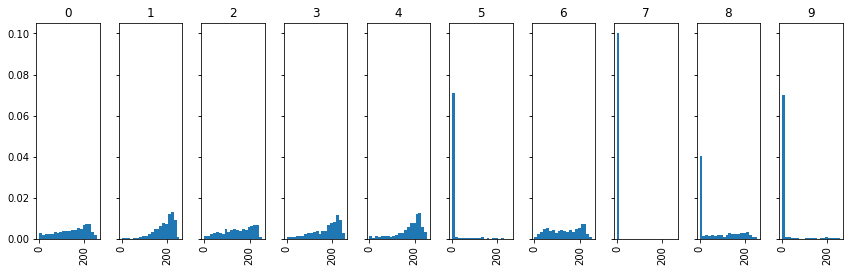

pixel182


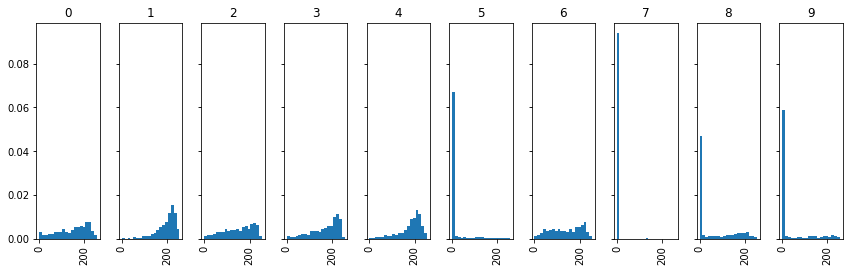

pixel183


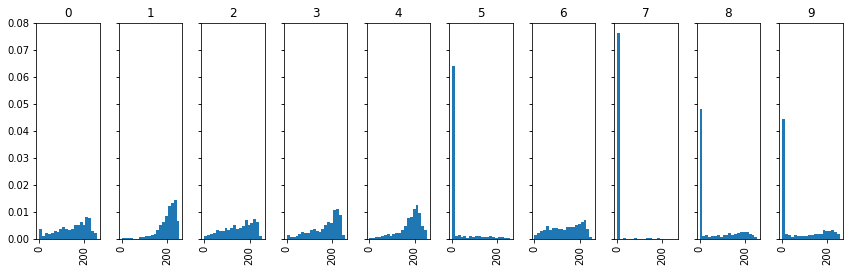

pixel184


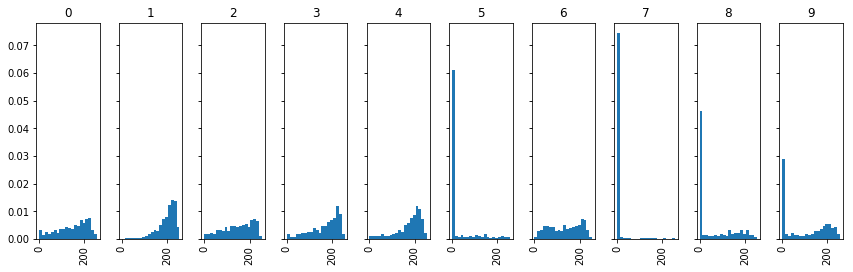

pixel185


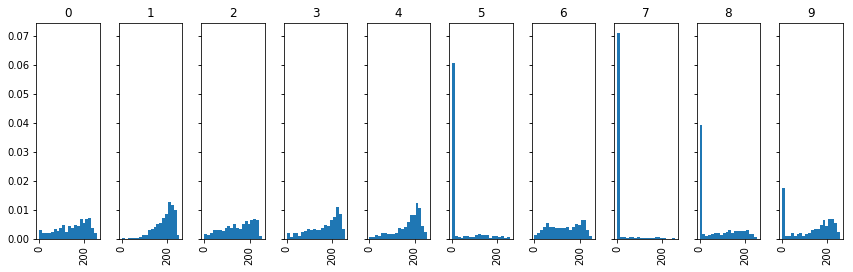

pixel186


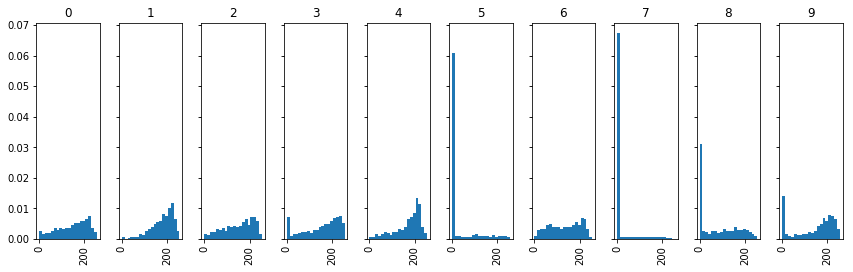

pixel187


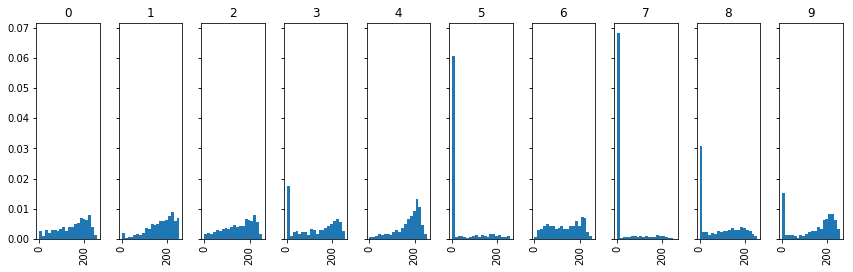

pixel188


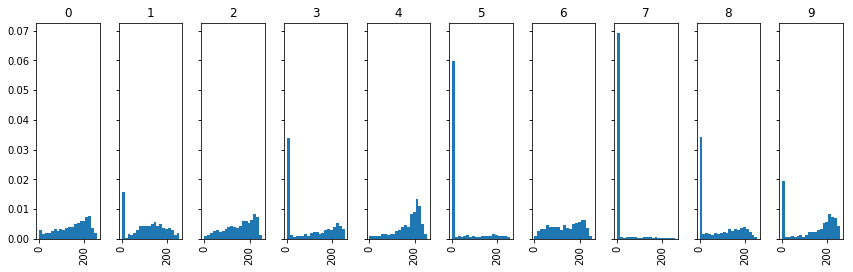

pixel189


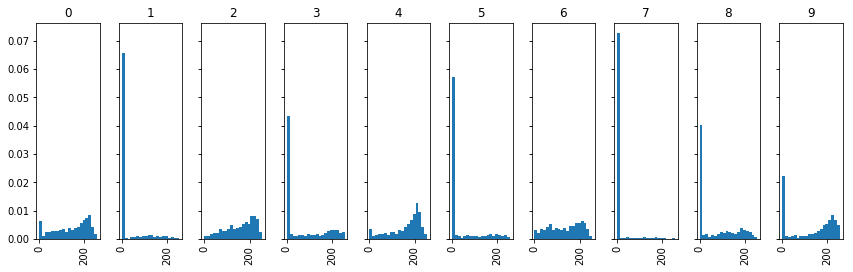

pixel190


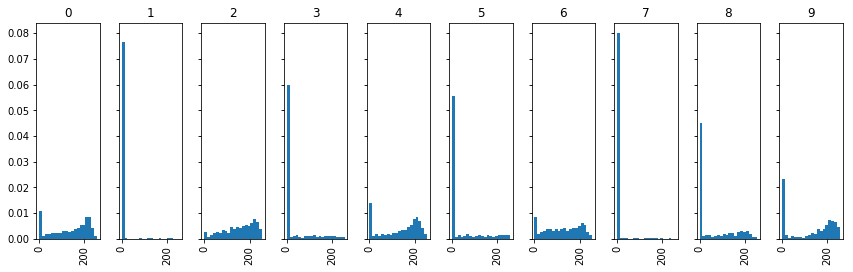

pixel191


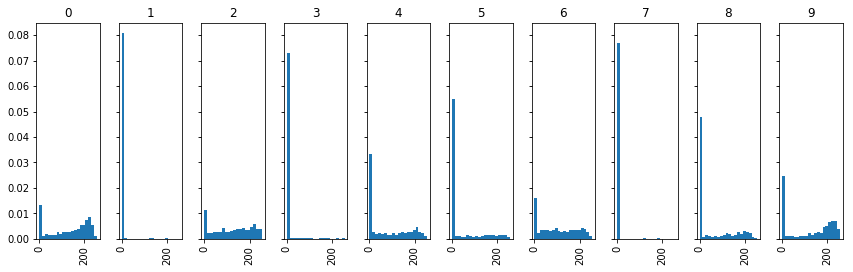

pixel192


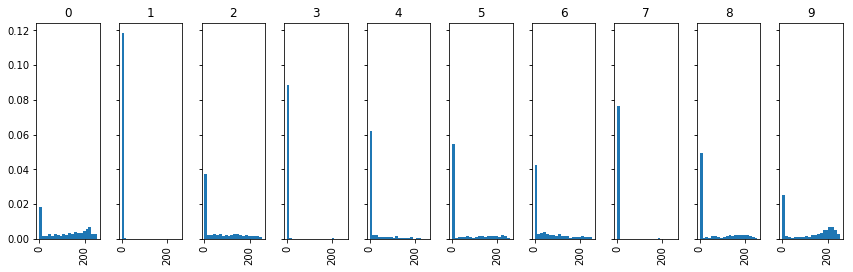

pixel193


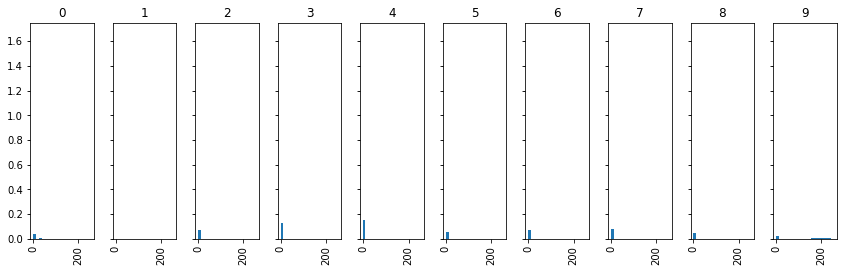

pixel194


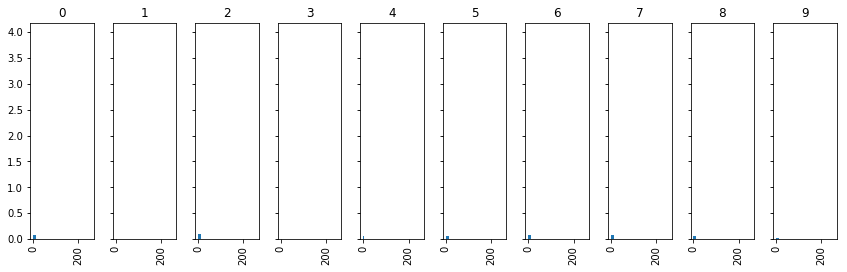

pixel195


KeyboardInterrupt: 

In [9]:
data_viz_target(dataset,"label")

In [ ]:
print(dataset.columns.tolist())


In [10]:
X = dataset.drop(['label'],axis=1)
y = dataset['label']


Separating test valid and train data

In [11]:
X_train, X_valid, y_train, y_valid \
    = train_test_split(X, \
                                        y, \
                                        random_state=0, \
                                        train_size = 0.7)

/Applications/anaconda3/envs/Text_Analytics/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# DecisionTree

In [82]:
myDecisionTree = tree.DecisionTreeClassifier(criterion = "entropy")
myDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
# Make a set of predictions for the training data
y_pred = myDecisionTree.predict(X_train)

# Print performance details
accuracy = \
metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))

print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_train, y_pred))

# Print nicer homemade confusion matrix
print("Confusion Matrix")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4201
           1       1.00      1.00      1.00      4157
           2       1.00      1.00      1.00      4192
           3       1.00      1.00      1.00      4151
           4       1.00      1.00      1.00      4235
           5       1.00      1.00      1.00      4214
           6       1.00      1.00      1.00      4213
           7       1.00      1.00      1.00      4211
           8       1.00      1.00      1.00      4205
           9       1.00      1.00      1.00      4221

   micro avg       1.00      1.00      1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000

[[4201    0    0    0    0    0    0    0    0    0]
 [   0 4157    0    0    0    0    0    0    0    0]
 [   0    0 4192    0    0    0    0    0    0    0]
 [   0    0    0 4151    0    0    0    0    0    0]
 [   0    0    

Predicted     0     1     2     3     4     5     6     7     8     9    All
True                                                                        
0          4201     0     0     0     0     0     0     0     0     0   4201
1             0  4157     0     0     0     0     0     0     0     0   4157
2             0     0  4192     0     0     0     0     0     0     0   4192
3             0     0     0  4151     0     0     0     0     0     0   4151
4             0     0     0     0  4235     0     0     0     0     0   4235
5             0     0     0     0     0  4214     0     0     0     0   4214
6             0     0     0     0     0     0  4213     0     0     0   4213
7             0     0     0     0     0     0     0  4211     0     0   4211
8             0     0     0     0     0     0     0     0  4205     0   4205
9             0     0     0     0     0     0     0     0     0  4221   4221
All        4201  4157  4192  4151  4235  4214  4213  4211  4205  4221  42000

In [84]:
# Make a set of predictions for the test data
y_pred = myDecisionTree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_valid, y_pred))

# Print nicer confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8049444444444445
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1799
           1       0.94      0.94      0.94      1843
           2       0.69      0.70      0.70      1808
           3       0.82      0.81      0.81      1849
           4       0.69      0.70      0.69      1765
           5       0.92      0.90      0.91      1786
           6       0.55      0.54      0.54      1787
           7       0.88      0.89      0.88      1789
           8       0.91      0.92      0.91      1795
           9       0.90      0.92      0.91      1779

   micro avg       0.80      0.80      0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000

[[1347    9   37   82   16    4  279    0   25    0]
 [  15 1736   12   51    6    0   19    0    4    0]
 [  38    9 1267   24  213    1  235    0   21    0]
 [  87   64   34 1489   92    1   66    0   14    2]


Predicted     0     1     2     3     4     5     6     7     8     9    All
True                                                                        
0          1347     9    37    82    16     4   279     0    25     0   1799
1            15  1736    12    51     6     0    19     0     4     0   1843
2            38     9  1267    24   213     1   235     0    21     0   1808
3            87    64    34  1489    92     1    66     0    14     2   1849
4            13    10   250    94  1227     0   163     0     8     0   1765
5             2     1     2     3     1  1606     1    91    27    52   1786
6           300    14   217    57   192     4   958     0    44     1   1787
7             0     0     0     0     0    78     0  1585     7   119   1789
8            18     4    19    25    19    14    34    12  1643     7   1795
9             1     0     0     1     0    33     2   106     5  1631   1779
All        1821  1847  1838  1826  1766  1741  1757  1794  1798  1812  18000

####cross validation

In [96]:
myDecisionTree = tree.DecisionTreeClassifier(max_depth = 12)
scores = cross_val_score(myDecisionTree, X, y, cv = 10)
print(scores)
scores = pd.Series(scores)
print(scores.mean(), " =/- ", scores.std())


[0.81583333 0.81383333 0.81816667 0.81566667 0.81483333 0.81366667
 0.81666667 0.81933333 0.81333333 0.80616667]
0.8147500000000001  =/-  0.003591184336437158


In [97]:
myDecisionTree.fit(X, y)
my_tree.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
# Set up the parameter grid to seaerch
param_grid ={'criterion': ['gini', "entropy"], \
             'max_depth': list(range(3, 20, 3)), \
             'min_samples_split': [50] }

# Perform the search
my_tuned_tree = GridSearchCV(tree.DecisionTreeClassifier(), \
                                param_grid, cv=2, verbose = 0, \
                            return_train_score=True)
my_tuned_tree.fit(X, y)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_tree.best_params_)
display(my_tuned_tree.best_score_)
display(my_tuned_tree.cv_results_)

Best parameters set found on development set:


{'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 50}

0.8040666666666667

{'mean_fit_time': array([ 2.78432703,  5.17710018,  7.67568064, 10.25692797, 13.59528446,
        14.0895443 ,  2.65070105,  5.89400113,  9.87877393, 12.58224785,
        13.54370654, 13.82057357]),
 'std_fit_time': array([0.05205894, 0.04623103, 0.3707974 , 0.21804404, 1.30986166,
        0.04961944, 0.01461196, 0.01401508, 0.56698799, 0.25001299,
        0.18841159, 0.11296344]),
 'mean_score_time': array([0.07467496, 0.06722283, 0.06025636, 0.07300997, 0.07410359,
        0.08160257, 0.05773652, 0.05823255, 0.0604341 , 0.07554412,
        0.06370294, 0.06424904]),
 'std_score_time': array([0.00369608, 0.00988102, 0.00021541, 0.00467801, 0.0015626 ,
        0.00771165, 0.00286853, 0.00231242, 0.00504112, 0.00591302,
        0.00443399, 0.003124  ]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, Fal

In [18]:
dataset_test = pd.read_csv("fashion-mnist_test.csv")
dataset_test["label"].value_counts()


7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

In [19]:
X_test = dataset_test.drop(['label'],axis=1)
y_test= dataset_test['label']

In [108]:
# Make a set of predictions for the test data
y_pred = my_tuned_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.8175
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1000
           1       0.95      0.95      0.95      1000
           2       0.72      0.72      0.72      1000
           3       0.84      0.85      0.84      1000
           4       0.72      0.75      0.73      1000
           5       0.89      0.89      0.89      1000
           6       0.61      0.52      0.56      1000
           7       0.85      0.89      0.87      1000
           8       0.93      0.92      0.92      1000
           9       0.91      0.89      0.90      1000

   micro avg       0.82      0.82      0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Confusion Matrix


Predicted     0     1    2     3     4     5    6     7    8    9    All
True                                                                    
0           799     5   11    31     4     4  135     0   11    0   1000
1            10   951    4    23     3     3    3     0    3    0   1000
2            16     2  720    14   142     0   97     0    8    1   1000
3            42    28   12   846    37     5   23     0    5    2   1000
4             3     3  130    59   747     0   52     0    4    2   1000
5             3     3    0     1     0   892    0    73   11   17   1000
6           195     7  114    31   106     0  523     0   23    1   1000
7             0     0    0     0     0    56    0   888    2   54   1000
8             9     2    7     6     4    15   24     8  918    7   1000
9             0     1    0     1     0    30    0    73    4  891   1000
All        1077  1002  998  1012  1043  1005  857  1042  989  975  10000

# randomforest

In [112]:
my_model = ensemble.RandomForestClassifier(n_estimators=300, \
                                           max_features = 3,\
                                           min_samples_split=200)
my_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [113]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1799
           1       1.00      0.93      0.96      1843
           2       0.71      0.77      0.74      1808
           3       0.77      0.91      0.83      1849
           4       0.70      0.75      0.72      1765
           5       0.95      0.91      0.93      1786
           6       0.72      0.41      0.52      1787
           7       0.90      0.90      0.90      1789
           8       0.91      0.96      0.93      1795
           9       0.91      0.94      0.92      1779

   micro avg       0.83      0.83      0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000

Confusion Matrix


Predicted     0     1     2     3     4     5     6     7     8     9    All
True                                                                        
0          1474     1    38   158    11     2    76     0    39     0   1799
1             2  1723    38    69     3     0     6     0     2     0   1843
2             5     0  1400    15   272     0    86     0    30     0   1808
3            51     3    18  1676    58     0    39     0     4     0   1849
4             7     1   206   148  1316     0    72     0    15     0   1765
5             0     0     0     2     0  1628     0   104    14    38   1786
6           421     2   262    93   208     2   727     0    72     0   1787
7             0     0     0     0     0    45     0  1612     3   129   1789
8             3     0    18    11    12     4     9     6  1730     2   1795
9             0     0     1     0     0    24     0    77     2  1675   1779
All        1963  1730  1981  2172  1880  1705  1015  1799  1911  1844  18000

In [115]:
y_pred = my_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

0.8289
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1000
           1       0.99      0.94      0.96      1000
           2       0.71      0.76      0.74      1000
           3       0.78      0.92      0.84      1000
           4       0.72      0.77      0.75      1000
           5       0.95      0.90      0.93      1000
           6       0.73      0.41      0.53      1000
           7       0.88      0.88      0.88      1000
           8       0.91      0.97      0.94      1000
           9       0.88      0.93      0.91      1000

   micro avg       0.83      0.83      0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000

Confusion Matrix


Predicted     0    1     2     3     4    5    6    7     8     9    All
True                                                                    
0           809    1    26    92     6    1   39    0    26     0   1000
1             2  941    19    32     3    1    1    0     1     0   1000
2             9    1   762     9   154    1   48    0    16     0   1000
3            25    6    10   916    25    0   15    0     3     0   1000
4             0    0   106    69   772    0   46    0     7     0   1000
5             0    0     0     0     0  901    0   67     8    24   1000
6           259    2   136    54   104    0  415    0    30     0   1000
7             0    0     0     0     0   28    0  875     0    97   1000
8             1    1    12     3     4    2    2    4   970     1   1000
9             0    0     0     0     0   12    1   53     6   928   1000
All        1105  952  1071  1175  1068  946  567  999  1067  1050  10000

# Bagging

In [116]:
my_model = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                      n_estimators=10)
my_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [117]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1799
           1       0.98      0.92      0.95      1843
           2       0.74      0.79      0.76      1808
           3       0.81      0.87      0.84      1849
           4       0.72      0.79      0.75      1765
           5       0.94      0.89      0.91      1786
           6       0.72      0.52      0.61      1787
           7       0.89      0.92      0.91      1789
           8       0.90      0.94      0.92      1795
           9       0.92      0.93      0.92      1779

   micro avg       0.84      0.84      0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000

Confusion Matrix


Predicted     0     1     2     3     4     5     6     7     8     9    All
True                                                                        
0          1501     9    27    81    11     3   132     0    35     0   1799
1            10  1696    31    89     6     0     7     0     4     0   1843
2            27     0  1422    18   235     3    80     0    23     0   1808
3            75    15    23  1614    82     5    32     0     3     0   1849
4             5     2   176    87  1388     1    90     0    16     0   1765
5             0     6     1     9     0  1581     0   104    34    51   1786
6           296     9   223    73   191     3   935     0    57     0   1787
7             0     0     0     0     0    45     0  1645    10    89   1789
8             3     1    14    27    14    15    24     8  1688     1   1795
9             0     0     2     3     0    26     0    88    12  1648   1779
All        1917  1738  1919  2001  1927  1682  1300  1845  1882  1789  18000

In [121]:
y_pred = my_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

0.8365
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1000
           1       0.97      0.92      0.95      1000
           2       0.76      0.74      0.75      1000
           3       0.83      0.88      0.85      1000
           4       0.73      0.81      0.77      1000
           5       0.94      0.87      0.90      1000
           6       0.69      0.55      0.61      1000
           7       0.87      0.89      0.88      1000
           8       0.90      0.95      0.92      1000
           9       0.90      0.92      0.91      1000

   micro avg       0.84      0.84      0.84     10000
   macro avg       0.84      0.84      0.83     10000
weighted avg       0.84      0.84      0.83     10000

Confusion Matrix


Predicted     0    1    2     3     4    5    6     7     8     9    All
True                                                                    
0           825    4   13    45     5    2   80     0    26     0   1000
1             8  924   14    39     5    0    8     0     2     0   1000
2            16    1  745     9   155    0   61     0    13     0   1000
3            35   10    6   878    39    3   25     0     4     0   1000
4             1    2   80    42   815    0   54     0     6     0   1000
5             0    3    2     4     0  868    1    70    20    32   1000
6           186    4  109    32    94    1  546     0    28     0   1000
7             0    0    0     0     0   32    0   892     6    70   1000
8             0    2    9     5     7    7   11     7   950     2   1000
9             0    0    4     2     0   15    0    52     5   922   1000
All        1071  950  982  1056  1120  928  786  1021  1060  1026  10000

# AdaBoost 

In [122]:
# Do the same job with random forests
my_model = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                       n_estimators=10)
my_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [123]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1799
           1       0.99      0.93      0.96      1843
           2       0.68      0.69      0.68      1808
           3       0.81      0.84      0.82      1849
           4       0.68      0.63      0.66      1765
           5       0.88      0.91      0.89      1786
           6       0.45      0.57      0.50      1787
           7       0.86      0.86      0.86      1789
           8       0.97      0.93      0.95      1795
           9       0.91      0.88      0.90      1779

   micro avg       0.79      0.79      0.79     18000
   macro avg       0.80      0.79      0.79     18000
weighted avg       0.80      0.79      0.79     18000

Confusion Matrix


Predicted     0     1     2     3     4     5     6     7     8     9    All
True                                                                        
0          1180     0    42    99     8     1   456     0    13     0   1799
1             8  1710    14    80     7     0    24     0     0     0   1843
2            14     0  1255    14   211     0   308     0     6     0   1808
3            74    18    16  1556    81     0   103     0     1     0   1849
4             7     0   277   104  1117     0   257     0     3     0   1765
5             0     0     1     2     0  1630     2   105    10    36   1786
6           245     1   241    56   213     0  1013     0    18     0   1787
7             0     0     0     0     0   144     0  1531     4   110   1789
8             3     1    12    13     7    10    79     3  1666     1   1795
9             1     0     0     0     0    74     1   135     2  1566   1779
All        1532  1730  1858  1924  1644  1859  2243  1774  1723  1713  18000

In [124]:
y_pred = my_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

0.7926
              precision    recall  f1-score   support

           0       0.79      0.67      0.72      1000
           1       0.99      0.95      0.97      1000
           2       0.67      0.65      0.66      1000
           3       0.83      0.87      0.85      1000
           4       0.69      0.65      0.67      1000
           5       0.86      0.90      0.88      1000
           6       0.47      0.60      0.53      1000
           7       0.85      0.85      0.85      1000
           8       0.96      0.93      0.94      1000
           9       0.90      0.86      0.88      1000

   micro avg       0.79      0.79      0.79     10000
   macro avg       0.80      0.79      0.80     10000
weighted avg       0.80      0.79      0.80     10000

Confusion Matrix


Predicted    0    1    2     3    4     5     6    7    8    9    All
True                                                                 
0          669    2   19    54    1     2   247    0    6    0   1000
1            6  947    5    26    6     0    10    0    0    0   1000
2            9    0  648     9  151     0   176    0    7    0   1000
3           28    8   13   871   32     0    45    0    3    0   1000
4            1    1  152    42  651     0   150    0    3    0   1000
5            0    0    0     0    0   904     1   62    6   27   1000
6          129    1  116    43  104     0   598    0    9    0   1000
7            0    0    0     0    0    86     0  850    1   63   1000
8            5    0   10     3    4     5    43    3  926    1   1000
9            1    0    0     0    0    51     0   84    2  862   1000
All        848  959  963  1048  949  1048  1270  999  963  953  10000

# LogisticRegression

In [125]:
my_model = linear_model.LogisticRegression()
my_model.fit(X_train,y_train)

/Applications/anaconda3/envs/Text_Analytics/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  "Specify a solver to silence this warning.",
/Applications/anaconda3/envs/Text_Analytics/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  " 0.22. Specify the multi_class option to silence "
/Applications/anaconda3/envs/Text_Analytics/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1799
           1       0.94      0.97      0.95      1843
           2       0.75      0.78      0.76      1808
           3       0.85      0.87      0.86      1849
           4       0.73      0.78      0.75      1765
           5       0.93      0.91      0.92      1786
           6       0.67      0.54      0.60      1787
           7       0.91      0.93      0.92      1789
           8       0.92      0.93      0.92      1795
           9       0.94      0.94      0.94      1779

   micro avg       0.84      0.84      0.84     18000
   macro avg       0.84      0.84      0.84     18000
weighted avg       0.84      0.84      0.84     18000

Confusion Matrix


Predicted     0     1     2     3     4     5     6     7     8     9    All
True                                                                        
0          1467    13    31    94    13     4   148     0    28     1   1799
1             6  1782    12    29     6     0     7     0     1     0   1843
2            27     8  1404    15   231     1   104     0    18     0   1808
3            68    36    27  1609    62     2    42     0     2     1   1849
4             6    12   168    59  1369     0   139     0    12     0   1765
5             2     6     2     0     1  1617     7    82    24    45   1786
6           270    19   222    70   187     5   962     0    52     0   1787
7             0     0     0     0     0    63     0  1660     6    60   1789
8            11    16     9    22    12    11    30    15  1664     5   1795
9             0     3     1     0     0    39     3    63     4  1666   1779
All        1857  1895  1876  1898  1881  1742  1442  1820  1811  1778  18000

In [129]:
y_pred = my_model.predict(X_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(accuracy)
print(metrics.classification_report(y_test, y_pred))
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

0.8413
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1000
           1       0.93      0.97      0.95      1000
           2       0.76      0.76      0.76      1000
           3       0.84      0.86      0.85      1000
           4       0.76      0.80      0.78      1000
           5       0.93      0.90      0.91      1000
           6       0.66      0.56      0.60      1000
           7       0.90      0.92      0.91      1000
           8       0.92      0.92      0.92      1000
           9       0.91      0.93      0.92      1000

   micro avg       0.84      0.84      0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Predicted     0     1    2     3     4    5    6     7    8     9    All
True                                                                    
0           813     7   19    49     2    0   90     0   20     0   1000
1             4   968    6    12     1    2    6     1    0     0   1000
2            19    10  757    11   123    1   69     0   10     0   1000
3            37    29   13   863    26    1   21     1    5     4   1000
4             2     7   77    36   799    0   76     0    3     0   1000
5             5     5    0     0     0  896    2    48   10    34   1000
6           157    10  113    46    93    0  556     0   25     0   1000
7             0     1    0     1     0   36    0   915    1    46   1000
8            10     9    7    12     1    9   19    12  917     4   1000
9             0     0    2     0     1   21    1    45    1   929   1000
All        1047  1046  994  1030  1046  966  840  1022  992  1017  10000

In [12]:
my_model = XGBClassifier()
my_model = my_model.fit(X_train,y_train)

In [13]:
# Make a set of predictions for the test data
y_pred = my_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1799
           1       0.99      0.97      0.98      1843
           2       0.76      0.80      0.78      1808
           3       0.86      0.89      0.87      1849
           4       0.75      0.78      0.77      1765
           5       0.98      0.93      0.95      1786
           6       0.69      0.57      0.63      1787
           7       0.92      0.94      0.93      1789
           8       0.95      0.95      0.95      1795
           9       0.92      0.95      0.94      1779

   micro avg       0.86      0.86      0.86     18000
   macro avg       0.86      0.86      0.86     18000
weighted avg       0.86      0.86      0.86     18000

Confusion Matrix


Predicted     0     1     2     3     4     5     6     7     8     9    All
True                                                                        
0          1506     1    30    70     8     3   153     0    28     0   1799
1             4  1782    13    39     1     0     2     0     2     0   1843
2            11     1  1443    14   218     0   107     0    14     0   1808
3            64     8    18  1651    69     0    38     0     1     0   1849
4             6     1   166    81  1383     0   124     0     4     0   1765
5             0     0     0     2     0  1659     0    68     8    49   1786
6           295     2   227    60   145     1  1022     0    35     0   1787
7             0     0     0     0     0    14     0  1676     4    95   1789
8             1     1    12     9    11     8    34     3  1714     2   1795
9             0     0     1     0     0    11     0    71     1  1695   1779
All        1887  1796  1910  1926  1835  1696  1480  1818  1811  1841  18000

In [21]:
y_pred = my_model.predict(X_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(accuracy)
print(metrics.classification_report(y_pred, y_test))


0.8646
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1053
           1       0.98      0.98      0.98       992
           2       0.78      0.77      0.77      1006
           3       0.90      0.88      0.89      1028
           4       0.81      0.78      0.80      1040
           5       0.93      0.98      0.95       948
           6       0.60      0.69      0.64       867
           7       0.92      0.91      0.91      1008
           8       0.96      0.95      0.95      1019
           9       0.95      0.91      0.93      1039

   micro avg       0.86      0.86      0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.86      0.87     10000

